<a href="https://colab.research.google.com/github/eliasneg/PrimeiroCode/blob/main/copia_ML_novo_2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python (Classificação)

# Configuração do local dos datasets

In [48]:
#preparando a leitura usando jupyter notebook
#import sys
#import os
#dataset_dir = r'C:\Users\mabes\Meu Drive\Documentos\entendendo e implementando machine learning com orange e python\datasets'
#sys.path.append(dataset_dir)
#os.chdir(dataset_dir) # Alterando o diretório de trabalho para o diretório dos datasets

# Importação das bibliotecas básicas

In [49]:
#!pip -q install plotly --upgrade

In [50]:
#!pip -q install yellowbrick --upgrade

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [52]:
heart = pd.read_csv('heart.csv') # defaulted = inadiplente (1)

In [53]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [54]:
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [55]:
heart.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [56]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Visualização dos dados

In [57]:
np.unique(heart['ChestPainType'], return_counts=True) # return_counts=True mostra os valores 1717 e 283

(array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object), array([496, 173, 203,  46]))

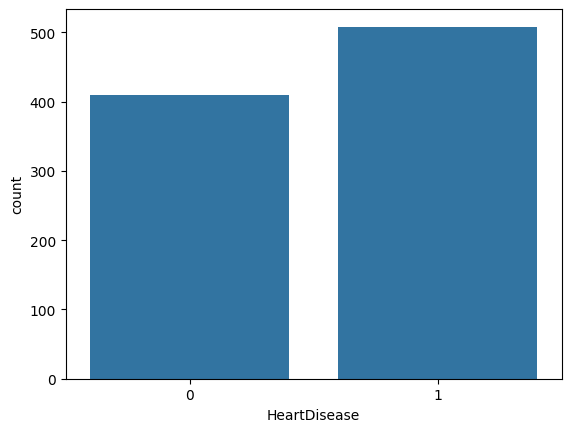

In [59]:
sns.countplot(x = heart['HeartDisease']);

**Histograma**

*   Serve para mostrar a distribuição de frequências de um conjunto de dados numéricos.
*   É útil para entender como os dados estão distribuídos — por exemplo, se estão concentrados em uma faixa, se estão dispersos ou se seguem uma distribuição normal (como o famoso "formato de sino").



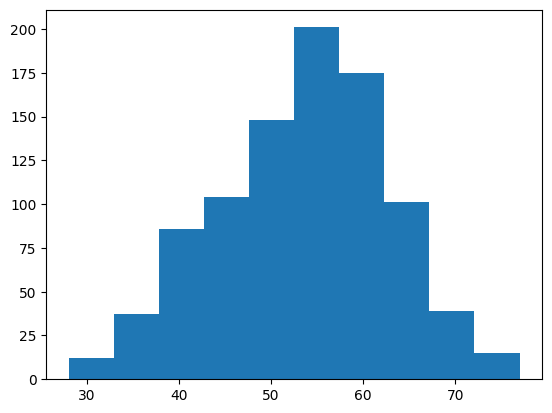

In [60]:
plt.hist(x = heart['Age']);

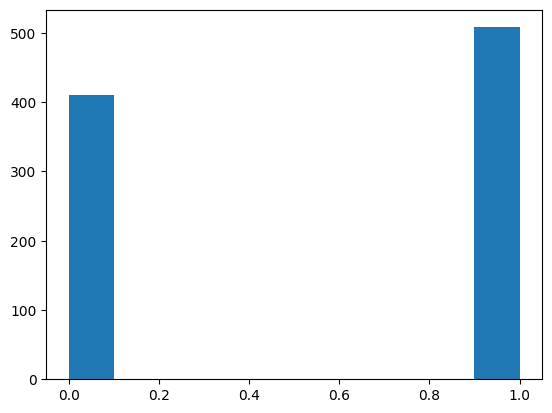

In [61]:
plt.hist(x = heart['HeartDisease']);

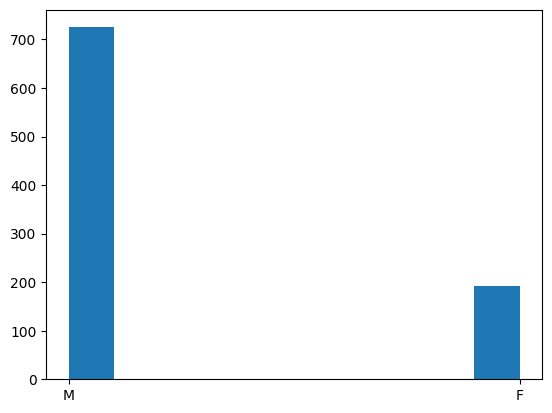

In [62]:
plt.hist(x = heart['Sex']);

In [65]:
grafico = px.scatter_matrix(heart, dimensions=['Age','Sex','HeartDisease',])
grafico.show()

In [71]:
from sklearn.preprocessing import LabelEncoder

# Assuming Detail is your DataFrame

# 1. Create a LabelEncoder object
label_encoder_chestpain = LabelEncoder()
label_encoder_sex = LabelEncoder()


# 2. Fit and transform the 'ChestPainType' column
# 1. Define the desired order of categories
desired_order = ['ASY', 'ATA', 'NAP', 'TA']  # Example, replace with your actual categories

# 2. Reorder the 'ChestPainType' column
Detail['ChestPainType'] = pd.Categorical(Detail['ChestPainType'], categories=desired_order, ordered=True)
Detail['ChestPainType_Encoded'] = label_encoder_chestpain.fit_transform(Detail['ChestPainType'])

# 3. Fit and transform the 'Sex' column
Detail['Sex_Encoded'] = label_encoder_sex.fit_transform(Detail['Sex'])

# Now you have both 'ChestPainType_Encoded' and 'Sex_Encoded' as numerical columns
# ready for correlation analysis or machine learning tasks.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming Detail is your DataFrame with encoded columns
pair_plot_columns = ['Age', 'Sex_Encoded', 'ChestPainType_Encoded']

# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(Detail['Age'],
           Detail['Sex_Encoded'],
           Detail['ChestPainType_Encoded'],
           c=Detail['ChestPainType_Encoded'],  # Color by ChestPainType
           cmap='viridis', marker='o')  # Customize color map and marker

# Set labels for the axes
ax.set_xlabel('Age')
ax.set_ylabel('Sex (Encoded)')
ax.set_zlabel('Chest Pain Type (Encoded)')

# Show the plot
plt.title('3D Scatter Plot of Age, Sex, and Chest Pain Type')
plt.show()

NameError: name 'Detail' is not defined

### Tratamento de valores inconsistentes

In [ ]:
heart[heart['Age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


#### Apagar a coluna inteira (de todos os registros da base de dados)

In [ ]:
heart2 = heart.drop('Age', axis = 1)
heart2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


#### Apagar somente os registros com valores inconsistentes

In [ ]:
heart3 = heart.drop(heart[heart['Age'] < 0].index)
heart3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
heart3.loc[heart3['Age'] < 0]

,clientid,income,age,loan,default


#### Preencher os valores inconsistente manualmente com a média da coluna

In [ ]:
heart.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [ ]:
heart['Age'].mean()

np.float64(40.80755937840458)

In [ ]:
heart['Age'][heart['Age'] > 0].mean()

np.float64(40.92770044906149)

In [ ]:
heart.loc[heart['Age'] < 0, 'Age'] = 40.92

In [ ]:
heart.loc[heart['Age'] < 0]

,clientid,income,age,loan,default


In [18]:
heart.head(27)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Tratamento de valores faltantes

In [ ]:
heart.isnull() # identificação de valores nulos (ausentes). 0=False, 1=True

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
heart.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [42]:
heart.loc[pd.isnull(heart['Age'])]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [43]:
heart['Age'][heart['Age'].notnull()].mean() # essa média descarta os valores nulos

np.float64(53.510893246187365)

In [ ]:
heart['Age'].fillna(heart['Age'].mean(), inplace = True) # atualização dos valoes no dataset
# essa média descarta os valores nulos
# inplace=True: Faz com que a substituição dos valores ausentes seja feita diretamente no DataFrame original,
# sem a necessidade de criar uma nova cópia do DataFrame.

<ipython-input-271-39e22ec9c532>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
heart.loc[pd.isnull(heart['Age'])]

,clientid,income,age,loan,default


In [ ]:
heart.loc[(heart['clientid'] == 29) | (heart['clientid'] == 31) | (heart['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
heart.loc[heart['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


### Divisão entre previsores e classe

In [44]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [45]:
type(heart)

pandas.core.frame.DataFrame

In [46]:
X_credit = heart.iloc[:, 1:4].values

In [47]:
X_credit

array([['M', 'ATA', 140],
       ['F', 'NAP', 160],
       ['M', 'ATA', 130],
       ...,
       ['M', 'ASY', 130],
       ['F', 'ATA', 130],
       ['M', 'NAP', 138]], dtype=object)

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
y_credit = heart.iloc[:, 4].values

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credit)

numpy.ndarray

### Escalonamento dos valores: Padronização e Normalização

![imAge.png](data:imAge/png;base64,iVBORw0KGgoAAAANSUhEUgAABFAAAACPCAYAAADdoC/VAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAHZXSURBVHhe7Z1/dJTVue+/rfE4NKV2pHNw5JheeU2NJFBCJ1hiAssUh9XSNCpqDFVPmlo0QfQKi0oXJyWsHK64uGT540I4HutJ/UGI1XpycumqI0uQjBRN6oQlQWAcLfEmc+TFjJ4MMOjQ3D/67n32u+f9NZlJQH0+a81aM/P+2j+e/TzPfvZ+9/7K6OjoKAiCIAiCIAiCIAiCIAhTvir/QRAEQRAEQRAEQRAEQeihAApBEARBEARBEARBEIQNFEAhCIIgCIIgCIIgCIKwgQIoBEEQBEEQBEEQBEEQNlAAhSAIgiAIgiAIgiAIwgYKoBAEQRAEQRAEQRAEQdhAARSCIAiCIAiCIAiCIAgbKIBCEARBEARBEARBEARhAwVQCIIgCIIgCIIgCIIgbKAACkEQBEEQBEEQBEEQhA0UQCEIgiAIgiAIgiAIgrCBAigEQRAEQRAEQRAEQRA2UACFIAiCIAiCIAiCIAjCBgqgEARBEARBEARBEARB2EABFIIgCIIgCIIgCIIgCBsogEIQBEEQBEEQBEEQBGEDBVAIgiAIgiAIgiAIgiBsoAAKQRAEQRAEQRAEQRCEDRRAIQiCIAiCIAiCIAiCsOEro6Ojo/KfBEE4Q1VVPPPMM+jt7QUAFBYWoqioCDNmzEB+fj42bNiA/v5+KIqC5uZm+XKCIAiCIM5TyMYTBEEQMlkJoIRCIWzatIn/rq6uRlVVle6cTFi6dKn8lymKosDlcqGoqCiraciExsZGRCIR/vuLamjb2toQCAT47y9qPkVaW1vR3d0t/51CeXk56uvr5b/PKaFQCI8//jgmTZqEpqYmeDwe+RQd4XAYvb29OHToEAYHB5FIJPgxRVFw2WWXYebMmSgrK9NdZ0ZnZycAnDftNBOCwSC2bt0KAPB6vdi8ebN8ynmH0zRnu97PFeFwGOvWrQMA+Hw+rFy5Uj5lQmhvb0dXV9eXQj86RbbxbrcbW7Zs0f0n82WxqxOJXA8NDQ26dk023pzPs42X8yjXuxOYXmPI9xCP19bWwu/382PZYiLycb4RCoWwf/9+DA0N6fShy+XCtGnToCgKrr32WuTn5+uuO9841/Z51apViEajWL16NYqLi+XDEw4L3B48eBDTpk2Dz+fjvnIgEEBbW9vnRv+Kvqbf70dtba18SsYw2zWRZZKVV3h2796t+80i9eeCSCSC/v5+dHR0oLGxEaqqyqcQRNY4ePCg/JchM2fOlP865zz77LNIJBKoqqoydawYbW1tWLduHbq6uhCJRHSdaGjtrru7G1u3brVtd+FwGI2Njejo6MCUKVPkw59LPvjgA/592rRpumPnK07SnM16P9e8//77/LvX69Udm0h8Ph+glV04HJYPEwBisRja2trkvwliwvky2Ph3331X9/ujjz7S/bZDVVW88soruv/koEM0GuXfr7jiCt2xbDER+ThfUFUVGzZswKZNm9Dd3a0LngBAIpFAJBJBIBDAunXr0Nraqjt+vnGu7fONN94IAHjyySfPCz/mscceQ29vL6/Hjo4OLF++HG1tbXj55ZcBAJdddpl8GTGBZBxAUVWVGxi32w2cR45hJBLBY489Jv9NEFkjFosBACorK7F9+3asXr0alZWV3AC4XC74/f7zzgi3tbUhGo1CURTbkaDW1lbdqKMdkUgETU1Npkbo+eef58b+fCuXsSI6h+fC+I8FuzRnu97PNUNDQ/z75Zdfrjs2keTn53NbuWvXLvkwobF3797zwo8gvtx8GWy8aAsg5NkpzzzzjC64bmRPBgcHAa2fMF6zISYiH+cLGzduRH9/v/y3Kd3d3diwYYP893nDubbPZWVlKCwsRCwWwwsvvCAfnlBCoRD3kcvLy/mgSywWQyAQ4HL+/e9/X3cdMbFkHEDZt28fVziikhanwJ1LIpEIf1WAGF9qa2uxfft2/pmoaVTnEpbXmpoaAEBxcTFqamqwefNmbN++HU899dS4TFfLhHA4zDvGixYtkg/rCIVCuimxhYWFqK2txaOPPsrz/uijj6KhoYEreWiK/plnnuG/RZihPJ+dk3RhziEAFBQU6I6dr1ileTzq/VwjjtCd685OUVERkMbo9peRRCKB559/Xv6bOIeQjf/i2fhgMCj/pbMNdoRCId36MABw5ZVXSmeBl5fdq3ljZaLycT7Q3t6uCxaVl5ejoaFB1zbXr1+P2tpaKIrCz+vv7z9v+0Png32+9dZbAS3YZCRPE8XAwACgvY5SX1+PlStXYvXq1Vwu3W43qqurz4tXjc4XzoVNyjiAwhSOy+VCVVUV7xQdPHhw3EYiZUXBnPna2lrDThk5qQTx37DgpqIotoZq//79/HtlZSXWrl0Lv9+vmw7s8XhQVlbGlbzL5QJM2p2qqnxUyOy1kc8jojPzeTFqVmnOdr2fDzBn2shGTDRs6m0sFqNZFhb09/efU0eWID6PpGPjxVc5WQdNflXTit///veAdi277ly8WvBFyYcTxGUSVq9ejfr6+pR6zs/Ph9/vR3NzM6qrq/n/ZJ/Nyc/P5wNC7DWZc0FVVVVKMKC4uBhr167lQcgvwtqBn3cyCqCEw2EeNWQjakz4EokE9u3bpzt/PPF4PPD7/VizZg135BnpTHMjiC8ybEFQaKMWdojTKtkInBXFxcVcFxg5L0eOHOHfz6WhzCZiB08c7TmfsUtztuv9XBMKhXi6zodRRXHtn0OHDumOEXra29vlvwiCMCFdGy8G0pkOdzpzIxAIIBKJwOVy4Uc/+hHvD+Tl5cmnjjtflHw4geVVUZSUwQ8jqqqq+GujZJ+tue666wBtRgwF7wkrMtqFR1zxmq2qLa6kbLWzQzrYrQwvI6/EDW16j0w4HMauXbtSVq+GlvZp06ahsrLS9n3NYDCIN998EwcPHuRKoLCwEAsWLEBZWZntbgHiCsXs+H333cdXYE4kEnxnoTvuuCNlMbBAIICDBw8iEono3vlUFAUzZszAwoULU65hGD27ubmZl827777LlbXb7YaiKKZlYrdCv1yPTjCq62zVG7SdYFjZsbpzuVxQFMXRTk6s7gcHB1Pev1UUBYqiYPHixablz1BVFfv27csoLU5oaWlBb2+vo10uIJwPAOvXr3dUpkbIK9vLGLXPzs5O9Pb26nZ+YTI4d+7cFLkQYVtLsnyqqopdu3bh0KFDXGbcbjdKSkps6ycYDOK1117j9SK3RVHuzXZiUFUVO3fuRCQS0cms1+vFlVdeiYULF5qWrbjLGdvhLBgM4qWXXuIyV1lZqQt0ZJrmbNW7jFF783q9mDlzpm09ZFKGnZ2d6OjoAGx2iTNKnxM9CgB1dXVIJBJ8B4FwOIznn3+eB/ALCwuxdu1afj7Th5muSs/aiWxjnKTZKXY7PYg7BIwFO9tgVEZ2dlWGdSxFHYA0dIqcxu3bt6OtrQ09PT3c7hYWFuJHP/oRiouLDc9ntuvgwYP8Gq/XC5/PZ9h+meyw9nvddddZdphEPSfvmOV2u3HZZZdxv8QIOc2y/bWz8XKdOMGobjPNh4hRm07Hrn7Rbfzy5cu5LDY0NHB/0Mgmy7Br/X4/LrroInR1dcHlcuGpp57SncfsMQA8+uijurISfQNma+Q6Y/Jv5ddNRD4YY7VFYvsxknuGaH9luwEhvU7r2AlGPhI0GXei38PhMLq6ulLaiRNb5MQ+G6XPadtJ14di5WtU9k5heiMi9MucphcOdj90qneM0pGuDnWC7IewvC5YsAAAHO3CY9TvdOpj2O3CY3RvOJRPMy5oampqkv90SmtrK5LJJFwuF99yasqUKTh8+DBUVUU8HsfUqVMzjuK++OKLut8lJSWW9+zu7taNoALAkiVLdL87Ozvxf/7P/8HAwIAu6MCIx+MYGhrCnj17kJOTk7JGAKO1tRUvvvgihoaGkEwm+f+qqqKnpwfHjh1DIpHQPeOSSy5BRUUF/z0wMICenh7d8TfeeAP9/f38nslkEpMmTcKPf/xjfl4oFML//t//G8FgEENDQ7oGBm16+NGjR7Fnzx7AYJ0DmDx7ZGQETz75JN577z3E43F+LJFIWJZJX1+fTvHK+ZTr0QlyXWer3sLhMP7X//pf2L9/P1RV1dVdMpmEqqro7+9HX18fZs6cidzcXN310IxcZ2cnhoaGdOXEiMViiEQi2LNnD/Ly8kxnXAQCATzyyCM4cOCAZVpeffVVXHbZZab3sUNVVWzfvh3JZBJFRUWYN2+efEoKx48f547PkSNHMH369DHtnBMMBvl7nTJutxuLFy/mv5lc79+/H7FYTFceTAZ7enowMjKC2bNn82MiHR0dSCQSKCoqwsjICB555BEcOnRIJzMJbXXzcDisk1OGqqp45JFH8Ic//EFXL8lkEkNDQ3jjjTcwd+5c7NmzB6r2uuK8efNSZI7V75EjR1JkNh6PY2BgAPv378ekSZOgGMwGefPNN3kd/OhHP8Kbb76JtrY2ncz99Kc/xZQpU7KW5mzVO0OsU1nG4/E4IpEIDhw4gDlz5hi2tUzLcPfu3Vz+fvSjH6W0oVAohH/+539Gb29vSvqYHrVKHzPOAPC9730PyWQSmzdv1hnqiooKXTmL+tBI/uwQ0yyXiaj7rXSPE1pbW9He3m6oc5PJJGKxGPr7+7Fv3z7T8rHDzjYMDg5ixowZOhncvXu3pV0VaWtrw29+8xscPXo0JQ+iTrHS93IaR0ZGEAgedHZ3ZGQES5YsQW5ubsr5OTk53K6K18TjcRw9ehT79u3DokWLuF1h7RNC+923bx8mT55sKOOhUAgbNmzgek6UYWj5FP0SI/0vp1m2v3Y2Xq4TJyiKotPj2cgHyMY7svGqquKll14CtHq49tprub9o57u3tbWhv78fLpcLDQ0NeP755xGPx/Htb387pR22tbUhmUzC6/Xy3U4Yr7zyCoaGhuB2u1FUVGRoJ5j879+/H6WlpSl1NVH5QIa2aNq0adizZw+SySQGBwcN89Le3s7T7vV6cf/996ecc+TIEe7zHzt2DFdeeWXKOenA8iT7SNBkvL+/37KtMf1q1E5E+/n3f//3hrJtZ5+Z3y+nT2w7VulLx4eC1i8aGBiAqqqYNWtW2r6P2C8Udb2YXit72dnZiSeffNJUBzrRO6rgC8rpEHWolf5zgqqq+PWvf839dQbLa09PD4aHh/kxWd8zmAwNDAzo6iUp+BhW+pHZLtkmQShPuU+LDH2lMb/CIzoOJSUlumNs+hw0wZ1IVGFXIIZLeqUnGAzyaKcTOjo6EAqF5L/R1taWMtNFRh4ZdIIc1WaIi4GFQiE8/vjjKSMiRiQSCXR0dKClpUU+lMLg4CDvfFrR2dmJ8AS/u5+telNVFQ899JCjsouY7OTU1tamew/VikQigccff1z+G9DKsa2tzba8oTX0TZs2oXOMi4CJCz6LbdSKqqoq7gREo1GsW7cOLS0tadf9kBTQFLnkkkv493A47FiuA4GAbjSUEQ6HubKORCK25RsxmKqpqqrtKvexWAyPPfaYLm8zZszQnRMIBGyfD01GduzYYViu4v1PnjyZ0gYKCwuRn5+ftTQji/WONHRVNBo1bGvZKENxe0t5BD8QCGDTpk0pjqNMNBrFxo0b5b8BaQvGKVOm4PHHH9el16WtESaSjqGWYWUqOiXV1dVoaGhAbW2t7lXaxx9/3FAPOkGczel2u+H3+9HQ0MCfU15ezu1rNBrN2gLCcscjkUjg6aef1v3nlJaWFkM9YUQkEsGDDz7oqLyM7jl//nzTUSw7uxqNRrF8+XJbu7Jjxw6o0vpyqqqmyJwVvb295+WrUdnKB9l4ZzZefKVWURTdrIlTp07x7zKqqmLv3r2AJvMff/wxL2u57YbDYZ4mo3XPmK97+vRpWzuRSCSwc+dO+e8JyQeyYIs8Hg/mz5/Pz5HzEgwG+Wwcl8uFe+65x1Cf3HHHHVzv9vb24sEHH0RbW1uKXnCCU/ns7e1Fm8HW8k5364tGo3j22WflvwEb+9za2mqrO6Glz2yrZqc+FEPcktypDmAEAgGdzaysrOQ2s7q6mtt9K3+H5dflcqG8vBy1tbX8Hn6/X/c61pNPPinfApB2aWL3YfeorKzk94hEIti4ceOYZAfac1ibcWuL2zL/gLUho/6siCxDPp+P57m6uprfJxaLpe3PhMNhdHZ26spT9GHE9ZIef/zxtMphzDNQRCMuCgW0mQ47d+7kUeP58+ePOboFB6Mi0AopGAziN7/5TUqE6aqrruJKCwD+9V//Vecse71erF69GsuWLcP8+fNx4YUX4ujRo/w4AHz961/XRc3C4TB+85vf6M5xuVy4/fbb8ctf/pLfZ2BgICV6KEfI5FkgDL/fj/vuuw933nknlixZwvOsavu/iwrF5XJhyZIlWLZsGe68805Mnz4dn3zyiU4YhoaGUkav5GeztLJdN+69917MmjWLz+wQz5s8ebJO0diNTi1ZssTwM3/+fBw4cCCl3rxeL2644QYuO9moNwD4l3/5F91sCLneTpw4octrLBbTzWZRVRW/+c1vdPXq8/nw4IMP4s477zQtL3kkJBgMphgkr9eLm2++Gb/85S+xZMkSTJ48GR9++KGubCKRSMporBNYJBranvdOr585c6YuKDGkzfDp6+vDyMhIyuwFIyoqKrBkyRLelgsLC/Hoo49iyZIlOhl55JFHuMwqioKqqipeFkuWLEmR688++0zXtgHgz3/+M/r6+gBNKYr3+tnPfsbr6MiRI7xc3W63Tk6efvppXSDC7/fjzjvvxLJly3T1MjAwwJ/hcrlQV1fHr1G1EQAmJz6fDz/96U9x77338vyI9WvUpqDp2ng8DrfbzYPDS5Yswdq1a3n7QZbSLJKNeldVFS0tLbpyrqqq4npKbrexWAzTp0/n9iRbZfjb3/4W0ORAlLdwOIxt27bx+8tyIt8/Ho8bzmwLBAJcp4yMjEBVVZ3+loMn0Np/LBZL0ZNO2Lp1K28D5eXl+OUvf4mCggLk5eVBURTMmzcPU6dORU9PD5LJJN555x3dLC8nqKqKf/mXfwG0emtqasK1116LvLw8/hxmi9l6Z8PDw4Z5tcPIxrvd7hQ9LNovebaDUTkaDXKItm3+/Pm4+OKLEYlEuAwkk0m8//77KbuXyGmEdq97772XtzFRh9idP3XqVLz99ts6O8LaJZOdH/7whyn2KJlM4uKLL9bJ4O9+9ztdJ9LlcmHZsmV44IEHuAwfPnxY96yzZ8+mlJecZtnXsrPxTM8bfY4dO5YSSHe5XPjJT37C23u28kE23pmNf/XVV3l9lpeXQ1EU7Nu3D/F4HH//93+f4jsxWPm63W4sW7YMwWCQ63B2H4Zoj7/3ve/pdLMqzBxJJpNIJpPcRtx6663ct5PrS67vichHtmyR2SwUVVWxadMmfv8HHniAd+5kcnNzkZeXh3feeQeJRALJZBKRSAR//OMfcezYMZw9ezalj2REKBTCE088wX/LPpcs54ODgzr9HgwGuc5wuVyoqKjQ+Ryyfo3H4zr7zjCzz4FAAP/xH//Bf/t8Ptxwww1cH8j3HxgYMJwx4tSHYuTl5fF8XXjhhSnHrWB9Y5fLhQ0bNuCaa67hNrOgoACLFi1CX18fYrFYir8DzbYzXfDAAw+gsrISiqLwe8yePRtz587FG2+8gUQigUQikXKPtrY2HDhwAND0zfr167FgwQJ+j5kzZ2Lu3Lncv4vH4zh58mTKZAg7xOcUFhZi48aNOj+koqICOTk5Or9UkWagyDL0wAMP4KabbuJ5LigoQEVFBY4fP87701b2WbZJgUCArzPH5FL0YebPn4+RkREuQxdeeGFKmzVjTDNQwuEwLxCv15sSMYQ0K0WOsmbK1q1bsXTpUt1n3bp16Ojo0DlUDPYOFuPOO+9EdXU1fD4f3G437rnnHh599Hg8qKmpSWngw8PDut9sujbD5XJhxYoV8GtbObP7jMWZhCZktbW1htHnnTt3pgRPVqxYgaqqKn4+W7GZjUQyduzYoftthKIoWLt2La/X/Px8XcSb8fHHH+t+j5VnnnkmZdSBOTxi/rNRb+Hwfy+wxqirq9PV28qVK1Puw0Yp2DkrVqxAZWUlCgsL4fV6sXLlSp5WVl4yH330ke63vMq31+vFmjVreFqgOdJr1qzRpScxxu09xQXVjN7PNcPj8fCV3FnUGpqT19HRgeXLlzsa/RBneUyfPl13DJoxZ05QYWEhmpubdWUBQa4ZRqMScrS7urqa30usI9EoiguXBYNBXadr9erVqK2t1ZUZqxexTcija7t27eLpq6ysxMqVK1N0pd/v101pPnPmjO44hAXjYrEYXC4XHn744RS9kq00i2Sj3nfu3Ml1stfrRVNTk05PsXZbWVnJr2EGGVkqQ1HuRIcYWtBJvL8sJzAoN1l/QBrhGhwc5OVvpL8zJRgMchlXtG0OjSgrK+PtJxaLpT2qfeTIESiKApfLlVImIsXFxbxcjdrjWDGyOfKrLVaowugyw+fz6Wybx+NBVVUVVqxYoXtWNBo1nNkgwjr3TnWp2+3G2rVr+fllZWWGDqtfe0fc4/FweyQj+zmLFy/mM4K8Xi+qqqp077b7/f6UZ8m2cTzp1N6Pl6mqqtK152zkg2z833Ail+L5V1xxBQDga1/7GqDNCDEiJGz3y/TCe++9x4+z+zBEeywHnuWRZJ/Px3cYEX070T7IOhwTlI9s2CJo+bn++usBaRbKxo0b+f2dbFFbXFyMpqYm+P1+ne7q7e3F1q1bsWrVKludz3Yeglb2ss+Vn5+PlStX6kbpRXv62muv8e8rVqxI8TmYfhV9rZMnT/LvsLDPqqry/opLe71q5cqVOn3A7i8OAr3++uv8O8OJDyXDfB456GsHq0O3221qM9nMTUVRdPZMVVV87Wtfg9vths/nM5UBj8ej04NymYq6zGwWk8fjwX333cdlp7u727FtZbDBd2YLjagSZjMbIcqQbA9E6uvr+X2i0aijWU+Q2uBVV12lO8Zgg0uKohi2WTPGFEARjZPcQWd8//vf59+NZldMFOXl5SmL5OTn56OqqgorV67Eli1bDA0NU74M2WGRG1VRUZFhxVcJq1+ng1m5wqA858+fb/hsaE6oSCKRsFWqRiu3ezyelM6WXAZjwWya7G233ZaSp2zUm/wst9udIh/QRt+9Xi+fPnfPPffojhcXF6OmpgZr1641XCjZSGGJaQkLO1gxbrzxRsPrPB5PSrS1v78/ZXqoHVZTU51QVVWFLVu26KbUQctXIBDAgw8+aNnpELcZlB0paGXKtiU3W7hLVVWd/BptMyhOB/X7/aaGUqyPqVOn8u+iQq+srEyRQ4bH49FNk5bLtaamhufHbCebcDiMt99+m/+W8yM6FwBSgoqMbKXZiEzqXdRVZoYcABYuXCj/BWSpDEW5E4+JbbCwsND0/pD0n9xu5f+uv/560/IXsZpaboWYVyNdLXLttdfy70bptqKsrAzNzc146qmnTNvQeCJ2NBixWMzxgIz4OgM0J0+2h4zi4uKUjrnc9mSKiopM5dkI+f4AMGnSJPkvfPe735X/sm2nHm0Xwvr6emzevNmwvuRnybZxvAiavHpbXl6eks5s5INsvL28MFj6XC4X96eYjjTz71inW9FmK0C4j9vtTvHLxPvIelEsH0VRDIOFAPDhhx/y70b+9ETkIxu2iFFTU8Pz0dPTg5aWFl53Ru3CDI/Hg9raWjz88MO61zKgyQIb6DDSZaJ8ut1u07KHie4CwLfV3b59e0rdMsSBMRh0Ys3ss6i/r7/+esM2zBCPyW1OzruZDyXDXi2X9YsdLCARjUZNX3v2+/146qmnUgJWHm3QasuWLZb1YUVI2NHI5/OlyLGIRwrEpLNzbigU4mVjZwut/BRRBu3kXryPvFSHGRdddBH/vnHjxpSgLbRy2K5tG11rssCtEWMKoIgCaeb4FhcX84g6c7QnGmaInaCqKoLadEsnK8nLx60MlpkStUKegsYQp9QzrLb98ng8KWkzMygMq4aQTQIma1hUVlbqlIoV6dabPGtGXH9DpLa2Fps3b0Z9fT38fr+lEmKEw2EEAgG0trZi1apV8mEdRluXWhkIo/IQ112YSKqqqtDc3IzVq1frAn2JRAJdXV2m76Gy0R23221qbKGNVra0tKCxsRGNjY1YtWoVn2l2//3365xx2ZmG4ES6XC5LZchGrUSnS9UW+IKWTjNHyQijdq6qKtrb27Fhwwaen+XLl+tmzokzR+QAoOhcmI1IZDvNZqRb70HtFRU4NOTMEZPrLNMyFGe3iaOK4izC/v7+lFmN8sdMt4gGOZ3yl2fdOUXU36dPn0YwGDT9iB0PcZQ2U0KhEF8PwIneHStGswoDgYChUyojp2natGmWtk2ethuLxSxH5MxshxlGHT8jjNr4WAkGg7ztyLNxJoJwOGy4k0lhYaFj3wxp5oNsvDPCJmuTMJsqz+yB1vZYu2IBH7HDZmRP2PmyHwpJl9100026YyKiHZRfTZmofCALtkiE1XcsFuNBv3TbBcOjzeTcsmULaoW1J6Ddf+vWrSm+tjhTw0j2RPx+P7fPsgyHw2FuB9inrq6Ol8mmTZt0uljWwWb2WWznXV1dKfZY/pjhxIcyQpzVY9TpNkN846G3txfr1q3D8uXLDRcHT4ewtkxFW1ubpR4UX100030iot2T+5ZWiPmwe45ZmYtt1+4ekOTUaVoXLlyoC2pt2rQJdXV12LBhA9rb2x35EmakHUARnWIAuP/++1MEmX3EhiHPmhgP3Np2hOXl5Vi/fn2KIy7DOmrLly/H/fffz5WM7Hg5wSzgAZtp8ukiOsQMWaHZYRdAMRP2bBIKhQxfJ/JJ2zkakUm92eU9HURjWldXh3Xr1vF37u06R3LjN3Iu7MhmXsZCcXExVq5cifXr1+ve1e3u7k6J+kNIr1leQ6EQli9fjo6ODvRqiy9HIhHLspSDh+JzzUZNGEaOnfj+vZN2JdajPOW3s7MTDz74ILq6utDf38/zI9e9iPxMMe/XXXed7hgjm2l2gtN6F2cCOVnQ0IhslCGrZzFQhiy2H9FhkZ9thuh8iI5aunR0dGDr1q2WH4ZVO7KC6TnRMd60aRPatC05nejdTJB37YD26pUdsoyY6R0rxLaVKVY+QrYIBoO8c7906VJs3bqVtx1xNs5EoKoqtm3blvJcr9drOt2bkUk+stWu8QW38WJwRkwbs6ly+qHpY2h+GtN1ov6TfV2x42kUlGC6w2uyFACDDb64XK6U8yYiH8iSLRKRZ6c7aRdO8Pv9aG5uRkNDgy74LC8+Lert0tJS/j0dWltbsW7dOm4H2MesjRq1ATP7bNe+nOLEhzJClAH5FRkrysrKUF1drbPrLEjW0dGB+++/H6tWrUJ7e7tlMKWzsxMbNmzgAbp169bxvo6VHhTlUfaPs4mom4zatogcNGOI/Vkj2cgGHu11TLGtJRIJ9Pf3o6uriwe4Wltb0w6mpB1AgeuuOmOZjmhGQ0MDj4aKny1btqC5uRn19fWWowlyR81KAZ4rrBTv5x1VVfHss8+mKACv12s6xRrnWb3JxlTOy+eZYDDIg6BGgRCZ/Px8rF27VteZFl8pgTRzykhRhrXdd6zqVFEUFBYW6hShPB1U7LTLI8oi4miTuB6LeP3ll1/Ovxuhqio3/vKU34CwkroR7P1XcSaHPNIOaXqj7DgyspXmbNe7OOPBboTLiGyUoaqqpnI31o6/PJNAvI/Vq5ciYsfcyFk/XxD1nJFjrCgK/H5/Srlnk7KyspQpwJFIJKszasbCeDqn6aKqKhobG7F161ZHnfuJwOnaZiLnUz6+yDYeFh0gccMHMQDS2dmJmLaGhOinifpPbhOHDx/m32X9K9oYK1sNk8EOxkTkIxu2SCYUCunWZ5k5c6Zpu4D2urvdbAuRsrIyrFmzhturRCKhm3XJ9KeiKJbPNUPcoc0INqAt+gdyR9vMPjvxP8wws89WPlS2qaqq4q9VGclBNBpFV1eX4e43Yj+nv78/xSdmrx2aLTB8LjBbZ+h8obi4mL+GblRusVgM3d3deOihh9KabZRWAEVVVd37pX6/3/YjCo+88Oq5QFVVPPnkk6ZCWV1djdWrVxsqahF51FDsxMhk09ET12pgpKts7PI23jzxxBMpjpHLYss2ZLHeZAU+FkKhkKExZZ2J2tparF+/XndMxkzJp4Ns5MeDdNZpEKcuymUjTmc22jb3+eef59d4vV6+FZoYIG1ubtatjeI2WKRLbGtWQUjRsTNaj8UJ4vuislyJs6sKtV0/Vq9ezfPC3n8VF8eTO9KiczHWGRwyVmkWyUa9yzKQLtkoQyeBCkVRUoLxVp8tW7bormcy5/V6LQP3IqK9sKoHO+S02X3SIaitXcHqsbCwEJXalozr16/HduGdYaup6tng5ptvTrG5dvKVDR1rpUPOJ5544omU/Lm1hQhZnY0liDlW2tvbU9YigcnaZiLZyEcm7YnxZbDxYnrEOhG/iyPv7BWQ+dJW3aLNlQc0zF7PgPRqhVU+zQY7GBORj2zYIhHVYLvuvXv3pnSmzXB6nkda40JcIFOW7XQIhUK64Em5tjUsswvbhQFt0XeR26YT++wXXh9y8hHXDsnEhxLlYSy7yLLXqjZv3oxHH30UtcLi2IxoNKrbBYnJBUuz1+uF3+9HQ0MDlzf22qFZeYl6x6pfykjH1xMR61LulzlF7M860Y9O5d6Mqqoqvm4PsyVinzFhsR29EWkFUETn26ft02z3ERfGmojXeOzYt29fSmWvXr2aC2WVxSrAIrLwGr1nycjmNMz8/PwUR9KqkYgjzgxZiU0kbW1tfL0GkRUrVlh2PrJVb9/85jd1v82CWywK3NLSgvb2dl1Ucvfu3bpz3W43Hn30Ud6Z8Dt4n1p+jxc2gTD5/VUYGPlsIRoLpws1wUYRszYgz3pgiKMEa9asQZW0+wIjEAhwOTCSY6uRKhEW0DGaEsywyo8qLWYr6gPR4SssLMTatWvh9/sNnyMGleWRCtG5MMqrEWNNM8ap3p0gjqyxNpCtMhR1o5mTnmn6WSdBLk8rzJx+J4gOUjqjJekiL0y8du1a1NTUoKysLKUNZ1qGdni03RbSQZaFwcFBSwdMXPwRBtefr4SFXREZlZWVfCFCVmcTRTAYRFdXl/y37dpm2coH2XhniDZXHoiQfUxmd91uN2qlV+OZ/vN6vSn3MVpnjCHueGNVr+KubEaDHeOdj2zZIoaqqrodd9iIeELYkccIcTHMdBb7zHR2QGNjI5YuXYq6ujquP8UBqMrKStTX1xvaBUhrmchtwol9ziT9Y/GhGGKAyaiu08EjLY7d0NDAZVPUeeJOT4WFhdi8eTNqa2tRVlaWkgazchHL2KpfyhB9kXTKSAyImulYhpneE/uzTtIq6uh00mpEWVkZamtr0dzcjPXr1/P2mpB2mrIirQCK2BCcRvP8fj93+BIOdoAZb+ROuNfg3UtVVW0rUx5F7+3tNXRm29vbU56ZKfLaDnv37jV8NrQRHRG3223pxIwnAZNFY51s2SaX4VjrTZ5ibyaTBw4cQEx7b7GrqwubNm3ir6DJaTFagdqsPhjFwiLLjJdeesnQwZc7vtDyIT/TDhZUkANqMsXFxbzN9vb2pjzbiHA4rDtPDmAwQyn/z2BGw+VymeYrJK2bI3dYRUfHTrmaBVrE68ymp8oOECTjL452WS2M1dnZqXuG/PqN6FzIjodINtKMcah3saNvdq/Ozk6uE9zCbhnZKkOrUUWW1mg0atleg8EgX/ujsbEx5RhDbs9miEHtwsJCU3k3Q7S9f/jDH3THZNhrWatWrUpZ5NcOUVas1qUKh8MpMwrHgyqb7RBl5AXuE4kEnnnmGd1/DHlEFdoI9ecBo3XR5LzDgZObDcImi8Y6WdssW/kgG29v4+06Isy2slkirG3IQUxR/8n2GDbBZZZGuYxk2HlGgx0TkY9s2SKGOAPbp22rzmzl3r17TZc6EOW6s7PTVv6g5UtMk2jz2TMjkYjpM1taWnj5i21AnMlitbaTuLsQDAIRZvZZDKgdPHjQsM0w2tvb+QBMW1ub7phTH8oI1pcQ/Rg7wuEwX1jYyt6WlZWlyBmkchVn9hphNsgl+3FmdQtN74gTG+T6sSI/P58/x26JDqulP5g/E4vFUnSgjCjLTn2BDRs2YNWqVZaLfufn59u+RmiE4wBKKBTiDSHdTrjY4Tea1jmRiFFcaAq+ra2NN9BAIICNGzemGFAZcWVfxuOPP847A6q2+JjRSEymyNOZE9q0o05hhedQKIQNGzakjOjIhmOikDu/DL/FNrMi2aq3/Pz8FAers7NT13Db29tTAj2FhYU8ui7Xe09PD7+eOUJOpoHJiyNGo1Fs3LhR92yjfLlcLt1UUaeIDoaVsoPUZjs6OtDY2IjOzs6U64LaYn8PPfQQT6PL5eL7qjOY7jCLmjNFzOpVfA57hjzlVXaYxEXgrJSr6CzJU4JFAxKJRLBhwwbuqLC6bWpqSukwisZfnJbIZIPJqaqqCAQCaGlpSdnaU+7gi6N3VoYtG2lmZLPexY4+a2OifpLLQOxgZasMRSdd7oyIekDWn+Iztm7dyuVO3inCbmtuI8TRQzkY7gRxUKK/vx/tJltIq6qKl156CdDaldxe0sFsRCYcDmPbtm3y3+OGXP5WsFE/kd7eXsP2Ietrr9fryC6dDxhNL3/iiSd4mzXzBbKNarJorGKxPa1ItvJBNv5vyDpbxG7BVKZfzpw5g2AwiEgkwl9fEhE7qHIgRNQZsj0OC7tvyIF8GbPBDkxQPrJli6AFFJj8er1e3i5YwCCh7WhnRH5+Pi+DRCKBTZs2oaWlBYFAgKcHBraLoSiKLjAh2udt27alyGRjYyPvr7mk9WLEoMLLL7+suzasDaqI18OgXOHQPsdisZQ2Iz6DlZfb7U7xO536UDKq8OpPOnYzPz8fg4ODiMVi6OnpMQ1yhYStnY3KBRZvFqiqipaWFsu+juhXbNu2TScfDFVV8dhjj/F2OJaArdiOzJ7T2dlp2e+fO3cu/95pERhsbW3lZZZuDCIajSIajepsgIgqBZKM2q4ROfIfZohTGp3OPmFce+21XPgjkQhCoVBawpxNfD4fXnnlFZ2RD5jMjLDC4/Hgtttu00U8E4kE2traUqKgLpcrxanIBPbsHTt28PsmEgl0dHSkKHERuym048mBAwcMy8BJ2W/fvj1r9QYAd9xxByLC6ul2ZedyuXDrrbfy3yUlJTonzu56M8rKyvDuu+/q8sACCLIMMVwuF+rq6gynStqhKAqP4B46dMjyHrW1tXj77bd5pzuira5uh8vlwooVK3SKWHSk+rXtYtl5TA+UlJTwcnBar/K6C2L65PetRcSp+nKn1+PxoLy8nJdTf3+/rcMuG3/m6ES0RTedyoZsvFh+jBxDkWykmZHNevf7/Xj55ZcRjUZty6G8vFzn3GWjDEUn3agMq6qqsHfvXkfpg8lMOXEaunzMDCbb6ToBInfddRcPKHZ1deHQoUPw+Xx8NPDtt99GT08Pz7+iKGkHBFj5A8BTTz2Ft99+m4/SnDp1CgcPHjR0jILBoOWU/EwoLi6G3+93pB+gybMsw3btw629Rvh5gc10EAOk/f39WLdune688ebIkSMpQVpoOsRu4cuGhgaUlZVlLR9k461tvPhauVEAQ5xpwUaPjYKX4gwC2ZZavZ4hrolm1UEVy00e7MAE5SMbtghSR1LWMQsXLuT+LZs1YFR3d955Jx566CGu13t7e9Hb22sqSwyv14v77rtP99/ChQu5jbCTydtuu02Xn9LSUnR2djq6liH7a3b2ubKyEgcPHnT0DJfLhbvuuiulzJ36UDJiJz7d/u78+fMRCASQ0Aa2S0pKoCgKzz+zzQxxmYsrr7xS5wcPDw+jqKgo5VpWbox3331XZ3NFPy4ajeLBBx9ESUkJt98ffPABgsKOul6bDTzMqKqqwsGDB9Hf349oNIqmpiaUlZXh8ssvt/QRRMrKyvD222+ju7sbCS0w6PP5eL4/+ugj9Gq7ckKoa6csWLCA6/KOjg5EtCAq85XksigvL0+RIzMcz0ARpwsZTau0Ij8/X7fyrfx+6USSn59v60i6XK6U9yMjkUhKdM3v96O6ulr3n4zb7bZ93ljw+/1YsWKFafRSxOVyobq62nYK7flMNuvN4/Hgf/7P/+mo7Nxud8r6LH6/P2WES8br9aaMIMnv2ENTdLW1tXA52MqUpWWsnRO/38+f46RTvGbNmpTdL6zwer26oAjDaOHjRCKBr3/96/z34sWLbevDqy0YbAZzgtwm66wwmGNnNipx8803W6bF7XajoaGB/zYyzjfddJNtnfp8PsNRNUjOhdk5ItlIMyNb9Q4A99xzj2W6oMllfX29/HfGZShub2mWBifpY2VnpH/stuaWEQ31WIMn0DrN4tZ8kUgEHcKWxswZgTayLjvPTqitrdWNeHZ3d/P7t7W1cceovLxcp+vGez2UxYsX60ZA7WhubnZc1oqioKmpybEDdb5w++2327YVv7RgHkzW3TiXZCsfZOOtbbwY3DAabWVBjcHBQfT29qK8vNxQv4vPkI+bvZ4BKfAhvw4vIt5fDmxggvKBLNiigLaLD0w6+x6PR/fKoNUslF/96lemzzGisLAQa9asSdFp+fn5qKurs8wX86ll/elxuCZVZWWl6f3t7LOT9EHT2b/61a9S6i1dH0pElId0t3iura3luoPZzba2NkPbXF1drSvbsrIy3W8WHJOvVRRF588Zzexes2aNbn0d0X53dXVxP0RRFEP5cMqyZcv4c2KxGLq6ulJ8BFl+ZOrr603zzYIeEPSjXNdWlGnbSjN6te2kjcrC5/MZ+qJmXNDU1NQk/ynT2dnJF3Lyer1j6ognEgn09fUB2rtlpaWlhlM2jXjxxRd1v0tKStJ+n02koKAA06dPx6efforTp09zYfZ6vSgtLUVDQwNmzZqFw4cP6zrff/3rXzF79mzhTn+716xZsxCPx3X3UrTpcnV1dTh16pQu4njJJZegoqKC/x4YGEhZYHfJkiW630Z4vV4sWrQIkydPRk5ODkZHRxGPxwFN8X37299GWVkZ7r77bsyZM0e+HEjz2bt379ZNG5Pz0dfXp1M84nH5WDqw9GSz3qZMmYJFixYhJ+dvk7BGRkaQTCYBoez8fj/uuOMOQ+U7b948TJ48GZ999pnuWkWbHnrfffdh5syZ2LlzJz8Wj8cxderUFNlVFAWlpaW4+OKLAQDJZJLnza1tBVdRUYGVK1caGpp0iEQiGBoawvDwsK0BzM3NRUlJCWbNmoVvfOMb+PrXv45YLIZkMokLLrgA3/rWt+D1eqEoCm644Qb84he/MEzflClTMHXqVJw6dYrXy7Rp03Dbbbfxc3Jzc7Fo0SKMjIzg1KlTOH36NL71rW/hr3/9K6666ir84Ac/wH333YczZ86gp6cHF1xwAaZPn86dphMnTmDPnj04deoUFEUxXb9AVVX87ne/wwUXXIC5c+fqpg8yWFq+8Y1v4MMPP0Q8HscFF1yAGTNmoLi4GMuWLcNHH32Ev/zlLzh16hS+973vpbw/6dWCPcePH8fp06fx2Wef4Vvf+hYuuugiFBUV4YYbbkB1dTUGBgYQiURwwQUXoKCggBuxt956C4ODgzh16hTKy8sNZVCEpTknJwfDw8O8/C6++GKUlpbi7rvvRjwex5/+9CdAMxRmIyus3ufMmYPc3FycPXsWn376Kb75zW/yznF+fj5mz56NH/7wh6b1Dq3u58yZg9HRUbhcLl7/3/rWt/D9738ftbW1+MEPfiBfBgjt+sSJE/j000+Rm5uLU6dOwe12Y9asWaiursaSJUswMDCAv/zlL/jWt76FSy+9lKflT3/6E5/GvnDhwpR2B0EPXHjhhbjooov46PcFF1yAOXPmwOfzoa6uDldffbV8KYaHh/H73/8eADBr1izbDhcA/Ou//itisRi8BiOC6eL1ejF37lxceOGFOHv2LE6fPs11jdvt5nJ2++23O7a1MhUVFcjJyUEikdDpfq+2BtXPf/5zLFq0CC6XC3v27AEA5OTkYN68ecJd7JFtvKIoKTqbkZubiwsvvJD7EwzZHonMnj0bs2bNwuTJk1PKyuv1oqCgADfccANqa2tNy0pOo50f4uR8I7toZH9l2yuXD2srJ0+exGeffcb9ACYHd999N37wgx/gww8/xNGjR/l1IyMjujKzS7OcXrHMjXwJp7DnZCsfIBtvaeN/+9vfAgC+853vpLz2AG2WTE9PD7761a/i7NmzuP/++1PaRTgcxttvv42TJ0/y9It0dHTg4osvxt/93d/hlltu0R3bsWMH4vE48vLyLAchX3nlFRw/fhwubZdGmT/+8Y84efIk3G53yjOgdej+9Kc/QVVVuFwurFy5EpMmTdKdEw6H+eKvJSUlhrqLyWUymUQsFuN1953vfAdXXHEFt+cff/wxn10zffp0eL1ehEIhPPXUU0gmk5g6dSpuvPFGwwDZtGnTcOjQIXzyyScYGhrCrFmzDNcXmTJlCioqKjB9+nRccsklOHv2LNcNU6dOxdmzZ/Htb38bRUVFuOeee/CTn/wkpe4YeXl5mDFjBu+/XHzxxTh58iTP74oVK0z9hIKCAlx99dX46KOPePuYOnUqvvGNb3DbsGDBAvT29iIWi+H06dM6eQwEAjhz5gxOnjxpap/z8vJQWlqKv/71rzh16hRyc3Nx8uRJuFwuXHXVVaisrMRdd91lWE5//vOfEY1GcfLkSUc+lEhbWxsSiQR8Pl/aEwag6Y6pU6didHRU1y+DZDuNgjOzZ8/m/rKod0SbXltbi7y8PLz66qtIJBIYGRlJace5ubmYP38+T4fYZ5LvZSYfThCfI6aZ1dEtt9yCn/zkJ9y2yLaLwWz02bNndbqf3cdOP7L7G/kBrJ9+9uxZXHjhhTpbKpaFlS4yZJQgvuRs3bp1tKGhYbSmpma0pqZmdOXKlaP//u//Lp/2heDo0aM8nyl5HBn57++ffTY6+v779Jt+0+8s/f73557jba+7u/u/jxEEMa6QjdeIRvW/w2H6Tb/pN2NkZLS7u5vsNOEIx6/wEMQXle7ubl1EMhqNoqOjw/R9y88z+cICeynvJj7wAHD4MJBMAnfcAdTU0G/6Tb+z8Fu94w50aq8ZyOu9EAQxvpCN12hsBNiaZA88ANxyC/2m3/Sb/T58GK+99hogvEVAEGZ8ZXR0dFT+kyC+LKiqio8//pi//xwIBLhTpSgKmpubpSs+/4TDYb4wH1u8DwDwn//5t07fN78J/PSnQFkZ/abf9DsLv1uvugrdAwPwer3YvHmzvkESBDFukI0XbHw8/rdO4ze/CVxzDXDXXfSbftNv7Xd48WLjdkMQRshTUgjiy8LRo0d1v48fPz66fft2Pn3vn/7pn3THv0j827/9m3Eeo9HR0a4u+k2/6XeWfnc/9thoTU3N6M9+9rPR48eP//cxgiDGFbLxBnkcGRkdbW+n3/Sbfku/N2/ePFpTUzO6devW/z5OECbQDBTiS0tbW1vK6v0Ml7TN7hcNVVWxceNGRKNRirQTxDgRDofx0EMPAcAXWp8QxPkI2Xiy8QThhGAwiK1bt8Ltdn8ud2IjJh5aA4UgBLza7ilG26J9kfB4PHzLyPb2dvkwQRAZoqoqtm3bhkQigbq6ui+0PiGIzwtk4wmCkHnppZcAADU1NRQ8IRxBM1AIgiAIgiAIgiAIgiBsoBkoBEEQBEEQBEEQBEEQNlAAhSAIgiAIgiAIgiAIwgYKoBAEQRAEQRAEQRAEQdhAARSCIAiCIAiCIAiCIAgbKIBCEARBEARBEARBEARhAwVQCIIgCIIgCIIgCIIgbKAACkEQBEEQBEEQBEEQhA0UQCEIgiAIgiAIgiAIgrCBAigEQRAEQRAEQRAEQRA2UACFIAiCIAiCIAiCIAjCBgqgEARBEARBEARBEARB2EABFIIgCIIgCIIgCIIgCBsogEIQBEEQBEEQBEEQBGEDBVAIgiAIgiAIgiAIgiBs+Mro6Oio/GcmNDY2IhKJAAC2b98uHyYkli5dCgBQFAXNzc3yYSJNWlpa0NvbCwBYv3498vPz+bH29nZ0dXUBAGpra+H3+/mxzxuhUAiPP/44Jk2ahKamJng8HvmULzXUrohMWbVqFaLRKFavXo3i4mL5MHGeQzqA+LwSDAaxdetWAIDf70dtba18yoRBPv0Xh7a2NgQCAQCA1+vFmjVrMvYdzydZJYiJZEwzUDo7O9HS0iL/TRDnnMHBQQCAy+XSBU8AIBqN8u9XXHGF7tjnjWeffRaJRAJVVVUZG0CC+Lyhqira2trQ3t4uH8oaN954IwDgySefhKqq8mGCIAiC+Fygqir27t0LaP7x7bffTr4jQWRA2gGUxsZGdHR0IBaLyYcI4pzDgiTTpk2TD/HgitvtTgmufJ5oa2tDNBqFoiif61k0BDEWwuEwmpqaEAgecObMGflw1igrK0NhYSFisRheeOEF+TBBEARBfC7YuXMnEokEAKCuro5mVRJEhqQdQGFT+cxobm7G9u3baaofMeEEg0H+XVEU3TEA2Lx5M7Zv344tW7bIhz43hMNhPgVz0aJF8mGC+MLz4YcfTlgA/9ZbbwUAdHd36/QLQRAEQXweEGefVFdXo6ysTD5lzJSVlfE+H72+Q3yZSDuAQhDnKx988AH/ftlll+mOfVFga7goipJVI0gQRCr5+fnw+XwAgJdfflk+TBAEQRDnNR6PB0899RS2b9+Oqqoq+TBBEGOAAijEF4b33nuPf/8iTk8Mh8N8gdzy8nL5MEEQ48B1110HaLMvaRYKQRAEQRDElxvHu/CwFe2NEFdetlqxm92DnR8IBNDd3c3Pd7vdUBQF1113naMOcDAYxJtvvolIJMKndLvdblx22WVYsGCB7Qi90fUulwuKoqCoqCgrkdpgMIjXXnsNkUiEv3+oKAp8Ph+qqqoc7xTQ2dmJ3t5e3StUiqJgxowZWLhwYdYWg8q0TMLhMHbt2oV3332Xr0fCrndaJ6+99hqGhobSfv7y5csRi8XgdrtTXtPZsGED+vv7AQCPPvqorrzE3XnYzj2dnZ04ePAgrzeXy4WioiJUVlZarp/C8n/w4EGefrG+ob1/mkgk4PP5sHLlSukO5rAdhozyZ0Q4HEZXV1dK+1AUBXPnznVUF5nIAjS5FcsRQhrsyjIQCODgwYMYHBzULQDspI07aVeqqmLXrl04dOhQSrtSFAWLFy82bVdMz7H7G5W11+vFzJkzLe8DLR379u3DwYMHdXIP7R7Tpk0zLStxBfyGhgaUlZWhvb0dvb29vMzcbjeKiopw880383Sw9B48eJDXS2FhIUpKSmzX1THKqxO5MkqrrNesdIV4vRHsniJm+mjatGm6NmkH0y2FhYVYu3atfNgxsj2Q8yvLlYiVbRURd1owKhPGWOsxXTLRAZnU33jrAJFM8pgNPSf6VD09PdzWMbsl+lSqqmLnzp3o6enR6Sqfz4eamhrh7uljVQ5OZUrWCXDo62SzfWQjH3bI+RR1AQBHO5tkIjsMIz0g2q7HHnvMUbkalZmd/RLJhr9hRKZ2h+FEn8BGDmX9HgqFsHv3bls73NnZib1791radDPkvCLN9qQoCu677z688MIL6OnpQSKR4PJRW1vreBceI10OA//YjEzly+j6bLdpo7bk5BlGMjrefhyROecsgDI8PMxH042waoiqquKJJ57gToIZrOEbKYjW1lZ0d3fLf+vIdJsvcUtdIxRF4WVlppRDoRCefPJJXadKxuVyYcWKFY6CTlZ0dnaio6ND/luHVZmKjokZ1dXVhorSaZ0WFhZi2bJlKc9XVRX3338/P0fu5LCghdfrxebNm3XHxMDEXXfdhWeffVan4EVcLhcefvjhlOdDCsQY4fP5cN1112HTpk0AgMrKSscOq6qqePDBBx0HXpzIt9V9nFxv1T5UVcXGjRtNy5FhJA+qquqcNivM8mDn7AQCAezYsYMbHSNcLheqqqpS0gfJufD5fJbtxqp9OmnfDKOyEg1vbW0tXn75ZdMyZ/W1b98+dHZ2mubd6DkMJ3JhVifppBUG90k3gOJEH7E2b1Q3ImK+5e3RnWJnD6qrq7mjayS3VrZVxEkHMZN6dEomOgBZqL/x1gHIMI/Z1HN2PhXTQdB2lTLTN2bPscNpXqzu70QXWunSbLSPbOTDDicyI/qGRr6w03TCJq12Pp/b7QYAXidG5RoKhSx9JkZ5eTnq6+vlvwGH+sjK37AiU7vDsNMnDCs5TMdvqK6uRmlpqWU9W5VJttqToihwuVwpvjkrJycBFDs5g0VeMpUvp23FrN6d4kSGzZ6Rjoxmw48jssMFTU1NTfKfRkydOhUlJSXo6ekBtEq88847UVJSgquvvhpTpkwBAOzevZs32CVLluju8eKLLwIAhoeH8d5778HlcmHevHn48Y9/jJKSEoyOjmJoaAjQpkvn5OSgoKBAdw8A+PWvf81f15Dvcemll0JVVSQSCcRiMRw4cABz5sxBbm4uvz4QCOA//uM/AM1AXH/99Vi4cCFKSkowffp0DA8PIx6PIx6PIxwOo6Kigl/rlNbWVuzfvx/Q0lhRUYFFixbp8ikqtksuuSTlOaFQCI8//jji8TigKW6/348FCxagsLAQOTk5GBoaQjKZxFtvvYW8vDx4vV7dPZwSDAbR1tYm/51CLBbDyZMnUVJSovu/paXFVnkAQH9/P6ZOnYq8vDzd/2KdWqGqquHzX3/9dfT19QHa6zuzZ8/mx1jkGwAKCgowb948fgzClsAA8Oabb+Ljjz/WHRdJJpP461//qrs/tPp+5ZVXdP/JDA0N4f333+f1WVVV5bi+du3ahQMHDgCakVIMFslltLS06GTPrH0MDQ3h2LFjKeWRafuQHUT5Hi6XCwMDA4AmD5MnT9bl59e//jU/rmhrvYjPnzRpEtcTQ0NDhnqC6RqjdhUIBNDW1oZkMgnYtKv+/n7D+zM9d/r0aV4vPp8Pfr8fpaWlunJOJpP48MMPU9IRDoexefNmLg8+nw/l5eVYsGABr6uzZ89yPdHf349Zs2ZxXQsAAwMDXCcfPnwYH3/8sS4/06dPx9DQEBKJBOLxOD744APs3r0bOTk5prrX6DnIglwZpVWUDbHsodWtqCsmTZqE6dOn49JLL8XRo0cBrcxuuOEGlJSU4KqrruJ6vrW1Fbt37+bPFutm+vTp3D4kEglHuvPMmTM87ZMnT8bMmTPlUywxswdinvv7+3H69Gkkk0lDubWyrSJ9fX3cWSwpKUnRtZnWoxMy1QHZqL/x1gGZ5jGbem5wcBADAwMp7WlkZASxWAzJZBLvv/8+3nzzTcRiMV15ut1uDA4OIplMmj7HjqeffprbX7EsmUwNDAzw+4+MjKTYz2z4OtloH5nmwwm//vWvdTJTVVXF88nqS/QNFUVJeU42ZCcQCOC5557jv0VdymQiHo/rOmhyuTIbxnwmozZw/PhxJJNJDAwMGOqTTP0NOzK1OwwrfSJiJYey3yDrX9kOf/DBBzhy5IilTT9x4kRKmWazPcViMaiqCkVRUFVVhdLSUrhcLsyZMwd5eXm68jWSVTl4IutysX4PHDig2xwhG/I1EW06U5tqJKNWdZ6JH0dkD8cBlLy8POTl5XElMnXqVNTW1iIvL09XQVbKg12b0KYur1ixApWVlfze8+bNw/Tp0/HWW28hmUwiEomgtLRUF/xoa2vjHRav14v169djwYIF/B4zZ87E3LlzEQ6HEYvFEI/HUzrcO3bsgKqqcLlc2LBhA6655hp+fUFBARYtWoS+vj6uPKZPn56iXKwIBoM8r263Gxs2bMC1115rmk+YKOWtW7dCVVVAi67+8pe/REFBAfLy8qAoCubNm4epU6eip6cHyWQS77zzDhYvXqy7h1OeeeYZ/iyfz4e7774by5Ytw5IlSzBr1iz83d/9HXc6BgYGMH/+fF4v7e3t2LNnD7+Xz+fDT3/6U9x7771YsmQJpk+frgscnDp1CvPnz+fni3XKHIply5bhzjvvNHz+8ePHUyKr4qtgixYt0hm/P//5z1yBfu9739N1flRVxUsvvQRowZFkMsnTcOutt2LZsmWYP38+Tpw4wRUTAF1diQ4ADPI/efJkfPjhh9xIMO69917+3Y4//OEP/Pk33nijqVIMBoPo7OwEtLKsr6/XtTHWPj744AOoqmroXGXaPp5++mk+WuHz+fDP//zPmDlzJr8Hc4z27dsHADh27BiX20AggKC2zkRhYSHWrVunu5YFwD799FPeiQagkydYODuqquKRRx7h7a66uhr19fUp7Wry5MlcZiKRCGbMmGGo55LJJFwuFx544AHcdNNNUBRFV8579uxBMplELBZLMWbPP/88DxpWVlZi2bJlPB3sHhUVFTh8+DBvm3LnXTS8yWQSPp8Pa9eu5fcpKCjAd77zHd4+Wb0a6d7jx49zp1x+Tjbkyiitomywsh8ZGeFteXR0lDsbubm5yMvLwyeffMLvU1RUhJ/85CfIy8vj+kjUv0Z1U1BQgIqKCp7fpNa5tNrVKk+wfRdeeGGKvFkhp2fFihX44Q9/qMuzqMdhILewsa0iVh3EbNSjEzLRAXJ5jbX+xlsHZJLHbOu5ZDIJr9eLf/qnf+L6WlEUVFRU4NVXX+WOdyKRQHV1NX72s5/x8pw9ezYmTZrE8wqD59jR2tqKZDIJRRudl/VYaWkp14WDg4Mp9jsbvk422kem+bBD9HUKCwuxceNGXT4rKiqQk5OjG+1XpE5pNmRHbgOrV6/GTTfdxO8xe/ZslJaW4sCBAzqfRS7XRx55ROc3GrWBvLw8vPPOO7wDKQcSM/U37MjU7jDM9ImMlRzKfoORHT527Bj39VRVNbTpc+fOxR//+EdAG5CW5TDb7cnr9WLjxo1cZ4jtxiqAEg6H8eSTT/L8GunyRYsWcR8nHo/r7E025Gu823Q2bKqRjMp1ng0/jsgu52wR2aqqKsNpY8XFxVzRJxIJPnOAwbbiAoB77rknZboXtBWn77vvPrhcLkDrXLNGCO2+0ITd6HpoSselvRcpXuuEN998k3+vqakxfIaYTyOCwSBX5oqiGE5Ng7aFmF971y0Wi/GGnC7iKMPKlSt1U9Tz8/NRW1urW7j0yJEjgNaQxZkX1dXVWLlypa5ui4uLsWbNGri16aDyVEBWp263G01NTaiqqtKVGXs+U4piWhni9Dx5yrp4TFRa0CL1Ij6fD1u2bEFVVRUvA4/Hg8rKSn6OqJxVVcWOHTv4b6P8+/1+rFmzRmf0xXs4YXBwkH+3en1A3CmkpqbGsI15PB4sW7aMtw95mnym7YMZApfLhTvuuEN3jFFcXAyfzwev14tLLrmE3+Ojjz7iZcO2kDVCfPXJSB7M2LVrFz/fZ/Herd/v5+3KSA+JzJ8/37ScxcDthx9+qDt++vRpeL1euN1uy1e5FmjvxEObCWGGWXnn5+fr5O366683TK9oaOXnZEOuRMzSCkDnyDEHLh1ee+01/t3MzgBAfX09L5doNGqZXmjtAdoIZTqI9uC2224zTI+ox8eTbNejGZnogPGqP0a2dEAmeRwPPXfjjTca6mtRBxUWFhrmV5Q9u+cYwa4x2/2O6UK3241p06YhHA7zYxPt61iRST6cIMrMsmXL5MOAJvNW/kE2ZGffvn38P7/fb9jGPB4PbrzxRvlvTigU4vXmdrsNX02A1gbEtMi7mWXqb6SDVVvN1O6ki5nfMHfuXP7d5XIZlqvH4zH1h8ejPVn1Vazo7e3l6TPLLzQ5ZvV76tQpYBzka7zadLZtqpmMZsOPI7LLOQmguLURfjNERXbo0CH+PRQK6Rwfq46k3Hlho0DQBBSa09XS0mLYYPx+P5566ik0Nzen7dgePHgQ0PIpd+ZF5IivyNtvv82/2+24cu211/LvYrAgHcSG2djYyEc4ROrr6/l+7yxfoiG2ckY9Hg+KiorkvwGAb6+2ZcsWUwMaDAZ5EMFo9MHqmNjhkRWOWF6KopgqabHzyzpSALBz506e//Lycsv8+7TtUGGhzM1gU36tHCtVVXl+vF6vpeyJ9RGLxXRtIJP2EQwGeXmUlJSY1ie0QN3mzZvR3NzMz6upqUFzczO2b99u2b7HiviamBgUM0Jsn6xNG/Hd735X/oszadIk+S8Oy7+TBYGdMG3aNMvyZshBRDuyJVciiqKYptXsf6eITpdZe2SIutWqjqGNPGIMzjW7r8vlsrQlVvYgG4xHPRqRqQ4Yr/pjZEMHZJrH8dBzVvXJmD59uvxXVmA2o7u7G+3t7Yad3Pr6emzZsgXNzc26PE+0r2NFJvmwIxQKcd1RVFRkKTNW5ZAN2RFlWSxTmbKyMkOfCtqrBgwrvQbpPtFoNGv+RrqMp91JlyuvvFL+KwUrf8+M8WhPbLZJuoj9Nyv7lp+fz+uXBUOyLV/j0abHw6aOlx9HZJ9zEkCxUwoej4d3UsWRdzYtCYIza4UYiROdXnFEt7e3F+vWrcPy5cvR0tKCzs5OwwbmFFV71w0O0ujxeEyNk9jpP336NILBoOlH7NyL5ZUOixcv5mmJRCLYunUrli9fbqpwGOKidXbOqBiAkQkGg2htbUVjYyP/LF26lH+2bt3Ky/VrX/ua7tpwOMyPTZs2TXcMgmEwkjuxnG+66SbdMZEPPviAfxeNCRtRAoCbb76ZfzdCTHe6ARQnsFlB0J4ly4n8EXn//ff590zax7vvvsu/ZzuPQW2qZGtrK1atWiUfdoRY33aG0iOM8lh1muWgXKaoqopgMIj29na0tLSgvb1dPsUQI/k2It30ZkuuRIzaaTYQdYGd/oXkmFnVMQRHDAYz16yw0k0iVvYgG4xHPRqRiQ4Yz/pjZEMHZJJHO4Jj0HNO2/7ll18u/5UVxBHqrq4u3H///Vi1ahVaW1stR1txDnwdKzLJhx2i3bST7XR1NMOp7AwPD/Pvdm3ArKMvLnJp9kqxiOiPi/WYib+RLnY6eCKx6mwzxpLe8WhPY5VHMRjuJCggki35Gs82PR421akuH2udENnjnARQ7IwHhHPE6WmiA2Om1J1QVlaG6upqnUMci8XQ29uLjo4O3sDsggdGiA3KiWMlBwOM6OjowNatWy0/DLOVm+3weDxYs2YN/H4/L5dYLIauri48+OCDaGtrMywLMfpqZ4iNUFUVjY2N2Lp1K1/HhH3MkBWMGOWWOyBiR8eoPsT0WykkcdFidp6qqlwmCwsLbQ2EKL8zZszQHcs2LAhm9RGDX6LRzVb7cGL0zAiHwzygJgbROjo60N3dPWY5Z3Ugy9C5JBgMoqWlBatWrcLSpUtx//33Y+vWrejq6kJvb6/jjuFEkIlcTQSi45TtOhad2ZMnT+qOmSE7TXY4sQfZYKLqMV0dMJ71x8i2Dkg3jyLjpecmGvkVX2i+SHd3N9ra2rB06VJs2LDB8jUBTJCvY0W28mGE2IaMfBERO18CGcoOOyb7S0aYzaIU7ZKTYIAZ2fI3iFTOdXtiOOnzyWRLvsazTYtMlE0lzh/OSQDlfKCqqgoPP/wwKisrDY1INBpFV1cXNm7cOGalffr0afmv8xqPx4Pa2lo8/PDDqK6u5uWSSCQQCATQ1NSkm3YmBifGulDRxo0bLYMlXq8XiqLonF3Z+RAVkTytTZwGKDvMYufGLv1Gs1jEYJmTkQI2tdLlco0p2DSRTET7MKO1tRXr1q3TLQzMcLlcKCwstJ3t9HlADB729vamODButxs+bWce4vOJuAA6QYh80fRcfX091q9fj/Lyct1rroz+/n50dHSgpaVFPnReMRH5yNQ3zJbsiAOU55Jz6W8QX3wmok0TXz7OSQDFifFgUwxFYRe/i1NozWCLEZnh8XhQU1ODzZs349FHH+WRSlGBR6NRPPHEE7rrrLjqqqv492yNHLPXXpx+MsXj8aCqqgqbN29GQ0ODbgrz008/zc9zOgprRnt7O+80ulwuVFZWoqGhAY8++ijPC3t3XKz7K664QriL9RonYqdUvk58LcdqRpO49s5Y3yEPhUI8LU6CLZni9/tT5MLqU1tbK98i4/Zh1/6MaGtr49thu1wu+Hw+VFdXc7l46qmnsHbtWstFV61gciQ7nWaMJQ9Oeeyxx3RTXMvLy1FbW4uGhgZs19YEWrlypW1wbyLJhlyNJ1OnTuXfndRxOs64OMXZaWBE1kfnCxNVj+m2n/GsP0a2dYDdcSPGW8+dK/Lz8/l6AuvXr0d1dTV8Pp/Ofvf29pq+lijLnd1nvMg0H0aIAz+Z+IbZkB1mwzNJh1gWTmba2fn9mfobRCpye7H7jBdj0ZHZlq/xaNMiE2VTifOHcxJAsQt+hLUtiCEZHXHtCfEdTjNEB0metSDj8Xjg9/tRX1/PAwdsSqG8a4wVZuu3mGHmxImNOp337dOFTf1sbGyUDwHa1Lnm5mYeRDFLrxWqqqKuri7lOeJifitWrEBNTQ3KyspSpq+qqsqnvhnN3jCaHcJgdWB0nfh8qymCbNtBGMxwYdgp79///vf8u1E6s4HY+XAie+ngtH2IgSg7WQkEAqirq0NjYyN/F1XcZWvFihVYuXIlqqqqUuRiLB0nSHrAbBEvhqqqaU11Tgd5hfmmpibU19fD7/enyOJYnI9sMp5ylW3y8/O5XDqxEXav+ImIo7XpBEbSsQdOzrHDLN8TVY+Z6IDxrD9GNnRAJnnEBOi584H8/HxUVVVh5cqV2LJli25GhPja7UT5OgwnciXiNB92iAM4du3PqsOYDdkRB3HsytxMvsX28NFHH+mOGSH6/eJAoxFO/Y3zkXTlK9tMdHuygvm60WjUUh4BYNWqVVi1ahU2bNgAjLN8ZatNT5RNJc5PzkkAJRqNWjbs119/nX8Xd24pLi7myqG3t9fS+VFVVbfAJ3N4w+EwGhsbsXz5crS2tgpX6CkrKxvzTAGmNBKJhOV7dVbHxHz/4Q9/0B2TCQaDWLp0KV8YKR2YUYpEIpblKSplhqg8xLIWUVUVGzdu5J0PcScasUPyD//wD/y7CLueIdeJnQNtNeuDOQZ2nWN2nktY/wRS0KWnp8fUQLS0tOicEKvZLmY4CWDl5+fzvPT391u2MWi7LTHHnp2bafu46qqruEzZ7Ypx8OBBJBIJRCIR7vgxmVAUxbKTKu6qlQ5iu+rq6tIdk9m5cyf/PpY6s0KcvWW3i4ddOY432ZCriURc6d5Kx0JbmZ9hF9g0mhXpBJYeJ/bA6ZR6K11tpiMmqh4z1QHjVX+MbOiATPM43npuIgkEAlxWrBZlNJsRMR6+zljaR6b5sCM/P5/rjv7+fss0ilufy2RDdsS2snv3bt0xkXA4bFpeoi9nVV7Q6k0MRLJ2kKm/cS6wCpCIg7/nivFoT2NFlDMreQyHw4hGo7oZ49mQr4lo0xNhU4nzk3MSQAGAZ5991rDDGQwGuaC7DbYxFLcm3rZtm+E9VFXFY489puu0swaVn5+PwcFBxGIx9PT0mApxSBghtutgy4jRzM7OTsNnhEIhS+fQ7/frjK3ZtDJVVfHSSy8BWrDAKIhghajgHnroIXR2dqasc9La2spngIidB1F5xGIxbNiwgedVVVV0dnaiqamJKzZFUXT1Kd7riSee0JVTKBRCe3u77noYBEmcrnEiHwsLuz3YdY6ZHMj3gLZ4LDSnpqmpSaekmfIWF46Cg+i4EU5HTcUVx5999lnTczs7OxGJRJBIJDA8PMwdsUzbh0fYPjwWi5m+UxoIBHi5GDmCg4ODhm0bwk4DY6G0tJR3fHp7e03vEwgEdHW5cOFC3fFsYuagQnvNTZafc0GmcjWRzJ07l38307/Q1hFgZe92uy23SlSFBaNlHWTHwoULucyZpcfOHkDSP2Yd/5aWFksHfiLqMVMdMB71J5INHZBpHhnjpecmEo/Hw2Xl5ZdfNs2P6MOIbShbvk6m7SPTfDhBlFEz/7Wzs9ORzs9EdqqqqnSDkUbnqqqKbdu2yX9z8vPzeZlbtQHmyzFEHZSpvzGRiHkdS3lNFNlqT9ng2muvtbV9qqrqlgZguzJlQ74mok1PhE0lzk8uaGpqapL/tGLfvn2Ix+OIxWL49NNP8cknn+DMmTN8Jfrdu3dzA7VkyRLdtS+++CL/Ho/HsWfPHpw6dQqffPIJDh8+jM7OTp1iqqurS9l/fPbs2TwN7B5DQ0M4c+YMBgYG8Prrr+Ppp5/m62J4vV4sX75c9856LBZDJBJBMpnEW2+9haGhIcRiMUSjUQwMDGDnzp146aWXkEwmAW17WqPOsxlTpkzBp59+iqNHj+qewdLI7i+ONl5yySWoqKjQ3eeyyy7DW2+9hWQyiaNHj6Kvrw8jIyM4ceIEv89vf/tbfPzxx4Cm4Ovr63X3sOOrX/0qnz2STCbR39+PPXv24MUXX8SLL76Iffv26baPvv7663VrMnzlK19BX18foCnCffv24cUXX8Qf//hH9Pf38zy6XC7ce++9uh0Lzp49y58tXsuee/ToUV0ZQXuFZvbs2fz3K6+8wuv6xhtv1N3/1Vdf5UZ30aJFOlkKBoN8Kui8efNMX80JBAI8f9///vdT1qOYPHkyj6wnEgn09fXxPPT19SEWi8HlcnFZcrvduOWWW3T3cEIsFuPpmDp1qml6CwoKcOzYMQwNDSEej2P//v062QuFQnjuued0I7dyO8u0ffyP//E/cODAAcTjcQwNDWHfvn1IJBI4ceIEb+dsZMTlcqG2tpY7RazMkskk3njjDfzXf/0XPvnkE13aA4EAfza09JrpGrld5ebmYtKkSbws+/v7de1KTh8AVFdXo7S0lP+GjZ4T6evr4zJYUlLCy3nSpEnYs2cPkskkr1uxbb/++uvYtm2b7vUxhpifgYEB3oYURdG1DREn6bW6Vzbkyur+Mmb1B63s/vjHPwJaJ2LSpEmIRqOYNGkScnNzkZeXh+PHj2NgYADJZBL79u3DsWPHMDIywmc/Pvfcc1wGXC4X6uvrLR3z119/nZ9fUVFh2v6MYDqpv7+fp+f48eNp24Pc3Fzs2bMH0NZ9Onz4MBKJBKLRKJeX9957T6dvRJlDlurRCZnogGzVn5kMZUsHZJLH8dZzImY6SMbJvYzwer08P/F4HG+88QZUVUU8HsfAwAAvCya7LpcL//iP/6iz1dnwdTJtH9nIhx0FBQU4fPgwv69Y9+z+r7zyiu4aWVdmS3Yuu+wy7rv09/fr2hjzo+UOp3yPyy+/HPv370cymcTQ0BBeffVVXXqYbovH44A2mPmzn/1Md49M/Q07smV3RkZGuM/Y39+fosOZfIryJZdXpnZYxOpe2WhPVvcXsUqvne2T+2tsPR9GpvI1UW06U5tqVYYiTurE6b2IzEk7gBKNRrkxPnr0KHp6ehCPxzFv3jzApoKZclK0XVUGBgb4Pfr6+ngjcrlcuP3223HdddfprmfMmTMHH3zwAVRVRTKZ5ALT09Oj63QrioJVq1alTI+fPXs2F3h2fV9fH7/HgOa4QXOcFi9erLveCTNnzsTIyAg3DGIa2f0VRcEll1yCWCxmqLC9Xi/y8vLwzjvvIJFIIBaLob+/P+U+0GZCNDQ0OF7ckJGXl4ecnByeTiv8fj/uuOMO3X+KovBgkRlerxe/+MUv+GwNRl5eHq8HM1wuF374wx/y+8sK4YUXXkA8HofL5UJdXZ1w5d+mXzMH4Pbbb9eVze7duzGgBYZuvfVWU4UZCAT4eVVVVSlOutfrRU5ODjesMm63G4sXL+bHFUXRRaydoigKdu7ciWQyiUmTJvH2ZsS8efN0HRBR9vr7+3n7NGtnmbaP3NxczJkzh3cu4vE4l1u5ndfV1eGaa67h115++eU4cOAAEokEEokE1w9i2plMfOMb3+D3mj9/vq5+rRwhRVEwefJkHD58GEktgGGWviVLlqTMgoONnhMx67ywTpxRGkQ95na7UVdXh3fffReJRAIulwuLFi3i93dqLJ2k1+5emcqV3f1FrOovNzdX14lgsnnxxRfzwEZJSQnXv9A6VOw8Ma1utxv19fW2o0GiHli2bFnaeragoECnZ43sQXl5OX+GUb6nTJmi0zWqqvI8MXlRFAWLFy9GnxYcMOowZ1qPTshEByBL9WclQ9nQAZnkcSL0HMNMB8k4uZcZM2fO5OWQ0F5XYvmRy2LFihUpvkA2fJ1stI9M8+GEq6++mvuvYt2L9/f7/bzOZF2ZLdnxer26NiC2MdH+FBUV8XvItmPKlCnIy8vD+++/z8tMTI9Yb+Xl5bjvvvt01yML/oYd2bI7YkcZwn3FNJaXl+PKK6/kdSeXVzbsMMPqXtloT1b3F7FLL7N9rF2K5Sb213w+H+644w5dOrIhXxPRpjO1qXZlyHBSJ07vRWRO2gGU2bNnY2RkBMPDw1zwJ02axJWNVQWLymnt2rXIycnB8PAw4lr00Ov1orS0FA0NDZg1a5buWpHc3FzMnz8fU6dOxejoKE6fPs3TwhT+DTfcgNra2hSlwJg3bx6/fnR0lKcBWjqKi4vx85//PGXUKR1mz56NWbNmIR6P69KoKApfIIuVl5HChpaWuXPn4sILL8TZs2dx+vRprjDEvMoBgnQoKChAeXk5cnJyuDPp8Xhw5swZXHrppSguLsbdd9+d0ugZM2fOxLe//W3E43H813/9F5LJJDweD6ZNm4brr78e9913X0rggTFv3jxMnjwZF1xwAY4fP47R0VEAwPe+9z2UlJRg2bJluOaaa7B3716cOXMGF110EQ9AnDhxAr/73e8AAN/97ndT6uqFF17AqVOnDGd9BAIBDA8P46KLLkoJvIjs2LED8Xgc06ZNw5133ikfBrTyu/rqq5FIJPDRRx8hmUziyiuvRElJCX7xi1/gyJEjiMViOHPmDObOnZsyi8UpkUgEQ0NDGB4eNnToRUpKSkzlW1EUlJWV4e677zZtZ5m2j9zcXCxatAg5OTmANnrD5FZs51dffbXuuilTpmDu3Ln461//ilOnTpmm+5prrsHx48e5URY7z7BxhKDdq7S0lLcrprPYMfacOXPm6K5jWOk5EavOi6IomDFjRop+cLlcuOqqq1BRUYGVK1ciLy8PR44cwZA2wjFr1iwe8HNqLJ2k18m9MpErJ/dn2NXfzJkzceLECQwPD3O5mjZtmu6eTP+ePXsWn332GU+rXL5mukmkra0NiUQCPp9vzK9zFRQUGNZ3YWEhbrnlFixZssQ23wUFBZg+fTo+/fRTU5sSjUZ5Ocsyx8ikHp0yVh3AyLT+7MoyUx2ADPI4UXoONjpIxMm9zJDLIZlMctmElCfFZPZANnydTNtHNvJhh+i/njp1issMk+tbbrkFP/nJT3QDjqJey5bssPNLS0tT7sVkd9myZfh//+//mQYE2LlWbYD5CmLgXyZTf8OKbNod5q9+9tlnhvW2ZMkSXXuTyytbdhgO7pVpe7K7P8NJegsKCix1+S233ILq6mrDdGQqXxPRppGhTXVShnBYJ07vRWTOV0ZZj3UCWLp0KaBVanNzs3yYmEgSCSAn528fAPjLX4B/+Af6PQ6/H374Ydz2/e8jesEFcH39639TaPL5//mfwKWX/u27CeFwGOvWrQO0kRi7IApBEJkTDAaxdetWAEBDQ4Nu8ehsQzaSIAiCIAji/OacLSJLnGM+/hi44w4gmQQOHwZqauh3mr+PzZ+PP7/xBgYCAcPjuOMOfPThh7i5qAh/ra7G369ahdlFRcb3c7B2TX5+Pl+Z3MkicwRBZM5rr70GCKNIBEEQBEEQxJcXmoHyZeaFF4DnnvtbMKW9HQgG6Xcav3fcey++d/gwRmMxhH75S8z/6lfhffVV4OOP8d6GDRjYvh2X792Lsx99hEeuuQY//fa3ce1f/mJ6P7sZKJBmoYz3aDhBfNmZ6PZGNpIgCIIgCOL8hgIoX3b+7/8FfL7/7rzTb8e/29raoP7bv+H9KVPwsbZVW/HgoOHvSVdcgc2bN1vezyltbW0IBALUjghinGlpaUFvby/Ky8tTdikYD8hGEgRBEARBnN9QAIUgMqCxsZEvGGaG1+vFmjVrUnaDGiuqqmLjxo2IRqMTMipOEF9G2NonbrcbTU1NWWu/VpCNJAiCIAiCOL+hNVAIIgOam5tRXV2NwsJCuN1u/r/L5UJhYSGqq6uxefPmrHa+PB4Pbr/9drhcLrS3t8uHCYLIAi+99BIAoKamJqvtlyAIgiAIgvj8MqEzUAiCIAiCIAiCIAiCID6P0AwUgiAIgiAIgiAIgiAIGyiAQhAEQRAEQRAEQRAEYQMFUAiCIAiCIAiCIAiCIGygAApBEARBEARBEARBEIQNFEAhCIIgCIIgCIIgCIKwgQIoBEEQBEEQBEEQBEEQNlAAhSAIgiAIgiAIgiAIwgYKoBAEQRAEQRAEQRAEQdhAARSCIAiCIAiCIAiCIAgbKIBCEARBEARBEARBEARhAwVQCIIgCIIgCIIgCIIgbKAACkEQBEEQBEEQBEEQhA0UQCEIgiAIgiAIgiAIgrCBAigEQRAEQRAEQRAEQRA2fGV0dHRU/pOwprGxEZFIBACwfft2+TBBjAttbW0IBAIAAK/XizVr1sDj8cinnTcsXboUAKAoCpqbm+XDBEEQBEEQBEEQnytoBgpBfA5QVRV79+4FALhcLtx+++3ndfCEIAiCIAiCIAjiiwYFUAjic8DOnTuRSCQAAHV1dSguLpZPIQiCIAiCIAiCIMYRCqAQxHmOOPukuroaZWVl8innJdu3b8f27dvp9R2CIAiCIAiCIL4Q0BooY4DWQCEIgiAIgiAIgiCILxc0A4UgCIIgCIIgCIIgCMKGMc9ACYfD6OrqQiQSQSwWAwC43W4oioK5c+favmYQDoexa9cuvPvuu4hGo/x/RVEwY8YMLFy40HaRzGAwiDfffFOXBpfLBUVRsGDBAss0hEIh7N+/H0NDQ3w2CbTrp02bBp/Ph6qqKt01DCczUDK5P6OzsxMHDx5EJBLh61+kU8ZOyKQMVVXFrl27cOjQIV0eFUWBoihYvHixaR2yMmQ7tIRCIezevRsHDx7keS0sLERJSQn8fj+/rrOzE3v37uUy43a7UVRUhJtvvtnwWWwnGL/fj9raWgQCAXR3d/P0svK87rrrbNcVCYfD6O3txaFDhzA4OMjTCQd5FnfQ2b59O9rb2xEMBhGLxXga7rjjDt21Y5GhcDiMdevWAVr5rV27VndcpqWlBb29vQCA1atXp5SBqqrYuXMn3n77bV7mTD6KiopSni9itwtPNnQAQRAEQRAEQRDERDGmAEprayu6u7vlv3X4fD6sXLlS/hvQOsGdnZ26DqiMy+XCihUrUjp0DLHjZ4ZZGpykHxZbxdoFUDK9v6qqeOyxx3SdZiPM8ueUTMowEAhgx44dtnVYVVVl2MkWAyg+nw8dHR3yKZzq6mqUlpZalolZWYoBlOHhYcv8siCLEU5kFhZyKwZQKisr0dXVpTvudruxZcsW/jsTGVq1ahUPSDz66KMpZSJSV1eHRCIBr9eLzZs36445ybPR8xlWARQn9zYrS4IgCIIgCIIgiHPBBU1NTU3yn1a0tLRg//79gNbBmTdvHn784x+jpKQEl156KVRVRSKRwNDQEI4dO4Z58+bprg+Hw3jyySeRSCRSri8sLMRnn30GVVWRTCbx1ltvobS0FLm5ubp7iB1/+R6XXnopBgYGkEwmMTQ0hOPHj6OkpIRfK3ZM3W435s+fj0WLFvHnT548GcePH0cymUQ8HseJEydS8rB7924+W2PJkiW6Y9m4/9NPP42+vj5A63z6/X4sWLDAMH8jIyOYPXu27nonZFKGgUAAbW1tSCaTgJTGwsJC5OTkYGhoCMlkEv39/cjJyUFBQQG/HkIZnj59GgcOHEhJw+joKIaGhgAA/f39+OCDD3DkyBHds6ZPn46hoSEkEgnTsnzxxRcBAMPDw3jvvfcsnxOJRAzTGggE8NxzzyGZTPLrKyoqUFpaipKSErjdbgwPDyORSCCZTOKdd97B4sWLdffo6+vjwZ+jR4/C7XajqqoKCxYswKWXXoq8vDzMnDkTyIIMJRIJ9Pf3AwAuvvjilPwwAoEAl4HrrruOPx9agKOjo4PXsc/ng9/vR2lpKaZPn45EIoFYLIZ4PI4DBw5gzpw5Ke2Ulf0ll1yCiooK/n82dABBEARBEARBEMREk9YMlGAwiK1btwJax+6uu+5KGR1WVRVPPPEE78BVV1frZiC0t7fz0feGhgbDV0Tk0fqamhp+jHXeYTH6raoqmpqaeJBj/fr1yM/Ph6qquP/++wEt/U1NTSnXQnt1YtOmTYAWXHjqqad0x81moGTr/mxWgNHIPbTnPPjgg7wDKl9vR6ZlyJ4Ng/pliM9wuVz41a9+hfz8fH5cLEOzmQbyDBmj2TBimRuVBZsFwY4bPScUCuHxxx/n5fnwww+bzugwes0FBuUlnyfKtFF5MLIhQ+I9jGaWMDZs2MDbqThTRa7j2tpa3WtUDDFPRnVjNgMlUx1AEARBEARBEARxLkhrEdmXX36Zf6+pqTHsSHo8HixbtgwulwvQOtIiZ86c4d+vuuoq3TEGG71XFEV3PgD09PTw7zfeeKNh59Lj8cDv9/O1JT788EMA4DMYXC4X/H6/4bUAUFxcDEVRAG003ynZuj/777LLLpMPAVr+2MyHadOmIRwOy6dYkkkZ7tq1i6fPaA0Oht/v553uRCKBXbt2yadw5s+fbyhLc+fO5d9dLldKBx1aOq3KUqSqqsrwOcXFxZg/fz5gkFZVVfG1r30NbrcbPp/P8HoIdcI4efKk7rhIUVGRYfAEWZIhj8cDn88HAIhGo4byoaoqD54UFhbqnrNz505+T7EeZWpra3kaent7DZ9jRKY6gCAIgiAIgiAI4lzgOICiqiqfMeD1eg1HjRkejwdFRUUAgFgsputYXXTRRfz7xo0bEQqF+G+Gx+PB9u3b0dzcnLImBev02aWhqqoKW7ZsQXNzMz+vrKwMzc3NeOqpp0w7/pmQrfuz4FN3dzfa29uhqqp8Curr63n+zDrjZmRShu+99x4/XllZKZydivgay8GDB3XHRK688kr5rxRYR32ssFdmzBDTeujQIf7d4/GgubkZW7ZsMQzgjAWv1yv/xcmWDInBp9dff113DFogjCEGfgDg7bff5t/lV5FkWKAGUrlZkakOIAiCIAiCIAiCOBc4DqAcOXKEf//a176GYDBo+RF5//33+feFCxfyAEE0GsWmTZtQV1eHDRs2oL293XIUW7zvtGnTdMcyJRQK8ddOxNdLskU692ezIQCgq6sL999/P1atWoXW1taUGT3pkmkZsvVCANgGbsTZIezVFiOsgjiMsaRVxC4A4/F44Ha7AQCDg4PyYUPC4TCCwSDa2tqwYcMG7N27Vz7FkMsvv1z+yxHpyFBZWRnPjzjjiMFejXK73SkzTMTddo4cOZLStsXPqVOn+HWibFiRiQ4gCIIgCIIgCII4VzheAyUorH+SLvLuJqFQCE8++aRpp9qtbU27cOFCXSddTIN8z3RQhe135e1ojZB32jFbA4WR6f3hYBeWwsJC221kjci0DM3WtTDDrKzM/hdxmlare8nbGFthdR8I20oPDQ2Zyi5DXttDXNNDPmZENmRIfKa4Jou41XF5eTnq6+t114nrxqSDLBNWsjJWHUAQBEEQBEEQBHGucDwDJZsUFxdjy5YtqK6uRmFhoXwYsVgM3d3deOihhwyn92dCZ2cnHnzwQXR1dSESiaR0TBVtlxer1yysyNb96+vrsX79epSXl/OZBCL9/f3o6OhAS0uLfIjIMqFQCMuXL0dHRwf6+/tTOv1erxfl5eWGsjwWsiVD1157Lf++e/du/l18fWfhwoX8+0RyLnUAQRAEQRAEQRDEWBjTDBQno/npEgwG8e677yISieheTRB3GBHTYDRyboc8i6awsBDTp0/H5ZdfjqlTp5ruEiOP7psdy9b9jQiHwzh06BAvH7ETn84uJZmW4fLly/mznaRb3MHmXM5AcZJXlje3240tW7YABjvSeL1ezJw5E1deeSVyc3NNd9qRZ5lYHRPJtgyxnXbEdsTyabZDj9XMkXRI9z5OdABBEARBEARBEMS5wvEMlKlTp/LvTteISIeysjLU1taiubkZ69ev56PriUQCQW3dDrHT+e677/LvRqiqiqVLl6KxsZFvp/vaa6/x45WVlVi7di1qampQVlaW8pqAuLaDU8bz/vn5+aiqqsLKlSuxZcsW3QKuThfvRBbKUNwZyG6tClVVefDEbrbEeGOX13A4zANDYh7FXYcKCwuxefNm1NbWoqysLGVHntOnT+t+j4VsyxBbzDmRSCAQCCAYDPJ8imvtiKS7Fky2cKIDCIIgCIIgCIIgzhWOAyj5+fm8Q9Pf3287rb6xsRF1dXVobGzUnbthwwasWrUKq1at0p0vkp+fj5kzZ8p/A8JioGbbszL27dsHAIhEInzXD/FVCKsZG+FwmHf80yEb9w8EArzsrBaMtbq/HZmUIeuQQ1vg1oqdO3fy70522hlPotGopcyKO9WIeRS30F2wYAH/boTVTkNOyYYMiVRVVfEFWw8ePIg333wT0GZ1lJaWSmf/DTHo0t7eLh/W0dbWxoNsnZ2d8mFDMtUBBEEQBEEQBEEQ5wLHARRII9bPPvusaee7s7OTr90wPDycMlIfjUYRjUZNO1yqqup2Drnqqqv49/Lycv5927Zthlv8hsNhfm+Xy2W4zoPZiHY4HMa2bdvkv9NmrPf3eDy87F5++WXD/AHQdWzFGRNOyKQMS0tLeYe8t7fXtA4DgYAuAGRUBxPNs88+a5jXYDDI02q13bHZLBZVVdHS0pKyNkqmjFWGZNg2xQcPHuRBnqKiIng8HunMvyHW1SuvvGKajlAoxHceikQimDFjhnyKKZnoAIIgCIIgCIIgiHPBBU1NTU3yn2YUFBTg2LFjGBoaQjwex/79+zE0NIQzZ85gYGAAoVAIzz33nG73mLq6OuTl5fHfX/3qV3nHqL+/H8eOHcPx48dx4sQJDAwM4PXXX8fTTz/NO6Pl5eW6kX9FUXRp2LNnD06dOoVPPvkEAwMD2LlzJzo6OvhI/pIlSzBnzhwAwMDAAF9b4e2339al/fDhw+js7MT27dsRj8f586C9viTmYffu3Tx9S5Ys4f9n4/5erxd9fX2IxWKIx+N44403oKoq4vG47j579uwBtODGP/7jP2LKlCm6e1qRSRnm5uZi0qRJ6OvrA7Q67Ovrw8jICE6cOMHT94c//IE/r7q6OmW2g1kZigwMDHBZURQFs2fPlk8BbO714osv8u9yXllaxU68LK/xeJynIRKJ4NixYxgZGUE0GuVl9dvf/hYDAwP8GmiBGDG9fX19XDZKSkp0zxDJhgzJ5OTkYN++fUgmk0gmkwCAG264wfT8KVOmICcnB/39/Ugmk+jp6dHlm6XjhRde4Pfz+/34wQ9+oLsPK/tLLrkEFRUV/P9MdQC0GW5PPvkkXnzxRYyMjJjKBkEQBEEQBEEQRLZwvIisiN0Wu9A69rfddhv8fr98CJ2dnejo6JD/TsHn82HlypXy3wCAlpYW9Pb2yn/rMFpcVVx404zy8nJ885vf5K+o1NbW6vJhtXhnNu6vqio2btxo+4qGy+XCihUrUmb4OGWsZQhthsmOHTtSdogRcblcqKqqMpzRYVWGjGwuIqsoCtxut2l+reRVXADWDEVRsGjRItMFep0uIossyZCMuJivuEiuFSy4ZFXHsKgbq0VkM9UBYhmZPZ8gCIIgCIIgCCKbpDUDhVFSUoKpU6didHQUo6OjutFwRVFQVlaGu+++G7NmzdJdxygoKMCsWbNw9uxZXHjhhbpXH9xuN4qKinDDDTegurpad53IvHnzeBpOnz7NO3ns+rvvvjtl1BoAKioqkJOTg0QioXuu1+tFcXExfv7zn2PRokVwuVx8lkdOTg7mzZvHz7Wa8ZCN++fm5mLRokXIyckBACSTSV0nVixjtp7JWBhrGUJLQ2lpKS688EKcPXtWl1cxfWzmioxVGTKyOQPlkksuwdq1a5GTk4Ph4WEus16vF6WlpWhoaDCV19mzZ2Pq1Kk4deoURkZG+KwLUVZra2uRl5eHV199FYlEAiMjI1i8eDG/h9MZKMiSDMkMDw/j6NGjgPYqnllZihQUFGDGjBmG7VRMizzzhGE2AwVZ0AFinVvJBkEQBEEQBEEQRLYY0wwUgvi8YDULgiAIgiAIgiAIgiCcktYisgRBEARBEARBEARBEF9GKIBCEARBEARBEARBEARhAwVQCIIgCIIgCIIgCIIgbKAACkEQBEEQBEEQBEEQhA0UQCEIgiAIgiAIgiAIgrCBduEhCIIgCIIgCIIgCIKwgWAgeARBEARBEARBEARB2EABFIIgCIIgCIIgCIIgCBsogEIQBEEQBEEQBEEQBGEDBVAIgiAIgiAIgiAIgiBsoAAKQRAEQRAEQRAEQRCEDRRAIQiCIAiCIAiCIAiCsIECKARBEARBEARBEARBEDb8fwzC71oa+YL+AAAAAElFTkSuQmCC)

![imAge.png](data:imAge/png;base64,iVBORw0KGgoAAAANSUhEUgAABKMAAAGFCAYAAAAhNzCdAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP9eSURBVHhe7N15eA3XGwfw782+x81GEFsiiCVEqFpbRVKK+lUlSlVVEVVtUUtoq2pLiioqia1aNKFaVaV2JbHHvoUsRGTfZF/vPb8/kjuZO7lrlit4P89znye558x25syZmfeeOSNijDEQQgghhBBCCCGEEKIDesIvCCGEEEIIIYQQQgipLxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITojogHMCSGEEEIIIYQQ8qyx8gIkJmUCevqwsnWElan2/WeYlEGkJxJ+3aBIy4pQIjWGibEear6mUpSWlELPwAQG+sK0hk/7PUsIIYQQQgghhBBSh8oKUxGy4AMMHjII701eiGtJNeg3w/Jx5q9gTPIdBW9vL/Tv0xvTFu9CZl6JMCcABomkDCUlpSgrl6AGS9NaSvQlrPX/EAMGj8X+8/GQSoU5tJGHU7tXYdjrXvD/IRRx6cXCDA0aBaMIIYQQQgghhBDy7DApbh3ejiUb/kBUQik8B7+Nbs1rEK4QGaOd5wD07SDG7UtnEH7uPDJLjSHSMxDmRF78NayYOxVTPv4cu0/cqUUPJU3k4dDWxfjf8NHYcCAaPQd5oUNLa+jVYBOrmKBtl1fxqrst/vpxHt4eNQE7j95CmS6ianWgVptOCCGEEEIIIYQQUmPSMiTePIqlS9fiqUlbzFm6Ad/4DYOVcU3CQ4Zo0qIDhg3qhcaNTAHYoscrbWFqWv05tuhrxxGy7mfs2HsIGUWGwuS6U5CIn7/5FDPmrwVchmP91m34+osP0amluJYBMGO06jwAc5auw9Z1C9Gi+Cq+mDwFa3eeQp5EmLfhoTGjCCGEEEIIIYQQ8gww5CVdxLT/jcfDZqOxcdVncG5iD0vT6j2ZtHEqaA4mzv8Bea3ew7G/1sKjta0g8CNBTORxHDsfDWPblvB66000s6rdMhUpeByOmVNmYs+5fMxfH4wPhvVEUzvLuu8VJClBZvpD/BL4DdZsP4HeExZjxaKP4WxnLMzZYNR5GRBCCCGEEEIIIYSoJ4JpI2dMXbwOW9YtRtfWjrUORAE5uHEnChl5UrTv5o7G1mYKeiDpo023NzB52lRMGDO0XgJRQCH+2BKEP49dR5cRH+L9t/qgeX0EogBA3xi2Tdpj4qQP0NPFDH9u24SDZ65D0UhZDUW9lAMhhBBCCCGEEPLCKy9CenICHj5KQF5xuYJBsCXITHmCh48eI0vhINoNV3lxLhLiHyIxNQOlco99MRTkZCD+0UMkJGeirFx+FG5pSQFSkxLw8OFjZOWr32YDs0bo1L0bTIsTEB3zECmZOSgXZlKGlSMnMxlxMQ/w4EEMkjOLgKcPcS/mIYqYMdw7OcPCtKp3kLSsGBmpyUhJTUVaejrS0zNQrMHCivMy8fhRLB48eIBHCSkoKqnY5sK8LGRk5qBMwUDkWbdOYNef/+GpSXu85zMCjRuZCLNU8zQtGQ8fPkR6doEwqaLcn6bi4cNHSM3MgaDYAQA2bq/h7WFvwCrvDnb/eQTxyYrm0zBQMIoQQgghhBBCCNFSWWYM1iyYjB7uXdClizvGfb4W0fyb//IM7Fo5E2/06Q73rr0R9E8Mf/KGq7wEN07swvi3BqBzpy54pd9IrA+LgBRAWW4S9m78Bt79eqBT5y7w6NEXc74PQ2J2GQAgNvIgZn04Ch6du8Dd3R1vDP8I/159AomCwAnAEBN5CHMnjUHf3n3x5rCR8H6jH17tPRiffbUBd5/kCyfgkSL5/nl8P28yBvbri9cGDcXIkW/B+83h+GDaEvx3MwHMvDU6tWkDE6OqsEd+ehQ2fuMHr9f7o0/vXujdfxxOxitfTnHOY+xe/zVGDnkNvXu/jhEjR2Lom97wmfQpAld+jffeHo75q39HapFwylKEnziCmw9T4Ny9H17t2gzG1YetqsLy8e/mhXi9Vxd06eKBQW9PweGbaVXJZYW4+HcQ3n6tF9zde+OLlb8hW1E0R88Mvfv2gZuLOS4ePIKr0QkKAqQNg6LVJ4SQF8bNqFQMmrADSWl5wiRCCHmhjJq+Gzv33xJ+TQghpB5In8Zg1cI5+P1SNnq+6gkrvQIc3BqCgxH3UFQOAAXYs2oeZn63BTfi0pBXpI9mrZoLZ9PgSEpzceK37zH9s+XIsOiAvl1bITH6PPYfPIrbMfHYsnwOlm0+Aadur6FHe0c8TYxC0A8bcebmfdw4thXTp/njWo4N3nyzD6z1S3DjdBiWrf8DTwsFPaQYcPPQerz3zvv46d8n+GjxRuzeswc7ft6AwS4lCFk5D9NmfYe7qYq6LUlw979QTHnPF4uCTqLj0E/w6+4/8Oefu/HJ8JYIP3UU0Sl5sG3pjNZt7GHECwKZ2bli0pzP0cmqDI8ePUY2s4VLYzP+zCsx5D65im8/mYAPZ69Bprg31vyyB3/8+QfWfT0VLPogFn29AgciEmDpYAexcBZ5ybh88SoyChm6dHsFzawsBBl4JEU4vnkpZq/8Gx1eHwoXsQS3LhxA8M9/owgApMW4dfwXfOI3C8dvPEJ+uT4aiR1gI5xPpRad3NCudQtInl7A2atxyFbfOe2ZoGAUIeSFdfpSPIZM3IlzVxOw/9h9YTIhhLwwktLycORMLKYsPICgXZHCZEIIIXXsXuQpPChsgQXf/4Tf9qzD//q5QVoeizNXbqJEClwKW4UvV/6FQTN+wunDYVg0eyb6drEUzqbByUl/hP9OX0ffqd/j3983w8/XGzaGDHkp97H1h0BEJDfG2h378OvWzVjz7Uz0cLFCWdYDhAUtx5yV+9H3o6XYE7YTwdt3Yepb3WEKCR5cvYmMkoqeU9xyHh3F558swvVUEyxctwWfjx2CLl064dXXh+Grb/3xSlMpzh35DZtCj0HYqerhhb/h/+V8HLwHfLL4B6xd+jkG9HRHhw5d4DNuAnq5NgNjQIs27dGysblc0MPAyAzNXTqjhZ0lRBChrWdPOFlWf5NeQdYj/LjwM3wfehEeb3+G33b8hNGDXkHHDm54438j8c7wPkBZOUwbt0SnNm1gLhiUKjP1Pm4/SEI5jOHayQ1mptWXIVOaEYN/jt/Ge0u245eNG/HttBFgpfm4fvYcEnOBlAcnsXD+CpS2fw9/HjmC4BVfwKtPFyjraGVk2waurZxgDCluXrmL7AYajaJgVB06cOIBzDoth1mn5Vi05qQwmRCiQ6cvxcNn5l7k5pdgzNCOGDm4nTALec5QG1tl0IQdXFmQuvM817GmDpZYvWAIAGD2iqMUkCKEkHrWvs9Y/LBhOby6t4aBcXu80rUjxAYMD2OTEX32dyxc8jM6jF6INV+9j/5DxmDJsllwMa/N7TcDk0ohlUgglUpr/GFqntlq5OiGeWu3YPGUN2EgKUFBYRFE5UDM7QuIzjHD5M/nYkAnBxgYGMDWzh7W1laAJB2Hj1yE+8iPMW3CMDS2NICBgTWa2DeCgT5gZGYGEz1+tKYQBzcF47/4AjTvOQrvDXGHvp4IIgAikSEateyBAd07QJKbhvOnziCB94BDSfp9hG4Pwt9XEvH6O5Pw8fgRsDHRg0gEACLoG5jAyKAiTOPs0gF2pqZVE8sUxSM6MQ0Mhujc3Q0WgqgOKytA5D+b8P2Os7B37Ye5C7+Eq60B9CoWApGBIYxMTKAHoEnLVmjRqqX8DABkP4lDYk4OIHKEUwsxjIyEOaoYNe6Ib37ajjk+3WFoZIzub/RFMxFDXnIsLt+8iG2B3+O+4StY+9NavD1kCD6e+QVG9G8rnE0Vg0ZwdHSApQHwOC4aT/Ma5hMitTkaCKkTi9acxKAJO+jRgjp2MyoVi9acxKI1J9WWrSzfzahUYdJzKSktTy4QtT1wJJo6NPxfogghpDb8xnnKBaQOnHggzEIIIaSO6JtaoJGVReU4QCJ4dOsAGxtTPL79L2Z/Mg+5LqPx/dIpaGphDIhEEFUGMmqqMDMWv6z1x3tjfPH+hAmYoO3n/fF4b/wXOHo3UeUYQnp6BrCwbARTYxGKC3LwOCEWmQwwMm8C71G+eL2bI5c3/2kOCvLzAeih34iP8PHoN2DPBdzykJyaiZJyoFX7DrAyqOoZxLLu4cCpy4BID+27dYateTnKy6s+BgamaN2qKYBSZDx+gJgMWTCF4c7l0/jrwDHo2XlgxIih6NBYvsdRYX46MrPzAVhW9Egyqx4Fyr17D1FJ2WD6zdG9Y+tqb9rLzbqP7T/9gjyDRugzbDyGujeSz1CYj+z0DJRAhJatXNCytbV8OoCclDQUFBYCJjawszOC6nf16UFsbwcTAwAifVi19kQPFwvkZd1G0NKFCIvUg//3ARjY3qoyYCeqDL4pY4hGNlYwNQWepqUgo7jagFYNQo2DUfxfD7X5eI7ajFHTd2NlyNkX5saX1NzKkLNYs+0Czl1NwJSFB6hO1JGZSw6j1+itWLPtAtZsu4ApCw/Ac9RmnL4UL8yKpLQ8Lp+djfBh5+fThDl/ITe/BG5t7bF8zkBhsko799/CzCWHMWjCDjTptVqu/Wo3eAO1X+S5d/pSPPcjQLvBG+TqeJNeqzFowg4sWnNSYXtBGj6/cZ4YM7QjAODjhQdovDxCCNGR1u6d0NKmEbKjzuKBvjuWLZ+Pjo0tqgU6aqqsMAvXzp3A7j/3Yvfu3dp/9uzG77sPIjpV8/NCflYy7t+9B8AYr7z+NkZ4d5dLT3gUj5Tkp9Cz88T4ccPh2pR3L5F7FzejE1ECPXi+6gYj46qgUdajeMQmZQCMIeHaIXyzaBHmz5uHefPmYf78BVi0ZDkOXIoFABQWpiMtvbBiwsInuBxxDJeTgM7dX0FPT3dunjKp8TFIyM4CrFzR2a0xTKvHonDrxm0kP5XAvEVbdGojGMdLUoL4c0fwT2QyGjm0hvfQvtUCSQVpmYh78BCALVzbuaK5gt+8c/PyUFpSCpGpBcyM9LUIvIhgZNYaPTxaV+zzq4nwnb8SE19vI8yogh5MzUxhZAgUF+Qhv7Ss2qOODYHmZVJH7kan48iZWCxZfxq9Rm/FxLn76ULpJZZfIP/8anZusdz/RHuL1pzElj1XAQBOjlbo7eEEKwtj3I1Ox5uTdmFlyFkub1JaHvxXVTyK4tbW/oXoPbQy5CzOXU0AAKxeMESjbUpKy8OiNSfRpNdqTFl4AFv2XMW5qwnIFbyKNiE5l9ov8twK2hWJdoM34M1Ju7gfARKSc+Xy5OaX4NzVBKzZdgFvTtqFQRN2UFDqObR8zkA4OVohN78EE+b8JUwmhBBSD4ztG8PW3BgA4Dn4HXi2bgS5J9NqSd/ABA6OLeHayhmu7dqhnbYfVxe4uDpDbK4gOqNEcWEBstIzAZEYTq1boYk5P7UU2dnZyMkDHFq1Q5sm9nKBt/K0FKTlFAKwR/Om1jAwqEotLChESZkEjElx7/y/2Lh2LdZv2IANGzZg/fp12LBxM45eeQRTU1MYGzGUl1aEUkpznyI54QkAEezsHWBnX31bctIzUFhYBFPrJrCzVtQjSYK09HQUMimsbGxhbSk/sLi0vAyP4x4jRwqYmDWBU+PqvZ4KCgqQnpENGFvC3sYWin7Ol0ikkDJApKePigcQNaenb4jGjnYAAIeW3TB0WA9hFjVE0BPpQQSAMQkkEqayN9yzUifBqN4eTpg1qZdGnzFDO8LJ0Yqbds+hO/AYsYkudl9S/PoweYwHBvSs/rwt0c6WPdcAALMm9cL9YzNw/Nf3kXJhNmZN6gUAWLL+NNf7wWPEJuw5dAcA8PnEivTnWVJaHtb+fAGo3H5N6tPpS/EYMTUMa7Zd4IJPVhbG8OrvrLD9cmtrz00ra780fRSG36N00IQdwmRC6kVSWh5GTd+N2SuOygWfFJ27J4/xQG8PJy7PuasJ1YLYpOFr6mCJVfMrHtc7dzVB7aPahBBCak9kbAObRqYQATA2MoGa56i0Zu7ghs+XbcG5SxcQfvo0Tmv7OXMWZyPC8I5HSw1DIww5WSmIT8iHceMmaNe2A0z4ydI0JCY9QRYDXDq0hZ2DmJ+Kx/cfIiWnCHrWbeDqYANeLAoSiQSScilEemYYNH42tv3yC7Zt3Yqt3GcLtmzejOCgIAQuWYhXXSsek8vOzMaj+CcALNHEsRnshC+oY6WIjX6ErKdSNGntjCZmwgwA2FPEPXwEiVQKx+ZtYG8jXxrl5QWIffQQZdCDuFkzOIqF76xjSE19iOhHaTB2cECT5o0F6RVY5fhc6h+pq05PXwRre9vKfwxhWD3mpl7F83xgTAombYihqDoKRvXq2gxLZw3U6LM9cCTuH5uB3T+O5m7qcvNL4DNzLwWkXkJd2jfG/WMzUHjbH+u+9hYmEy0dOPEAufklcHK0wtJZ8o+nLZ01EJuWDYeVhTHX+0EWfFm9YAjGj+wsl/955L/qJHLzS2BlYYzp49X/giAb5PxudDpQ2ZNs9YIhSLkwG/s2+ihsvyL3fYx/t42DV39nQNZ+fbaXbvZIg5SUlocRU8Nw5ExFV3crC2PMmtQLMSc/xfFf369Wx9d97Y3jv76PC3s/4gLYqAxiz1xymDdn0tANf8OVCyx+t+G0MJkQQkhdYmW4eewwrsdlAADiou6ioKRUmKtWRPoGMLdqBFt7O9ja2tbgYwc7WzFMDJW9g01AmoMnsdcQlQ00bdEKbl3lXwZU+uQRoqLjUA5zuHfuAEf7il5hFSS4fOUmMrIL4NTNA87NbaDPC8gY6OtDX68iUOPSbSDe8/HBuPHjMV7wmfDBBxgzyhsuDhWDkGdlJSM+Pg0wtkcLJyfIh7+AkuSLOBFxDZnlInTs7o5Gjao/ISFNT8SN2/chkRjArZM7KmfNKS/NQMzDhwCM0djJCXa28pEkaWESrpw+hmuJpWjRojXatq4aQ4vPyNgIBgYiSEpKUapVzySGpwk3ceDIFejpi5CfGYfYGIkwkxoMZaXlkEgYDAyMYGSsr2EAUrfqJBhVE8PfcEXkvo+5cQ1y80swZeEBYTZCiBZaNrPGrEm9lPZyGj+yM67+PQWrFwzBrEm98PWnA3Bh70fwG+cpzPrcuRmVyvXymjymm0aP581ecZQLyI0Z2hGndn2gUVkM6NkS+zb6cAMFA8CcFUdpHCnS4KwMPssFW93a2uPo9vFYOmug2uOjS/vGWDprIP7dNg5WFhUXl1v2XKWg63Pmsw9eASofMaa36xFCSH2RIvn6P1i6egfQtDVsTA3x6M5VPMov1iIA0fCU5eQg7vZtFEAPjk3bwaWlfNQm8dETPIpPhsi4BVycmsKKH+Mqf4zrd+8ht1SEzl06wt5SvmtPI9tGsLIwAVCCx48SoNnw2lIUl2QjN78UMDOFmbng4bjyYhz5Yx8ibkYDIit07tgSVsLX5AFIS4xBdFwmpAY26NilMwzlwjQM0sJC5OYUAPp6MDe3hAk/xsYkeHA9Anv2HUOJyABOLV3RQtAjTMbK2gpGRkZAUQ7yC8ugaTipIDMaQcu+xrkkK3R0tkF+1hNE3b4vzKZGOQry8lFaAphYNIKloeGzC/yo8MzXaXvgSO6Xu4TkXHoUgJBakN1AqgqoNHWwhN84TyydNRDzp/ZBl/aKu5Y+b2SPJ2raKypoV6TcTXpN3rjnN86T6z2Sm1+Cb9b9J8xCyDNzMyqVGz/OysIY21aM0Pp4H9CzJTYvG879/92G0zRO2nOE3ztq7faKR5gJIYTUnlQqgezJp9zHF/HV/G+R5jgUS7/6DF2dbPA04RpuReWgnAGABHm5eSiVNMQhpJXLzcnCrRv3AT0btHZtDye5WJQEcY8e4FFCFixbt0YLpybgh32KHz5EVEwCykVW6NKhPSxNjMHKipGXVwgpAyxaOKNT62aQSspx68J5PMwo400tw5CXnYG0jKeVg28zQE+v4q2E5RJI+OXJyhBz7i+E/n0SKTkSiMzaon2LxrA0AMqKCpBfWAIpq9hhifE3EZ9dDiPr5nDr3AoiEVBWlI882VjGoooeW2AM5RL5EFL241vY/fMvuHg/B3pGYrRo5QwHG0NIy0tRUFCAsvKqdWrk2BRW5hZAWSpSk4vASxKQQlKZWJqfhtDVX2FreCm+C9qId3q2QGFeFm7evIpyAABDcWEBCovU9LpjJcjIyEZ+MWDbtBlsTeUG+2ownnkwCrxf7gBg7+G7cmmEEKJOUloe1yvKu7+LRkGlo2crHltCLcfLWjqrYqBgADhyJpZ6R5EG49DpGO7vMUM7ah2Ikhn+hivXizkhORf7j2n76xx5lt7x6gBU7jtNx7cjhBCiWkLUVZwJv4QHUZewYsE8nEhsgs9nT8OgV7ujjZMVRCVJuHjuCopLpEi+dRzr1v2Kh1nP04uapMjJisbNqBToi23h3M4F/A5CkGQgPvY+EvOAli1boKmD/CDfKakpSM0oBvSt0biJI/SkeQj/cwuCdx1DfrEEsHDBqLcGwkyP4dHlA1i/dT9Ss/IqAzZSFOc/xYOr/2H1N1/i+62HUSgFAH1YmTeGg70lkJeBRw/jkFvKwMoLEXPxAH7c9i+sm7ZHWycx9K2sYdfICqX5mfhr63qEHb2GgpKKgE/2kyfIlUphbNoYjo76KHqagt83r0XYsbtgEEHfXIxmTewBaSkSH8biSXIxACkyH91E2PZtuJpsht59u8JITx9WdtYwFRUh8vif2LZjP2JT87kysHNyRis7MYAMPHqYgpISxf3kSnIe4t8DRxAVF4sDmxZjyeaLGDN3JXwHdUXrVm0hKi/AnZuXEZtThpzEewjbtglHLz8SzkYOK05HQmIK8hnQqq0rxNYKxs5qABpEMGr4G67c+FF3o9PpZo4QopX9x+5zj9t9OLqrMFkhWa8oVD6+WBsfju7G/c0PABDyLEXFVoxbAQCD+2jzOuDq+McVP5BLGj6/cZ7co5Z/HLknTCaEEKItlodjv23AlAk+GOo9HJv/e4op8xbCy90RsHJAV/cOMEU5Du3Zgp2hv2Kx/zc4cScTRvrV3+vWULHyfCTevo7bKaVo1MgOrm2by6WXJCfhzp0YFAJo3qwVHMTywQ59fT2IRFKgPAuRZw9jV3Ag/JdvxsOnZRDpA4AhXp/ghw8Gd4G5KA3Bi/wwdc532LojFHt+24G1Kxdh2uSp2HEqDs1at4JpZdSiaYu26PVqNxgiHYf2bsOa4J3YtfVHfPnVjyhr+TomjB4EGzOgPOMhzpw8iKBVixCweT8yCqXQ06uYiaGxCfSZBAVP43Do99+xcfkcrNx8HKX6FQ/sGZk2Qd/+/WBpVI575/dj1aoN2Pv7Dnz3zTc4eKccH3w2Ax7NTVBclI17VyPwy6b1WLZyPS7cT4c+b6RxS/u26NS+OQwhRdTtOygsVtybKfHCbkz5cAJ83vkfpn0bhh7vf4X5k/sAEj107tYdjY0kiLrwL4J+3ISg9auxbe9ZSIwFA10JFKTEICY+ARKYoZtHe9g0MhRmaRBEjFX2V9PSgRMP4PPZXqDyrVXCwZK1NXPJYe5xgt0/jsbwN1yFWarZuf8Wjp+Nw+3oNLkbSydHK7i1tccr7s0xYVQXjXpJKLNz/y38ceQu7kanc28hsrIwRidXBwzq0wZDB7hwvzZrWiaL1pzEmm0V3eX521rxSMU1nLuWwG2PlYUxjm4fr/YX7QMnHuDY2Ti5acEriyF9nDFycDutysKs03Kg8o1Lx399Xy4taFckjp6NxfmrT+TeQPaqR3MM6eOs8jExIVXLkZHlqa3C2/7CrxTSRd2S7bO7Mek4dzWB+56/z7QpR76ktDzsP3YfR8/GytVdVD6S1qmtA15xb1bj+cskpeXh1303cfHGE7m6gMr96eZij3e8O2j0VrvaGDV9N46ciYWToxXuH5shTFaIX6c0rRfKnL4Ujzcn7QIAePV3xr6NPgCAQRN2yO1bdVQdA3w3o1Jx6HRMRR19kKaw3Af3aaNROyqj6jisy+NdqD7aWKH6OB74+5Zffw6ceIA/jtzD+WsJ3HLc2tojct/HXB5FZGOeXbieKFdnZOs3qE8buaCpsuXz8fNoel5VpUmv1dwLAlIuzBYmK/S8tXM1rWMQrI/wWJHVZ23OG8qOSUXH4+QxHipfAjJx7n6u92jMyU81XgdCCCEKlMZi5RfzsPGv89Aztcd7XyzF/MnDYGVcMfbQo4idmPrlKkQ9SUV+YTncXv8Aa1d9g+6tnp+2tzw/HX/8tBhzNx5CW48RCFi7HN1bVj3qlXz7JBZ99TVO3MjC2M8CMHfacIh5XackWQ+wZO7n2H3qLrJz82DUqA0+nP0t5nw8VG5sqazYCAQuX40Dp68jK68ApWXlYBDByMwK7r2H4ZNZszGiV+uqCVCGO6f/wLdfr8DFuHQUFBbD0MIRIz/4HP6zJ6MFbmHu9Pn489wt5OQVw7Zld3y6aAk+frsnjCqHhkq7ewiffDwfVxKzkZdXBMf2/TBvSQDGcddJDAXJ17F07pfYE34fBYVFKBOZoPvr78L/q4V4raMh/lj7Hb7Z8Acy8wqgZ+qA/300G1/OGIcWYv7YWBKc2fEdpswOQJbDYOwI/QlDOjlVe7Pe6Q3TMXH1QZRJ9NF96DSsC5yLllYAwJCffAPffvYJfr8Qj6LiEtg698WCpcvx/hsVvZ4VYmU4/1sgJs9ZgmSzN7Fj948Y5lm/92I11WCCUcoCNIocOPEAc1bKv6JaGSsLY0we003r9Tt9KR6zVxyVC0Qowp+/pmWiaFuDdkXi2/Wn5W4qZZTdaKByPb/bcEajG14rC2N8/mEvzJ/aR5ikkKILYU3L3snRCpuWDdcoCKFoOUK6CkZpun2oRd26GZWKWcuParTPnByt8NWMAVr13FkZchZrf76gsC4J1WT+MovWnMSWPdc0Wk5vDyes8R+iNqhaE0lpeXAZuB6ofBRpe+BIYRaF+DfqdXFzpqge13UwKiktDyuDz3KBe3V6ezjhqxn9a3wcano8aHO8y9RnG8tXX8eDomAQ/0cVPnX7lX9OUIW/PxUtX4g/303Lhmu0XaposkyZ57Wdq0kdQ2WASNk5nE+b87DwmExKy8OEOX8pLFN167pz/y3uJTF1URcIIeSlVpKDe/fuIT4xA+aNndHdvR3MDPkPHBUh6uo1PMnIRTlM4db9VbSwlR/Au6GTlBUjIfouoh5moFGz1uji1hZmvE0oeJqMe3ejkFaoD9f2ndC6mfzb8gAg43EU7sQ8QWFJOWybtUePLq0UvtGNFWfh+tWbSMuTnUNFMLW0R/vOXeBgWX0AckhL8ST2LqJik1EGPVg3bo1unVxhaggADCmxd3D/4RMUlBuiVXt3uLWyE8ygDA/vXEVsUg4kMEKL9t3QwUn+MUMAKEiPw+XrD1AsAYzNxWjfuRscGxlVBKuyknD79j1k5Etg49ga7p1cYaag81FZ7iP8MP8TLNl2Cq9NDsSm5VPR1Eo+Y2LUVdxNyAAMLNClx6tobMErJcaQ8fgOrtxJgMjIBE1atEcXV8Vv75N5GhOOOZ98gp0X8vD58g2Y96E3xGYKyrEBeO6CUcKLdidHK3j1c0EHZzs0b2KFJym5SEzNxeHwil9KZbS5SZW97p1/UenV3xkdXSoeJQSA3PxSHAmP4W7SxgztiHe8OmhUJsJtfZKSi9krjnLpbm3t0cjShPtf2U1M0K5IuemsLIzh3d8FzZtU3VQL1xOVF7a/rnpb7c238EKYvzxZuVtZVLVKd2LSudeHQ4teXcLlKLJozUnhVxrh1wN+jxVFnkXd0nSfqapPMklpefhk8SG5feDW1h7e/ZzR3tke1hbGuBOTjqTUvGrzX71giMa9B2SviueXgWw5fIrqwzefDtB4OZqq6U0Wv6eAJuVbE6cvxSOXO7FWlMmS9RWvWHdra49vZgzg5QasLI2VBnQUBW9k7dIr7hVdpy/eeIInKXk4fCZGro7tXjda6XxlhMdhfR3vUHAcoI7bWOjgeBAGZvj1CZXlKOPmYq+014pwOnVlLduf/B8hlAWG+PtQVfta14T793lq52pybSPch4raw5qcN/jH5K+r3pZrd2W9rWTe8eqgcttqGrQnhBBCSO3kRh/Dh+9PwZ/XRAjY8Rs+G90LxvU0WFJZQQq2fvcZ5q/+E57jv8Wm779AGzvVj/Q9S89VMGplyFnuRs7KwhirFgxReeN54MQDfLzwAHdBrMl63oxKxZCJO7lpvPo749uZrym9weL/Gtrbw4m7OVC1LP62fv3pAG6b1C2LTxiImjWpF6aP76E0wLRz/y3M4b3GXpPHRvgXwu94dcDsFUfV/qp7MyoVkxb8zV0wa3IDJLwJriv8OmplYYyrf09RWj66qFvCG7TJYzwwf1ofpesk/KVd3Y2U7FE1VO7f1QuGqAxA8LcZKo47PmEgShZQUTadohtHbQJGmuD3Rrmw9yONjh8oqB+aBGxqi79Mbep7UloeXh/3C3dj7dXfGT8tHqq07iSl5cF/1UnuBlld/YcOj3ddtLHQwfHAD0bx23F1bTEfv+6qC9bejErFN+v+w5EzsbCyMEZzRyuu3JUFo5LS8uAxYpPGbUhdeN7bOW2vbfiBKHXtobbnDf4xaWlhxO17VfVEFc9Rm3E3Ol2rx5kJIYQQUntX/16HTz77Cg8MX8EP61bB17sL6rqvnLQ4E39vDcTcxRsB11HYsGElhnRrKszWoNRTTE57h8N5v7Bbyo3VD1ReiPODBbvXjVZ7Qzv8DVfsXjcaVpUDd67ZdgFJal5JPWt5VcBmzNCO2LfRR+lNEioHBr369xS4tbVX2HVenbU/VwSlVi8YonZZMgdOPJALRG1aNhxLZw1UerGPygGaZeuJysGbZy45LMymUEJyDr5df5ord2U3pgDQpX1j/B3iC6fKt4udu5rwTAakT0rLw8eVvWUAYPOy4UrLR1d1awrvJmT1giFY97W30nVCZd3iL+Pb9aeVlmXQrki5G7S/Q3xV3qABwPypfbB6wRDu/283VN2wKTNhzl9ygYe/Q3yV3ngBQFMHS+zb6CO3nDkrjirdjpq4G1OxPk6OVhodPzLD33DF5DEeAIDc/BL4zNyLlSFnhdkaBP9VJ+V6CO3b6KOy7jR1sMT2wJHcG9By80uwMlizbavv410XbayujgeZtT9fgJWFMf7dNk5tWyxz4MQDuUDU7nWjVQYYurRvzB1Lufklah9vRGU9WMXbptkrjmLmksNq26raeBHaOU2tDDkrF4hS1x4qOm8o21a+2w/ScORMLNza2uPq31NU1hNVOrWt6EmVkJxbr3WAEEIIIfI8RkzGypXfwE3/Dr6eOxurNv+FB0+yUC6peMNfbUjLChF/7zKCAxdi0aqdMOk0AisCvsLABh6IQkMJRt2MSuUurJ0crRReXG7Zc437+5tPByjMo8iAni0xeUzVm65UvZL69KV47mbHydEKy+co/8WSr6mDpdzFrjZy80sweYyHVheX/Ivp1Wp68PA1dbDE3yG+3IXwlj1XcfpSvDBbNQnJucjNL8EqNb9AyzR1sHzmbxebMOcvuV+fVd0g6KJuBe2K5IIJ2uzvAT1b4ptPKx7lys0vUTquzNa9VduwbcUIlTd/fH7jPLnHie6qeZPlzv23uOPDra29Ro96yviN88SsSb2Ayu34Zt1/wiw1VnXMVn/WW511X3vLBWyWrD+NQRN2IGhXpDDrM5OUlsfd8Do5Wmn1eM3yOQO54/1IuGbHYX0e77pqY3VxPPBpU14y2/6oWsfPP+yl8bR+4zzh1V/+ETBVxo/sLFd2W/ZcxevjfsHKkLN1HpB4Edo5TSWl5XE/JllZGOPvEF+N1mdAz5ZyAUJl28qXWzlovDbbrEh756oxM67cSpZLI4QQQkh9MsMAny8QFLIO3h2AnT98i3nfrMKFqAzU7Dk1mSLcitiPb+fNxsbfL8P9LT8E/7Qa7/Rti+fh3Y0NIhjFvzH16ucilyYj6/2AygtLbcjGUwGAe7xXXQv9vPc69/fnE3tpddE3oGdL7mZbG1YWxpg/TXnPA6Gd+2/J9UzRtiyaOlhyF/0QbLMqY4Z21DjoBQBDB1Ttx4s3nsil1beVIWe5G97eHk4qH4OAjurW2u1VNy3a7G9UrpOs58nhM4pv9Pl1QlUvE0V6dW3G/X3zfppcGp9sGwDgmxkDtDo+AGDprIHcdhw5E1snN4T8YCp/O7SxPXAkvv50ABe0OXc1AbNXHEWTXqsxce5+7Nx/q85v2rXBv2l89003uTR1mjpYcuPKaNMbor6Od121sbo4Hvh6ezhpVV43o1K5Hj5OjlYqe58p8tPioVx91YTfOE/s/nE0d/wlJOdiyfrTcBm4HqOm70bQrsg6OR5fhHZOUyuDz3I/eHzzqXbt4fiRnbleynsO3dHouJw8ppvW2yzEH5NN1XFKCCGEkPogQqf+7+CHnzZjzbfT0KoRUFgiRa1iUZCgsKgETdoNwFffb8RP3/ujt1sTYaYG65kHo2YuOSw3MKuyC9ivZvTH7h9HY/ePo4VJavF7xfADD0KyC2ArC2OtgxIQBCY0NWZoR60uYv84cpf7+7MPXpFL0xT/ol/TC2FNbwJl+BfNefmlcmn16fSleLlH7tb4q+9NUd916/SleK63gHd/F632t4wsCJGbX6KwN5ts/b+a0V+YpBa/3kbFKt8G/o2gqp5mqnw+saoe8Xuk1RR/cPDamD+1D67+PQWzJvXibvJz80uw59AdTFl4AC4D12PQhB1YGXJWYfnXp+6dHbn9K+vFpQ3+TbimvSHq63jXVRtb38eD0MR3ugq/Uonfe4zfq0xT/CCjpoa/4Yr7x2Zg9YIhXPuPysDw7BVH0Wv0VniO2oyZSw7jwIkHctNq4kVo57TB761Yk7o82rsqsHzy/CO5NEWmj+8h/EprioZAIIQQQohumdq1gve7U/H9ym8w0L0x9BS9YlBj5ug5eBy+C/gOPt6voJHJMw/vaOWZre3pS/EYNGGH3GuwVf26OKBnSwx/w7XGN8HqnL4Uz/3K+aqHZjc8dWFwnzbCr1Ti/5pem7Lg90BTdyHs1ta+1r/I6kJSWh73VjUAWLVgiEbrXd916/y1ql+gB2m5v2XaO/PeMqYgACNbf00f9dHWsYiqMd3e8eogl6aNkYPbcX+fu6bZ+D+qPEmpelMWv4xqoqmDJZbOGoiUC7Oxadnwao9CnbuagCXrT+PNSbvgOWpzvTzmpEhTB0tu/2pSn2urvo53Xbax9X08CGnTKwqCXimvdqvfshDyG+eJ+8dm4N9t4zBmaEe5HlZ3o9OxZc9V+Hy2F+0Gb8DMJYc17jH1IrRzmjpw4gFXl5X15laHv9/VBcd6ezgpvTbSBr/cLlxPlEsjhBB5EqQ8uotzEedwJyYRpRJhOkNGQjQunD2HWw8SUFJWLQMhRA0DQ2MY6NcqEgVABH1DQ+g/s6hO7dTJal+4nohFa05q9Jk4dz/aDd6ANyftkhuMVt0bdOob/8KX35W9IeH/Uvxqt6rXhtcEPwim7kK4kaWJ8KsG6ZPFh+TGK9H2BrG+RPEe3+vSTrveDDLjR3ZG4W1/FN72r7egmSp3eL2++nSved1r6mApN3ZLbSWmVgWjrLV4bEmd8SM7Y99GHxTe9semZcMxeYyHXG+Su9HpWLL+NDxGbMKiNSflpn3e1dfx/jy0sbrC7z32rAIrA3q2xPbAkUi5MBv/bhuHWZN6cY+OofJRvi17rqLX6K2YOHe/2sDri9DOaYofTOzpXrPHgykwRAhpsMrzEP5HEPw+nIjJU6Zixpwl+Cc8ClXhpnJcP/oLvpzph+mfTMdPu44hO79MbhaEEKKJOglGnbuagDXbLmj02XPoDhcwQOUvfv9uG/dMA1EQXFw2a1x109mQ8G/mmjep3a+k3Ts7cn+/CBfCwrcsrfvaW5jlmeH33qmPHie6wL95ru02uPECETV5HEjXxo/sjHVfe3O9SfiBKdlgy56jNit8rIhUeR7aWF3hD+LeEAzo2RJLZw1E5L6PcWHvR/j60wFygak9h+7AY8Qm7Nx/S246vhehndNULq89fJKSiwMnHtToQwghDQ0reYpTv29GwIY9KLduBmtRFv7b/wt++f0fxD+tCEfd++83LPBfir1H/sO1GzeQU2wAkb6hcFYKMJQXxOPXtcswf94C+Pv7a/2ZN/dLfBuwGddiNeu1Swhp2OokGKUNJ0cr9PZwwtefDsCFvR/h+K/v1/iX4Z37b2HmksMYNGEH2g3eALNOy5V+tNG8ScO4QRDi38zVxSNJL4rTl+LxLW+cKG3euqVMfdUtXUlKy0PQrkhMnLsfgybsQJNeq6utt+zj89le4eTV8N+iV1tWFkbCr54bA3q25AJT/LF37kanw2fmXp0FpG5GpWJlyFmMmr4bgybsqLZP+R9N3tala7puY+v6eKgrNXkDZH3r0r4x5k/tg8h9H2P3j6O5noy5+SWYsvBAg3vT5LPYr/zxAZesPw2fz/bW6EMIIQ1NaX4WHsWnwaXfePy4YQNmTfVFE4MSXL1yA0/SipD3KBzLFn+PJ6aeCPxpE1YsXYZxI/rA2kxfOCuFygsfY3fQGgQErsSKFSu0/gR+vwrfr/sVNx/Vvnc9IeTZEzFWs5cJHjjxgLuYmjWpl9o3ltWVpLQ8bNx5GVv2XOPGbNBGbw8nHP/1feHXWLTmJHfTtvvH0TV6REDTMqnpsmo6nTJmlYEUZWWiLl0dTafXNJ8ynqM2c4981eZxz/qqW4Mm7OCCOYW3/YXJdepmVCrXA7EmlNXb2u4jvrqsx3U5r5pISsuD/6qTXHm7tbVH5L6Phdk4/DaiJmV54MQD/PjLRblHnLWhqoxqu4/VTV8X+0rTNlamvo4H1PK4VldWmqjN8rW1MuSs3Ishjm4fX633ky7Xpz73qyZ1jL+tdUFZPaiLeiJUH/MkhLw4JCUFSElJh565PRztzBEbEYapEz/C6eJeCF7zGbLPbsOv56WYu3wlxg5yQ3lhPpiBKYyN9KHJyDeS4mQc3X8UD7MKoa+nfZ8IqaQcxlZO6Pt6X7g2sxEmV/P48WOcP38ejDGIRJqsISGkJhhjYIzBxcUFXbp0gbGxZsOnPFfBqNOX4uEzc69coMCrvzM6uthzb8pp2cy62kUyNLgA0+WNUk2XxZ9u07LhtR4TSV2ZqEtXR9PpNc2nyMwlh7lB8L36O2PfRh9hFo3UZ93S1U1a0K5IzF5xlPvfysIY3v1d0N7Zjhujp3tnx2q94jSpt7JtVBds0URN678idTmv2uDvY1UB0doEoybO3S938+3kaAWvfi7o4GzH9TRStP2alpG6eqyOuuk1XQ9VNKmrMvV5PKCWx7W6stJEbZZfE/z9N2ZoR2wPHCmXrqv1qe/9qkk+XW1rXdQTofqYJyHkxZUXfw7zZkxB0JF0eHZpBpFJY7w3YxGmvdsHJpp1hnqm9u3bh1mzZqG4uJiCUYTUI1lI6d1338XixYthY6M+WIxn8ZheTQmDBZPHeCDm5KfYt9EHS2cNxPA6fNsUf+yLhqQuX02tbjDa58HO/be4QJSToxV+WjxUmEUjuqxb9YV/g2ZlYYyvPx2AlAuzsT1wJOZP7cNtg/AGTVO963DQcf54Ky8K/qvm/zhyTy6tLvADUU6OVtj942jcPzYD6772ht84T27/Pi/qu42t7+OhriQk5wi/arCWzhrIvXmvpj2Saquh7Ff+Y6aavm2QEEKeR+Z2TnB1doVZWRpuPyrGwDFTMWFkr+ciEAUAEokEeXl5KCwspA996FOPn4KCAhQUFEAqlXKBKU08Nz2jNO15oIy6XwPrYns0nUdNewicvhSPNyftApT8Mq0NTdZVXZmpo+n0mubjuxmViiETd3IBpH+3javx2GP1Xbf4gYQLez+q86BWUloePEZsQm5+CawsjLF73WitykKTujBq+m5ugPjabkNd9irg35xq01tQts+cHK1w/9gMYXKNyOYJFdtVk55R/Gnc2trj7xBfrW62NW1v1NVjddRNr0k9U0eTeejieEAt63FtppVRNw9+em2PWRn+PIV16UVo56BhvrrupayMumOqJupjnoSQF1kJDmxYCL9Zq6HXdSy2b/oBA7vWpn2XoqS4BBKJFKhRTyUGiPRhbGQMfX3106enp+PevYofCalnFCH1RxZScnR0RKtWrWBoqMlLDZ6TYFRdBGHUXYDdjEpFr9FbgVo87qVpmWh6c6hIXd1E8x9vU3Yxra7M1NF0ek3z8fFvir7+dADmT+0jzKIRXdQt/ngrysq6Nvjzr0kwTZN6y6+zNVmGTFJaHlwGrgfq6JE/TdZdEf44Y4pu5GtCXXAANQxG1TYQqGl7o64eq6Nuel21sbo4HqDh/laGH7ipaSBd3fL5bbyq/a4NVXXpRWjnoGG+nftvYcrCA0BlT9r6enurumNKW/zznbJtI4QQPklePNZ9NRMLfvwb1m7DELT5R/yvt7Mwm4YYSnPvYuW8ZTj36CkM9LV/QEdSVgJLRw9M+2I6Brprf+4khDQs2rcCzwD/0aBX3JvJpdWVLu0bc2/GOn+16q11DY1X/4oTQEJybq3e3HUkPIb7e+CrreTSGrpFa05yN2G9PZxqHIiCjurWq92qHq88fjZOLk1TQbsiYVb5VqgDgleCR8VmcH/36V7xOF1dG9y36sLj6NmKwEhN7D92n/u7d7far6uVpWaD4wnJjnVU3qDVhdsP0oRf1QlZHXVytNI6ENWQ6KqN1cXxUFv8tub8tfopi6aNq3rP3eG9/a02VM3nRWjnNMU/Zz6rRxZrIjdP+xdzEEJeYiwH/4ZuReihmzC1tEBeaiwePExFbVoSaWk2IsOP48jhf/Hvv9p/Dh89jqMnLyIx6/kfboQQ8pwEoxJTq8YXsawcs0IbwotaZbz6uQCVr7Cuyeur63scFAB4x8uN+3vt9opfqLUVtCsSCckV6zpmaEetHvl51g6ceMD9Mm9lYYxfV70tzKIVXdStAT1bcjfhh8/E1Gi8ros3Erm/WzaTfx08v97Z2ZjJpWni4g31N8MDeraEW9uKwYGPnImtcQCHX2cnj+kml1YT/B4lF65XlZE6Q/pUBddqehzxnb4Uzz0y2rtyfC1FahI8kx2rNamf0LJc6psu2lhdHA+1NXJwO+7vn/dek0vTlLrxpoYOqChrVC6jJu2OED+IKOxp9SK0c5pq6mCJMUM7ApV1eWXIWWGWBokfTOSPQUkIIdWV4dJfW7Fm2yn0HDkVE4b1QFH2I9y/F4fcAmFeTYlgLPbAuj//w/Xr13Ht2jWtP9evX8PZI1vxVo+qcxwh5Pn1XASj2jtX3AQDwCXexaomktLyMGdl1Zt3VOHfHK/dfkGri+mktDx8W/kIQX0aP7KzXFBA2xs64Xp+OLqrXHpDlpSWh48rH40AgM3Lhtc6kKaruvX5xF6A7MYlWLsbl6S0PBw+U9GTza2tfbXeMW6Vb5ACgJPnH8mlqXP6UjwX3FNHtg0AMHvFUa2OD1T2aJMFVrz6O1fbjpqSHQ/qbs75/MZ5cjfONTmOhL7bcIb7e1CfNnJpfDV5HEu2fXej07Uu85UhZ7lehA2BLtpYXR0PtcEPZiQk52odzOAfS8p0ad9Ybhn+q04Ks2hl0ZqTXMBV1kNX6EVo5zQ1a1JVe7j25ws1CtAvWnNSq2OgtpJSq5YlDPYRQkhpcR6SnyQiv5zh4cV9WLw0BIbth2KB/0fo0ckJptJi3H9wB+k5xQAKEP7vAZy9+RDFEuGclBPpm6GVqxvc3d3RpUsXrT/u7l3RsYMzxBYmwlkTQp5Dz0UwStglXtOLvptRqRgxNUztRbtMTS/ek9LyMGJqGHehXt9WLxjC/f3t+tMa9c6BgvWcPMajRjfHz8oniw9x6z5rUq9qv8zXhK7qlt84Ty6osGXPVY2DH8J99s2MAcIs6Ml75EebG/wDJx7AZ2bF2CiaGD+yM3cTejc6Hf6rNL+RCtoVKdej7duZrwmz1Fintg5A5TGrzZutVs2vOo5mrziqdUAAlftn4tz9XMDHydEKE0Z1EWZT6GlesfArhfiPM2raJkEwxk5DoYs2VlfHQ23VNJjBP5bUWT5H/g14E+fu17g8+FaGnJVbJj8wzfcitHOa6tK+MbcPc/NL4DNzr8b7EJXjhq3ZdgEeIzZpvC21de5aVTslDPYRQkh6zBUs+2I83hr+Nt6bNB8JZj0xe9ZkNBPbo0UrV7QSixAZfhpnL1/FqdAfsXBJEO4l5EDvOXmzHiGk4XkuglFNHSwxeYwHwLvoUxWASUrLw6I1JzFk4k7cjU7nLo41Ibx4HzV9t8ob3AMnHuD1cb9ovZzaGNCzJReQys0vgc9ne9X+wspfT1T+8lxfg67Wh5UhZ7lBnN3a2tfZwKu6rFurFwzh6tbsFUc12mcjpoZx+2zM0I4KA3D83nJ3o9MxYmqYyjp7MyoVE+fuh89ne5GbX6LVNvy0eCiXf8+hOxgxNUxtec1ccph74x0ArFowpE5vhPjj79y8r/m4TcPfcJUL7C5ZfxqDJuzQ+AY6aFckXh/3CzdmjJWFMTZp0FuPv680WdbkMd20CigcOPEAgybs4AJR2uxfXajvNlaXx0NtKApmqKoP/GPJysJYbtwzZZo6WGL3utFy5f36uF+wMuSsyjokI6xLqGzHVP2I8SK0c5paOmug3ON6PjP3qg1q34xKxaAJO7h2Q1ePyiel5XFl/GodjNdHCHnRlCIh5hr+/eM/nD78N1JMOmPhd19jYKeKtrPrK33Q06M9ylLOY+Z7Xhg16zf0HDMJb/Vzg5FwVs+h8rJ8PLh+FkeOnsCpk8dx9OgJXI96ghq95Ys0WJlP7uH0yRM4dfIkjh89guP/XUZ2mVSY7fkmKUT01VM4dOwckjKLhKlaKS/PwcVj/+D42ZvILROm1o3n4m164P1yyh9w2q2tPXp3c4KVRUUzmJtfirsx6XKPpXj1d8ZPi4dyb/CysjBGyoXZXLoipy/Fw2dmxQWsjFd/Z3TkPSaQm1+KI+ExXM+Y3h5OmPhOV+4NO6rKRNUbibTBf609KrfNu78LmjexRHtnezxJyUV+QQkOh8fKlVtvDyf8uupttRfAtX2Tj6bTq8vHfwMQKm92mjdRfyOmjLC8n2Xd0nSfqXvTn3C+qCzPXl2rAjVPUvJwOzpNbr6zJvXCK+7NuWNZk7ecKSsv737OsDA3RvMmVoiKTceTlIrHbvjb+s2nA7R+C5Y6Sbw39KkrJ0UOnHiAOSuPVuvlJiw/mQvXE3H7QZpcWTs5WmHTsuEqb9JlhMftmKEd0bxJxbGYm1+qMEgsnMbKwhivejSXa5PuxKTjbnQ6tx1WFsZYtWAIomLTufZG1Zsn1R2H6mgzvaL6WpdtrKL5C/dnbY8HdW+z0xT/zXqorEte/Vy4tgeV+1YWjJcdR38cuafx8m9GpWLW8qPVHtkUtnMywroELY9fYfk/T+1cTa5tlO3Dpo0t0dGlYnsTU3O13l5tjil1+G8ArMnbCAkhL7oS3L90GCFBf4I174y33h6FAd3awEBPVJEsLcWd8/9i95//IqnIHP0Gj8SwN16BnVXNxrNsaEoK0vHPz99jVdBe3H6cDpF5M0z44ntsmDdcmPX5IS3Bk4fRSEwrgIVdc7Rt4wijGrzB8EXy4MJ+/LhqDX4/cR1FZRKI2/ni+JlguJobCLNqqQQx187j7LV4tO7WH726toaRCABKEXvnHiQWjmjV3AFG9dyLMCX6HEJ+XIuf/ziFpq9OxPrABejuYiPMprHSwkdY9+UnCPztGrq/6QO/Tz/FiFeVD0dSE89NMAqVN53+q05q9PYaKwtjfP5hL+7Gi/8q95iTn6oNxCi7eFdEtv38oImqMqmrYBQqL86/23BGo/UUlok6tb0Q1nR6dfn45VUXFN24NdS65eRoha9mDNDoNena1AUnRyusmj8Ew99wlQvmuLW1R+S+j4XZFVq05iS27Lkmd2OoTG8PJ6zxr9seUXyyfeDkaIX7x2YIk9VKSsvDxp2X8fu/d6sFpVSxsjDG5DHdMH18D7X7nU9488r377ZxCoNaO/ffwncbTmu0fvzy1vQ19OqOQ3W0nV6b40DbNhY6OB7qKhiFyp6fa3++oPZYcmtrz/VMGjV9Nxeg0nT5QbsisXXvNbmAiCbGDO2IWZN6aXX8arN/G1I7V9NrG22OT023V9tjShV+m6PJeYoQ8vKRSstRXiYB9PRhYGAAWRxKhkklKC8rh1QkgoGBAfT1XqDABmMoz0/BiV0B+J/fjzBw6oJvN4Th8xEdhDmfGyXJN/D55InYG/EYb36yFuu/8oW1qaEw20tFKilHbsppjH3dB4ejM/Hq+z/h5LZpMDGoTV0uwdm96/HF3OW4/iQfprZtMN5vLj776B2YZ57BzOkBcPaZj/kfvwWbehvqrBhXDm7Hl/O/w7WnDpgyaz4mj/FC6ybWMNAXHMjaYBLkZqYg8sQeLPk2ELee2mDm4h8xb8og1NWmPFfBKJnTl+Lxx+F7OHctQe6i2snRCm5t7TGkj3O1X/34F2La/Cp44MQD/HHkHs5fS5DrcdDJ1QGD+rTB0AEuchfosotHVWVSl8EomQMnHuDY2bhqvXf4ZTJycDutLkBreyGs6fTq8ukiGCWjy7olW5aqfabpvPh27r+F42fj5OosKm/AOrV1wDteHarVuXaDN3B5L+z9SOObzqS0PPy67yYu3nhSrSdFbw8nuLnY4x3vDgqDK3WJPz6SsmCOpnbuv4Wo2HTcuJeKrJwiXLubAgCwMDNCE3sLONiaw83FHr09nOD7VsUjOjWxZfdVHImIxcFT0UDl/Ae80hIz3u+pdP1TMwvw5+F7OHo2FjfvpULKGFIzKl5r88arreHeoQnGDHWT2383o1LRa/RWWJgZoW0rG5zdM4k3xyoOPVfB3MwQzi1sFB6H6tR0elkbezMqBdm5xUjNKICVhTF6dG4Kr/4u6N+jhcI2dv7UPvj60+pjCwnJjgf+/AHAs3NTdHNzxKDerRUeD9k5xTA3M8T+YF+Fx8Pwj0NxOzoNqRkFKtsUTSWn5+GPw1H461gUzl1NgIWZEczNDGErNkOntg7w7u8iV9+WrD+Nn/+4XqPln74Uj9MXH+Fh4lPcul/Ri0i2vNSMAvT2cIJLSxu82rU5Bvdro9V5Q0jWzj1MyObKCwDat7GFu1sT9OzcrEbtXNg/d3D+2hMcPhONhOTcauXlM7Qj3nxN/m1LfcZs447nS39ORifXivHm+GTXNhZmRpj9US/Mm9pXmEWloF2RuHgjEXEJ2UhIzqnV9rZ+7Uduf2hzTCnSpNdq5OaXqOwVRgghL7XyXFz4bSkGfPA9mnZ9G5t2b8Vg15r3KnnW4iI2Y5TvXNxMzMeXG0/j28mvwtSwFoGJFwQruIgR3Yfhn/vZ+GTjOayd2rOqB2ANPL7yF76ctQSxeq0woKs9zh76B5dj09G6bXuw7ASIWr2J4KDv8Ua3Zqj5UlQpxcW/QzBjxiIkWvVGwNrvMfZ1NxjUYS84Ji1D6v1wLPrMD79eLMXn3/6EpZ8PrZtHdBkh5Jl74/1fmWnHZWxFcIQwiWggMTWXmXZcxkw7LmMffPmXMLlKXp7838nJ9D/9T//T/y/G/3m89o1nx183ufZx487LwmRCCCGMsfK8NLZrkS8D9FjPkfNYXLYwx/Ml9sJe9tmUiWz85Nnsv7vZrFwqzPFyyrv5K3OzM2OAM9t24RGT1KpcStiFvzYwP78v2ZHIZCaRSNjjWyfYgo+GMcdG5qx117fYL0dusKJy4XR159G1/WyUpyMzberB1v15uZbbo0o5e3LrMHuro5hZOHZnPx24J8xQIxSMIqQBaPzKKi6Q8t/FR8JkooEPvvyLmXZcxhq/soolpuYKkyuMHl1xA5eXx5i3N2OvvUb/0//0P/3/Yvyfni5s8RhjjL3tF8ZMOy5jroPWC5MIIYRUyk29z+b9z4NBrxEbO38bUxzef35IJRJWXi5hUmm9RSeeS1d+nsPEZgbMzHkUuxKfy2pbOuVlpay0rFRuPpKyEpafl8sKi0tZfRZ/cUY0C5z+JoPIjPnO3cxSi4Q56pa0NI+d+vUr1lhPxDq8NpldTZEIs2iNglGEPGP/XXzE/Wot+7zx/q/KAypEoRv3UrjyW7j6hDC5wr17FTdw3t6MhYfT//Q//U//vzj/K6BRu0gIIS8ZSXkZKy4qYoWFhaywqIiVlJSwxAdH2YguYmYobs2+2XZGOImAlJWXlcrPo7RMZeBBUl7Giosr81dOU1xSwsrKyhVMJ2VlpSWsqKiIFZeUVu/tIpWw0pJiVlhYyIqLS5mEm0HFdMXFxay4uJgVFRWzsnL1AQPhuhWXlDJJtYWqJytXRcstLytlRZVppWXq16mqDCrWqWK6ciaVSllZWana8pZWllFR5TYVFZew8vIytunz4cxUH6zLqMUsMa9Ubhp1619cVFRZXxQEmaQSVlYqXycq9p0wo2LV1lfBOsiTsBtHt7JeTnrMrv0QFnZafWeGqu0rUjhvqaSclRTL0hWvd8ajS+zjQc5MZOHE5q07Ur0ctFTjMaMIIXXr9KV4HIuI5QYFp7E9tCcbv8vKwhhX/56ieKybqCggIwPoWzkWDP1P/9P/9P+L8r+ArE10crTCqV0fKG4TCSHkZcEkyEuPx7/7duKPA+F4kl0EI3NrtHXrjs4OpfhpTQCyrfrhx1/C4NuvqXBqAEB5WQlSY6/jwF/7cOr8DSSmZaJUZAb3vm/Bb8oEdHW2h56IPzqQFMXZT3Ds793Y+084EtKfokwiBfSM4NC8Ddw9XsGIEf9D17a2FbnLi5EYfRk7Nm/B32duw77Da5g1bx5e6+QAEQBpeSni70Rgy4afcODMLTTuMgz+X8/Ga52bA8Xp+HN7MA6G30JOUQlyngJj5y/H+IEdYazghXFMWo6ctHgc/3sP/j52Dgkp2SiRiuDYphveHT8Rw1/vAnMjBRNWw1BakIpje3fil11/4WGBFcbNmI9J/+sLKyOGvJQH2PPLVuw+FIEcqTXeeGcyPpsyEo3NFY86JCktRML9i9jz224cP38bBWV6sBA3Rs/Xh2No39a4dHgfnojc8Nnnk9DcSjg2EkNZST7uXTyB30L34vLdeBRLRGjUxBXDhnXF6e0b8MeZGPgs3oXN/qNhZqgPgKGkMB0nfv8Zm3f+g+QiS4yaMg+z3h8AQ0iQnfIQ/4Rtxe4Dp/HkqQQ9hoyH/5xP0NpOD1JJOYoLcxF37ypOHj+Gsxev42FCKoqZMVy7D8DEjz7CGz3awlTpIOkMJQVPcfPcYezZewg3o58gv7gEJlaOeH2EL8b7jEBLW+Nq401JC55g6/JZmLL8D7zxwRJs3rgQrc0EmXjKS7Nw7LdN2PjLPiQWWGD09EX41Lc/LE0qXvEnLS/F1aO/YPVPu/Aw2whTV2zDhwOaC2cDaWEm9q2fjzHzt6Db8C+wY+sqdLBXtm0aEEanCCHP1sadl7lfsol2btxL4R55pF4AhJCX2d/H79NYUYQQUkkqKWMPzu1hb/dsxfSM7dgb70xjq9YFsfWrF7MRvdswAAwwYJ1e+5BdThROzRhjUlaUHc92rf6CdWhmx1p36s8+X/Q92/jjMvamZ8X03UZ9xe4nyz/ZUJB0mU15szMzMLFjQ3xmsDU/hbCg9YFs6piBzFofDPqmbPqyY4wxxkoLM9mJXSvYQI+OzNnFmVkbgsGgMftg0S+sgDEmKctnZ/b8yIb28WTuXbuyVk2sGWDEJi/Zw9KLGGPleexm+F42boAbMwIY0IZtOnGXlSjovSIpK2BXDoWwwV2bMWNxK/a/iZ+zVWvXsSXzprHuLayYvmkL9lngn6xQSQ+ZKhKWm3SdLZn6P9a5Y0fm0rIJMwSYnftoFv4glT2+to+9N6g769CpK+vk6sSMDcAAUzZpyR8sr7R675ySvFS2/6e5zNXehFk168I+nPk12xgSwr6bN5V1bS2u2E961uzdz4NYWqFwaikrynjAfpw3ltmbm7IWnQawzxauYJs2BbG5k0eyxmYGFdMbtGTf775S2ftHynKT7rAlH3uzNq3aMfcOTkwEsEYtvdjpx3ks/toh9qGXBxNbiZm5gR4DTNjA95ewxwWMSUtz2PlD29n7QzyYnW1j9qrXGDZrnj/7bOp7zL1VYwaAWbYeyHaH32dlCotRwtJizrG5773GzAzNmcfrY9jXy1azNYGL2btvdGZ60GM9R8xit1NLhBOy1Hvh7MO+jgwGrdiXPx4SJsspK85gvyyZyrp17MxcWzkyYz0wkdiD7bmcyMoYY0xSws7sWMRaWhkwQ0N9ZmDchv1ymTcupZxidv+/YNbOQsRs2vRh207ECDNohYJRhDQw/BsIor2Fq09w5UfjbxFCXlbd397EPfZNCCEvNyl7eHEPG9ROzPSNHdkXq/ezfC44IGUxZzYxZwMw6FmyIR8sZ2nyEzPGGCvNimM/zfNhjfT1WNchU9l/d6pyXfrtG+Zqr89g3Y8duBVfNZG0kO1c8D9mIALrN2ElyyirSmKlKWzpxFeZiYU9W/tvKmOsjN07u4O91asP+yroELt56Sgb17cJA6zZ2DnBLJcxln73GJvhO5J98t0OlvY0iW39aiwzE+mxcfN3sBTeIFe/L/mI2ZuAmbq+w87dT68+LpK0jF05sIZ1djBhxlaubGXoJVYVFipjkX8tY/b6YHYu/dmeS4pKg6c8g23+ejIbNOwD9kd4FLv61zrm7mTBzJy9WFDQRjbWaxCb4v8TuxKVwJLizrOZI7szQxGYTcf/sSsP5UfmKivKZf/89AVzMABr3OFNtuvk/arE4gy2Y+mHzARgxvYd2DdbjzP5h+wYK815yNZ8NoJZ6otY5yFT2Zl7vHUvfshmDu3IjABm0rwf+zsyq/LxxxwW9t37zKPPWHYw8gGLvrSNtTMCs3LoxgJ37GDThr/G3p2+kkWcPcUCPh3FrCyasSlLf2fljLGncRFs0tB2DDBkoz5dyx7z4pB3Dq5jPdvYMABs7FehLCWveuDtafx59vHA9gwwYMP91rEnOVVpRcmR7H+drRmMxeyj5Qd5+4cxxqTs5sltrJs1mFmrPizkIK+cFLhz6Efm9fpwtvGvsyzm6gE23KMZA/SZX+AxVlguYbFnNjOPZo2Y5/Cp7LuvZjCvEZ+zexnC0q2SdP80e6ezmMGiFZv14xFhslZq0aeKEFIfLt54AgCwsjAWJhENLJ01EL09nAAAs1ccRVJanjALIYS80GYuOYy70emwsjDGGv8hwmRCCHmplOfEYNXCBTh+vwCDJy7Gd7NGwJx77onByLo5mjQCRKaWcG7XBfbyk0NanoN/f9uAlet3w7zLSHy3fBEGuFXlMjExgb6BAfT0AMYAqSyh/DEiLt2BlBnCtaMbrCueiAIAMH17jBo3BSPeeAs93O0A6MHRZQC+/SkEi6e9iSZiC4gkEsDQAvYODjAHYNmsG75Y9gO++9wX9taWMDIygLFlE7Ro0wwWFrIZZ+NxcjIKi4F2ndzQ2Ma02iNeefER8J/1LW5l6mHUzOWY59sDVUEBAzi5D0KfNobISHqIc6evyU1bjcgUr/l+hpDgNfhf33awt7aAoYExLBGPzZu2w37gNAR87QePds3h2LoXfIe9DisjfWTFPkB2UkbVfKTleHTpT3z93TrkWjlj9uLleO9116p0PWM0smkCKwCNbJuhfatWMKxKBaQlOL47COt+/Rv6Lt5YssQffdvz9qS+JRo7NIKePtCsZQe0bm2KiqcpzfHqiE/wS9gmDO3eFra2VjDUA4qK83BoazAK2r+Hn9bPQ5/e/TFh2hf49pvZeGdID+gD0DNtBLdOPeD9v2n4ZOI7cOI9Ce82ZAh6d3aGCEB0dDwKCkqqEgGwsqfY8t08bD0ZhZY9PkTgik/RzKoq3cC6HYa90RUoycWFY0eQwlUqACwXaY+jEJcD2DvYoVnzikc8lWnS5U2sXLcGE998Fc7d+mFALzeYiCSIuncLqYmX4D9rKSRdJuLnTRuwaMl6/BW6Au1s5EpXjrm5A5xbOwD5WXgUHYtCYQYtUDCKkAbiZlQqZi45jDXbLgAAJo/pJsxCNPTrqrdhZWGMu9Hp8F91UphMCCEvrKBdkdiy5yoAYNWCIejSvrEwCyGEvESkuPTnBvxyPBZmjT0xa877MJdLl6AoPxWZuYCFVSN06NJFLhVgSLgZge0/h+FJuSPemzgZA7tXjaVTkp+GE6fOITG5BO1e6Q0Xm0ZVN9j6JrBuZAkRynD23wOIjM2ApDJJpKcHt0ETsfuvbejtqAdAD9YOTvDw6Ag9ADnpKUh4kg6jRmI4NW0OPQDGVrZo06Y1xBYGkOakIzrqISybe6BXV2dum9jTeETFPUIB9NGpkysamQrGZWKF2B/yA45E50DcvD8+mTJMPh2AHjOCuYUJUFyE/LRkYbI8PTO4dOiENs1tADA8evwEeUUlSI2NhkXHtzF72jA0Mq4KhzWysYGRnh5QXABpWRH3fUlhOsI2/4irKSK49x+LD97tyqUBgFRSjLy8LOQDcGjWBq1bV/zwLJPz8DxCf9uHR9lGePf9SejbuYVcEI4VFyI7KxflEsDZzQPNzQwq0/XRossr6NTcApCUIfn2HTwuBsrzHyPfsg+WLP4YFUMi6aGJWz98PucLDOnREgBg2aQjZgfswL9/rMMbHoLxlQyaoFkTO5gAKMzLg7RctucrJJ7fhY2/n4dUzxrjP/NDe2vBMN4iBlNzcwASFDxNQUoBL62kCFlJScgBYGVpCxuxCS+xOptmbdG1kwtMjUQArNGlc2dYmhngyYP/sOjTL3FdrzfWrV2MTk0qxgczMTOpDNQpZmxshMYOdgAKkJb8BOnlwhyao2AUIc/YzCWH0aTXavQavZW7gZg8xgNLZw0UZiUaaupgid3rRsPKwhh7Dt3BxLn7hVkIIeSFE7QrErNXHAUArF4wBONHdhZmIYSQl0tpAkJ3HEKhnh7cB49BH2dT+XRJGbKePEBCKdBI3AodOzsK0vMQGX4U4VeS0KxLP/Tz7AhpTjZSEhPw4NZ5bFn5JX7Y9R+MmvfETL8xaNWE171FryWGvzUEzezMEfXfVvj5zceBiHt4ml/KX4ICpcjOSkZiGmDZSIzGTZsJMyA59jou3kpG19cGwd21KjCT+fAhYuMzAP3GcHNpC1PBAOTlqdew+58LEIkM0GXQUHRrWj2QUS4pQE5uCaAngp4erzuXOiwP0XHRyMrJh6ljb8yY4oumVvLzLyktgYQBMDCGSF/W+0aC7Piz2Pv3NRha2OGNEe/CQRAMKS3KRWJCHAphACeXtnBqxg+ySXDlzClcvBkNo8avYlD/LrATDOZdnJuMh48zUA59dOrWDaYG1bdLIi3HvcibyIUI1k264NN5n6OVikHBq2ESFBfmIyszHSlJqSgoLoMIAJMyMPCCTSwff+8+iKSCMpi36IfhfZzBBP3XpEyKnOwcACLo6RlAn5fMSkqRk13x5IexkTlMTDQZZL5Kxw5ucBRbIO7i3zhwVYqFAUvR39VamE0pA0MDWFpZVAZy85Av3+lLKxSMIuQZuxuTjtz8Eri1tcfkMR64sPcjrPvaW5iNaGlAz5ZyAamVIWeFWQgh5IWRlJYnF4jyG+cpzEIIIS+dnNsROHUnAQzWGDCoB8wEQY7ykkJEXbqGAhjAoVVndGwmf2NfkhqLK+fPIwOAGZ4i4thvWB24DF9+7od3R4/Fsu1n0LrPGPy4bQsmveUBU0GMo8+E2Vj2xXh0dLLF9eNb4fu/d/D1D7sQnZQjn5FPWoSsjDiklgCNxPZwbC7o4VpeiP8O7Ue8tCVGjfRGS2vZRjFER9/D44w8GDRphbauTjA0lN/guKuRuP0oAyJ9G/Tt6wHzajGZchQ+fYT4lFLomZnC0qGJMINS0pwUPIiKQVaRCH3eHIlXOjaBfGlKkZychiKJBPp2jWFiWREAYeUSRJ36FzdyAUuxK/q/3k5uKgDIy0zBvVu3ITJoivbtOqAJPxZVnoTIyCuIywLavfIK2jWv/ibE1IdXcC8xFzBoha7dW0GfH92pJC3LwMWrUYDIEK6vDsfwXoLApBLF+dm4f/MS/vkzDJtDfkLA8qX4yn8R/gq/jUKgWi8jaXYUwq/fRWk50KlPb7R2MK/2KKWkvABxsYkADGHZyBGNZY9hApBIpSgpqQhoVgSqhFOr1rS9K5zszSEpB4ZNmYWxA1oLs6gkEolgaFgRSJSUlqCkWJhDcxSMIuQZO/7r+yi87Y/IfR9j3dfe9EhFHRrQsyWObh+P3h5OmDBK2O2aEEJeHE0dLOHV3xmblg2nQBQhhFS6f+seUnPKITJriS5thEEKhoLseBz/7xpEhlZw7twFDoLgTGpSCu4/eAzomwIlObh9+Txu3E+EmWN7jJvuj02//o59v2/Be4M7w0jRnbWeDcb7/4AtG5Zj3BBPmOTew/qvp2H6/B9wN1nxaDvS4kJkJDxGHkQQ2zRHs6b8lWKIv7Ifvx24jm5D3oXXq215SSWIuX8XWXlFaNGqI5ybm1ULBt2PvofMQsBA7ITOLs5yqQDAyouRcv8mYgsAKysbtO7gIsyiVFZyPKLjUiARWaJnr54QWwh6obGniIqOQYlUCqe27WDbpBEAQCItxtXLdwHow7p5R7g1Foyby8qREHMd564lw7xZM7RzdZULYpQnPUL0w8cohwht27aE2FbYnakckSfCkZhXCPOW3dG5tRkMqsVvGEoz7uPagwToGVvAs+8rEFcL1AmwciTHXMGW7xdh6uSPMW/xauw/fhm55SZo4dIezRuLYQjw+0QBADJj4xGflA0pDNGpY3tY8x5jrCBFWV40rt5OgcjAGC07dAb/7lAEEUR6FSXApFIw4QLUyC3MR3lpxbN1UokUJaX8Aak0wACptOKxQ5GeCNp0nhNSdMgQQsgLo0v7xjj+6/to6sAbVZAQQl5A+zb60KN5hBDCkSIxJRmFEsDIzg4OjQSPIkmLcefUPhy9mQpTazHcurQV9FBhyMlLQ0paFkSWbTB+5jLs/XMfwkJ/Rci6VZj72RS8NdATYrXvHDJFrxGTEbx9Oxb5/Q/2FlIc37EG63ecRKmCQEJZYTFS4xMBGMHGoSnseYNc5aXeRMi6rUg3c8ekD9+Go2XV7by0KA1Rd2ORXwK0deuKpmaCYBAKkZqUiCIRYOnQBE0dHQTpQFlBDq5GXEYh9NC4WSf06KpZ7yAASI6PQlxaOvSt26KDmyOEw1WVpsfg4vV7KJXoo2fv/mhuVxEqYywL8U8yAJEBbBwdIRaMnV2aFYsT+/YiKleEZs1bwqWd/PhM2Zk5yMrKAWAKO1sxzEzlQxwFaZew++BF5BczuHbzhJNwxQCAMaREPUBsUi5MzBzRtUP1QJ1Q5qNr+PHrzzF7yWaUN+uPNVtCsf/PUAT9GICvFn2Lt3q1h0nFrOWkZabgaW45oGcHZ6fmkI1exZFKkHT9LK4lFsPEwg69BvSUy6FvYADzyn1bVlaMkjL58ahUKc6OQ9DqrYjLlUBfT4TrF28itzIwpSmJRIKCgiIAIhiamMNUWM20QMEoQgghhBBCCCEvmDIUFRdBAgYDA0MYGshHOdKiLyF4cxjSy/Vgad0SnVwFg1CDoVxSitISCUQmphDb2sDUSB9GlY8oyRTlZSEjKw9lkqqoQ2F2KhJTslAmrfrOwrEj5iz7Hh+84QaICnA+/AzSFIy3U1xcgsTEVEBkAbsmTSCu/L4wMxZbv1+B/TdK8P6Mz/BaJ/lH6AoyYnE/LgWlMEQH904wNRNGyaQoKysDYwzm5tawtBKGAhiykm7jn+PXoWcgRveBXujsKJyHMlI8vBeFtPR8NGrmglZ25oJeWcDNM0dw4W4SjG3c8c7bb8Cy8lE5xopRWFwKiABDQ2Po8986KCnA+aN/4Jc/IwCRMZo6tYeLk3z0o6SkDCWl5QAMYGRoBH3+ZpVk4q+QLYiISoQEhujSww0mhsI1A6SsDHfv3kJyAWDRtA3aO8sPkF4NK8Kl439i++4INHIfDv+vv4XXK+1gbiyrG5nIzC1AGQA9QaxJUl6K8nIGGJpCbG1V7Tk+aUk2juw7giyI0LRtfwwdIAiMmRjDxsEGBgAKi54iN0/dGGSVirOw+8fF+O18GSZ8MBKNLYzw8NolxD8tqdZ7S5XS0jJkZj4FYAQrG9tqwUNtCGsgIYQQQgghhBDynDOEpZkF9BlQkvsUOYVVg9vkJd3F9g1BeFRigUYmBjCzbQZXp8aAtARxd28g6lEaAD1YmoshtjGFNO8p0tOz5eYOALkp97Dp++/w086jyOAFBc6G/oBvVu1AUoGg14lZa3h0bgcwBpFIX9gnBgBQWlaKp0/zAX0jWFo3gj6AzMfXsXHpQmz86y7emjIXE0Z4VAv25CQ/wpPsXAAOaNexGayMgcxHd3DlxkMUl0sBmMDe3h56DCgpKUa5sENMaTbO7AvFmZhsNHN7FWPffQMad3qRZuF+1ENkFwJWNnawMZYfuLw0+wF+2RaK+FwjvPn+JxjcvSqQJoIFrC1MACZBXnYGqt6xV447Z//Br78dg4FdU0BkiaatWsPJGCjKTsStm3eQllsGCwsTmJoYASjG09x8lMueOpPm4fSezdh/PRX2liYAbNC+fXOYGeshP+UBLl65j6LKACIry8G9O7dQDH00a+mKFs3VBOGkWXiSEIdUKWDvYA9xo4pHDmVSb5/BhZvRkNU4fkDK1tYe5qYAJCUoKiuXD54BiL/2L7b/cwF65o54e+L76GQv6MllaA5bp1Zoog9kZWciPbViMHNF8p9mIDOnCJLiHBzfuQoB2y9hmN8XmP7xGLS3NUNp6jVcuJdVMdB6QTIuXbiG7CLVj+0VFeXhyZM0QN8KTZ1aQFyLiFItJiWEEEIIIYQQQhoiPbh17gg7ExHK0h5g/8HDiI1/jLuRx/FjwHKcTWuK9/83GHrlpZBIypCe/BCn9/+Mr79ahqNXEgAAji1c4dm9I1DwEMf+3Y9jkfeRnJqGxPgYnDu6B1/NnoEffj2GpyUMVS9oe4pj+/bg5y3bcOL8AxSVyfqdSPE08TYuXb0DiCzR49VXYFP9ZXYAY2BSBrASJMXewL//7MCCz2dg4/67GD7tK8z56C1YK+iNUpKbi/ySUgD6KM5Pw/1r4VjhPxeb/jiL/FIJACN4vDoArmJDpD+6jfMX70A2XFBpQTYiDmzH8p/CoN+kCz769AsM6qb5I3rlmdG4G5eAQgA56YlIysytTJEiJyUa2wL8se1wHDq/8QH8v3hXrjeNnoEtPDzaAawcT+6G48+jN/E4Pg7//bUda4P2wLTdEIzo3QaQlqK8JA+x92/h57VLsXLdTsRlStCoRSu0adEU+ijFpTP/4ey524iPu4t9W3/A6t9u4bXhQ+Bka17x9recbDy4cxFrvpmHVT+fQIGkogBKn6bg1s0oiAyM4dKuKxS8ZFCenjlsbBxgrQ8k3L+CU8ePIj4pHekpj3Hp9F/YEPQ30gqlMDMCcjLSkM97FM7RtSte6docKE9BRMR5pOZUdo+TliLhXjhWLg7A9VRjDPGZDj/f11F9SCZTNG7eAW5OxnialIrHj54IM1QqQMT+n7Fy5Wr8sOIrfLHkF7QdNh1+vn1h07wTOrnYQYR0HNhzEFGxMfh94xJ8tSoUqQWqglES5GXH4n5cJoxs7ODq1hYKqqLG9BcvXrxY+CUhhBBCCCGEEPI8E9uLkXT3Ii7fi0Hk5Uu4dSsShw4eRkJZayxYsggeNqnYufMfJKQk4/6dq7hw+TbsOg/B+NFDYG9pBCMrK1iZ6CHm2hWER/yHcxev4trls/h772/4+ZffEJVjjUlffotZHw2HvUXlbXnJfYTt3I9rUXdw404scnKykfA4GlfPn8KO4HXYG/EQPd+cBP8vJ6GFdfXxi6TFubgefgARdx/j4b1rOHo8HBlohmnzvsPsyW9BbKKoPxWAsgycPHwC0ckJiI+Jw5ljB5Fi2B4fTvJBxxa20NMTQdy4GYwKE3At8gLOXbmL4pICxEffxuE/duDHn7Yjy7wz/OYswmcfeYM3HJVayddOYmvoPjzOAUSFGUjJycPT7FTcvnASv4SsxZY/I+HuNQHLVi5CX1dbuWn1RPqwERvg4vFTiI6Pxvmzl3Hj0ikcOXUFTXuMwbzPR6PgwX/Yd/oaUhIfIfJSOG4nSPDaSB8M6uUKU3MrGJZm4MaFS7h9+wqu37iB8JNHcOxCAgZN/AJT3/FE5KE/cTn2MeLjYnHxv2O4n+eAD6d+gG5tHKAnkiLxzlEs++43ZEsM8b+p32BQV3u5daxGZAIzQ4ak+5dw+cZtXL58GbduXsPJY//iyIkrcOjqjW4OhYi8fBcpCYkoNRWjjXNr2FmZQ9/cFs2s9XD75jWEn76A1PxCZKY8xsX/DiJ47Q84eisfb47/BN99NQsd5F4bWMVIVI7Yu+E4E/kITdp5YPBADwjHQWf5j7ApcAlWbd6FY6cvofXAKVi19Au0szcBRKYoS7uJw6eu4d7Nq7hz+zxOXkzD8I9nYkiPFhC8hLFKeSHu/vcH1u44BTvX3pgy7UO4NBYOGK85CkYRQgghhBBCCHnhiEzs0LlDGxjqSWFuaggpM0KHV0di7vwv0MvVFsYWVjDXK4HEwBhmVvYY+M5kzP50AlrZyIIAhmjayhVu7VvC0tQQpUU5yMjMgYG5LXoOGo3Zc+dj3PBesOTfvZcDRpa2aNWiOYylBUhJfoLYB1G4H/MI+RBjyLtTMGfWVHRtaVU1DY+hkT6MjICMXIbWrh0xcPhYzJ0/F6MHd4NJ9W4yHFOxA8RGIpQzAxgaGKC15zDM95+DAV2aQU/2nJihBTp190QzeysUZichOiYOcQ8fIe1pEVx6voXZc2dj/Ki+sFSxnOoYrh7/E7/tPQZR6/6YPNYLZsXpiLp7Bw9iHiFHKsbw9z/B3Nl+6OliJ5wYEIlg1bgNOrQQQ8IMYWIohaFFEwx5dxq+mD4Gjo1MYWpmDml+AQxMTWHXsgsmfToH7494BeYGAGCAZi3bwLGxFfT1DAERYGbnig8+mYNJo/vA3EQMG3OgpFwEQ30DNOs8EF8umIehPVtVPD7HgLysx0gtMEW33q/hf2PeQQtb4UOQ1TVq7AQXl9awMDGEoZ4E+fmFMLRqjjff/RDTJr+DJiblEJk1gmv7lmDMCK1cO6CVoxj6enpwdHVHpzZNYSzNx8O4WMTFxSIhKQ0Gdu0xceYczPh4PFybKO+eZWRijIKMBBw9/h/yDB3Qa8AgODWS76Mkzc3CvfsPwUwd0G/EJCya/xl6OMseJ9RDk+bNICovhqGJEQxM7PDudH98MrY3lMU6AaA4Jxl/bF6PA9dS0G/4ZEzzHQhzxfEyjYgYE47vTgghhBBCCCGEvBhYWQGSktIgMrVBUwf5t+qxsnwkJGbATNwEdtbKAwDSknwkp6SisFwPYtvGsGukvkdIcf5TpKen42luAZihGZo5tYKtpfq7d2l5EVISUwBzWzS1Uxy0UqwUKU9SIDEwh2MTW5Vj8hTlpiP+cRKKpYawa9IMzQXlojGWjaAFUzEn4He4j1+CnT/MhZNZPh7FJ6EEpnBs7gRbSzVjMFUqzE1HWmYhGtk3RSNZT7NK+dmpyMiTwMGxKcwUPhvG8DQ9GU+LAXsHR5jLdRWSIjM5EYVSEzRrZl+tXBiTgEEPIpFI4TheqkhL8pCUnI4yPVM0cWwC08rAZFWYhaGspBTQN4ShoWCcsPJCPI6PR2ZuCcwbOaBFy6YwEa6cEsm3jmP2tA+w57YpFv+wDXMn9Qe/ZjFJKTJTU5BbKkKTpk4wU1DtyouykZCUDQu7prBXUfcrSBBzcS/eH/0hbqML1v78Gz4a1EaYSSsUjCKEEEIIIYQQQojWpJk3MWfKZPzw50188FUwAue9DwdzrbpWkRpgJbk4tG0ZPp79PcR9P8bW4ED0alPDgKIGpHmPsXr2BMzffAlvz1yD4IBpsFcXv1JDw7gbIYQQQgghhBBCSJWM+MeIeZQKGDrAuWUrmBtTIEoXRMZWGPDOh/hsohceh/+GgDWb8TCj6o2Odao0C/u2rsaaneHo4j0RX870qXUgChSMIoQQQgghhBBCiPakiHt0H49T0wFTazRu0rRyHCeiCxYO7TH5y2/x2bs9Ef5bID6bvwJnbycJs9VKZvxNBC2dh1nfbUfjvpOwfMkC9HIWC7PVCA1gTgghhBBCCCGEEO1I8vDfvl+x559IFBXno1xkAJumrdDcwQaG+tqOvkRqwkzcDF17dIeDUSHOHN6HA0f/Q2qRKZzbtIJ1LUYXLy/NwLHQECxeFoA/T8Wg56hpWPbNF3jNvbnW42opQ8EoQgghhBBCCCGEaIWVFyMr8ynM7ZvC3aMr7K2NYdu8Hdq2bAxjg7oKWRB1TK0c0K3nq+jRtT0MipORWWqFTp26wKGRZgPHKyIpy8G5fw8i1cAFkz+bjWkTR6ODk7jOAlGgAcwJIYQQQgghhBCiNakEhQX5KCopA0RAeVkZDE2tYW1pBn0aEOiZKMlNR3q+FGIbO5ib1Hz8LiYtQ0ZyEsqNbeFoZyFMrhMUjCKEEEIIIYQQQgghOkPxSkIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwShCCCGEEEIIIYQQojMUjCKEEEIIIYQQQgghOkPBKEIIIYQQQgghhBCiMxSMIoQQQgghhBBCCCE6Q8EoQgghhBBCCCGEEKIzFIwihBBCCCGEEEIIITpDwSgVMjMzYWNjA5FIBJFIhLCwMGEWQgghhBBCCCGEEKIFCkapsHXrVmRnZwMA/Pz84OvrK8xCCCGEEEIIIYQQQrQgYowx4ZekoldU27ZtkZ2dDS8vLxw+fFiYhRBCCCGEEEIIIYRoiXpGKSHrFeXp6Yldu3YJkwkhhBBCCCGEEEJIDVDPKEIIIYQQQgghhBCiM9QzihBCCCGEEEIIIYTozEsfjJK9Ka+mnxedbDu9vb2FSfXuWS6bLzAwkFuXiIgIjdOeJy/KdhBCCCGEEEIIafhe+mAUIYQQQgghhBBCCNEdCkbxBAQEaP0hhBBCCCGEEEIIIZp76Qcw5z9q95IXBVEiMDAQ8+bNAwCEh4ejb9++wizPvZdhGwkhhBBCCCGENAzUM4oQQgghhBBCCCGE6AwFowghhBBCCCGEEEKIzlAwSsciIiKqvbUsJCQEPXr04L53cXHBwoULkZmZyU0XFxeH6dOnw8bGhsvn6+uLQ4cO8eau2KFDhzB9+nS5ZciW4+vrq/LtabK8yt5oFxcXh4ULF1abt7e3N0JCQuS2QVuqli1LCwwMBCrL1dfXV658vL29ERYWJpy0mszMTAQGBlbbB9OnT0dcXJwwuxxN30IXERGB6dOnw8XFhctvY2OjtvwB4MaNG1i4cCG8vb3lytjGxkYn2yiTmZmJsLAw+Pr6ym2HSCRCjx49tJqXMpmZmQgJCam2rT169MDChQs1mr+ibZWVtbqy4h+fopfgbZmEEEIIIYQQ8kywlxwA7qML4eHh3PIOHjzIPD095daB//H09GQZGRksNDSUicXiaumyT2hoqHAxjDHGMjIymJeXV7X8ij5+fn7CyRnjlY+Xl5cwSe16AWBisZhdv35dOKlGVC1blhYQEMD8/PyqLZf/kZWjItevX1e5DWKxWG4fhYeHy00fEBCgNE1G3fpBRfn7+/tXy6voU5/bKJuHs7NztWkVfZTVR3U0XYaq+WtSJ1WVFf/4hI7aBEIIIYQQQgh52bz0d1u6vvHk3+zKbpq9vLxYaGgoCw8PZ6GhoXI35D4+Plxef39/Fh4ezsLDw6sFOGJjY4WLkgsweHl5seDgYG760NDQavNQdJPPn54vNjaWW3/huh08eJBbb1m6spt/VZQtm5+mbB38/f3lghIBAQHCWchtg2w5Bw8eVLgfZB9hoEZdMIpfxsJ1DA4Ollu+v7+/3LT8QJSzszMLCAiQK2PhNioKaNXFNgrn4efnx9VX2XYIg56K6qM6/Prq5+fHradsf6paR1YZiOLn4c8jNDRUbh2VBaTCKRhFCCGEEEIIIfXupb/b4t94avtRdEOsjvBmV1kAgZ9HrKR3Ef8GPTg4WC7t4MGDXJqPj49cGl9wcLDKfLI0YUCIP52ycuAHaoTrpwlly+anQcPAgrOzszBZLjihbP2EATvhtqoKRvH3gbJ1zMjIkAsIyYI4GRkZcuuuaFpW2ZtIlk8sFguT62QbVdUzPn4AUlU+RfjboShwyAT7U1hXMzIy5AJmBw8elEuX4e8vRcceIYQQQgghhJD6R2NGPUNisRjfffed8Gu0adMGXl5e3P8rVqyAu7u7XB4AePPNN7m/c3Jy5NISEhK4eSxfvlwujW/q1Knc30+fPpVLU4W/vA4dOsilyXz00UcAAC8vr2rrV5d++OEH2NraCr9G37594enpCQCIjY2VS4uLi8ORI0eAyvXjlwPfd999B7FYLPxaI7/++iv3t7J1tLW1xdKlS+Hs7AwvLy8kJSUBAO7duwcvLy+IxWIsXbpU4bQA4O7uzu3n7OxsubS62sbs7Gx4enrC2dlZ6TwAYMaMGdzf2u7vvLw87u9OnTrJpcnI9qdsn/Jt3bqV2/6AgAAMHTpUmAUAMHfuXK68goKCNBqDihBCCCGEEEJI3aJgFE9AQIBWn6ZNmwpnoZWePXsqDTLw9erVS/iVWlOnTsXhw4fBGEObNm2EybVmbW3N/e3t7Y0bN27IpaMy0MIYw+HDhzF37lxhcp0Qi8Xo27ev8GuOsvI9duwY9/fEiRPl0vhsbW3h5+cn/Foju3fvBgB4enqqXEdfX1/ExMTg8OHDXL6+ffvi8OHDyMrKgq+vr3ASjdTVNm7cuBGXL19GTEyMMKnOWFpacn+PHz9e6cD8ly9fxuXLl6sNRP77779zf8uCoMrwy+LSpUtyaYQQQgghhBBC6h8Fo3jmzp2r1ae2QZ6BAwcKv1JIUa+o2oiIiEBYWBj3FryaGD16NNebJjIyEl27duXeWBYSEqKzHic9e/YUfqWRx48fc383b95cLk2oT58+wq/U4r8hr6ZlrMyNGzdw6NAhBAYGwtvbm+v9JFTf25iZmYmIiAiEhIRg+vTpKgNe6gh7eA0bNgyiyjciBgYGKgx28kVGRgKVwcl79+4hIiJC6Yffa+vWrVu8uRBCCCGEEEII0QUKRr3g4uLisHDhQnh7e3Ovq+/Xrx/Gjh2L5cuXczfx2rK1tcWpU6fg7OzMfZednY3du3dj2rRpcHZ2houLCxYuXKizwJQ2rly5wv2t7DFDGSsrK+FXWmnVqpXwK41lZmYiJCQE3t7esLGxgUgkQteuXTFs2DDMmzdPaSAK9bCNERERmD59Onr06AGRSAQ7Ozv069cP06ZNQ1BQULVHIbW1a9cuucdTAeDIkSOYN28eF+ycPn26XKBPKDs7G/369VP5mTZtGpefX0aEEEIIIYQQQnSDglEvsIULF8LZ2RnLly+vFrQQi8Xw8fFBcHCw3PfacHd3R0xMDEJDQ+Hj4yNMRmxsLJYvXw5PT0+1PVueJW3HN9KVsLAwtG3bFtOmTcORI0eqjQnl5eWFgIAAhWMoCdVmGzMzM+Ht7Y1+/fohKCioWgDT2dkZfn5+8Pf3l/teW7a2tjh8+DDCw8Ph5+dXbRyr7OxsBAUFoV+/ftUe0yOEEEIIIYQQ8vygYNQLKjAwkBu4XCwWw8/PD6GhoQgPD0dGRgaysrIQFhamckBqTfn6+iIsLAyMMYSHhyMgIECuh0t2djZef/11uWmete7du3N/ywYNry81CQRFRERg7NixXABKFjgMDw9HbGys3FhcysbFqqttHDduHBfMdHZ2hr+/Pw4ePIjw8HAwxhATE4ONGzfKDahfG3379sXGjRuRlZWF69evIzg4GD4+PnLBqbFjxyoMcHp5eaHyLaEafQ4fPiycBSGEEEIIIYSQekbBqBfUypUrub9PnTqFjRs3wtfXF3379pULXmRmZnJ/14W+ffti7ty5OHz4MGJjY7leO9nZ2Sofr9K1zp07c3/fuXNHLk3o3Llzwq/U4g9YfvToUbk0oczMTLnxkQBgw4YNXHpwcDAXOOzbt2+1scqU7cO62MYbN27IBaIuXryIZcuWYejQodUGZc/NzZX7vy64u7tj6tSpCAsLQ3R0tNxA6/zefrLHRWlAckIIIYQQQghp+CgY9YKS9ajx8vJSOQA6/41r2vD19UWPHj1UDs7dpk0bvPvuu8KvGwT+wOfff/+9XJrQpk2bhF9pRNY7LDIyUuW4WbJ9cOTIEe4thU+fPuXSVfVei4uLq/bYnExdbGNeXh7395QpU5T2wgKAf/75R/iVxmSDsYtEIqXBNVtbW7z33nvCr4HKnmOorPchISHCZDmBgYFc8I8e9yOEEEIIIYQQ3aNg1Avu0qVLSm/uZQNS11RkZCQiIyOV3tBnZmbKBTnUDaKtS23atOF62cTGxioth+nTp9d4YO6ZM2dyf/v4+CjcD3FxcdyyxWIxRo8eLcyitEdZXFycwrG6ZOp6G0+ePCn8ihMSEoKgoCDh1xqztrbmejp99dVXwmQOv8dYp06duL8/+ugj7u8FCxYoLbMbN25wvQaPHDlS47cxEkIIIYQQQgipORFjjAm/fJmIRCLu74CAALk0TfTu3bva40qqREREoF+/fkDl8ubOnSvMAgDw9vbmbs6V7SJV8+JP7+zsjC+//BIdO3YEADx58gTbt2+vNqg5FCxLVj5eXl5y4+vwlw0Afn5+6N+/P5o3bw5UPhb2/fffc0EOf39/LFu2jMuvCWXLVpfGp6ocMzMz8corr3Dr6OXlhYkTJ6J58+ZKyyg8PFxufwcGBmLevHkK01AZ6JEFacRiMVasWMHth3///RdBQUFcL7bQ0FD4+voCgvnKxvySjcmUm5uLf/75R2HwR7gOtd3GzMxMtG3bVq6nnWx6KNjPMur2i5Ci5YwaNUppnfX09MTly5fl5hEWFoaxY8dy//v5+eGtt96ClZWVwjITHjNQUK+FdYYQQgghhBBCSB1gLzkAtfoEBAQIZ6lSeHi4RtN6eXlx+ZRRNa/Y2Fjm7OxcbX35H7FYzIKDg5mfnx/3XUZGhtx8ZN97eXnJfc8YY6GhodXmqejj5+cnnFQjqpatKo1PXTlev36deXp6Vltn2UcsFjN/f3/u//DwcLnpAwIClKbJ8MtX2Sc4OFg4mdy6K/v4+/uz4OBg7v+DBw8KZ1PrbTx48CATi8XVpuN/nJ2dWXh4OFfnPD095eahievXr6tdjmzewnoqExoaqtE8hMeLDP+YgpI6QwghhBBCCCGkdugxvRdUmzZtcPHiRQQEBHCDiMt4eXkhODgY0dHRmDp1Kvr378+laTOGlK+vL2JjY+Hv7y/39jxU9sby8/NDeHg4Nm7cKJfWkLi7u+Py5csIDQ2V2wbZ+kdGRtb6LXEbN25EeHg4/Pz8uIG2wVtGbGyswnGhDh8+XG29UNkryN/fH7GxsVi2bBkGDx7MpSkat6m22zh06FBERkZWW3+xWAwfHx+EhoYiJiYGffv2xZAhQwANxslSxN3dHdHR0QgODoaXl5fc2/P4y7p8+bLSsat8fX0RGRmpsE7yy03YI4oQQgghhBBCiO689I/pEUIIIYQQQgghhBDdoZ5RhBBCCCGEEEIIIURnKBhFCCGEEEIIIYQQQnSGglGEEEIIIYQQQgghRGcoGEUIIYQQQgghhBBCdIaCUYQQQgghhBBCCCFEZygYRQghhBBCCCGEEEJ0hoJRhBBCCCGEEEIIIURnKBhFCCGEEEIIIYQQQnSGglGEEEIIIYQQQgghRGcoGEUIIYQQQgghhBBCdIaCUYQQQgghhBBCCCFEZygYRQghhBBCCCGEEEJ0hoJRhBBCCCGEEEIIIURnKBhFCCGEEEIIIYQQQnSGglGEEEIIIYQQQgghRGcoGEUIIYQQQgghhBBCdIaCUYQQQgghhBBCCCFEZygYRQghhBBCCCGEEEJ0hoJRhBBCCCGEEEIIIURnKBhFCCGEEEIIIYQQQnSGglHPWFxcHEQiEUQiEWxsbJCZmSnMolZERAQ3D29vb2Fyg5KZmQkbGxtufX19fYVZyAsuMzMTPXr0gEgkwo0bN4TJhBDyUgsMDOTaSNknJCREmO2ltXDhQp2Xibe3N7cvhFSlNRT868TAwECN03RNF2V56NAh9OjRAy4uLpg+fTri4uK4NNlxFxERITcN0R5/X06fPl2YXGcaUv19UcjKs6HfU5IXAwWjnrE2bdrA09MTAJCdnY1jx44Js6j122+/cX9PnDhRLq0hyczMhLe3N7KzsyEWiyEWi7F79+56PUmRhmfNmjWIjIyEv78/3N3dhcnkBREWFtagju2Gtj6EKLJw4ULMmzcPkZGRct/n5OTI/f8ymzVrFsRiMaZNm/ZS/KARERFBN4V1JCIiAsOGDUNkZCRiY2MRFBQEZ2dnTJ8+HQsXLuSOuw4dOggnJVqIiIjAkSNHAACenp747rvvhFkIIQSgYFTDMHv2bO7vv/76Sy5NnczMTISFhQEAxGJxg+5p9NVXX3En+p07d2LFihUAgKCgIG4byIstIiICy5cvh1gsxqxZs4TJ5AXh7e2NsWPHyv3i/Cw1tPUhRJG4uDgsX74cqDyfh4aGIjw8HOHh4Rg9erQw+0vL1taWu36YPHmyMPmFEhgYiH79+nE39qR2NmzYAFQGSAICAuDs7AxUXofKjj0fHx/Y2trKTUe0s3TpUqCyHTt8+DCVJyFEKQpGNQCDBw+GWCwGAOzevVurR/WOHTuG7OxsAICfn58wucEICQlBUFAQAMDf3x9Dhw7F1KlT4eXlBQAYO3YsDh06JJiKvGhkPffmz59PFycvsIZ249TQ1ocQRZKSkri//fz84Ovri759+6Jv375o06aNXN6X3dSpU+Hs7IzIyMhn/mjO4cOHwRgDY0yYVGsnT54UflUjffv25dZx7ty5wuQGoz7LEgD3g+gPP/yAuXPnIiYmRi4o5ePjg59++kkwFdGGrFeUWCzGqVOn6v1a73mp24QQxSgY1QDY2trK9Wjau3evXLoq27dv5/7+6KOP5NIakqlTp3Ini2XLlnHf8y88hg4dKjcNebGEhYUhNjYWYrG4QddVQgh51qytrYVfEQFZ74uVK1dq9SMeeXnFxMSAMYa+ffty38mCUowxhIWF1Xvw5EUnCw5lZWXRUAyEELUoGNVATJ06lft7y5YtcmnKxMXFcb/4e3l50S+npEFbtGgRUPmLP13sEUIIqQ1fX1+IxWJkZ2dj69atwmRCCCGENHAUjGog3N3duYHMIyMjNRrbhN+DSt3A5WFhYfD19ZV7k12PHj2qvUlElYiICEyfPh0uLi7cPGxsbODr66vRm0fCwsLk3q4he1NDSEhInf2qmZmZWe1NRLJ11GRcqri4OCxcuLDam4zUrWdgYCCXF5XrISwr2Tw0UZvtkOUPDAxEXFwcfH195dZB+DikbNwxX19fufUV1aCOKCPrFQUNe/ApqmsuLi5q65o2b1Xhl0ltREREyB1bwmNCVucVLUfTddD0DUPCdZHtw4ULF6rch8L6GxISwpW97I1Dyuo+n3Adjxw5wn3H3x/87zSpo3FxcQgJCYG3t7fctsnyBwYGKlw/TddHpqbLQR2WoZCitlvRW6AUUdSe2djYwNvbW6t2BJVvoOLvJxsbG0yfPl1uAGlZu8U/bnv06KFRu5eZmcmVvTblrg1F7Yqm7apMTY8xVWTb3K9fP+67efPmVdsHfLXZt1Ayvay8VZ3rZFTVS1VtNF9dXBP4VvYqX7lypTBJK3FxcdXqRo8ePTSqe+raZ2V1W1W9keXlP2LMLyNhPm9vb2RmZmLhwoXcPpGtP7Q8N0LBGx01KQtF66eIqvJSlcanqv4pKk8+RXVfm2NHpjb1tyZ1QlP8OgEAN27cUHiNIjzP8tXkfFbTcuWXgex4VoS/Tvw6pqpuC7dDdowIj3PhOUrWzvO3Q3i+UySzDq6n6+I8pY6i85i6/aRIbY4BQjjsJffgwQO2dOlSNnbsWDZ27Fi2dOlS9uDBA2E2nQgODmYAGADm7+8vTK7G2dmZAWBisViYxLl+/Trz9PTk5qvso255fn5+1aYRfvz8/ISTMVa5DrJ1VfYRi8Xs+vXrwkm1EhoaysRicbV58z+enp4sIyNDOCljGk6vbD0DAgK4PNevX1c5H09PT4XzkNFkPVRthyyPv7+/wnIPDQ3l8mqybxRNpy0vLy8GgDk7OwuT5GRkZDAfH59qyxZ+vLy8FG5/eHg4lycgIECYLIc/r5pSd1yEhoZy265oOZqug2weUNJkZ2RkyOVR9lG2D/n1l98OyT7q9puMcDr+h78/ZN9pUkc1OR6g5NgU5uF/hPWjNsthdViGMhkZGRq13ZrsU2UfZ2dnhdvCeGUXEBCgsp7LykNdW6Ls/MAYYwcPHlRb9mKxWOm2asLf37/aPIUfVe1qbY8xVdTNV1hXa7tvNanryuq5puWgan+rqyuqli908OBBbpqalD2rLA/h8vkfZ2dnufUVUtU+a7KtULDuqsqYf77gn18UnTtl+0HVuZGf5u/vr7LdEYvF7ODBg3LTy8jy1OZ8piqNNYB2kWm4T1XVX02mh4ptUIdfJ9TVbR8fH4Vtnrbns9qUa0ZGhlx7pKh+8euoWCyWW2dVdVuba3PZsaLqXFEX+xUq9q2qZcs+qs5TmlB1PkdlveH/rYgm26qqrAjhU9zavyTS0tLYhx9+yAWiZJ8PP/yQpaWlCbPXu4yMDO4gFjb0QvzGV9lFX2xsrFzD6+zszIKDg1l4eDgLDw9n/v7+cunK5sNvuMRiMfP39+fmERwcLDcPYVBL2PjLTo7h4eHs4MGD1eZd04ZLeML18/NjBw8eZOHh4SyUFxCAkoacX1bCbTx48KDcRZ7wRMgEJzxZA83f1tDQULmGW9E6sDrYDqbgBtzPz0+uvGXTCOuHn58ft76yfSu8II6NjRUuTq3Y2FhuemH9EOJfZAr3Q3BwsNoyDFdxUSIky6fsZKsO/6JBLBazgIAApfVa2XI0XQdVF+jCi3N1x7miiyDhhaSzszNXF4KDg1lwcLBwEoVky5TNx9PTk/uOX3f4y4KKOsq/0ZTVB9nxEB4ezgICAuTqhLDd1HR9arscVodlyDTcp/xlCS/ehemq2hFl7S4/XbgOBw8erNYWycqHv6yAgAC1dY9f9lBzjlA2D3X4yxCWZWhoqFxZKzoWNdkf6rZTlevXr3P1RDYP2TERLqirtd23tT3X8ZfP31ey9eeXg6I2uD6uCWT5fXx8hElqCesfv9yF9Vf2EVLVPvPrDX9fyeoNf77h4eHcdLI6wZ9eNh2/TITnaC8vL24Zsn3L1Jwb+Wmyj6rjXdl+4a+DKqrKS1WaJschfxvqo12si/pb0zqhKdl28M9ZqtplPwXX/tqcz4TrXJNy5R+HwnYnIyNDbluEZaKqbvO3Q7bNqspC1v6pqv+Kzv91cT3NLwNh3dbkPKUJZdet4eHh1c61ypZTF8cAIXzVW/uXyOrVq6sFomSfjRs3CrPrBP8gFja4fPx8yg50fsOn6GTDFES3hSdvfuOo6OafKThR8BtY/jr4KwlE8E8kihp5dTI0+FWFCU5KwvLg3wQoK3f+9MIbS+GJWzh/Gf5+E54062I7mOBGX1mZM8FJSbg9fPybE1X5lAnlBdhU3aTxt0tVXVNVp1RdlAjJ8ik62arDX46yky0/j7LlqErjU3WBzi83LyU9xmJjY5Ueo0zBBZswXVvqtotfLsJ9yMe/+FJUxkxB+6Mon7r1qYvl1GUZ8o9NRcc4q2y7ZXn47aYmdZMJluHp6SlM5tJk6YrqFb88oOT45p9DhMECYZunaHqm4EZF27KVtWHCmxw+/jEmLLO6OMY0oa79qot9W9tznWx/KTuW+PtUrKDXtqr2W0bbawLZPBUtTxVh/VNUnhkKeuIIKWuf+ceoov3JBNsqPD6YinnL8NOF+5pPVd0SnquUHe/8uqNo/6tK41O1TarSGkK7WNv6Wxd1Qh3+OkJJuyqs18K2QNPzWV2VKxPk4W83/xpUUZmpqtv87YCSsuBfo8rWT1H9V3WdUBfX07U9T6kjrJeKlnFdQaBJqLbHACFC1Vv7l8iiRYuqBaFkn0WLFgmz6wT/AFZ2suVfQClr1JWdkBXhL1M4P37DKTxZ8YVW9vzx8vLi8vHnq6hB4+OfMBSdLFThTys8EQnxG1H+yZU/D0UNNKssd9m2CJfDn15Veau6UK+L7WCCm0hhGp+fnx/zrOzRoIqqE70m+CdpVXWIfwJUtd7CGwj+/tJmXWX51NVNRfhBRWVBQ6bgJlZIVRqfsgt0YX1SVneZmraFv57CtJpQt12ydKjY1xmVgUdnZ2e168Rff0V1TNX61NVy6rIMNd2nsmPYixcg4bfZ6tpSfr0S1mP+PhJuqwx/m1XdNCkrf/7Nrboy4y9L2QWwMrLtFJ7f+A5WPiroVdmzRKaujjFNqGu/6mLf1vZcp8k+8K98/NbLy0vu+K6vawJ+e6ysPVGEfxMq3E4+/npDQZBEWfvMn054fPF5enoyT09PhceQsnnL8NNVlZOqusVPU1fH+csT3gzLvle3b1Vtk6o0TY/D+moX66L+1kWdUIe//qraIf66CJej6fmsLspVJkNBDyj+MaqszFXVbXXXYDKyPFBQr2VUnf/r4npaVj41OU9pgt9OCtefT1WZ1cUxQIhQ9db+JdIQg1FMg7Gg+I2zsgOcf5GvLA8fP+LPv5iTfaeqcVSGH4RQ12jG8h7lUnXiU4S/7qouUJiKsuOXl6eaMZ0U0abRVRacqYvtYLx9pqz+aEvVyVMTqi4uZfjBU032P78MlV3oqVtXWT51J1RF+BfFqshu6pQtR1Uan7Iy5PcYUXVzKCNrW4QXTPz6K/y1ribUbZcsXV35aUrVRSLTYH00pWo5dVWG/DqsyT4VktVN4T5WhF9/hMed7HuoOG413WZl5c+/kVEXROAfS5psGx9/OX5+fmqXxVdXx5gm1LVfdbFva3uuk60DKve5unMVX31dE6g6LlXRpv7xz89Cytpn/nlNrGKsJVWUzVuGn65qX6qqW/w0dWWtKoAn+154nAup2iZlaQ2hXayL+lsXdUIdfhnWtF5r2rbXRbnyCX9I519rKdsWVXWbvx3CND5ZHlXXJDVtZ/hUrWttzlOa0HRfqbpurYtjgBChl/ptek2bNhV+xVGVVt++/PJLAEB2drbCt11s374dACAWizF48GBhMlD59gyZ5s2by6Up8u6773J/JyUlAZVvW5Dp0aMH97emrly5wv2dm5uLiIgIpR/ZMgHg8uXL3N+aiIyMBCrL4969e9Xmzf/k5ORw0926dYv7e/To0RCLxdz8unbtyr29IiQkRO3bL/h69uwp/EpO586dub/v3LnD/V0X28Gnbj2UyczMREREBEJCQjB9+nS1b2qsC/fu3eP+btWqlVyaIm+++Sb39+PHj+XSdCE7OxvQoIxtbW25t2TWh9u3b8v9L6wnwo+sjsfGxip900nHjh2FX9UbdeWnTFxcHCIiIhAYGAhfX99av0lLmZoupzZleO7cOe5vfluhibi4OK5uuri4CJOrGTp0KPe3sjbOy8tL+JVCNdlmWZsHAG3atJFLE7K1teXWRfZmTk3NmDGD+zsoKAjOzs7cG6HCwsKUHguop2OsJupq39b2XDd//nzu72nTpsHOzo57A5ii6xW++romsLa25v7mn1PV4dcjdfVvyJAhwq/Ucnd35+psdnY2hg0bxr1tKjAwUO2bubTl7u4u/Epr/fv3F34lp0OHDtzfV69elUurTw2hXayL+qvLOuHs7Ky2XvOv7ZUtW1nbXlflyufu7o6AgACg8viUzX/nzp1qt0Wd3r17C7+qpqbXJMpocz1dm/OUOpmZmRrvK1XXrXVxDBBSjTA69TJpaAOYy/CjycKus5pGmpX9uqSMooi/qgi+JvjroO1HG8JpNf0II/7X1bwdwtnZmfn7+yv8tYJffuooK1fh8jT9CLdD2ffKhFcOXMj/hUzZp7b1QBlF9U8VZWWo7HtFZPk0LScZ/jI0mVa2/YryajofZWXILzdtP/xy1rb81ZHNS9l2qUsXCg0NZT4+PiqPT1Xrr+nyarOcuirD2sxHm/ovo6xslH3Pp+m6KpuXsu+VUXYcaCJUzRvkPD09Ffb0qatjTBOq9p+qNGVk+YXlW5tzHRP8Oq7o4+PjU63HLqvHa4KalA3jlY8mPb9VneNV1csMNW8fFIvFzK9y0HRFVM2baZAuo6qM+GnK1oPv/+3d7Y8jV50v8F+/2zcLVDt5A1yEunokooA6CtVkFTxIQSJlOgix2iC7AaGgoPTYQUh32fQkdqLV1U53YkNAQmy3GwUpQquxe5krVldx052REokyaCfdILcABTFdFuJCXiB7TMIfcO4LfM499fOpB7erPZ6Z70cqye1TD6fOU1WdPj4l1+XlKux7LirOYWFJ2xqTqHMPYzqXqHyMW3STlok4ct9x+SAi0jXse11a6Wqit0/8OYiLikeS8xAJ45VkX96E99OnvU7F0dMoycjCsDIUVW7jFoAwd/TIqLvvvpueeeaZQK//vffeS8888wzdfffdgXWnaWFhgfL5PBER7e7uBnrDr1y5oj6vra2pzzC5paUlOjk5oUajodJf5/s+bW5ukuM4of9BupX0+33K5XJ0/vx52t7eDoxSoOF/1YrFIpXL5cD3d7q///u/51/BGTk+PqbFxUVaXV2l3d3dkRExjuNQuVw21tdxTOs4cPMUCgW6fv061et14399j46O6MKFC5TL5Sb6D/StYNJr3cbGBvm+T+VymWzb5sG0u7tLq6urVCqVeNBMkiMGzkImk6H9/X3yPI+KxaIalSYNBgPa3t6m8+fPU7PZDITB7QllIlq73Q5cg3d3d6mt/VJjFqV1Pz2N69RZtncAp3FHd0YREZ07d44qlQpdvnyZLl++TJVKhc6dO8dXm7ovf/nL6vPVq1fV5+9///tEw4ejqCHZ+nDWJI24/rMvk7jwOOJv85MlXk7Ddd2R/UQt+/v7fBdEw4tBs9kkIQR5nkfVajXwU5XBYEAPPfRQYBtd3AXij3/8o/r8gQ98IBBGKZ5HnC9+8Yt0cHBANLxQlstlarVa5HkeCSHo5OSEtra2Aj+JOyt6OujD8cO88847/Kupiap3N5PMt6RLNpvlu5gp/X6fHnroIXVT6jgOVatV8jyPOp0OCSHo8PCQNjY26P777+ebJzat45zGuOVc/3n5a6+9FggziWurzprsyJDtUJxJ45vJZGhtbY0ODw+p1+tRq9WicrkcuOk/OjqiJ598MrCddDPr2Fnk7STXuoWFBdrY2KCTkxPyfZ8ajQYVi8VA59T29jbt7OwEtpN4WsUtUfSf5uk/2Ysj8513Pp+FbDZLW1tbdOPGDep0OlSv1ymfzwc6IlZXV42df9Ok35+Y6PH76Ec/GgibllloF3n5jFtMzrpMJDmP3//+9+rzuNOTnEW69vt99VM2PR0ee+yxRNvfLGneT096nTLRf14b9hPJcfEyHrcAhLnjO6Nm1crKirqpe/HFF4nYfwu+8Y1vBNbn9AfmuJsLIqJXX31VfZaNln4jrYeb9Pv9wO/eiXWInfZimoRMpzfeeIMHTSybzdL6+jrt7++T7/vqYjAYDEI7+a5du8a/CvjpT3+qPusXiLM8D+74+Dhw4bx27RptbGzQysrKyAPUuDd+p6Gng35zFOZnP/uZ+vzhD384EJbEpBfjcfIqyTpxTk5O+FdErBNvnLlSbgVXrlxR/8HL5/N0eHhI6+vrlM1mRzoEJ+ksn9ZxktLntdDLucne3h7Nz89TLpejvb09WlhYUDfwYWVGp7dVN+PBUr+5jquT/X5f/bfZ9B/jcWUyGVpZWaGNjQ06PDwkz/NU2u3u7qr1ZqWOnXXenuZaJy0sLFChUKCtrS06OTmher2uwn784x8H1pPSvCfQ62XY/DYmSebLkZI8bCe1tLREa2tr1Gw26fr161QsFlVY0o7ZsxI2B6Wkz+9o+mdaEknKLzcL7eJZlV86ozJxdHQU24Ej7+0tyxp7Tqa00lX33HPPqeec559/PjB/1HPPPcfWng1neT+d9DoVJ5PJjHXfGlbmzrIOwJ0LnVEzTA6fPzo6om63S5cvX1ZhYROXS3r4s88+Gwjj2u124CY/k8moMPlfUhmHMHL01sHBgfrP5Gc+8xkV/vzzz6vPJu12m+bm5tREqOOQ6TQYDEL/CyvVajXVaaYPfy4UCrS8vBw5UfvCwkJgovcwP/zhD/lXSr/fV8e1bTvwsJvGeST117/+VX1+4oknAnnOvfLKK/yrsXzyk59Un8MeapaWltSFcnt7O7Ks9ft92t7eVn8/8MADgXApqlMrycU4ip5XUenfbDYTDYmOupHrdruh/7nX6/k3v/nNyBvPfr9P8/PztLi4SLlcjgfPHP0BU5/Y02ScmzJuWsdJ6p577kl8s/nKK6/QYDCgg4MDet/73kc0bMtoePMeVTaJiL773e+qzx//+McDYdPwuc99Tn3+1re+FQjjfvCDH6jP40wm3e12KZfL0eLiYuS1JZvNGievnaU6lkbeTnKt29vbo1wuR/Pz85GTlYdNIXBW9wSnHd2hT9Yddc3tdruhD2dRarUa5XI5mpubCy03mUyGvvCFL/Cvb5q4Nke+QIci7kNPez2LMgvtYhrld9plQp/ag9P/wS3TZ1xppKu0t7en7u1c16W1tTVaX19XHePb29uR7c7Nksb99KTXqSTkdTPJfWuYNOoAwAg+iRTMDn2y8nq9ria1i5q4XKdPNBe2DZ/IlE86qr+K1XEc46R5vu8HXr+qr6PvO+z1sL1eLzDZH49DHD2dLMsKnViw0+kEJgbUJ2fVX6kadvxerxc4H/08+SS3pn30er3I46RxHuJvY2EFGSYe1OmTGUatp78GnEImXIyjlyF+zjo9DcPKGp/401SuZZhlWcZXXfP0izr/MLzMn/Y4+rmY0obXDTI02cViMZAepnQThvV0SSbmHEfUOYsE4YLFKazc9Xq9wHmFxT/qeGkdJ8001CeI5nkl6fVKPy+9boeVTcGOYXrVs2nfXNJzDttXr9cL1BFTHRDsXMnQ5sWJq6uCvVKcT2jN685p6lgSet6ZymIaeRt1DZLCrnU8jcLSQb9u8Mlyz+KeQK5rRbyWPUzU/Y8wxIUMbbDejuv0dIgqD3qe8Nelh+1biguXosqWHhYV17jyncb1LOp8ZqFdnLT8plEm4uhpGHauvu8HzoW3qUnb9rTSld9T6fHR2x0eJmLKdtLzkOvwa5QubF/68aO2j7ufnvQ6FYc/Y5iOkeS+ddI6AMCNtvYwU+RFRa/8UQ2qTm/c5T7q9brwPE94nifK5XIgPOzCqN+AWJYVuQ/e4JgatkajEbq9qeFLotFoqH3Ic2m1WsLzPNFqtUYeJPlFQL+YyO31eNbr9UAe8Bts/SIll3w+r+LAtw87z0nPQyS8qPKHQJ4vPL5J9hmm1+sFzieKfvGyLEuUy+XQOIU9DIWVV55+8vxPc07CkFd6XHm5DjtO0n3o++L4RZ/Xc55uFuswFhE3Waelx0fGRb+BjEoTyTPUSVkXeProi6lORMUnreOkmYY8Tx3HUfXTVI75TaV+48/PqdFoJHpYkeFReZT0nKP2xTua9LaInysZrjFJ6PGU7UpUHvOHP54fp6ljSehlkZcvadK8NZX3qLafX+v0/du2LarVqtqW55dleHBM+55gnOuLif5wJ/cRdt2WC6enic50ndXLDc8v08Olnt/F4RvW9DwNOzYXVbb0MBlfPV94PMPKdxrXs6jz4fXwZrSLk5bfNMpEHH17uYTlBRnKgxijbRcppau+Tt3QwaHHh6dpVNlOeh5h+9aF7cuUp1FtatixJr1OJVHXOsTkMcL2b4qjSKEOAHCjrT3MFH5xN/1HIUqn0xn5T5Rp4TecHH8gMC2mC4gwjL4KW/L5vPEGJ6lGzCtR5cIvVhJP67DFdMOrX0Tq2ig20xJ3npOehwyPuwC0Wq3Y49i2LTzPU/l3mhsjof2XL6789tjosbDFdd3QNOQ3rHyxLCtwgxSXTlHi8kq/SQs7TlzdKpfLgfJl0ot5VbRcHMcx3giG3WSdlr4/uej1Rn4XliaSaT98cV03cDNqastM+9HjYwrnS9xx0k7DuHJMw7Icdqwk52TbtrE8iIR5lPSc4/aVpC2S9fa04uqZXMKOMWkdS0IvX2Htu0ghbye51iUplxTx0ClSvifQOzNP83AmEpQ/27YD5YfTywXHH9zCFifknyt6mdDjI0UdWxdVtvSwVqsVmb+O44x0MOri6lnc9SzufJKUv7NsF0UK5XfSMhFHT8O4us7LgpS0bZcmSVe9gyTsGiEM/1SSosp20vNIcvyofcW1IZTwfjqu/sgl7DqVRFxeua6rylBYekxaBwB05tYeZorewIV1+MRpNBoin88H9uU4jiiXy5E3FjrP80SxWAw0QPImLW4fvV5P1Ot14bpuIA5ye96wn5bv+6JcLo88NCQ917Dt4+LJL1K+74tisajO1bIskc/nQ7fnwuKR5DzkumEXEZ2Mp56nMq76xU6/QEYdO4x+Q2S6GeGiylrSNJTljW8v4x93sU3KlIZ6XifJj1arFaifvLxE3bzrZD2Py0+Ol980VKvVQDz08zd9F8bzvJG2y1QW5LHskA7PqPiIFI5zFmkoItruarUae5Mn2xH9Jj5JeRAJ8yjpOSfZl36NkOvLber1euy5JiHbFf4wm6RdlU5bx5LwIh6quEnyVkRcY0xl3sSUDuPkV1r3BPLaxOvjuHq9nqhWq4H01OtZVBusp6FJ2LkmzS9TB5EUd2wpqmzpYZ7nqfPl7WVcPKVJrmdJz+dmtYtSWJ4mLb9h248bDxOehvLaxuMY1d4lbdt1p0nXTsxP8HT6uqTdS0aV7aTnIdeJukbF7ct0L2g6/7j76TSuU3FMcdXruCxDUekRVoaT1gEAaU78rRICwARqtRpdvHiRaPj6b/4GDSBaXFwk3/epWCzS1tYWD75tzc3NEQ0n5Nzf3+fBAABwCv1+n86dO0eDwYCq1Sqtr6/zVeA2J+8rfN8f+21wt6tcLqcm3McjHgDMOrxNDwCm4tKlS0TDN3WEvUUGAAAgiStXrtBgMCDLsujxxx/nwXCbOz4+Jt/3ybbtwBvNAADg1oHOKACYikKhQLZt02AwCLymHQAAYFzf/OY3iYjo6aefjnydOtye/vSnP5Ft2+T7Pt13331UKpX4KgAAMOPQGQUAU/Pyyy8TEdELL7yA0VEAAHAqzWaTfN8nx3Hw87w71MrKCp2cnFCr1SIiou3tbWq323w1AACYYeiMAoCpyWazVCwWMToKAABOpd/vq1EwL730Eg+GO0i/36df//rX/GsAALhFoDMKAKbq3/7t38hxHLp48SJ1u10eDAAAEOrb3/62mrR8aWmJB8MdYG5ujubm5uiuu+5SL49xHAcvjwEAuMXgbXoAAAAAADDzjo+P6aGHHqLBYEBERLZt0xNPPEGPP/445g4DALjFoDMKAAAAAAAAAACmBj/TAwAAAAAAAACAqUFnFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGQUAAAAAAAAAAFODzigAAAAAAAAAAJgadEYBAAAAAAAAAMDUoDMKAAAAAAAAAACmBp1RAAAAAAAAAAAwNeiMAgAAAAAAAACAqUFnFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGQUAAAAAAAAAAFODzigAAAAAAAAAAJgadEbBHaFWq9Hc3BzNzc1Ru93mwWM7Pj6m+fl5WlxcpH6/z4NH7O3tUaVSoVwup+Ihl1wuR5VKhY6Pj/lmEEJPOwhXqVRobm6OdnZ2eBAAAAAAAMBNg84ogFP46le/SoPBgL773e9SJpPhwcre3h4tLi7SI488Qpubm3RwcMBXoYODA9rc3KT77ruPcrkcdbtdvgrAqfzzP/8zWZZFFy5cQGcnAAAAAADMDHRGAYypVqvR0dERua5LKysrPFgplUr0yCOPkO/7RERk2zaVy2VqtVrkeR55nkeNRoOKxSJZlkU07JhyHAcdB5CKTCZDzz//PNGwAxUAAAAAAGAWzAkhBP8S4HZTq9Xo4sWLRETkeR5ls1m+SiLdbpds2yaK2U+lUqHNzU0iIrIsi7a2tqhQKPDVlH6/T08++STt7u4SDTuurl27FjnqCiCpxcVF8n2fqtUqra+v82AAAAAAAICpwsgogDF861vfIiIi13VDO6La7XagI+r111+P7Iii4QiWZrNJ+XyeiIh836crV67w1QBO5dKlS0RE9MILLySa4wwAAAAAAOAsoTMKIKFut0vb29tERPT1r3+dByuPPfaY+ry1tUVLS0uB8CiyE4uI6Jvf/GYgDOC0CoUCWZZFg8GAfvCDH/BgAAAAAACAqUJn1IzQ3/ZGw59t1Wo1Wl5eVt8vLi5SqVRKNMF1t9ulSqUS2H5+fp5yuRw1m02+eoBcv1arUbfbpUKhEHh72d7eHlFInCuVCi0uLqrvl5eXR97k1W63A/ucn5+nUqkUO09St9ulnZ0dyuVyND8/r7aX8arVamc66kOOirJtO3SuqHa7HZgjKm5EFLewsED5fJ7y+Tw99dRTPFjp9/vUbDapUCgE0lumeVQ5abfbgTyOoqeviamcyfV3dnZi80Oeg56fspxHvfUwLl40nDy+VCqNxG1xcZEKhULk/uVbD+X+u90ulUqlkbKdpMxNkldSu90eOf78/DwVCoXY+izJsvjCCy/wIAAAAAAAgOkSMBOq1aogIkFEotPpCMuy1N+mpdFo8F0o+r7CFtu2RafT4ZsK8bc5xAQRiXK5LGzbHtlWHnucOBeLRSGEEOVyeSRMLpZlhcap0WhE7j9uH3pcPc/jwbF6vZ46vjwXk2KxqI5Tr9d5cCo6nY4xX0yLqZx4nqfCq9UqDw6Q67muy4MS5UlYfvR6PeG67sj6fAlLaxluilfSfUftX27vuq5oNBoj2+lL2DmKFPJKxNQZuTiOI3q9Ht80oNVqxR4LAAAAAABgGtAZNSP0zhL5gC8fhD3PE41GI/CAbVmW8eGTP7gWi0XRarVC92F6iOYPusViUXieJ1qtligWi+q4pjjrx6tWq4HOinw+L2jYEVav19U+9TjZts2jE3iItixLlMtldQx5HP2B37SPSTuj9A6JVqvFgxXHcdR6prSdlO/7gTQtFouqjHieJ+r1+khHjO/7gX2k0Rmlx0PmiYxDq9VSeS3DeVnVy6lezuU56OdoimNYvATLA9d1VVmTdUDvMKSQjhmZhjytZbmr1+uBMmeKRxp5pZd9vd7Ic+HnGkeum8/neRAAAAAAAMDUoDNqRvDRTKYHZKE9JJvW0TsZwjqaBOsIcByHBwfiUS6XebCSJM58VEnYCI6oTpyoMKnX6wU6B/h6k3ZG6R0YvMNAp5/rWdDzLmrkld4ZxNdLozOqXq/Hpqee5jwOeoeriT4SzbIsHhwaL73zJqrDRY+/ab0knbZ6HMlQLtLIKxlm6tCT9Lia4qnTO9kAAAAAAABuFswZNYNc1w2da0ifOPsPf/hDIOx73/ue+hw1cfbGxga5rktEREdHR2oOKJPHH3+cf2UUFmf+3UsvvUSZTCbwHRHR5z//efX5r3/9q/rc7/cpk8mQbdtULBZDzymTydATTzyh/tb3kYbDw0P1eWFhIRA2TYPBgBzHIdu2aW1tjQcrX/va19Tnt99+OxCWBn2f99xzTyBMkmXHdd2ROAwGAyIi+uhHPxr4XspkMlQsFsm2bfrYxz4WO6eS9H//7/9VZVufDJ7T0+4vf/lLIIx7+umnjeVOxlF66623AuFp5JWMm23bxnpDwzbBsixyXZf+9Kc/8eAAWXYHg0HiNAUAAAAAAEgbOqNm0D/+4z/yr5R3vetd/Cvl1VdfJUo4cbbeqfXKK68EwiTLshJ3vHzyk5/kX42wLMv4UB8lk8nQ/v4+nZyc0NbWFg+emqOjI6Jhx0pa9ImswxY+wfjW1hYdHh7SyclJ4Ptpe/e7360+53I54+TzmUyGhBC0v79P6+vrgTDLsoiGHUZhE51vbGzQyckJ7e/vJy6Ha2trtL+/T0KIxNvEicpzPR24NPLqPe95D9Gw/IVNdL6yskI3btyg/f390In1pQ9+8IPqM+88AwAAAAAAmBZ0Rs2ge++9l38Vq9vtqtEmi4uLPHiE/tBqesAlIvrYxz7Gvwr14IMP8q9GjLO/JLrdLrXbbarValQoFO7ot4T1+31qt9u0s7NDpVKJHnvsMb5Kqh599FHVoXR0dET33Xefervbzs5OaJmSnn76afX5woULdNddd9Hy8jJVKpXIkXqTaLfb1Gw21dv/khq3AzXOOHmlj5ra3t4m27bV2wabzaaxEy+K3nn2m9/8JhAGAAAAAAAwLeiMuk3ooxySjFK6FTWbTSoUCur19rZt0/nz5+nixYu0u7urOuNuJtu21ee4DplqtWpcokbiSO12m0qlEi0vL9Pc3BzddddddP78ebpw4QJtb2+T7/t8k1RlMhl6/fXXA+c7GAxod3eXLly4oDpNKpWKMR3W19epXC4Hvjs6OqLNzU165JFHaG5ujgqFAjWbzcA6SXW7XapUKpTL5dQos/Pnz9Pq6iptbm6qkW7TMEleZbNZajQaquOPiMj3fdre3qbV1VXViRc2uozTO7r5TwIBAAAAAACmBZ1RMPOOj49pcXGRVldXaXd3d+Th3XEcKpfLlM/nA9/fDA8//LD6/MYbbwTCuPX1deMS1ZnY7/cpl8vR+fPnaXt7e6RTRc6txTt6zsLS0hKdnJxQo9Ewpr3v+7S5uUmO4xh/xrexsUG+71O5XA50akm7u7u0urpKpVKJB0WqVCpk2zZtbm7SwcFBIMyyLMrn81Sv1wPfn4W08qpQKND169epXq+T4zg8mI6OjujChQuUy+USdUgBAAAAAADcbOiMuk28973vVZ9fe+21QJjJrfLQ2u/36aGHHlIdUI7jULVaJc/zqNPpkBCCDg8PaWNjg+6//36++dR95jOfUZ9ffvnlQFgavvjFL6oOFtu2qVwuU6vVIs/zSAih5tb69Kc/zTc9M3IEkxCCPM8bGd01GAzooYceCmwjLSwsqLmhfN+nRqOhJi6Xtre3aWdnJ7BdmFqtpiYutyyLisUiNRoN8jyPer0e3bhxg5rNZuSE4mlJM68ymQytra3R4eEh9Xo9arVaVC6XA51TR0dH9OSTTwa24/Sf5kXNdwUAAAAAAHCW0Bl1m1hYWFA/5UkyYfK1a9fU57A3ms2CK1euqJ/f5fN5Ojw8pPX1dcpmsyNz+czCz45WVlZUR8rBwUGq8x8dHx8HOjeuXbtGGxsbtLKyQtlsNrDuO++8E/j7NEw/r4uTzWZpfX2d9vf3yfd91VkyGAyo3W7z1QMWFhaoUCjQ1tYWnZycBEYv/fjHPw6sG0afN+z111+nra0tKhQKlM1mA2+jO+vO2LPMq0wmQysrK7SxsUGHh4fkeZ6q+7u7u3z1AL2OnGZuOgAAAAAAgDSgM+o2It+g5/t+7Fw73/3ud9Xnj3/844GwWaI/POuTOZvEPYhPQo704T/7MtHT9ktf+pLxJ2qn8de//lV9fuKJJwKdK1zYGxK53//+9/wrJepnhoVCgZaXlyMnAl9YWKDPf/7z/Gva29ujXC5H8/PzkZ11pxm9JDsuXdcd6azUXb16lX+VqjTyqtvtUi6XU3Nvhclms4lfDqDntz6aEgAAAAAAYJrQGXUb+cIXvqA+l0ql0E6QSqUSGLUR9zr4WfHzn/+cf0U0HOVSKpVG5pJKkz56LG7E0MrKipoHSP5ELcnPzPr9PjWbzURvBYz6KebOzg5tb2/zrxV9ZE6z2TSWk+Pj49i5mo6Ojujo6Ci047Pf79P3v/999fc999xDRETve9/76ODggAaDAf3rv/5r6CglPc3GHb33xhtvhO5XTig+LafNq4WFBXrjjTfUhOWmfCI2Css0p5Tu8PCQaPgTxoWFBR4MAAAAAAAwFeiMuo1ks9lAJ8h9991HpVKJ9vb21Gvtc7lcYE6d//2//zfby2x58MEH1eeLFy8GzqfdblOlUqFz586NPNCHdVydlj56LGrEkLSxsUHVapVomBcXLlyg+fl5KpVK1Gw2Vfz39vaoVqtRoVCgu+66i1ZXV9XonnK5TI8//rja5z333KN+jnVwcEC5XC6wr52dHVpcXKQLFy6obSikM6RYLBKxzjIZn1KpRPfddx8NBoPAW9x0+ig1Ock4j8sDDzygOgjL5bIaHbS0tKRGmh0dHdEDDzxAtVotkCalUkmdh2VZgXSIIvc7GAzogQceUOell//z588H3ryYZLTbuNLKq6effppIy6dKpTJS/vX5uP7X//pf2tZB/X5fTaIuR1Hq9DcP1mo1HgwAAAAAAJAeATOhWq0KIhJEJDzP48GK53lqvWq1yoOFYPsKW2zbFp1Oh28qhBBqHdd1eVBA0jgn2V/UvpKcj+u6gbQpl8uh++D7T8qyLEFEolgs8qBQnucJ13VH4hu1FItF4fs+35UQQohWq6XiEbbYti08zxO2bQsiEo7j8N2IXq8nHMcZ2VYulmWJRqOh4m7Ku0ajMbKdaTGlV9zx5WJZlrGcynAeL9/31XmHLZZliXq9LorFovqu1+sF9qPnWZSocpVWXunxjFoajQbfNKDVaql1W60WDw6cc1jbAgAAAAAAkAaMjLoNra+vk+/7I2/bkq+1bzQadHJyEjmnzixZX18nz/Mon88HRurYtk3FYpE8z6P9/X3KZrNq8vCzmD9KjiYJ+1maSTabpf39fep0Ouotc3y0keM46q1vvV6Ptra2Qn9CtbKyQkdHRyNvnON5m81m6eGHHyYajj7iPy3MZDJ0eHhI9Xo98OY7maZHR0fG0TO6QqGgypm+D2J5s7W1FQgj7fiNRoPy+XzgXGg4wqler9P169fHKqcLCwt07do1qlarIz9Z0/e5trZGn/jEJ1TYWcwhlVZebW1tked5VCwWR87JcRwql8vk+35sfsm5qW6ln+YCAAAAAMDtaU78bZQBAMTodruqU6HRaMQ+/APMin6/T+fOnaPBYEDVapXW19f5KgAAAAAAAFODkVEACS0sLKi5ll5++WUeDDCzrly5ouYASzr/FgAAAAAAwFnByCiAMeijozzPC7yZDmBWLS4uku/7GBUFAAAAAAAzASOjAMawsLCg3pJ36dIlHgwwc5rNJvm+T47joCMKAAAAAABmAkZGAYyp3+9TLpejo6MjjI6CmabPFdXpdMaaDB4AAAAAAOCsYGQUwJgymQy99NJLZFkWPfbYYzwYYGZ8+9vfVpOWoyMKAAAAAABmBUZGAQAAAAAAAADA1GBkFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGQUAAAAAAAAAAFODzigAAAAAAAAAAJgadEYBAAAAAAAAAMDUoDMKAAAAAAAAAACmBp1RAAAAAAAAAAAwNeiMAgAAAAAAAACAqUFnFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGQUAAAAAAAAAAFODzigAAAAAAAAAAJgadEYBAAAAAAAAAMDUoDPqJut2uzQ3N0dzc3M0Pz9P/X6frxKr3W6rfeRyOR48U/r9Ps3Pz6v4FgoFvspNd3x8TIVCgebn56lQKFC73VZhlUqF5ubmqFarBbaB2aDXBZ5HUWHTUqvVVBz0cgU33yyUDwnlBKRms0m5XE6VB3mdbzabfNVbkjw3lHMAAIA7DzqjbrKFhQVyHIeIiAaDAV29epWvEuvy5cvq82OPPRYImyX9fp9yuRwNBgOyLIssy6Ld3V0qlUp81Zum3+/TQw89RLu7uzQYDGh3d5fOnz9PuVyOarUabW9vExHRhz/8Yb4pQCqazeZM1QmAW12/36darUY7Ozs8aGbJ6+Xq6iodHBwEwg4ODmh1dZVyudyp/oE1K0ql0si5AQAAwJ0DnVEz4Bvf+Ib6/F//9V+BsDj9fl/9h9SyrJkcaSQ999xzdHR0RERE//Ef/0HPP/88ERFtb2/PzH95r1y5ojrLqtUqua5LNLz5v3jxogpbWVnhmwJMTD58drtdHgQAp9DtdumBBx6gixcv0ttvv82DZ9aTTz6pOmocx6FGo0Ge51Gj0VD/wDo4OKAvfvGLbMvZ1+/3qVQqqX/uAAAAwJ0JnVEz4FOf+hRZlkVERLu7u2P9p/Pq1as0GAyIiKhYLPLgmbGzs6NuPMvlMq2srNDa2prq7FldXaW9vT221fQdHx8TEdHTTz9N6+vrtL+/T61WS938O45Dr7/+OtsKbgXZbJaEECSEoPX1dR48Fevr6yoO2WyWB2OUAEDK3nrrLfJ9n3890/b29mh3d5eIiPL5PB0eHlKhUKBsNkuFQoEODw8pn88TDduMWflnThLtdptyuRw6ogAAAACdUbMgk8kERjRduXIlEB7l5ZdfVp8ff/zxQNgsWVtbUw/hGxsb6vv9/X31/SyMNtra2hrprFhZWaHDw0MSQtDh4SEtLS0FtgEAAEjLd7/7XfV5c3MzECb9+7//u/on1osvvsiDZ06326VSqUTnz59XI6QBAADgzobOqBmxtramPr/00kuBsDDdbleNpHBdlxYWFvgqAAAAcIvQr+v5fD70uq7/E+vo6Gjmf9pr23ZgNFQ+n6dyuRxYBwAAAO4s6IyaEUtLS+qnYElvLPURVHETlzebTfWGOPlGnuXlZSqVSomORcPh9aVSiRYXF9U+TG+cCxP2VqCdnZ2xfprI6W/BkvHgxxonnsfHx1SpVEbiOj8/P9ZbjNJI8zhyYt7l5eXAMWq1GvX7fWPaSEnf2JX0LWOmuMh0j0szff/dbpcKhYL6LpfLpfITzqjzMKXTzs5O4FwWFxepUqkEyqr8bz9/Q2RYfMPSXH4nHRwchMaVJiyjchs5+XGlUlHxl2XnNCYt76btFxcXqVQqRZbPcUzSLkh7e3tUKpUCZUPGNem+THVFnmuStJJMbfI48TBtn7TOJmU616THkOvLMtlut0fKSFh5l3X6/Pnz6ruLFy+q7WT68LrfbrdVXGU85c+3daa4LC8vU6VSGSsPud/+9rfq8/333x8I4z7xiU+oz2+88UYgbByT5NG4bNumVqtFzWaT3v3ud/NgAAAAuJOIO9zvfvc7cenSJbG6uipWV1fFpUuXxO9+9zu+2lTU63VBRIKIRLlc5sEjbNsWRCQsy+JBSqfTEY7jqP2GLXHHKxaLI9vwpVgs8s2EGMZBxjVssSxLdDodvmkinuep/bRardjzDYunEEKUy+WR9U2L4zii1+vxzYVIMc3jdDodYVnWyH71OLZaLfW353mB7avVamiYTk/farXKg4UQQjQajci4yPiEpZlcp1wuG8tKo9HgmxhFxTVpWFwZkucRd86mOIelOd9WX3hcJy2jrusKIhKu64p8Pj+yXVT9MJm0vPd6PRWnqGXceOl6vV5sHPU48DSX+0gST4qJa1y9tSwrEFdT3ez1esa844vrusYyIBKWo7AylFRcHYk7hlynWq3GXoP4fvQ6bVpkuurr6ddgffF9X+03aTkw1f8kwtoIk6g2LalJ8ygp27ZH0mSccwUAAIDbzx3dGfXnP/9ZfOUrX1EdUXL5yle+Iv785z/z1c9cr9dTN2a2bfPgAP0mNOzBx/f9wE2mbduiXq8Lz/OE53miXC4HwsP2oz8EWJYlyuWy2ke9Xg/sgz9w8gcv13VFo9EQnueJVqs1su/TdEjpaSGPpZ8rPw6F3PjqD2e2bYtqtarOs9VqJUqvtNI8Dj+O67qi1WqpPNE7KsPOOemDgJ6+pgeeRqOhwuU5ybg0Go3Ag1vYQ42+vdyHnnembUyi4po0TKaZXlYbjUagk0x2BPD6wMuZ/hArItJcbi/DHMdR3+n7SKOM8gdpvezIc0mKl8PTlHf9nPQ09wztC8+3pPTOHflQLNOMp0fYcfR9uK4bOM9GozGS9/zBWxjSS097XsbkYsoPPS68DOr1n0LqnN5JzfOs0WiMnOtppNkuyDTj58rLl55vvV5PpYceB7mtPJ7HOq0sy1L1qtFoBK5pvFOTpx2Pj6kMxNHLkSnvdb7vq3VPk09p5NEkwtpDAAAAuDPc0Z1RL7744khHlFy2trb46lOR9EZUXy+sA0e/kTQ9BArDqKVWqxUI1x9awm5Ge71eYB/6w7MeB95RJekPA3GdcCb8YSLsXPUbX74O7wg0nacYppdczzKMSEsjzZOIO07PMHKCl6ekDwJ6+vKH9F6vF3j4CjuXqLQXrDMqrJwkERXXpGFhcdQf/Cii81TvXKnX64GwuDSXYaYHy7Moo47j8OCxxJVDkaC8y/JjOmfBypjpfOLoaZ7P53mwEIaHcl4+9HYwbB+CjW41raenFy8bEu/U4uVEP5+oNjmq7dU7U03bCxZXUzmPchbtQti5xl0/ouo9D4+Kq2DxdUNGnfm+H3o9TEJP9yTb6vEZR1p5NIm49hAAAABub3d0Z9Szzz470gkll2effZavPhX6jXHYjZ9+Exn2MKk/kJpu0HX6Mfn+9A6NqJtF+V9913XVevp+426U9ZvScf+brB8n6uFKf5jn8fE8T7iuKyzLij2+/rCgSyvN4+idIlHb8ocNnn9JHwSiHub0ffAwLuohS35vChtHVFyThkWVoSSdCVHHiUtzGcbLp0ipjPKwuP1ESau8y+95h4muPPz5puu6Y5cP2TEQla+CpQvPt3q9rsLjjh+Wh0lHscTVWz0sKi58P/q5y3PheaFrtVrCsizhDkdvjeMs2gWeDjp9tBIXVR95eFQ51tMzrizp+wy7joeJqrsmct2oMmWSVh5NIq49BAAAgNsbJjCfMdlslmzbJhpOtmty9epVGgwGRET0jW98gwcTEdF///d/q8+XLl0KhHHZbDZ08vTd3V0iInIch7LZrPqeKxQKdHJyQvv7+2q9n/zkJyr861//urb2qEcffVR9/ulPfxoIG8fDDz9MmUyGf000fPtQmGw2S/v7+3Tjxg0qDN9QNK600jzO1atX1eevfvWrgTBdJpOhYrHIv07Vj370I/X58ccfD4Rx+iT7YZPtWpYV+vaoafnYxz4WWVakf/iHf+Bfnak0yih3zz338K8SS6u8y9fTb25uhr7MYGNjQ7Uv45SP4+Nj8n2faNhGReVrVBu1trZG+/v7JIQY6/g6vd5GvXAiqt4eHx+rtr9YLEbGhe9HP/573vMeomFehE2avrKyQjdu3KD9/X1aWVnhwZHOol2Iuv5E5es4ZBk1uXbtWiDto46pX8dfffVVHjwT0s4jAAAAgHHd0Z1R733ve/lXSlTYWXvqqaeIiGgwGBjfyvXyyy8TDW/QP/WpT/FgouFDi/T+978/EGby+c9/Xn1+6623iIZvC5KWl5fV56R+8YtfqM/vvPOOelORaZHHJCI6PDxUn8cV9/ah0zg+Pqa9vT2q1WqUy+XUa7e5NNI8ibffflt9vvfeewNh3Mc//nH+VaqOjo6IhmXxzTffHMlXfdHj/atf/Urby//3sY99jH81dZ/85Cf5V0ZLS0v8q5smaRnlJjmHtMr7008/rT5fuHCB7rrrLvVWMlP7N44//elP6vMHP/jBQBj3wAMP8K8Sabfb1Gw2qVKpRLaTf/jDH9TnuPQKq7dvvvmm+hx3PkREn/70p9Vn/fhf+9rX1Oft7W2ybVu9za/ZbBo7BMdxq7YLUdePX//614G/+XnwRXay+r5/6vQ0dRKmJe08AgAAABjXHd0Z9eijj9Lf/d3f8a/p7/7u7wIjdaZN72D64Q9/GAjrdrvqQTPqP/36TWzUf5STSvLgE2V1dZXOnz8fuUjyJvlm6Pf7tLOzQ7lcTr2y+7777qNHHnmELl68GPmQn3aah3nttdf4V6He9a538a/OxGAwGMlPvly4cEGtr3dUwngmKaNpSqu8r6+vU7lcDnx3dHREm5ub9Mgjj9Dc3NypXzGvdyB8+MMfDoRxYW2prtvtUqVSoVwuR3NzczQ3N0fnz5+n1dVV2tzcjGy79DIfNyItrN7qHUoPPvhgIGwc2WyWGo2G6jChYafJ9vY2ra6uqg7BsJFqSd2u7cLm5ubIefBFLwt6J2Kcj370o+pz3D8p9DooR7uN63bNIwAAAJh9d3Rn1N13303PPPNMYHTJvffeS8888wzdfffdgXWnaWFhgfL5PNHwZ3L6w8CVK1fU57W1NfUZJtdsNuncuXN04cIFOjg4UD/JkFzXpWq1GvlTjmk47UMH3PpulTI6ro2NDfJ9n8rlsvp5k253d5dWV1epVCrxoMTeeecd/tVYKpUK2bZNm5ubIx1+lmVRPp+ner0e+D6MPtLkZikUCnT9+nWq1+vG8nJ0dEQXLlygXC43UYcUjOfd7343/yqU3lkVNaoLAAAAYBbd0Z1RRETnzp2jSqVCly9fpsuXL1OlUqFz587x1abuy1/+svqsz/Xx/e9/n2g4t0XUT2z0uUTa2s/twsQ9HMWFxxlOlp94mbZ2u02rq6vq4V4+WHqeR77vkxCC9vf3aX19PXQERdppHmYWHzpc1x3Jw6hlf3+f7wJipFFG05R2eV9YWFBzQ/m+T41Gg4rFYqBzant7m3Z2dgLbRdFHQ+mjisZVq9Voc3OTaNjxVCwWqdFokOd51Ov16MaNG9RsNiP/QTDOiJcwH/jAB9Tnn//854Ewk7gOuEwmQ2tra3R4eEi9Xo9arRaVy+VA59TR0RE9+eSTge2Sul3bBc/zRuIetYwzclAvs7/5zW8CYdwf//hH9VkvG+O4XfMIAAAAZt8d3xk1q1ZWVtRD2Isvvkg0fOCTk/GGTVwu6R1V+g1rGH2SVfkTEv0GOm4S1n6/T3Nzc5TL5ahWqxGxh1V9fplZ9L3vfU99rtfr6sEym82OTBIcNkogjTRPQn/oiHtYiQtPIupcZBnFpLZnL40ymqazLO8LCwtUKBRoa2uLTk5OAiOOfvzjHwfWjfKhD31Iff7lL38ZCOOiOtReeOEF9fn111+nra0tKhQKlM1mAx1/Uen+kY98RH2Oq5dhHU16uv3+978PhJn87Gc/U5+T/ExxZWWFNjY26PDwkDzPUz/jky+ySOp2bBfGaXcnoZfZ119/PRDG6S/7GHderdsxjwAAAODWgs6oGSZ/qiffPnX58mUVFjZxuaSHP/vss4Ewrt1uq/ktHMcJPFy5rktkeAMWJ0dvHRwcqJ8ZfOYzn1Hhzz//vPps0m63aW5uTk1cPG1/+ctf1Oeo0Q3dbjd0Xpi00jyOfpxvfvObgTAuLlyK6kyIeruhLKODwSB2xEqtVlMdlqeZ/+dOl0YZTVMa5X1vb0/NfRU1WXnU+UZZWFhQD927u7uRbZjevnJyNJrrupEjUvVRrJzeWRBXL+UIWG5paUmdz/b2duT59Pt92t7eVn/LCdq73S7lcjlaXFyMbGuz2ezYHRzS7dgu8HY3quOx3+/T/Pw8LS4uUi6X48GRFhYW1Mi0qDLb7/dVejmOM9IhHed2zCMAAAC4taAzaobpr1u+evWqugmMe600DW9oZUeS7/uhc60cHx8HXtvMR1zprzvP5/PGG/But6v2b1mWmvxdH921u7sbesPb7/fpf/7P/0k07PTSRxDcDGEjJLrdrrqBN0krzeNkMhk14XPUcUqlkhpJZ6JPgPziiy8a87bZbAYeaDm9jD7zzDOhaXd8fKxGlxwcHJz6IRf+Jiyd48pomtIo7+973/vU3Ff/+q//aiyDRBRoO/SfuyVx6dIl9TmsDYsr59Ibb7xh3J6GeRKWBjRMr2KxSBSTXnH19oknnlCfw86n3+/TF7/4RdWJpl8zFhYW6I033lATloeNWj0+PlZzY5nmlIpyO7YLmUwmkH/PPfecMe2JiJ577jkaDAbk+/7YnUTE6khYHj/55JMqf8e9htBtmkcAAABwixEw01zXFUQkbNsWRCSISHiex1cz8n1fWJaltrNtW9TrdeF5nvA8T5TL5UB4sVjkuxBCCFEsFtU6lmVF7qPRaAS27XQ6gXDXdUWj0Qjd3nXdwPZJeJ6ntq9Wqzw4IOw41Wo1cI7lclnFsdVqBdJAX3hepJXmcXq9nnAcR+3HcRyVro1GQ5WbqLgKIQLlKmwfenxN6dtoNALHKRaLotVqhaadaR8yjOfLuKLKwmnDdHq6honal17OTPmh56ksN77vj2w7SRlNcg5JpVHe9fjYti2q1WroeVmWpdJjHPl83hhHvn+58HzjcdTPMay+kSF9e71eoM7p7WHYfnj+CVZOeFmo1+sj9brX6wW2N5UlWWdN+dZqtQLbJzHNdiGqTPd6vcC5yjjINPEi6ivH211eFnjaW5Y1kvZJ8TKnlxM9DnFpEyWNPJpEXHuo0/OJDPkMAAAAtx5c0Wccv1m0bZuvEqnT6QRuXMOWcrnMNw3gN6WmpV6v882EGMZBv0EPW/L5/Klu3Md5mJDrmW7gTQ+CfCmXy6Jer6u/TQ9paaV5nF6vFxln27YDD+Gmm33eWcgX27ZFp9NRf4elb6PRiNxP3PYy3JQv44gqC6cN00U99EpR+4p7+NLD5aJ34ETlt1ziymiScxjHpOWdP+CHLZZliU6nwzdPpNfrBeqCadHTnueb7/uxbZg17KjX20pTexaXXrJzSP5tKidJzoeG9ckUB5GwTSfDPxjGMa12Ia5Mm+qNPK+o+moS1+7KxXGcU5dXkfA4Ufmb1KR5NIm49lCn5xOF5DMAAADcWnBFvwXoN4phHT5xGo2GyOfzgX05jiPK5XLikQae54lisRh4KLNtWxSLxdh99Ho9Ua/Xheu6gTjI7eNuRKOM8zAh1wt7uDGNTuDp5Pu+CjON9JDSSPMkeJzl6JJer5foZr/X64lyuRx4QHYcR+1DaOkWlb6+74tyuRybfiZy3bB8SSqqLJw2TBf30Cti9pUkP6rV6sjoGR3PbzKkcVQZTXIOpzFpeZfb804f13VFvV6f+KFbDPNGj6NlWSKfz6u8kMfk+SaG9aRarY50JPH46f9AiOrI4fmot6V6GQorJyKmTY7aTpLb83MaJ9/iTKNdiCvTvV5PFIvFQNmUeRxVX6OYyqssT1H5Pi5eTmR6pHmMSfJoEknaQ0nPJwrJZwAAALi1zIm/3fABwG2oVqvRxYsXiYavIx/nFeMAAAAAAAAAZwETmAMAAAAAAAAAwNSgMwoAAAAAAAAAAKYGnVEAAAAAAAAAADA16IwCAAAAAAAAAICpQWcUAAAAAAAAAABMDd6mBwAAAAAAAAAAU4ORUQAAAAAAAAAAMDXojAIAAAAAAAAAgKlBZxQAAAAAAAAAAEwNOqMAAAAAAAAAAGBq0BkFAAAAAAAAAABTg84oAAAAAAAAAACYGnRGAQAAAAAAAADA1KAzCgAAAAAAAAAApgadUQAAAAAAAAAAMDXojAIAAAAAAAAAgKlBZxQAAAAAAAAAAEwNOqMAAAAAAAAAAGBq0BkFAAAAAAAAAABTg84oAAAAAAAAAACYGnRGzbi9vT0qlUq0vLxMc3NzalleXqZSqUTtdptvAgB3uFwup9oKLioMJifTNpfL8aBTqdVqtLi4SMvLy1Sr1ajf7xMRUb/fRz7e4VCXYdrSbt8gucXFRZqbm6PFxUUelFihUFB5KK8lt6I00uJ2s7Ozo/J2b2+PBwPMLHRGzai9vT1aXFykRx55hLa3t+no6CgQfnR0RNvb23T+/HnK5XLU7XYD4bOo3W7jBgYAIKFarUYXL14k3/fp6OiILl68SOfOnaNKpUJPPvkkERE5jsM3AyAadljWajXa2dnhQQBwC+n3++T7PtGEbb58lrBtmzKZDA++JaSVFreb4+Nj9flDH/pQIAxglqEzagaVSiV65JFHVGPrui5Vq1XyPI88z6NWq0XlcpksyyIiooODA3IcJ9AQzZparUbnz5+ng4MDHgQAAAYvvPACERHl83nV5g8GA9rc3KTd3V0iIvrqV7/KtgIg6na79MADD9DFixfp7bff5sEAcAt588031ef7778/EJaU3onz8MMP8+BbRhppcTs6PDwkGnY0Liws8GCAmYXOqBlTKpVoe3ubiIgsyyLP82h/f5/W19cpm81SNpullZUV2tjYoOvXr1OxWCQiosFgQP/0T/80s8NuX3vtNf4VAACE6Ha7NBgMiIio2WwG2nzLssiyLCqXy7S2tsY3hTvE/v4+CSFICMGD6K233lIPngBwa/v5z3+uPj/44IOBsKQymYxqL7a2tnjwLSONtLgdHR4ekhCCTk5OeBDATENn1AzZ29sLdERdv36dstksX03JZDK0tbWlhqn6vk8/+MEP+GoAAHCLWVhYGOlokG3+jRs36MaNG7SxsRHYBgAAbj/6P3SjngvuBL/85S/V53vuuScQBgC3HnRGzZCvf/3r6vP/+T//J/Hvub/zne+ozy+88MLMjo4CAAAAAIDk3njjDSLMkURERK+++irRMC2SPicBwOxCZ9SM2NvbU0Pqbdse6z8f2WyWHMch13Xp6aef5sFKv9+nnZ2dwBt45FtR9Lc0hQnbfnl5mSqVinESdbmuPleU6W0sSd8KVKvV1Hr8TYJ6GA3jW6lU1Fs3ZFz5ZK7tdjvwhpH5+XkqlUqxc3D1+31qNptUKBQCx5DHKZVKxjQZx2nSnJOT2OpvZJyfn6dCoUDNZpOvHiDXr9Vq1O12A+mUy+VO9caO4+NjqlQqI+c0Pz9PuVwuNk5JTXLeNPyZVKVSGXmTZS6Xo52dndj6QsOyVSqVAuVDxoGXXy4s75PW16S63e5IHPmb28KcdR2Q5y7biuPjYyoUCjQ/Px9IyyTlMK24yvZCxkHGL0mZ0s9Htk9yPzLNdWnF2VSW065vFFKWFhcXY9/82m631fpyvZ2dnUB8FxcXqVKpBMqkPJ6eF0nLQxhTmUtyjGazGRtfnVxPHieMXv85U5hMy/Pnz6vvLl68qNYz5cOk5SOsrRrnOpWErAt6XsjyFXeMsDcTLy4uJmqPTWk0l8L1IOnxKWT7ca5pSUzSvumazeZIeRgnrZJoNptq37I+8nq4vLw8krb8nk+Wobh4ye0mSX9THsaV4a72k+3l5WX1Hd/P8vLySLuk0681nEyPxeHb6Ux1enFxMdF9gamuJLkOJGFKCxNTOo/bHsk0Pk2d199sJ4+3s7MTiI98xkgj7fXyzNcxxYW3pfPD5564tJF5q58Hbx/kPkulUmBbgFDiDve73/1OXLp0SayurorV1VVx6dIl8bvf/Y6vdubK5bIgIkFEolqt8uCJtVotYVmWOoZpsSxLNBoNvqkQQohOpyNs2x7Zhi98e9d1R9aRi+u6xvWiVKtVtZ7neaFhnU4n8nyLxaIQLN35YlmW6HQ6gWNISdODDGmSVNJjRO2/0WhEpgMRCcdxRK/X45sK8bffBwkiEuVy2RiXqGObRKV30jglMel5J9k+qnwIIUSxWBzZhi+yHHKT1teo+qSHxZ1n1DkmLZ/yOKch4+q6rmg0GiP71Zd8Ph+an2nFNS5P9bTV2zdJP598Pj+yvV4e0oqz3i6GLbZth+ZzUknqdlh59zxPrdNqtYTjOCPbykXW27iyG5UmUcYpc41GQ/R6vcjrXFg7I8NN5USXtC5LelqalqjrZtgSVT6SltPT5ocQQvR6vcgyEXWMuPzRl7DyGVfWKKat7PV6xvrOF9d1jWVFJKxfYWUtqUnbN5GwPESl1Tj0+HY6ncgyIst91DmGnVPS/Iu6BiXZR1i6tFottU69Xo8tC/V6ne9CdDodFV4ul3mwyrNisRh7/xGWTiJhOTXV06R4WnBJ6ntYOuuStIuO44TuR5Yzy7ICf8vFtm21bhppL7dxHIcHqWPLdjyqnliWFVqG6/X6yPr6UiwWA+XMlD8AJqN3N3eQP//5z+IrX/mK6oiSy1e+8hXx5z//ma9+pvTGk98sTkpvvEm7yfY8T7RarZFG0nSh0Bsv2WB6nic8zxu5+Ojx73Q6wvO8wPZyO70RN91UmyTtjJINsx7XarUaaOTljYFt26Jer6v00OOiXzAk3/cD+ykWiyo9Pc8T9Xp95GLo+z7fTazTprnEH6T0fTQajUAcw25i9e3lPmQ6FYtF4zZh9Djbti2q1ao6n1arJcrl8ki6nsak563nr2VZolwuB+Kp31CGXbj1OsX3Ua/XA+fJbwzTqK9R9YmXTWJpVK/XAw8TppufadUBuQ89PlF12lRm0oqrXn4tywqUX54nFJJu/Diu66pzkWVEnFGc5X7C6oKV4AY9TFx55/nHeVoHijxvvdw3Go3APmQd5Mfi+WBKkzgyTcLaAH4MGZeo+JrOWYaZyokuaV2Wer2eSnf9+DL+enuVRvmY9DoVh3dE6ddr0zFarVZge31b13UD2zYajZH85O1pGtcDPQ58H7x+mK5J+jWBn3+j0Rg5x9NIo33rsH8C6nWCX7vCytM49HTTP5uWfD5vPA++mNqMqId3vvDruTCU4ajFVIZ43vBt+GINO0B0De2+yFTGZVhcOsrFVJeTniMZ6mlSelrwOPDrZtRiWZYxr4WhXYxaTJ0/QksL13WNHVuyoyaNtNf3YbrWyP1alpUofUwDIpKmiV4GJq3fcOcYvbu5g7z44osjHVFy2dra4qufKb2BSLMC93q9wL75RUjSb3Z4I633dJsaKcEeJvL5PA823jTr4sKlpJ1RYeeqX5Ap5MZPsIsqzw+9UY7q+ddvUqPWM5k0zXm+h1349TQzXcRkGIXcZCXV6/XUfmzbNqa5YOdtuqGKk8Z56w9xvIxJ+vY8b/W6FFa+er1e4MZD1jcef1MZFjH1VcTUpyQPmGHxk6ZRB4Sh88aUHvxGn+dZGnHV61pY+TU9iHH6+YTdxIoziHNYPgt2rKg4heFpYzpOj40K4Pmo74MMdVKwG+6oc0qadmGS1A/+UGuKr97mmdoyGWYqJ7qkdZnT09R0DUmjfEx6nUpCP74pnQWLh639A0lvJ6OOrbf5fL1Jrwd6WNT1QM9Lfq3VO19N2wtWFsLyMgyvw6ZjjNu+8XOQ+LFOS69fcnEcRzSGoxVFyEgO27ZFo9FQ17QOG8nF81jPP7mtnj6+7wfWMdV13mFZrVYD19QWGw3DyxC/DpLWwSzxNpTT6xEvH3o9kYs7/EeJPFff9wPXWV7feYdZtVoNHIen02nzPqrN0+PH81kM81rPC1N7wttFnlc9w6hcnp562ZTxdRxnpGyJlNJe3wcvO6Z6wtOm1+sFrmm8bvM4FocjoPRwPX5yAUjqji4tzz777EgnlFyeffZZvvqZOqsKrF+MTQ2vTr9Q6DcSeuMc9nAvhhcCx3FGbuZEzAVEJAiX9Djyhl0P442pTq5DhouIFHWcYrEoHMeJvZjq6cYvHnEmTXM9/nHH1tOedzroacXDxuF5nnBdV1gRPy2TkpYFkzTOW9+H6aZcaBd4d/hfL51+s8PLjq4xHD3huq5aL436KmLSUA/jcdfpN5f8PKZRBwSLa1R66MfhdSGNuOo3ajwtdHFtkH4+UfUgjThHdf5weryi2hsTfduotOlpHa38vPTzSPrAzW+6pag0SSJJ/eDxDRNVD+X3pnKii9pHVFhcOqRRPia9TiUhy0xUuRBanXG1n7rVtRGEcdevsPyY9HqgP7RGxUGvH/xY8hyciM5i2aHhDh9kx5FG+6aXBR7G6fuJK3thTA/IJvo6+ZCf0enXOk5vs0zbSmF1kbcVYfeceocqTz/9HKL2IeNgapNkZ4EpTD9/isiThvbPXL2c6OfoOE5kOdfzPqqshQlLI32/xZhR+2F5JVi7GJbOIuY89PSQ8QkzadqLMTsaw+Ki/7NHb8N4uxQWvx77pyDPH4AoozXxDnIndEbpDWvUBUKwHnT9YUG/SFqWNfaNjohp/EWCcCnqAqCH8RtCnX4uYaKOk1Tcw0CUSdNcvyhEXZRFzPDtJGmVtqRlwSSN89Y7hJyIOQHC6NuOK436KmLSUA+LOreo/7YlNUkdECyucemh5/1pRMVVfyCJoueJ6WYsadonlUacBcvrsJtVE/18k5R3/aFXz0/9PEzpJiVJv6g0SUI/Rljbrx8jqoMlqh4mOV8Rs4+osLh0SKN8THqdiqOfA+9wT1tYfkxyPdDTJ0m90h8q9WsSH80R1xaOK2lZiGrf9LjHlQP9wTdJupjo92hRdVCuE9WZJOtR3PmH8TxPpSFvB/U2j99fcfIapqetXoYoot0TIdtLcntTmH7tNLUVkp7mehnUzzEqfiJBuxRFTwveHtjD0W1R+SxNen/f6XQCbS8/nr7/uPhMmvYi5jqg10tT3kt6vujlVD8uT3NObyvj1gXQ3dFv03vve9/Lv1Kiws6Cbdvq86Rvm9AdHR2pzwsLC4EwLpPJkOu6RETqzX5EREtLS+r7wWBAjzzyiHqDQq1Wi33r3M3w4IMP8q9GfOxjH+NfTaTf71O73aadnR0qlUr02GOP8VUSmzTNZb5blkVvvvkmtdvt0OXtt99W2/3qV7/S9vL/pZ1WuuPjY9rb26NarUa5XC7w5sVxpXHejz76KFmWpfZ33333qTfm7OzsRL5tRK+7UW96CZNGfR3H0tIS/0p517vepT7raRUlzTqgs207Nj309I6rHzRGXPv9vnp7j3zbTZhMJpP41dtRaR8maZz1Nw7FxZmIaGVlRX2OKt/cm2++qT5nMpmROsYX3W9/+9vA39InP/lJ/pXRadJvXEneanv//ffzr2ZeWuVj0utUnJ///Ofq80c+8pFA2KTa7TY1m0311q8wk1wP9PrxwQ9+MBBm8ulPf1p9/sMf/qA+f+1rX1Oft7e3ybZt9XayZrM58vascaTVvv3iF79Qn995552Ruq8vb731llr38PBQfR7Ha6+9pj5vbm4GwiS9zXnqqacok8kEwqU33niDiIgefvhhHkQ03I98A7Bc5JvE5oZvrpRpyI+xvb1NNLyGFQqFQBh3eHhIQgja399X3/33f/+3+lwsFiPbPXn/wNtQPR14GLH7pvX1dR6s/PKXvyQarievx/1+X50jEdF9990XSBu+6G/5HJden/T2QH8bue/7dNddd40cV18uXryotjXpdrvqflQu+tsl77vvvsB9Ks9zmU5ERJcuXRoJ102S9pKMi2yLdXq9rFargTDdb37zG/X5nnvuUZ+///3vq8///M//rD6bvPvd71af026v4TbHe6fuJHfCBOZJesR1YT3svZg3VFiWJYrsN+y6sP1KceFS1H80osJ0cp2oNEmyL284saf+n42wJeo/HmEmSXO+btKFp0nY96fV6/XUTyf0ob9hy7j49kkXfn6dmDcC2bYtyuXyyH+oJvmvnzhFeofVm7Dv48J0Sc7lrOuAjGuS9Iirs6eNq54OSf7bFxXnpGkvpRHnpOku1zfFO4x+nHGX08Q3Sfol3VeYNI8RtS/5fVx6R+0jKiwqjlFhYcLiO8l1Kk5cnU7K931RLpcj4xl2fmKC68G48Y/Kl0bMG/0cxxH1ej1yFIZJWu1bkrQNW05DbstHIun09Od5I+mjbfjIpbiybVrC2rUkaWuijzqKGnGmH4uvp49Y4WHjxFGWP30kWlrXgCTCRmDp+Tzuwusl/9lc3MLrgWAThkeZNO1FzGgxkbCeCDYvnaSPhOTHNUlS3wBM7uiRUXfffTc988wzdO+996rv7r33XnrmmWfo7rvvDqx71vT/VvzkJz8JhCXRbDZpeXmZKpXKxP+NNMlkMrS/v0+e51GxWFT/KZQGgwFtb2/T+fPnqdlsBsJuN/1+n3K5HJ0/f562t7cDo1lo+B+wYrFI5XI58P24brc0bzabdO7cObpw4QIdHByo/yRKrutStVoN/c/rNC0tLdHJyQk1Gg3K5/M8mHzfp83NTXIc50zq26ybVh1IQ5px5WX2rKQZZ4CzNOvXqUqlQrZt0+bm5sioW8uyKJ/PU71eD3zPzcL1oFAo0PXr16lerxuvkUdHR3ThwgXK5XKnHik1rfZtUvpIn89//vOBMJ0cPeU4zshoEkkfeaSPCCGi2JHajuOQ67qBESkf/vCH1Wd9tIk+6m0ccuSYZVmBEYqcPorwgQceCIS9/vrroWH6dlFxPD4+VuXjoYceUt/r24/rAx/4AP8qkp4W+ggxfZTcuPRfwVQqldBRdjS87rquG2gDPvrRjwbW6Xa7apRW3Ei4SdOeWPn9+Mc/HghLWk+IiF599VUiNjpQH4mWZATwj370I6KQ0VsAUe7ozigionPnzlGlUqHLly/T5cuXqVKp0Llz5/hqZ06/mO3u7gbCkviv//ovOjo6os3NzUDjJH/+F3VB1cXdxGSzWdra2qIbN25Qp9Oher1O+Xw+cAO6urp6Zjdks+CLX/yiSk/btqlcLlOr1SLP80gIQScnJ7S1tRV5cRnHJGnuui6Jv80Nl2jRh4enqd1u0+rqqrqgygcAz/PI93117PX19cghzUmldd6FQoGazSYJIcjzPKpWq4G6OhgMRm4OpKQ/bdOlXV/PyrTrQJLz/P3vf68+6zeYk8ZVf0CJ+klOmiaNs37+SW7Uk6RvnGq1OlKvopaonyTA2TqL8jHJdSqJd955h38Vq1arqYdLy7KoWCxSo9Egz/Oo1+vRjRs3qNls0traGt/UaNzrgf6wneShPe4cM5kMra2t0eHhIfV6PWq1WlQulwOdU0dHR/Tkk08GtotyFu0br+txy7j0Tp6oKRlkGxr1M0zZUcM7OHZ2dgI/oZL3K71eT8X78PCQ9vf3Aw/eH/rQh9Tn09wD6Pr9vopD2E8IJVmPbdseuYeS+zCF6T8pi/pZsv5c8Q//8A+BMElen5IucZ01nDyPqGkj+DHiFpl3x8fHgY6ocrkcuD8Vw+vu/v4+fe5zn1Pr8Z+j6T8//8xnPhMI49JIe7091csejVFPojq7kjo+Pk6UPwAmd3xn1KxYWlpSNxS+74/MrxGl2+0GOrAeffRR9Vm/SYm70dAvfKb/vHFLS0u0trZGzWaTrl+/TsViUYUlfZgel/7AeTMcHx8HHhKvXbtGGxsbtLKyMnIxibuxPI2kaS47NeRcCDfb9773PfW5Xq+rB4BsNjvyH5QkDz5hzvK8s9ksra+v0/7+Pvm+r+rIYDBQ9VUvA/I/TWH6/T7NafOr0BnX17TcjDpwdHQUWy5keuv/lUsjrplMZqxyNWnbl0acFxYWVCfAyckJDx5x7do19Zn/pzeK3qmh31hDepLk37jOunwkvU7F0R+gfvaznwXCuL29PZqfn6dcLkd7e3tERPTCCy+o8Ndff522traoUChQNpsNPJTHtS0mSa4HekdPknsX/Rz1ETYmmUyGVlZWaGNjgw4PD8nzPJWn4/xDM632Tb+On7bDMSl9pA8fzSTp99Cf+MQnAmE604gQYsd4/fXX1f0K78zpa3MmnXZESLvdVvMRyXsBGnNkiswXfh79fl+N1DHdJ8jzN803pPvxj39MZOi004Vdj9IQN++VdJq6TKzDp16v08bGhvH+lIjoxRdfVJ95+fv1r3+tPvPOIS6NtNdHi/G46mWY3zvo9DrNO7ukuI5VfR6uqPwBMEFn1Az5zne+oz5/9rOfTdSo9vv9wJDRcrkcuFjqPfjf+ta31GeTH/zgB+qzfkGTE/nNzc2FximTydAXvvAF/vWpRD2Exz3gn7W//vWv6vMTTzwxcmOie+WVV/hXiU2a5rJMDAYD2tnZ4cEBtVpNdYqc1c8o/vKXv6jPUf+F7na7Iz9JGkca510oFGh5eTnyv6kLCwuhw57ljcXR0VFkWb569SrR8EZATvyYRn09a9OqA9yVK1f4V0q73TYOjU8rrjJ9B4NBZB2JCksqrTjLdPB9PzZe3/3ud9VnPtQ/ysLCgnrA2d3djX0IlRPB5nK52HXvFFGdQfpPPtKWRvmY9DoV55577kncwfLKK6/QYDCgg4MDet/73kek/ezMdd2RhzidbItNJrkeLC0tqY6e7e3tyOuB3qlB2s+put0u5XI5WlxcpEqlom0RlM1mTz0iIY32TR8F8vzzzwfCONn5IqeWGJe8D3QcJ7R91Eei8Q4DSR8Rwjt79HuW97///YEwqT/8ObXE018fGXf58uVAmHR8fEyf/exn1d/6P5P1c4ga2aJ31PByHtWhpZ9/XCdzWGeXHq8f/vCHgTBdv9+nUqmkOt3G+Yc7sVE+vKNW7/yIuk/odru0vLxMc3NzND8/H2iz9M6W//E//of6zJVKpcA9Kk9vOULN1DmkSyPtKWa0mF5Pouhx1s9H78Da3t4ObeNLpVKgQyuqrAIY8Umk4ObSJ+izbXtkcj2d7/uBiW1NrxDt9XqBSS/5BI2S/upmPvmcPvlh1Gt49dcP80kSoyZaFWziu7Bj6GlDhokHk04WKtcxTTwohe1Ln3Awans9zegUEzVOmub6q5MtywpNj06nEygffNLBJOeahJ7/YXHh5ZlCykqUNM5bT9Ow+tLr9QIT2ur1Tq9LjuOM1EkxjKc8vmVZap006quIqW9RYTq9rIdNyhpVLiatA4LF1bIs42ujfd8P5IWeFmnFlZcrUzx4mTIdL0napxVnfT9hcRZswtbTvNq80Wio7R3HGSmLkr4eP05YWePGTb+ofYVJ8xhR+9LDTPW81+vFtodR+4+LYxrlY9LrVBL68cOOobeHep3Rz8/UDothOkTV20mvB/q9RNj1gE+Uzc9Tv1aE5ZM+kXHcZMVcWu2bngb1ep0HC2Eo12FpGkaPq2nCZkmmpxUxibRefvm9gn6/mc/nA2nS6XREvV4fmdSex0efAJqG9VC2j77vi2q1GkhTXk/1smcqN5Jexnjehd3LCtYmR9VLva0w5aueDknSKslk2FxUWuhlglg6i2H8y+VyIK35efDrGL+fbjQagToq1+PkMeLOMY20j2rjk9YTobWTpjjr6W7bdiCurVZrJE3IkD8AcUbvYOCm4jclpL0lxfM84XmeaDQaolgsBhrWsBsIYXhwdV1XNBoN4XmeaLVaI508/OaAPyC7rjsSHz3Opgaa31B6nheIL7+Y5PN50Wq1hOd5gQuZHg9+YY266Or08wgTti9TWsi05HHVl6hjmZiOM26a6xc7Gqa7TFNTvvOLmUiYVkno6WlZliiXy+pcTHGRS1Q+hpn0vD32dphisRiZx6YLvX4My7ICecdvinh9m7S+ipiH1KgwnZ4OehqZymZU+ujrjYu3hTRM77C05HmZZlz1Bxdehnk8wvaRJO3TjLPe7hKrC7wNibqGxOHlXU8bfhwy1OuwssYlSb+k+wqT5jGi9sXbqbDypJcFLmr/+oOwZVkq3/UHhUnLh6msjnudisM7LxzHCW0PeRz1Y9u2HRk3fdHpeU2nvB7o8ef1g29v6rAyXT9lPvHyQjEPt2HSaN9MHVZ6WvH9mPYRR683pmufJNcxPWBL+oM2x/M9yWJqC3gdC1tMdUOmlSlMF3UeUW2EXnfC/okg2DnwNkAY7lmiFlP5TkLWETvkHyZJ05kMnb3C0JYlWXj51TuETWVBl0bahz2niDHqiZ53dUNHo35OYYuebmH5AxBltHWCmaA3MnGL67qxjXur1YptaC3LCm20+E1G2BJ2oTFd2HmjxW/O+eK6bqDh5I1vVMOs0/cXJmpfSdLSHo5qkxfQuJsJk0nTXCR4HbRcwi6cMjwqrZIKu/HXl3K5HLgpPs1NtUjhvOPKolxMNzUS7zQyLaaLv0hYxqLqa9QNaFSYTq+zPJ2SxC+NOqDHNS5PeBylNOMa1y67rqvibKozSdN+mnGW++I3uuNK8jBgDTtFuKiypkuSfkn3FSbNY8TtK66NKJfLgfzj4vZvanN5mzFp+UjjOhWHd0iZFsswEpaPmjQt1vCfBXpe8HjGtT1yCbse9Hq9QIdB2OJG3MvFlRW58PwdR1xZiGvfxLA8xKU5DTuJws41it7OhD3EJ62fstyGnUtcmsuyE3esuLw3pYX+D9qwciVFnYcMM10fZJ3i9+KcXM9KOMosbCmXyyPnmURP61gP61zs9XqJ8ytMknper9dD01vfnrdFXBppHzVaLEk9ETGdXVJUuti2HQgPyx+AKOY7GJgJvV5P1Ot14bruyMXdcRz1n6uk9P3p+3KH/83kjRmnb6/ffFqWJfL5fOxNUKvVGrmh5DqdjigWi4HzdYf/XRPsJoOfe1QHkk7fb5i4ffm+PxJPUzok/e9HmEnTXAzjWi6XR/JdlqGoeCVJq3E0DP+N5vEY5yYsyiTnLSK2t21bFIej++J4njdSTuT2ccefpL7q23BRYbq4G/pp1AEeV8/zRoaNJ0nLNONq2pfeRsk4m+oMP58opuNMEudyuRxof037mpQs77ydjyuzcWVNSpJ+SfcVJs1jJNlXq9US+Xxete8yX2T7MklnlHxA068dpvhOWj7SuE4l0Wg0AmlFw/a8Wq2Glq1eryeq1WpsmdQfqEzxPevrwTjb83NJek1LwtTuJG3fpLDyMM65hol6OJfi7t8EG/FRNoxmk1qGnyLxsiO/j3oQ5/c+vJ5zcSNWpKjz8CPupXoJOnjEGOuJkLKTRp7raWFqv3TyHoG3EUnrR6fTid1e5iMvg3rHTlh7JMZI07j1ZDrbhg6tJPVEjLGefDaT6WLbtmp39Y7IqLIKEGZO/K0hBQAAmCm5XE5NjIlLFQAAAMDsWF5eVhOpdzqdkUndAeLgbXoAAAAAAAAAoN6UGvUm0Xa7rTqibNtGRxScCjqjAAAAAAAAAEA5OjqiWq1G3W5XfdftdqlWq9FnP/tZ9d1TTz2lPgOMAz/TAwCAmYSf6QEAAABMV61Wo4sXL/KvjRzHocPDQ/41QCIYGQUAAAAAAAAAtL6+Tq7r8q9HOI5D+/v7/GuAxNAZBQAAAAAAAABERLS/v0+NRoPy+TzZtq2+tyyL8vk8NRoNOjw8pEwmE9gOYBz4mR4AAAAAAAAAAEwNRkYBAAAAAAAAAMDUoDMKAAAAAAAAAACmBp1RAAAAAAAAAAAwNeiMAgAAAAAAAACAqUFnFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGQUAAAAAAAAAAFODzigAAAAAAAAAAJgadEYBAAAAAAAAAMDUoDMKAAAAAAAAAACmBp1RAAAAAAAAAAAwNeiMAgAAAAAAAACAqUFnFAAAAAAAAAAATA06owAAAAAAAAAAYGrQGTXDSqUSzc3N0c7ODg+6I7TbbZqbmxtryeVyVKlU6Pj4mO/upsnlcip+tyKeD+12m68SqlarnWq7292tVCa63S5VKpVAnOfm5mh+fp5yuRzt7OxQv9/nmxENt9XXD1svil7+crmc+p7HZ3FxMbBdErKNlUutVuOr3DH29vZobm6OCoUCDwIAAAAASB06o2bU3t4ebW9vk+M4tLa2xoMhxMHBAW1ubtJ9991HlUqFB0MKHnvssVN1KsCtpd/vU6lUItu2aXNzkw4ODgLhg8GADg4O6MKFC3Tu3Dljp/nCwgI5jqPWv3r1Kl8l1uXLl9Xnxx57LBCm831/7E7oZrPJv7qp2u12oMNtmlZWVsh1Xdrd3TXmJQAAAABAmtAZNYP6/T596UtfIiKi73znOzz4juQ4DnmeF7nU63X14EtEtLm5SXt7e4H9wOR836dvf/vb/Gu4zeRyOdre3lZ/O45D5XKZqtUqVatVKhaLZNs20bCj6cKFC8aRRd/4xjfU5//6r/8KhMXp9/uqw8iyrNhRO//5n//JvwrVbDZpMBjwr2+aWq1G58+fH+n0m6ZqtUpERM888wx1u10eDAAAAACQGnRGzaDnnnuOBoMBua5L2WyWB9+RMpkMZbPZyGVtbY0ODw+pWCyq7b7+9a8H9gPp2NzcxM/uJrC/v09CCBJC8KCZsLOzQ0dHR0TDTqhOp0OHh4e0sbFB6+vrtL6+TltbW3RyckL1el1td/HixZFy8alPfYosyyIiot3d3bFG1V29elV1GOn1Oszu7i7/KpTsGJNxu9lee+01/tXULS0tUbFYpMFgQKVSiQcDAAAAAKQGnVEzptvtqtEIzz77LA+GBLa2ttSIDd/3Rx6OIR34ud7t66WXXlKfd3d3aWlpKRCuW1tbUyNqiIi+973vBcIzmUxgRNOVK1cC4VFefvll9fnxxx8PhOny+TzRGD/V6/f7quMqSSfXneRf/uVfiIY/eUbbCQAAAABnBZ1RM+Zb3/oW0XA0AkZFnd7DDz+sPv/mN78JhMHpua6rfgqJn+vdvvRRUQsLCzx4hN5RZBqdpM97p3d0Rel2u+ona67rRsbjc5/7nPqc5Kd6cu4qy7Lo05/+NA++oy0sLKjOvUuXLvFgAAAAAIBUoDNqhuijovR5VsL0+32q1Wq0vLwceGNVoVAInZi33+/T/Py8Wj9qolr9bVWmuWDi6G+pmtX/sJ8mDblut0ulUokWFxfVPpaXl6lWq401cqjdblOhUAjkz/LyMlUqlUTztzSbzZHtFxcXqVQqpZr+L730kvppU5o/12s2myNvSIt7WxuN8Wa6qDf76WE0/JmazE+ZhjwOx8fHkW+Ziyo/cXHu9/u0s7Mzsu9xykMafN/nXxllMhlyXZdo2HHE02ppaUl1Yh4dHSWKvz6CKmriciKi97///Wr/ps4wTv5EL24OqnGZ2oK4OijzWJ8rSm4bNpl5VF1PkrZxZOfewcFBopFmAAAAAABjEzAzqtWqICJBRML3fR4c0Gg0hGVZan3T4jiO6PV6fFPheZ5ax7Is47H0uLiuy4MT0ePieR4PjqXHc9w42LYde+xJ0lBqNBoj2+iLbduBuJj0ej3huu7ItnxpNBp8UyHG2L5YLPJNEzHlQ71eV9/Zth2aRno5CsuHTqcTSCPTYlmW6HQ6fFMhhAice5SouOhh+rnJxbbtwPrlcnlkHdMSVn6i4pwkPSiiPKQhn8+r4xSLReM5jEtP13K5zINHyDSwLIsHCcHS0PO8wP55/up6vZ5ar9VqBcp3tVrlqyeWpEyY6mBU3eXtXq/XE47jjKzHl0nLhp5GpjgDAAAAAExq9EkIbhr58OU4Dg8K4B0gxWJRPVQ1Go3Aw03Yw7D+4MQfeDqdjgqzLMu4fRJ6HKMeDsOYOkGS4B0lJmmkYavVGtmH53nC8zxRrVaNHV0cf7i0bVvU63W1n3K5HNiP6SGT52Wj0VDb1+v1wPanedgOywc9jcI6F6I6gMSwrOnx0+PfarVEsVhUYWEdUlEdO7qouOhhNMwHGY96vS7q9bpaV09v27ZFtVpV6d1qtUbyzPQwHxVnvTzo5VKWBz2e/DzSouc5DdO+XC6LVqtlrAtJ6B0cYfVS0o9vSj9h6IzyfT92G6G1D7KTSz/WaeqHEGKknJbL5UAd1DsXedw6nY7wPC+Q73JbvbwnaStkGA072iYh0zesMxAAAAAAYBKjT0JwUyR9kOr1eoEH3bAHDv3hOmx/+oONfNju9XqJRhVNg/6QGNcZ1ev1hOd5gYfCsPRJIw35PkydJPzhkQwdD3wEmulB3/f9QJ7wkWwyHmFppMf1NA+WYfng+34gDUxlJaoDSCTs0NKPb+rEiOrY0UXFRQ+zQkYLCkOHiim/hKFDlwuLs75dWMeInh75fJ4Hp4Z32OqL4ziiWCyKRqMRmgYmev3keaDT1zPVLWHojBLaiC5TmkuyTsrypqdnWJpH4eXTFN9erxcYbWbqVA4rE5Le2cTbI0kvP6a6Mg69TpjOCQAAAABgEua7Xpg6fZRN1AOR/oAQtZ5gDzemh2v+wNzr9QIPgXH7P2v6Q964i2VZxgc+kVIa6g/qUfvg56DjnURRD/X6fviDqPw+rDNHDB9kbdsWrusay0IU/di8w0sfhWY6h6gOoKj9cvp+eL7GPcRLUXHRw3j66jzPE67rRpYvKSpeYWF6moR1kophh4rjOGfaGSWGHY68g9e0uMMRbXGiyrGk14uoUaKmzii9XprST+/0lx0sk3ZGmeJhop+XqaMorExISduKYrEoHMcRbkjndlJ6WibJWwAAAACAcWAC8xnx61//Wn1+8MEHA2G6H/3oR+pz1KvOiU36+8YbbwTCaDipcL1eJyKiwWBAuVxOTaDuOA6tr6+zLWaf67pUr9fp+vXroZMTp5GGcgJkIqJHH31Ufeay2ayaWJm7du0aDQYDouHr5TOZDF9FyWazZNs2ERG9+uqrgTB9MvGwyb43Njbo5OSE9vf3I99KNq61tTU1cfVgMKAnn3ySrxLqJz/5ifr89a9/PRDG6Wn805/+NBCWtqWlJf6Vks1maX9/n27cuBFavibx93//9+rzl770Jdrb2wuES4eHh3R4eBg5SXoaFhYWaGtri3q9HjUaDSoWi6oc6g4ODmh1dZVyuZyx/El6OQ6L+9WrV1W9SPIiB92nPvUp9fmVV14JhJH2Fj3btiPzOal+v68mHo97A2omk1Flxvf9sSYab7fbiduKra0tOjw8pP39/cj14rz//e9Xn//whz8EwgAAAAAAJoXOqFuMfOW6ZVn05ptvUrvdDl3efvtttd2vfvUrbS//n96ZoO87yRuppslxHPI8L7C0Wi0qFotqHdd16dlnn6W1tbXIh7A00lB/y1hc587DDz/MvyJiHZA0fOCMWmSnk+/7gQf+p59+Wn2+cOEC3XXXXeqta2GdGWna2tpScdvd3U18zF/84hfq8zvvvDNyvvry1ltvqXUPDw/V57Nw77338q8SOT4+pr29ParVapTL5QJvR0tqaWkp0Ln3yCOPqLeq1Wq1m/ZmM9mRsrW1RScnJ9Tr9VT9k3lPw06psDfASU899RTR8PxMZeXll18mGtZPvXMpiUwmQ/l8niiks+ull14iIlLrTOrNN99UnzOZzEi55Yvut7/9beDvKD//+c/V54985COBsLOid4z+8pe/DIQBAAAAAEyMD5WCmyPqJ0Q6uc64S9TPoPSfrpA2f9TNlvRnXHxum7iflPC0SbrocZDfRf2MSNLzNuz7cRdeRvjkxXzJ5/Ox6RImST6E/VwvqlzrP0sadwnbT5SouESFmfR6PVGv19VP9nj8+MJFxbkX83ZEy7JEcThZ/qzgE+VHlTW9veE/M0w6d56I+Hlc2E/1TD/RExP+TE/fdtyFHyuqTIxbPtMijxlW7wEAAAAATgsjo4CuXLkS+PuZZ56J/KnNrCkUCurnhkREq6urI6MQzor86czNtrGxQb7vU7lcNv6Mand3l1ZXV6lUKvGgVEzyc71bTbPZpHPnztGFCxfo4OBgpAy4rkvVajX055lxMpkM7e/vk+d5IyOPaJi+29vbdP78eePon5thbW2Nnn/+efW3/jNWbmFhQY1M2t3dDbQ1elu0tramPo8j7Kd6ct+O46TyEz0AAAAAADg9dEbdolzXpeEE9ImW/f19vgui4U+LLl68SKTNPXQrdiasra0Ffnrz2c9+NrZDbZI0lB0N+s/1JuF53sjxohbT3DQLCwtqbijf941z/Gxvb9POzk5gu7Sc9ud69LehIGMtN0u73abV1VXVAZXP56ler5PneeT7PolhOVlfX4/8qWgS2WyWtra26MaNG9TpdKher1M+nw90Tq2urqb+071KpULz8/M0NzfHgyLpnUd/+ctfAmHcl7/8ZfVZzuNERPT973+faMIOo7Cf6sl9f/WrX1XfpalarY6U06jltHPyvfPOO/yrM6GXq/e85z2BMAAAAACASaEz6hYjOxZME5KPq9/vBx7MXn/9dTW6ZXd3d2ZGXST17//+74k61NJIw+XlZfU5rjPgtdde418REdEHPvAB9fk3v/lNIGxSCwsLgTl+9JFjP/7xjwPrpmVhYSEwOuZLX/pSYM4tTp9rKy4N0/D73/+efzW2733ve+pzvV6nZrNJa2trlM1mR+YOi+sMHcfS0hKtra1Rs9mk69evB+ZKO83cVFF831edbeN0KI5zvisrK6oevvjii0TDjj7ZuTvuxOXc5z73OSJtXqrj42O173HnoYry3ve+V30+y3mV9Jda/OxnPwuEcXt7ezQ/P0+5XG6s/OP++te/qs/3339/IAwAAAAAYFLojJoR+sOGPlktJ//jPxgMYke41Go1NfmxqWPp29/+tprMu1qt0tLSUmB0S6lUGuuNTzdbJpOh//iP/1B/h43OSSMNP/GJT6jPUfvodruhnQX6Q/E3v/nNyIf5fr9P8/PztLi4GJggem9vj3K5HM3PzxvPVTrtT57GpY9QGwwGtLm5yVdRPvOZz6jPeieWSbvdprm5OTUxe5io8srfQnga+oifqDTtdruqbo1DTn4+NzcXWh4ymQx94Qtf4F+nRnbk0PAth2Hx4H7wgx+oz//4j/8YCDOR5eTo6Ii63S5dvnxZhU3aYfSpT31KtWOvvPIK/ed//ifRcMQV7zScxMLCgholubu7G9upKutqLpeLXVd3zz33BEYdRnnllVdoMBjQwcEBve997+PBif3xj39Un/WOcwAAAACAVPBJpODm6PV6arLYqIl79Ul4LcsKncy20+kEJhT2fT8Q3mq1VBifhFufjJqHTVOSibNN9ImA9cm0pbTS0LZtFWaasLnX6wnHcdQ6ZKhuxWJRhRWLxZG4Snw9qdPpqO8dxwndXs/TcrnMgyONmw+9Xs84qbcpnfU0DJs4n6cjT2t9cuewuqOnnykuSSeIDps0W+f7fmy+h01WredT2LkIIUQ+n1fr6ZN0p0WPv23bI2mu6/V6gfQz1TkTvR7qE6BHnbcuLi9knluWpcqZqYxNMoG5YBOmO44z0k5I+nq2bfPg0DIh6S8pCEsjvV1PUlej6MfTJ3wHAAAAAEiD+a4Xbgr5AGh6UNHxt8cVi0XRarWE53mi1WqNPHjzByzeWWB60NAfjPj2ScLF3yb2UYvpYTHOuJ0gku/7gfPjb+wSKaShYB1BfB/1ej3Q0SIXjne02LYt6vW68DzPuB/Tg76eF7Zti2q1qrbn52JZVujDcpjT5IP+UCwXUxngHX6u64pGo6HiXy6XR8I5/jbIfD5vzAd9PzwuSTujeKdLuVwOTWt94fsM63jgddN13UB5aDQagW1NncV6HE3lNgmeL/J88/m8qFaranENbxMcp3NMnotexnlahYnrjDKVQV53RAqdUYJ1dvJywfMsLL68s8nzvEDbzNsKx3FUXeFlz7KskXZdLxemesRFXY/G3RcAAAAAADf6dAw3jT4qIq7DoNFojDwEmhbTw5U+qsIULgwdOvzBZpY7owRLy7DjT5KGUqvVityHbduBh0STXq838rBqWhzHGckHuT0fiWNaTA+oSZw2H/RyRiF5IIYdH6aOO77k83ljZ4IwdC7yxXXdQOcEj0vSzijByn7YUi6XA2WQd9CEdUaJkI4g0xI2Ei6NzigxRrmUi23bY5cvnm+mjo8wcZ1RQohAOpo6pUVKnVGCdSaFLZZljZQFSY+HXHh6JKnrVshoz3E6kHraSF3TSMpx9gUAAAAAYII5o2aIPk+K/oYpk0KhQEdHR1Qul9Wk45LjOFQul8n3/ZE3Nu3s7Kg5RxzHGQmX+GTU//RP/5R47phZsLa2FkiXxx57bCT+p01D3crKCl2/fp2q1aqaO4aG21erVbp27Rp98IMfDGzDZTIZ2t/fp0ajQfl8PvD2O8uyKJ/PU6PRoMPDQ+MbxjKZDB0eHhq3p+FbA+v1Ol2/ft24/VnRJ5SPsrS0RNeuXaN6vU6u6wa2sW2bisUieZ5HzWYz9A11hUKBOp3OyNsDXdelRqNB+/v79K53vSuwzWnJvIoqMxsbG4H6/MorrwTWjbK0tETXr183pgcvD2HpkQZZLjudDlWr1ZG40PCci8UitVotOjk5Gbt8FQqFwD6feuqpQPikCoWC+qzPhXUWNjY2yPM8KhaLgbaAWB1cWVkJhEnZbJZarVZgW/62Tl7X9bSTbc7169eNb9sch379efzxxwNhAAAAAABpmBN/G8ECM6JUKtH29jbZtk0nJyc8GAAgkbm5OapWq5GdqQAmuVyODg4OyHVd2t/f58EAAAAAABPDyKgZ8y//8i9Ew/+It9ttHgwAEEu+qe3d7343DwKIdHx8rN4A+uyzz/JgAAAAAIBUoDNqxiwsLFCxWCQiokuXLvFgAIBI3W6XvvrVr5JlWfToo4/yYIBIOzs7RMOfFk76cz8AAAAAgDDojJpB//Zv/0aWZdHBwQFGRwHAWH77299SJpOh119//UznlILbT7fbpe3tbbIsi7a2tngwAAAAAEBqMGfUjGo2m7S6uoo5OwAAYCrkXFH1ep3W1tZ4MAAAAABAajAyakYVCgUqFot0cHBAzWaTBwMAAKRmb29PTVqOjigAAAAAOGsYGQUAAAAAAAAAAFODkVEAAAAAAAAAADA16IwCAAAAAAAAAICpQWcUAAAAAAAAAABMDTqjAAAAAAAAAABgatAZBQAAAAAAAAAAU4POKAAAAAAAAAAAmBp0RgEAAAAAAAAAwNT8PyX1/+BWE210AAAAAElFTkSuQmCC)

![imAge.png](data:imAge/png;base64,iVBORw0KGgoAAAANSUhEUgAABKgAAAG+CAYAAAC3ajwEAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7N13eBRVwwXws+m9kU5CII0Qemih9yIKiPICShERARFQAZGioChFBcSKoCIiqCB+iCjSkd5CDYR0COm999293x9JNrtDyiYkLOj5PU94SObu7MzstHv23jsyIYQAERERERERERGRjuhJ/0BERERERERERPQwMaAiIiIiIiIiIiKdYkBFREREREREREQ6JeMYVEREREREREQPT1F2Gm5evYCIpCK4tvBDQKfWsDSQlqLqCKFEZlIM7sZmwK1tJziaSkvUkchByJVwGNi7w9PdEQZ6MmkJegjYgoqIiIiIiIjoYVFk48zvn2HSs09j8vSF+PHvKyhplJq5EoV5GbgXHY17cYnIKVJKCzyGBPISbmDz6nkYOag/XliwARFp0jL1UJqA71fNxZABT+DlRZ/gfGgalGzK89A1ymFARERERERERPeLu3UGmzZuQWiGEfo9PRGvvjQaTRqhZq4szMKJ7e9j2JAnMf2NVbgcVyQt8tiJPvMLJj7zDF5f+Quc+s3El58uRVvHBkiS9D0w64NPsWhSAI5/+w7GPD0OX++9AgVTqoeqEQ4DIiIiIiIiIpIqyozF/333FX67kIJe4+dh7apF6OhuIS3WIPJz0nHyzz24HRWG+KQS2DuYSYs8VkIOfIXnJ0zDwXBzrPj2d/y44U307tASVsYN0B1P3xTN/bpgxrKvcXDPl/BWXMHrL0zGyu3nIeeoSA8NAyoiIiIiIiKixqbIR9Chrfhy+zF0G/MGPv1oCdq7PejgSdUrVeSiUM8ZLdv3RL9hA+FlLS3x+EgJ/j+8Pn8ZLme4YPnX27DguUCYGepDJmuAcKqcTAbI9AzQsu8U/PD9enS2i8WqBa/ih+N3pUWpkXCQdCIiIiIiIqJGJs9LxO6N7+GHc4Z4Z+0a9PA0lxZpUPLSPCTFJaMYBrCytYeDTeO+X6NRxGP52OFYuTcUT77+HX5ZOxGNF+tVUGL/57PxwoJvYNrxRfz15ya0tW+4MIyqxoCKiIiIiIiIaqVUKiGEAGR60NOTQVpdF0IJpVIAkEFPX+++6Y8D1TpUsY61rZ9q+9QyXakU0NfXg0ymh6oaAFWUk+npQU+jgCifVtbcR1+v6g5RFcspk8kAIQA9PchkNXxeMhn09DSXt2w5ldWui1AqoSyPEvT09Ktcj6qUvWf5OpTPW3Md73dz19sYMPlDlHoMxe4/tmNgSxtpEU1CQCnK3kNW/jlK1bTuFZQpl/DiM2Ox/VwaXl7zG758cwj0pYWoQTGgIiIiIiIiohrlJEfjwrlzCIvNhKNnR/Tt2RlONsaVBUQRQoPO4MK1cBSbNsMTwwbAzd60yor/o6ogIx7XL1/AtbBEWLu1Qu9e3eBubw5AoCgrEVcuXcLtqHgoDG3Qrns/dPR1gbGBDBAK5KXexZmzl3AvKRP6Fk7o1LMf2jW3UwU3xQUpuHruImJS8yGUJZDrWaJNQA908HVUWwIlUmJCcfHiJdxNLkDzdj3Qu2sbWJvoA0KJ7MRwnLtwBTFJ2TC2cUOPfv3g5WKpEZoIRSlibp3DxdAkCKUcxSUKNHFrhV49OsPapLJccXYSgq9exNWQezC290avPj3g6WwFACjNT8a1S0G4GX4PxTIL+Hfpja6tm8HEUA8QShRlx+Pc6fOIjE+HzNgGHbr1Q0Ar5xrHDxJCidz0RITduo7bUbHIyS+GgYkVmvm0RecOreBoU834WEXheO2ZZ/DlgTCMeO1rbF03FdZVBE6VFEhPiMS5k2dxN7UEzVoFoGfPTmhiWrl0ojgLwUHnERQcDUP7Vhg8OBDO1lW1yZLjwEcz8MzSrbDr8Bz2/P4dujRV2+ep4QkiIiIiIiKiamREXxIrpj8lHCyMBAChb+Ujln1zVGSXVJQoECd2rBLdvJoIGSAMmj8ljt/KEkrN2TzSEkLPihWvjBbuTawEACGz9hZvffG3yJULkRRyVCx+aaTwcrISBjIIAMKt3TNi/40koVAoRPjpX8SUJ7sLF1sToQcImZ6h6DhsljgXlaeaf25GqPjszedFiyYmAoAwtGsllm48UbkAyiJx/dh28cKTXYWNedl2NncbIH46FSmUQohbx3aIScO7CwcLEyEDBGAq+ox/R9xMKqqchxBCUZIvTv70gegf4C0MAQEDS9F/0gcirqCyTOqdq2LtggnC09G6bF4mrmLGyl0irUiI7Oiz4v3ZY4Wfm40w1CtbVwefIeKXs3eEXKkQMZf3iVfH9BfuDuZCXwYhk+mLlr2eFweDM9UXQ1NJlgg69IOYMqKX8GzeXLRq10l07xYgmjnZCms7d/HMzDXiyp006auEEELE/bNFdHA2EzBpJtb+FiaUNe5UchF/+7h4Y3wvYW2qJwAIa/euYu3PFyqLlKSLPV+8Kdo6WwoAokWvV8SlyKrfWwghsq9uFa1sDYWBWQvx4W/XpJOpgem/++6770pDKyIiIiIiIqLi9DBsXL0Cf4ToYfKMKXBFCoJDQpApt0ff3oFwtjXBjb++xCtvfIR7pdawNVbAv/dovPhcf9iZGEhn90hKCTuJ1UuW4FCMFaZPnwAXkYRrIbdh49wOPtbJ+Gz1OlzLccKLr76Crm7A7bC7SLx3EzK3AWhRcApvLvoIGQ49MWfuy2hlkYvLN6KQFBcFc6+eGNqlBQDAyNQeHQO7w90iG4cOXkaJmSP6Dx6Ffp2aARC4cfh7LHl7A/Jd+2PGhH7IiwtDZFQ0fHoNgXHCMSxb9gWK3Hpj9uzJcBVpCIm6i8ibd+DZdRi6t3JUtdSS6RvCzacj/O1LcPCvY8g3ssewMVMwpp8f9ABk3g3C+uWLsPuqApNffhE+5lm4fDMUxrY+aOdWjG/WfYyTMaZ4fuarGNDSDCG3o5AUH4Y8627oYBqKt998DxH6rfHKa7PQ2VmBa9dCkZQQDdGkA57q1+q+LnCiKA0Htq/D9FcW41ySJaYtXosvPvkAc16ZibGD/BEVdBS79+xFhn5zBHZtA2tT9X1GjuN7NmHrn0EwdOmMuQtnw9NOv9pWeTmJIfjq/aU4dM8Zc+ZOhnVhNK7cuIlSw6bo/kQ/NDEqxpEfPsRb729GsswCpnoG6PbEZDw7NBDWZlW3/zK2N8D5Xb/hekIijFwD8czQ9ng89urHU9WfAhEREREREf3nZaUnQ2bfAfPe/gBL5y/ApHHD0dwaiLx9HXeyspAVdQDLlqxHYfMn8fPBU9j301a8NWM0nC0el2p8CdISk2DhOxgff7kJ8954Ht07tIA+TJCfGIQN67ZA1mY8vv/+a8x5aQoWvfMaujd3AABc+OMrLH33W3g9swJ7d3yClydPwXtvvQxvJ0MolUVISU1Bsdo7GVk6wrd1F3hYAAql2gSRhYTEXHQZNQcbPl2LV18ejbbuDgCsERv0Gz78ZDfaPL8cP25ag5demIbFr4yHm5UxoMxDYnISBDRH7dE3MIKhgSGEEjCzcISfr195qKJARnISjJr2wKoNG7F4/ovo1bklLPQMUJJxG1+u24h0x8HYvHUz5s+YgjffX4gBLcu67t36ZzuWvvUxTHvPw+97NmHWlMlY8uZsBHhaQqlUICMtEQUaSwFAFOD8wR/x9tI1iFC0wOvL12PZrKfgam0CfX19uAWMwnPPPgF34xL89dd+3IxI1ny9Ih2ht0JRKFfAsWlreLrdP45WJSXycrKgb98Jy9Z9ijfmzsCksSPQBEBUdDju3snHvTM/Y+XaH2DaaSr+PPIP9u78DrMn9EcTqxr2VQMvtPdzgVAKhF4LRnqutAA1JAZURPSfse9oOEbP2in9MxGRzlSclxJSeMdLRI8mJ5/emL9sKcYM8gcA+Hi3QXMXe+RnJSP0/Cm8v3g1wk26Yc36D9C3tSs6DB6Nkf07wMxA2pamLhQozMlA/L17iLl3D/fq+RNzLwHZ+eoRUVWM0KrP//DBB29jQBtbIC0TqSnZECjCxXMXIfMcjDdeeQ7N7csGcFLqm8LESB8GACIu/gPrvrOw4o0RsDAsW1+lTA+GejLIZCaws7GGkcZ7ySCU+rhvbHOZLYZNfh3LF70InyZAVmISUrLzAeTg2N7jaDFoGt58cRhszcqCFD398nnoW8DO2gbS2EYuL8ad6AikFAOWDm7wbelTPkUfnl2exLL3l2N4t6ZAbgYykrOggBw3gi4izy4Qr8+dAj9Xy7LiMmOYGRnBAEDslSMobTsZa5Y8B/vydRUyGQz19SGT6cPG1u6+J+ul37mBHRs34kqyDL0G/w8Txw+EdASnps6usLXVQ0F0FDKTUzUnZmcjJiYBcgXg4NYcDjWOPaUH15Y9seTDVRjRyRGAOZp5+sPHDchIicfV49vxyeffI9dlCNasXoCurbzRc+hoDOjqBXND6bzUmaJFCydACKTejUB83n0xHDUg6aFBRPSvtHFHEMa9thsHT0bhRqjk2xkiIh05fCYaB09GYeSMXxhSEdGjSSbTeAKch2dzeHu4AAX38P3a5fj9pgHmvfsehga43de9q/5yceaPjZgyZjTG/G8sxo6tx8+4/2HcuGnY8U+odOb3kenJINMvW8O0lGRE30uBEoCdZxdMnPw0fFwsVGULMmKRnFUIOYAWPSZj8fxnYGdc0QJHIOlePFKzS6Bv7ATfFi3ua/EjU/0jIdMr+wGQHBWNuNRMAPlwDhiDmROHwsGyMkWJjYtHVr4CBvZO8Grhft/85CWZCAu7iSIYwLlZS/j4Vn4y6uuam56OqHtJKFACFi6t8fzkMWjrYacqW5odh/iMXJQAsPd/Bu+8/SKcLSqWQyAzMRFJGXnQN7KBt6ePZhgn8hBy6QD2HIyAfhM/9BsyDK2qePhe2RP9ZEBpEZQlJRrTCgpykJaeCyUAG3t7mNbytD9ApvZkRD3Ye7SAl5cX8mJvYNMnH+N0ihPmvb0QA/ydpC+skaOjHQCBkvQkJBTWFnjSg2BARY3u7fXHYNZmFczarMK+o+HSyUSNbuOOIMxffQgAsGxOX7Tzq9tFiYgebYMm/6i6zjxuFs3sCX8fB4REpDKkIqLHgp5bM/i1bA7LkhxExJfif68twf8G+MO4QWuWCuTnpCHh3l3EJ8QjISGh7j9xCUhMikVmXt0ChcSEaETFJgCwxbBRz6Cbv4fG9KSQEMTm5gKwxeRXp6OlnXnlRFGKm7dCkJYvg0VTT7TyKxt/qq4iwiKQlJQFGLXCi9PHw9ut7Ol6ZXJxMyQEOfJSuHq0hq+vnSSfEijKSMLt4FBA3xItvNujeTU92FKS7yDyXhwAQwx48ln07thSY16pISG4k5EHwATjX52JDi7mldOFEmHhoYhPk8PU1h1t2pe1sKtQnJGCS8ePIAFAc6+W6Na9rcb0CukZGcjPVwAmZtA3VnvMIICSomzkF5RCADA1V9vOWrKxawY/Ly/oKbKQXGSFMS++hjH9W0qL1crcwgwyAKI0H7k5culkakANehohelBvrz+GQZN/xPa9wdJJ9ABuhCbj7fXH8Pb6Y7Vu24py/5ZWRvuOhqvCqXWLh2DRjJ7SIo+F7XuDMWjyj3h7/THpJCJ6jLk6WuKPTeNVIdXkBb9LixARPWKc4OriAgt9wMq3J4b08Ie1tN/WA7NC96dmYOOOndi2dSu21uvne3z7zUaM71uXQCIfCXcjEZuUBVN3f3Tr1hqOZpolQm6EITu7ECaeAzE0sBnUx4EX8hRcCw5GoUwfHt7t0dJTs4OfduIQFh6BxDygRa9B6O7vptktLicOwSERKC4FfNp0RQsbSZVeKJCRFIWQ0EwYWVmhVYcO1VT6S5F0NxKx8YmAlR+692wPV0kLp9vXwpGRmwuZUy880csHJoaV8ZVQ5uBm8BWkK/Th2Kwt2vprbqiszERcDQoHYAq35m3h30w9ZKuQinux95CeBxg5N4WFreYCKIVcNVaXnr4eVCPBa8nMwgLurvYwBODh0xE9AvwlXS61JNNH2cMbFSiVqw8eRg2t6n21BvuOhqu+pWw5+IsG+6ZPfb6DJv8onUz/AWs2ncH6Ledx9kospi/d968JSHRt7ooDCBzzHdZvOY/1W85j+tJ96Dz6G5y4GCMtioSUXFU5ezvJ1fgxlJCSi5eX7gMAjB3eGq9M6CwtoqLeAsOszaoqt09DUm9ZaNZmVY3B04mLMZi+dB/OXonF+i3nsXFHkLTIQydd/jWbzkiLNCj1a8R/8TqRkJKLjTuCMGXh3vv2VbM2q9B59DeYsnAvNu4IarDrMj08ro6WWLd4CKwsjHH2SmyN5wMiIl0rzYhASGgUshVAbnICElOy0PBVdkM4NvNDn4GDMGjgQAwYMKDuPwMHYfCgXvBytpbOvFoiNxNRYVFIygWatWiNVm7uktZJ8bh2MxrZRYB/ty5wt9Ucdako8S6uB0dAT98Q/h16oGk1LZdqooyPRmhkDIoAdOjoD2f78vGgyqXeDcfN2wlQwATtu3WFhb5mlV4oShEfFYTQHMDS0gWtA7w0pquU5uJuZDQSkgVcvNrA38ND8nS6LFy9FY6cXAHvjh3h5WStER7IMxNw48pNQN8Avu16wUuj8ZMc+Vl3EH43HTC2hruXFxyragCVGoPQiLvIBuDl5wNnF83PSl/fCAbl3RFLS0sBoTkYfG3SE2NwIyQSxQByMpOQlJEuLaIVRWkpBGQADGDcsE0FSeKBtm5sYg7WfN24lRL678iTDGCYmVOk8TvV3dvrj+HbXVcAAO4uVugR4A4rC2OERKTiiak7NEKFhJRcLFlbViny93GAq6PmxfBx9Oq7+5GTVwx3FyusWjBAOrlG3+++Jv1Tg/p211Xpn6qVk6t5bGTXsan6w/D9bu3Xpz62/Na4839U3QhNxpSFe+E94HPMX30Iu/bfwtkrsdJiCIlIxa79tzB/9SEEjNzMgOMx1LerB15/MRAAsH7LeXaJJ6JHU2Eidny+AQeDE2FjZwmRchshdxOQr5AWfDzlZCYhPPoOCgE0b+kHRxdbzQKJIbh5JwEl0EPbtp6wUI09VeZe5C2ERGRC36gJAgI7SYeG0sq9iLuIik0C0BStvFrA2kxzBO87oUGITCsAzDzRuas39CQDhytKSxB+KQgF0IOtS1u09636S+finCSER0UiDUBzX184uzpqFsgOw83Ie8gH4NfKC3aSkcTT4m7jWnAi9A3M0KFXoCTcKkVJVhrS85XQNzODk4szjKvYGFG3biE4/B4AU3TuHAA3B81WVkYm1rC0MIIegPysnDoFoYVpEfhlyyYcvJoKZ1szpCXGIPxuIjRHudJOVnY2BACZkRWszevVBou09EABFQB8u+tKrV2GiLQxdnhruLuUnZSmjQ1A366a/b2p7ipCkHlTAxF2eDaObJuEpPPzMW9qWSVoxecn4By4DoMm/4iAkZuxa/8tAMDrU8qmP872HQ3HwZNRAIC1i4bUOXA7cDKy0VqibNwRhJw6hEwjBvqiR4A7AKBHgDsmj24nLaJzsYk5jVahvhGarPos/0u27w3GkCnbVcclyoPmscNbY97UQI2foX28VOfPnLxirN9yHp1Hf8OWqI+ZRTN6qo719744IZ1MRKRjeTi4/VN89X83MWDSbIwdHABjpOLqrbvIzvt3JFSZSXdxJ+YuADt4+zaHQ+V44QCA2OBw3E3JBuAO/+ZuMCl/ml0ZOe6EXMC9fMCsiR8COjmrTatUcxsgBSKjIxCfmAE9l2Zo4eEGU41cqARh164js6gE9i26omMLk/sq9KXFmbhxNRKQmcGtVVt4aA7rpJKdFIvoO9EATODt6wVnJ805pd+ORHR8BoAm8PNsATNDzQgqNvQ8wtMFDM280LlL2bWrkgxCpgc9APoGBjA1N7l/AH2RgXOnTyMkMgUm7l0wsFdnOFhqvoepmTUcHaygByA9KRG5WragUham4c9tn2LLgbsYNXUexvb1R3FaAqLC76HubSAEEhPSAchg6uACV/MG789KaqT7c70sWH2o0Spy9N/Rzs8JYYdno+DmEny2bJh0MtXRvqPhqtZDH8zTbD30wbwB2LxyBKwsjJGTV4yzV2JVgcm6xUMwcVTVgxg+ThasKRt3qkeAO0YM9JVOrlVOXjG27bkh/XOD+K4erY2ObJuEgptLcGTbpDqHbQ9LY7Vyqktrs3+LjTuCMH3pPtVx2SPAHTs/HYOww7Ox9aNR+GDeAI2fPV+NQ9jh2di8cgT8fRyA8lZVQ6ZsZ0j1mHnthW5A+ef3KHTnJaL/tryMFESERyErLxcXf9+E9z/ZDZee4zF7xjT07OAJa0Pg6pnLyEjPBgDcOv47fj9yHfklj2NgpUTi3TuIuZsG2HiiZQt3SB86FxwShtSsPOg3bQ6vZq4wLO9+BgBQFCL6ZigKIIONS2u0cQIUxbm48NfP+OtM5RdtenqAqK4pkDIF0ZHhSMwC3Jo1R3N3G82WSaXZCL0dg5ISoGmrDnA31geUmTj481Ycv5kMQEBeHI/IOxmAiQk8vFvCFEBmcij+2P0bbsTkqGaVfC8GdyNjAcPm8PVqBgdJgnQ7PAIJGXmAtQt8PD1haKDRwQ8xwbeQKZPB3NEP7X1MoSwpxNWjv+H/joYAMIG5vTvcmhigpLAYOTl59wVz9y6fwJ59h5FUYoSn/vcc+nXxkbTCAmBjg+Yt3KBvAKTGRyCpSDqXckKBgox4hIRGIbcwG0d3fY41X/6NloNfwpLXx6BDKzcAmQgNvYn49CIAeTh/5E8cPX8bebU2qcpERGQSIJPB0csXrlbVJH7UIB4ooLKyKEsPc/KK8eq7+6WTiUiHPJpaY97UwGpbQ00c1RZX/piOdYuHYN7UQCyb0xfnd79U4zhNj4uNO4IQm1h2Aa6o7GmrohskGqnb2r6j4QiJSAXKW8P8GwztUza2wcGTUQ0ehiSk5KpaEP1btldtboQm473PK1vPLJvTF0e2TdIqaJ04qi2C9ryMscNbA+XX56mL/5AWo0eYeovJDVvPSycTET1EcoRd/BPvvTEXc+e8gjmLP0OR2yDMm/s8XE0N0dzXGw5Opki6/Df2HD+NC//swDtvr8KRq/F4LMeRVmbiTlQ47qYDTp6eaOEubRWUgJCICGTnKeHW3AtuTS2hnk9ByJGTXdZoo6QoFcHB1/DbppV4672NuBGbV1ZGUYCM5Gik5gKiMBdJKUkoVZuFPCkJERF3kQugeQtfuNlJxs9SFCMnuyzsKcxOwM1bl/H9mqV4+8PvEZlc1jRIqShGYXEJoJQjIyEKN68cx6fLl2LD938jpaDig8nD3TthiIwTsPD0hJeHuyQYyEJY+G1k5BXBrqknPDxtYKARYCmRm5UDCEBekomQq9fx17aP8dbb63EhomycJwfXthg6JBDIi8eFY0dxJaZ8Gwg54m8dw7qP1mDvxVh0emoW5rw8Gh52VXWds0Obtm1hZWCAjIRQhEcV3hd0AQBKC3HzyA7MmzMLc197A4ve3wLj9mOw6I3nYW5hBzcvP3joA9cvncDho8dxYvc3WLnyC5wPiYeyiq6HGrJCcDU8GXp6hmjfpR0kw45RA3uggEq9S9bBk1Hs6kf0CGnn54QP5g2oMXBydbTEKxM644N5A7BoRk+083OSFnksVbRQqm/rqWljOwLl3dYa+rz228Hbqv9XFx4+bqY+W7a90AitnfYeDlO1Ivq3bK/arN9yXrXO08YG1OvJk1s/GqUKOUIiUht9EHtqWBXBemxiDltREZHuyFNx6+Jx/Lx/P37cugNZ1t2xZPlb6O1nDwDw69QH3Vq2gIHiLta/PRfPTX0PRT7D8eKz3WFlcl+HrkdecfIdXAm+gmwAzVu4wsWticZ0eUwELlyMQL4AmjZrAScrSVcvfTO06RwAUwgk3dyDlydMxoc7LqHb+LmY8mRrKEtycGL3t3h/3bdIAICiWOz5bi0++u4AUnLKYqqYqBBcCb8HQIZmzbxhbWWh+R4mTRDQyR8mxnoIP/YNXpw8BZ/9HomnXlmIUV1dAchgbN4CPbr7AcVZOLTtPTw35XWciLXApFmvoIdveZuwrHu4eu0KkgA0a+6Epk3LPlOVtHu4dCEY2cWAvasvmtkZS4IDQ/h16QobPSWyYw5h7qRJWL7pCFoOfxmvjCmre5g6eGDMzHkY38sLNw99gxkvTcXS9z7AO2+9hikvzcWv5zLw1EtLsG7VAvSotg4iQ0C37vByNEVhehQuXw6tso9kUWEWzhw7iINHDmHrd79A4Tkc7783H+2c9QEYoXWnXugR6IGCmHP4aOFLmPbOD7AJeAJPD+4CK82hte4TF3QR1xNzoG/mgb6BHTWfqEgNTv/dd999V/rHmoTfScfuAyEAgH7dPDB1TEfV7ycuxuD5kW1hWY9+merzdXexxuTR7aVF6DF17NwdnLsaBwD43xP+aOmpebInakj7joarKnSvTwlEl3au0iJV2rbnBmITc+DuYo15U7urgpb0rMIGOx/dCE3GGysPAuXh2ZBeXqrzXveObhjQvYXkFY8u9eN629qnsW3PdeTkFSMyJqPe14GqTJz/f8jJK4aVhTE+eXsoPvvhIvAvv07MfOcvFJd3jdj1+Zh6b8sOrZxV+3F0bCbmTO4qLfKvUXH8AsDSWb2lkx87LT2bqI6pvIKSf+2+TkSPuNIipCcnoRjW6DdqEl6fNweDAz1hWN7ixMjGEZ5uTrC0tIa9oxsCh4zDG69NRYfmdpCM2/1YUJTKAT0zuPn0wDNPj0DXdh4wUUtliovl0DOzRZsO3fH00yPR0dcVhupP0JMZwKmZJxwsjWDn7I6W/l0wdupsTHt+COxN9SAvKURizD0orJqj/6AhGNi/Dzq29YWrsxu8vJvD0kQfpfISmFi5oE33oXh61DD4edjAQGNbGsLdswWsTUzh4OIK37Y98MKs1/HCs71hWx4K6htZoLmXB0z0TdDU0xudew/Hy6/OwojerVDxADpFSSkUMEZTz054ZvQodO/oDTPDynUpLSmFMLKEf/tOGDV6NLr5N4ORRhc/GZq4ecHFxhhWDk3h7dcRz0yegZmTn4ardUXiow9bJ0906hqA5k3toCzMQVpqBgrl+mjeujsmvjQLM6eOQ9sW9vePT6XGzN4OCUFHcPpmNErNm+PJ4b1gUbETllMoipCSlAxh7oYnxkzCvDdmoV9bF9V0yyZOaNrUGRamZrBv6o2BoyZj1stj0cqttic85uO3L9fil9PhaB44FovnPQcHswdq40O1kAmh5Uhj5fYdDce413YD5QMvfzBvAOauOKB6UliPAHcc2TZJ8qraqc+3vvOgR9Pb649h/Zaybgo7Px1TrxYtRNqasnAvdu2/BSsLYySdny+dXK1Bk3/E2SuxcHexQtjh2ar5AMD53S81SOsy9WNh88oRsLYwvu98+rhQX5fzu1/CmcuxmL+6bNyvdYuH1NhyT1vq14VpYwPw2bJhMGuzCvgXXyduhCYjcMx3QAOt4+hZO1UDzP+9ZcK/9uETFccvABTcXCKd/Fhas+kMVpR39WyocxARUZ0IBQpys5GdXwJzaxtYmVU19o4C2ZkZKCzRg10TGxhp9gN7vAgBpRCATK/KgK2y2iyDrIrpFUoLs5GWWQgz6yawVnvynRACcnkpoGcAg/I3EEoF5AoBfQMD6OvJyt9DQCarOQQpzstERm4JLGztYVlFazUhlCjIzkBuiQw2dk1gIh3cqYHWVVGch7SMXBia28FO2qJMjVJejKz0NGTmFcLAxBL29nYwN66l6ZKaO8c+x9DRCxBr3B7f/L4HE3s01ZguhAJ5OZnIK1DCwtoWlpInHwKAUJQgJysLRUpD2Nhaw1gjcKtadvh+/O/piTgaZoBF3+7Dihe71Rim0YNrkIAqISUX/Sf8oPr2ctmcvnXukvCgAdWN0GTs2n8L56/FazyC28rCGG18HTGopyeG9/Wu0w1edTe8+46G47eDt3Huaqxqnf19HBC052VVGQCqilRFxarCjdBk7D8RiSNnojWW1d3FCv4+DhjS06vGyt2N0GR8u+sqQiJT6/X6mpy4GIPfDty+b94V2zGwQ1OMHd66TtuxLgGVNpXPijIPSptKTEJKLvYeDsOhM1EIiUhVfd4o/8zb+DiiW/um9d7eFTbuCMKF6/G4GZGiGp8Iau/x7NBWNW63mjysdWiMY7A+nAPXISevGGOHt8bWj0ZJJ1dLeryrn5PqOq/qVCxbRQhW1fm0OtLlq05N5ao6d6H8eBvU0xOTR7fTegB26XHdqa0LAkZu1li/B6UerlRU0LU5R1Rl+95gHDkTfd8xVnHe7NbeTav1l17vajunSSWk5Kq2E6p4/YNeC6XUQw5tr80JKbnYtucGLlyPu++c0SPAHf7eDpg2tmO9j+XGuM7UtN/XpmJ5zl6NfeDzr/S4qHhdxXVb/T2sLIxxaOvEatdTPayU3kcQERH9pyjS8Pnc5zB/0zEEjF6O//txGVyryksbVBY2z5uE1z/7C75PLMVv25fDy1qa9FFDqz021IKroyXWLhqi+n3D9+cbfKDc6iSk5GLKwr0IHPMd1m85r3Gzi/IBYs9eicWKz08gcMx3mLviwAM9cXDuigMY99pu7Np/S+Om3cay+iMkJLLyhvft9ccQOOY7rPj8xH3LGpuYg4MnozB/9aEqHw+uvq7f7rpS6+tPXIzRmF6TG6HJGDT5RzwxdUeV867Yjuu3nEfgmO8wZeHeB9qOj4M1m84gYORmzF99CAdPRml83igf12XX/luYv/oQWg7+ol5jFe07Go6Wg7/A/NWHsGv/LY3KEdTeY9xruzFo8o91+kzxkNbhYR+DNdm+N1hV8e/WXvOblboaMdBX9TS0AycjH3iZN+4IUi3bi2Mqx2x6GCqO76rOXQBUn0/AyM31Hu/G1dFSNTB3bGIO9h0Nlxapkxuhyapwamgfr2or8bWpOMamL91X5TFWcd6sWP+31x/TmC4lvd4tWFO3p9i++u5+jfGlpMGH+u9ZuXV+DvJ9WnuX7cMAkJdf9r41qThnrPj8RJXnjLNXYvHtriv1ug48ateZG6HJGD1rp2p5pPuG9PwrvSZra+OOIAyZsv2+98jJK65xv27n56Q6B529qrmtiIiI/lP07fHCW8sxuZ8XLu35FEs//hWNd4cAAAoc+2YVVn93ABa+T2HlitkMpx6SBmlBVUH9m8O6fvNbn2+NT1yMwbi5u1U3+yivyKjfkAPAgVNlLUcquLtYYfPKEbV2dZB+I6ve5Qfly1nB39vhvm83pd/0q7++R4A7AjtoVqCly2llYYwrf0yHq6MlTlyMwfzVh1TT/X0cMKx32ZOzKtyKTFVV6CB5fU227w3GgtWHVNvRysIYw/p4w8/LHq29HZCdV4zQqNT75u/v44A/No2vdf7VfaNcFek2q0ptFcjqqG/foX28sOercdIiQHng8uq7++9b12G9veDn5QBrC2PcikxFQnIuDp6K1KjA1aVr08YdQaouUSjfL4f29oaVReUTLOKScnHgZKTGZ7N28RBMHNVWVaYqD2sdGvsYrCv17saRx+bUum+qkx7vkHxG2rY+qU7F/NWPy5rOp1JVLV9VpOXUP6OKY9vNuXK7SPcxlHc/rG0fq+q4Vm/xUdMxpo2q5g8tzxEV1OcBtWOslZc93JytEJeUg/jknPv2T21azKnva9q2btm+NxjTl+4Dypfl+I4XqtxHWw7+ot4ttB6E9BqnzXXG38cB6xYPqfVYbuzrjHS/r4303KXNsWFlYYydn42pcV2l+21cUo7Ged7fx0HjC63a9mH1/Yzd/IiI6L9NiYQb+7H4jQX45UwGnpn7HlbMnwIfp4Z9rJ48Lw7/t2kNFn7wHeQeg7Bm7VqMG9hSNfYaNa4GDagAoPPob1Q3+nWp0NU1oJLeXA7t44X35var9uZNGvDU1rQekhveZXP6qrpJzJsaiFkTu9R6w6xekXJztsKu/bdqvZmXLufY4a2xasEAjJzxC0IiUuHv44Dls/tWW2G5EZqMqYv/0Hh9TRWtExdj8MTUHarfq/pM1Unnr81nJb1hr27ZUcfKZ12o71+1BXfq3Ypq+7wg6UIDLdYRkuDDysIYr78YWO2xkpCSi6+2X1JtQ20qSQ9jHR7GMVhXFeef+nQxq66CK+2WVx/qx5n6MVnb+VRddcsnpV7u7y0TVJ/RtLEBWDSzZ5X7fUJKLpasPaYKJ2o7RlDDcV1Vt7z6qG67a3uOUN+ntQl29x0Nx8tL96n259o+j4SUXNV5GVocMwmSrn01jQelvm21DWgelHo45e5ihbWLhlS7PjdCk7H8s380zjE1LePDuM5oe3yginNXTdf0uh4b6p+d+n1DbefH6qiHmnX58oCIiOjfSY6UiIvYvGEttvzfSZh49MSUGdMw4dkRaGolLVtH8gz88/tOfPvNNzh4JQXtBo7HggVzMCCgGYyrGqiLGkWDdPFTt26xZle/unZJ0kZCSq7GzeW0sQHY89W4Gm/8+nb1QNCel1VdUHLyijF18R/SYtXa8P15WFkY4+8tE/DBvAHV3pxW5WZ4iiqc+mPT+GorJShfzi2rR8LKomyQuV37b2Hygt9V4dQfm8ZXW2lAeZeAPzaN13h9Td0SKm58Uf7Z1VRpgNr8/Su6HVyJrVe3sIcpISUXL6ut5zcrR1T7+W3cEXRfpaumzwsAFs3oqbHfv/dFZdBTlRuhyRrh1M7PxlQbTqG8S9EH8wao3iMnr1jjG3mph7EOujgGtVFRoe3esbJ144OaNrasO96DdFv7fvc11f/nTQ3UmNaY5pe3WFm3eAg+Wzas2v3e1dESWz8ahaF9ylrL5OQVY+/hMGkxrUx9trL7onprnLpQ7w75+pS6b68bocka4dTOz8bUGE6hvGvdzs/GqM6d67ecr7F7maujpcYxU1tXP/WuffOmBtZ4TH4wb4DqHBsSkYr+E36o976njY07glSflb+PA47veKHW68yer8apjuWQiFSs+fqMtJjKo3SdSUjJxXS1ILJieWo7NtTPW0vWateKd8P3ZUHVusVDaj0/VqddS0fV/29HpWlMIyIi+u8xgKNPD7yxchN+3LIBT7Uzxcl9BxBXKC1XHxk4/tdhFNh3x6ovvsfWz97B0E4eDKcesgYPqPp29VBVwGqrSNfXmq/PqG4uxw5vrVXXigpbPxql6poXEpGKNZuqv6lWl5NXjLW1tEKpTk5515qavmFW187PSXUzjPKbc3cXK61f7+poqapUA8D+E5Ea0yts3xus6kYydnhrrb+ZdXW0xPLZfVW/HzkTrTH9UTN5we8aFcOaKl7f7S57JDsAbFk9UqvtDQCvTOissV/VFAqqdzmqyz71yoTOGhXC6sYKehjroItjsDbqFXj1bjoPSv1Y3PJb5bbVVkJKrkbX3vpUUusrJCIV08YGaH1sq4dBh85UdrOqixEDfeHuUvYV1re76r69oLYPW1kYY9TgltLJtVJ/3+Vz+mp9jPXt6qFx7qwtpFO/3sUm5lQb0mzfG6wRGtcW0ADQCGhiE3Mw7rXdmLJwb6MEVRu2VrbOrMs5Y+tHo9Q+6ytVnjMetevMV9svqZZn3tRArZdn60ejVJ9HbV/8VMgpb7mo7XtUpZ2fkyo0VR/PkoiI6L/M3MYBPYeOx7KPv8Tmz5ehrb20RD0YNMPsVZ9j8+erMGXMILg7Wlf5hENqXA0eUKGKb3/rO2ZQVRJSclXjMVhZGGPVgtpv9KXWL6n81vt7tcp8TXoEuNf6DXxNls/pq/VNPwAM7ump8fvrUwLr9vpeleOGhFbzrWtoVOXN7rNDW2lMq416yHMzIkVj2qNkzaYzqm4fPQLca60YqncpqWuQoD6m2I2wqrfJjfIn3Age+5R665vqAoTGXgddHYO1uaVWeevW3k1j2oNQD4wPnozSqmKq7qvtl1T/n/JsB41pjc3dxapO4WHfrh6qwOHclTjpZK1VBF05ecXVBqnV2Xc0XLUPjx3euk7nvQrqFfm6hgPq+442LVbUr3ff7rpyX4CUkJKLBWpf1Ki3uqqJq6Ml/tg0HtPGBqj+VjFgd8vBX2DuigP3vVd9bNwRpAps6vNkPvVQs6ovQx6l60xCSq7qCwJ3F6tarwdS6uuqTfhqZWGMRTOrbx2rrTa+Za2oKq5lREREBEDPABbWTeDa1Alm+tKJ9WEEB5emsLezhqE+kyldaZSACpKb8PVbGq6r37Y9N1T/nza2Y70qL+oVztjEHK26DjxIxdLKwrjOlSRpK5+6vl69xUBckuZTmCqMHd4aOz8do3pEfF2pt4J5FJ24GKPRzUc9FKlOxfZ4Z3Yf6aRaqVds1Stl6tQrcHWtrKF8363Y7tUFCI29Dro6BmujzRPK6kv9s9KmYqru179DgPIKcV0DyQdVn+5x7i7WQHm4VF+jBrdUtfpQb9Gnjd8O3lb9X701U128M7uP6jioK/Vzr7YtVtYtHqJaX2lXP/Wufcvq0JoL5SHVZ8uG4fzulzRa8sUm5uDbXVcw7rXdcA5ch9GzdmLjjqA6h6eQBN3q76Et9WvThev3n5MepeuM+rmrPsfGxFFtVZ+zNk/Vq2/AKmWp9uAMoseJIi8Rf2/fgJmTn8fMhR/jfFgylJIysTeOYNWi2Xhh2lzsPhkNpbQAERH9pzRaQNW3qweWzalsnt9QXf3Um/nX52a6wiC1FkoXr8drTKvKg1QsK779rK+KG/SG1s7PCSMG+mLEQN8GuYl+lFSMM1Jh7eIhWrUMqNgedalE1oV6Ba4+XZeAsidGooYAobHXQVfHYG3ikipDgfpUhGsyYqCvRveemsYaUqfeOuXFMfeHLdnVfIYNpb772INydbTU6I6qbUsf9RaGQ/t43XfMarvd+3b1UB0HD0Pfrh54/cX7u/qpd+3rEeBe41hzNWnn54StH41C5LE5WLd4iGpfRPl54ODJKMxffQiBY75ThVXaqgi6/X0c7tve2qpYnty8EumkR+o6o37uqu+x0T2gLMTXJjCTtoSuL/Wnomp7LBHpWml6BL58bx5mz1+OLb/8ik0fL8TCD75DeGK+qkzYsa/x3LPP492Pv8K2739BVJoM2j65SShKkZ2RjLi4eCQkJNTvJz4OiSmZKFUwFSMielQ0WkCF8oGX1b/9nLvigLRInd0ML2vm7+5iVe+baUgCJ22/JafHx6vv7lfrthLwQAFjQ6qo1Li7WNW7svbZsmEouLmk1idVNZZH9RhUbylY321bk5fKA6acOgwgXtEayMrCGJNHt5NOrraVWkNpjO2gLfXWT+qtomqiPqi6+mDrFS4HJ0r/9MhQv959u+sKtu8NVnXt07YFZ21cHS3xyoTOCNrzsiqsGju8tapVD8q7oc5ffQgtB39Ra8vEG6HJqqC7jU/9v0gJ2vMyCm4uqfVJe7pW0UXO38eh3scGwyIiLchT8cvGj7HzTC7mrN2BTxdNgocVcOqPv3A5ouwLqbTr/4e5c1Yg1tAH/Xq0h4dvR3To4Ag9LWsmeUnh+Gz+/9CmfQC6detWv58uAeg3/h1EJRdJZ09ERDqi5WWg/tYvqez6UNX4HHVVcTNd0Q3lQag/IYj+PaRPsavLGDyNrSI0a4j9V1f+q8egere1ikGla3LiYoxqvYb18a53hfhxpd4dVdtBpSu6T7q7WD201k8NSf16p/6kuNdfDHygMLcqFWHV1o9GIen8fGxeOUIjrIpNzMH0pfswetbOaluexcRnq/7fkA8WeBRJt8G+o+H1+lFvqUlEVROlSri27of5y5djxqSn8L+xo9De1x3IuYYbd7ORlRKKFYuW4xYCsP77Hfi/Pb9j1w9r0d3DBHUa9UUIKJXKev8olEoolQLQst2WUqmEQqHgD3/4w5///I8Q2p0360Mm6jj3fUfDMe613UD5gM3aDDK6ZtMZ1VhA7i5WOL7jhfsqa+rz7RHgXuU3seplpo0NeODgYdDkH1UVyKpao9Q2vTZmbVYBNaxPbXTx+hMXY3D4dBTOX4tHVm6RVt0YUMv2eXv9MdXAtDs/HVNjxbM+y6zuxMUYjJu7W/XkxJ2fjXmgrm4JKbnYezgMF67HIy4pBzfDU6rtWqeuumPjQdevPhpyHR72MVgXDzovbV4/d8UB1QDxte3LUxbuVbUIOr/7pSoDCvVjo6rtrU6b5UMdylVH29drc1xv3xus6mpb2/pt3BGk6gq+bvGQKsfd0+Y6UZ3te4Nx8Xo8QiJTEZuYrQqLa1LX94BkPVDeVXHPV+M0yjSmhJRcfLX9Er7ddVV1nPv7OFT5FNj6XM8bQmNcZ2rbb9XXtaFUtd9rc1zUVWPMk+hhUmSE451ZU/DhznN45vVPEVD6Dzb/lYK3N3+HSYNawqhOqVQZoZAjPy8H+cVy6MnqMQOUBVwyfRPY2FjCoJYBkeVyOc6ePYs///wTpqam0slERP8JCoUClpaWGDlyJFq1qvt4ytp4KAEVJDePVVVstal41Pe9q1PbDW1t02vzoGHEw3z9xh1B2LD1vFaVtqrUtH3qcnNdl2WuSufR36gqO9VVcrVxIzQZ67ec1+hyVBfV7Z8Pun510Rjr8LCPwbp40Hlp8/obockIHPMdUD7+1taPRkmLAOUhgfeAz4FaPut/e0AFAC0Hf4HYxBy4u1gh7PBs6WSVimPXysIYV/6Yfl+YAi2vE+qqCmvqQpv3kFL/7PGA56EHcSM0GVMX/6E6H9Z23a1t/2sIjXmdqW2/ZUBFpEMiC9vem4OFH+9AoZkjTA0dMGv1F3jjuT6wrE86pQOFhYXYsGEDliy5//xCRPRf4urqis8++wzPPvusdFKDeGgB1Y3QZAyZsl1VSZDeZGlT8XjYrTdqm16bBw0jHsbrE1JyMXLGLxrfYPv7OGBYby/4eTnA2sIYVpbGVbZC0nb71OXmWptlro5665YHabUgbQFhZWGMYX284edlrxp/pFNbl/sq0NocGw+yfnXRWOvwsI/BunjQeWn7+tGzdqq6kGrTMmrzyhHVjoH2Xwio1FvQVhfWaLtfaXOdqKDemrLC0D5eaO3toHpapUdT6yo/vwc5TtW3H8qPvUNbJ1b5Po0tISUXASM3q7aBdH+t7XhvKA/jOlNbuYe1rtoeF3XRGPMkeriUOPnTB5ix4COEJpZi7KJN2LBoAlysDaUFH1klJSXYs2cPPvvsM1hYWEgnExH9J8jlctjb2+O1115Djx49pJMbxEMLqCDp7iHt6qdtxeNBKg5S6q1tqrqhre2GtzYPuqyN/XpppaFHgDvWL9HuaXeow/apy811bctcnZr2rbpQD3asLIzx+ouBWj95S5tjo77rVxeP0zrUdgzWhbb7Y3W0fb0220jbVkP/hYBKPSSpbp/Rpjsk6nCdkIZT08YGYNHMnlqfE+q7j6uHcf4+Dhrn1rrMpyGpL5N0H9NmX35QD+s6U1s5bVs/Pihtj4u6aIx5Ej1soUe+w4szFuJ8rClWb/sLc8e0h5mBtJT2lPISZKUlIzOvFHq1dM+rjhBKyIws0dTZHkYGtQ/LW1JSguLiYsjq26WQiOhfwsTEBAYGD3ASr0HtZ+MGNHFUWwzt4wWUD+D66rv7pUVqVTkAbOXgrvWlfsP8X/TV9kuqbTB2eGsc2TZJ60rDo+RGaLLqaVkob7GibUVUXUJKLt4rr8hVjF+lbbCjLXcXK6CB9t+qPIx1eFSPQTfnsm2LKgZEbkgjBvqqPseKQb3Vbd8brOrC9GL5k//+y1wdLTGsjzdQPhj+iYsxGtMTUnJV4dTQPl4Ncg56/4uTqnBq3eIh+GzZsHqdE+riRmgyNnxfFiJYWRjjj03jMW1sAFC+3ms2nZG84n77jobDrM0qmLVZhSkL90on14v6U+fOXyt7elYFj6aVDzporMG/H5XrjPp73owoexIpET0kJSkIungBiZl5QGk2oiIiUFikkJaqk/zkSGxcOhndevbGgAED6vfTrzeefPEDRKcWSmdfJSMjI1haWsLCwoI//OEPf/7TP40VTuFhB1QA8OW7w1UV3IMno2p9DLZUG9+yR2HHJuZo9VSo6qi/r7/aDfx/ifoTsxrr2+SHYd6qQ6rK6LI5favsJqKNbXtuqOaz/AHmU5OKp9bFJuY0SojyMNbhUT0G1Z9Cdjk4UWNaQ3t9SiBQ/kTDjTuCNKZt/e0aUB5STB7dTmPaf9W8qWXbCwC+3122fSp8tf2S6v9Tn33wQE/96Yljh7euskthY1A/D61dPASujpZYNLOnKszc8P35+8I5qU5tXVT/j0uq3zhNUjW1tmnn56S6HjdWaPMoXWcqzr8hEamNcv5tLLciK7tG1vR5Ej2ainD4xy+w9e8gmNs6wgj5CA8PRVZhkbRgncgA6Ovrw8jIEAYGBvX7MTSGPvQgq9uzA4mIqBE99IDK1dESaxcPUf2+YPWhOt0oDurpqfr//hORGtPq4siZaNX/u7ZvqjHtv+BGaLKqMtW944O3XtGVt9cfU1VGewS4P1BrodCoNNX/e3ZqnG1SMfYNAOw9HKYxTVtTFu5VtbKQehjr8KgegxbmZRXth2HU4Jaqiv13uytbUd0ITVbtj8P6eDd6q53HRTs/J1UruV37b2mc83/9OwQoDzAaovKtPs5RtwbYr7Shfh6aNjZANeaYq6Ml1i4qu97l5BVrjAtXFVdHy8rAKLxhAqPaQrHuAWXnpJCI1HoHzi0HfwGzNqswaPKPGn9/1K4zPdSWYdueGxrTHmW5eSXSPxE9Nm4d3IIPPt2D5oNfxutTR8HVWiD09m3EpxeUl1CipKQESmWdRhyBubMPXlm9AxfPnsY///xTr58TJ07i4I7l8HLkU/mIiB4VDz2ggqSrX05ecZ26+qm3SPh+99U6hVsVboQmq7qUuLtYVTuA8b9ZTHxl96yKClFdJKTkNlgFqr72HQ1XjcthZWGMbWuflhapE/UWC/Z2ZhrTtHHhepz0T/cZ3resqxMA/HbwtsY0bZ27WlYRrmiZoe5hrMOjegyqd2XSZj0ehKujJcYObw2UV+z3HQ0HANX+CEmrIQKmPNtB9f+KVlMbdwSpukNWtEp7UPHJlceAZT3ObRWfpbZOXIxRfe7uLlZYNFMzJB8x0FfV1S8kIhVvrz+mMV2qojtkTl6xVt0Ca3PuauWxENjh/sBuSM+yazHKw8O6uhGarPoM1bvZ4hG8zkwbW9lCr77nLl2o2AYN0RWaqLEV56XjdvANhN1JwO0zP2Ppsk+Q7zYAr06bhuHd/WFnbYGUkOu4FZWKUgBJN0/g512HkVTHIFambwjrJk5wc3dD06ZN6/fj5g5XR1sY1HMMK3p85efn4+7du8jOfvDhKoQQiIuLQ2JiIuo4tDMRVUEnARWq6OqnbWXd1dFSdbMfm5iDJWtrvtmvyrxVld9i/1fHiFHvSnK2PPCoi1ff3a/xdKyHLSElFy+XD4oOAN/Uc9wpderdzI6du6sxrTbqldSatPNzUgUbZ6/E1rmL676j4arK4NDelWFXhYexDo/qMajZParxK57qld3fDt5GQkouDpwsa1HWI8BdJ+PsPMomjmqrClUrWk1VnPetLIwxanBLjfL15edVeQxcvK455lJtElJysWBNza2cpNRbRa1dVNa1T0q9q9/6LTV39VMPNrXpFliThJRc1bhYADC4V2UYVeGVCZ01xlSraysq9VBLvXUlHsHrjPr5t77nrhMXY+7r1tuYElJyVdtAGgASPYqSws9j/dtv4JVXpuGl2e/gZokf3lw0Bx1dDeHq5wdPF0eg8BZ2796NY4f/xOply7Fl32UUliqls6IqKJVKlMrlkCsUYBZSd3K5HEFBQfjwww+xcOFCXLumOexAfcjlcmzduhXz58/HL7/8gvj4ut17/FcplQqUyuVQKJXgrkzqdBZQuTpa4puVI1S/1+WbW/Wb/V37b9XpW+YpC/equmL4+zg8UJewx5mro6XGeBza3nAnpORiysK9OHgySjrpoVKvuMybGtggXYPUu5lt2Hpe62/X9x0Nx7i5ZU/C0sa8qYGqcHbB6kNaV0BPXIxRhXJWFsb3tdTAQ1yHR/EYdHW0VC1TRSuzxtTOz0nVEnTX/ltY8/UZ1T6p3lqIKlWEkbGJOZi74oDGWFFVBTv1MaB7c9X/d+2/pfXxdSM0GSNn/KIKgLXx9vpjqi6F08YGVHseUu/qh/JQq7pjs52fkyqkyskrxri5u+vcqgtq61OxTw7t41XtmHTvzO4LlL/f1MV/VLtsUht3BKlC7R4B7ve1hHwUrzOrFgxQnX937b9Vp8HoK54OOX/1oVpbwjUU9S8aHlaXVaL6K0HSvVsIungSxw/+jYi8ZnjtneUYVd4yVObaBU8N7g43C30c+2E1JkyaiXP5vli08CU0t2M3u9qkx4Vg9/efYvVH67HncBCyH2wYr/+czMxMbN68GVOnTsXevXvh5lbW+u5BGRgYwNfXFzk5OVi8eDHeeOMNXLpUOb4mSclxL+Qctn65FmvWbsTRCxEofrBnJvy3CAUyEyNweN9u/Pr7SeQ0wLZLDT2Pn37ahZOXQpFTrPu4UGcBFSRdH+rC1dESm1eOUN1krvj8BEbP2lnjN783QpMxaPKPqiDMysIYW1aPlBb7T1HvUjN/9aFaQ4aNO4LQf8IP2LX/FqwsjKvsYvYwrNl0RlVx8fdxaLBHo08c1VajMjVyxi+17lNTFu7FuNfKHmdf8dratPNzwvI5lRXCcXN311px27gjCOPmlr0PygdAr6pC/7DW4VE9BivGuWmsQeil1Af1/nbXFaABuyz+G00e3U61z1RsL0haoz0o9RZ+2gQ8CSm5eHv9MQyZsh0hEalaHwPqXYyr6tonJe3qt+br6s+3H8wboGrpk5NXjHGv7caUhXtrXI8K0vVB+Xnyy3eHS4uqTBzVVqPL6sgZv9T4XhXvUdF6zMrCGO/M7iMtBjyC1xlXR0vs/GyMRkg1aPKPNZ67UH7dqTgHW1kYq7ZXY1NvBdhY4woSNRwBGydfDBszGTNeewdfb/oUL47sDBPVdEuMnj4fS5csxIsT/4fxU+Zi/SerMLhjU7CXXc2UeQn4e+tHmPXyPLy/7ltcCEuB0JeWakhK5KXF4sLJQzh07Awi49Mf61YuGRkZWL16NRYuXAh3d3d8/fXXWL9+Pby97++NUFcymQxjx47FL7/8gnnz5uH06dOYNm0aDh8+LC1KAAqTw/HjJ8sxc+4irN30C8Lis6HXCImEKClAzO1L+PvvQzh/JRTZD/jk0EeBPD8FJ3/fioVzZuKNN1fg14OXkdMAB2ZW/C1s/3wFXpvzKpZ+8BUuhCbo9HiXiTp2lt13NBzjXitraTFvauADhwMJKbnoP+EHjW+tewS448i2SRrlqlLxbaZ6F4ChfbzQ2tsBTZ3Kbmrjk3NwKzJV45tYdxcrbF45otpvkysMmvyj6hv+gptLpJNrVTGItbbrI/UwXj9l4V6N1mvuLlbo3tFd44lo56/F42Z4imo7+/s4YN3iIXj/i5Oq7fP3lgnVbs+31x9TVeR2fjqm2lYG0GKZT1yMwRNTd6h+X7d4yAN1e5AuS1X7VI8Ad42xW+KScnEzIkVjMOZ5UwPRrb2b6tgY2scLe74ap5pelY07gjS6B7m7WGFob29YWRihW3s3XLgeh5y8Ehw8FalxfKxbPKTGJ5M9zHWo6r0a8hisq+17gzG9vJVZbdtJqr7He8vBX2h8Psvm9NW6VZj6sVHb+VTb5dO2XHW0fX1djmt10nOONvtZBfXrT3XnCJRfV0bO+EVj//b3cUCPju6wsjACAOTklSAkMlW1rihfli/fHQ7vAZ8D5cFL0vn5qukVpNctbde/rq9bs+kMNnx/XuP4srIwRvcAN40x11DN+qB8O21b+3SVgbaU9LPx93HAsN5esDA3hpuzFUKjUhGXVNaVtWKZrCyMsfOzMTUey9L5NsZ1Rtv9tkJN5y4/LwdYWxjjwvW4Oq9vfY+L6nQe/Q1CIlLh7mKFsMOzpZOJHjlCIUdxiRx6BoYwMqwuQZGjsFDA2NgAenpMpmpXiuCD3+KlKbNwpaA5pi94H0vmjoObtaG0YMOR5+HErq+wYNEaZNkH4s3lazB91OP5ZOLCwkJ89NFHePfddzFq1Ch88cUXcHOrfGhRQ9u1axdeeeUVODs7Y8uWLejWrZu0yH+XyMWhb1dh+utrkGnXCW8uX4VZEwbBzrThE6qse9fxydI5+OSvWAwcMxMfr5kPbzsDabHHhEBpZjS+Xfc+1m/eC3j0wsxXpmN4/87wau4Cowc8jRblpiI8+DL+2PkdtvzyD4y9+2Ppivfw/MBWOmnNpPOACpJ5opaKh1RCSi6WrD2mdRfBaWMDsGhmT61u1ut6wytVW9hSm4f1+rfXH8O3u65q3KhXR337zV1xQNUKYvPKEdW2GqnLDXtty6w+r4ZQ1ed64mKMRqWoJu4uVli7aAhGDPRFQkquqmLr7+OAoD0vS4vfZ9/RcCxYc0irbkU9Atzxzuw+1VaM1D3MdWjMY7Cu1Jd/7PDWdXqsfX2Pd/Wg0crCGFf+mK71uv0XA6obockIHPOd6ve6vFbbgAp13C+tLIzx+ouBqmCxIhQAgMhjc+77PNXPfdPGBuCzZcM0ptdEfR3cXaxwfMcL981f3Y3QZKzfcl4jJNGGu4sVXp8SWKeQFtWEYtUZO7w1Vi0YUOPyV2js64y2+626uuwj0HJ963tcVEX9WKnrfkZE/w7KknxcO/IzPlq/CbdznPH89Jfx3DPD0Myu7MuWxiLPT8He79Zi5ae/waHLU5j31jsY2tFeWuyRJ4TATz/9hNmzZ8PDwwM///wzWrVqJS3WoIQQ+PzzzzFv3jz06dMH27Zta9RA7HGhKMjAsd1f4+Ovf0OehR9emD4DY57sgyaN0rtXIP7mMXyw9B0cuWuI0ZNmY9Hc/6GRD5vGIQQiz/2Bb7f9gL1Ho9Ft2P8w9ZWX0MffWVrygYmiFBzevR0//LwTQfcs8fwrc/DihCfRzPrhBnu6CMXuU9+ufihvrr/1o1E4v/slzJsaiB4B7qqm+yivePQIcMeyOX1xfvdL+GzZsBpvLv+LPpg3AIe2TsSyOX3RQ/KUIPXtF3lsjsb2a+VVeaE6ciZa7VWPt75dPXBk2yRsXjkCY4e3vq+Lib+PA8YOb42dn45B2OHZqgqIq9oYSCFaPrJ9xEBfhB2erXovafci9fc6sm2SVuEUHvI6PErHoKujpWpcqIoBy7Vlaly/k++owS3h7WEHCzMjDOvjXa91c7I3r+Gb5jJ1WT4ne3NYmNX/KqzN69WX16QOy9bOzwlP9veBhZkR3F2s6lWBd7I3r3V7VOyXf2+ZgHlTu6NzW1fVNCd7c/h5NsHQPl5Yt3gIks7P12j11jOgmWr99x4OU/0d5QHTvmNhquWvrWuf1IiBvpg3tTsszIwQm5hT61Ns2/k5YetHo3B133SsWzwE08YG4Mn+PnBxsFCVqVifHgHumDc1EEd/nIyww7PrHE4BwKIZPXH9r5n47J1hGNrHC+4uVhr7Q9l7dMfF/5uGrR+N0np/V7/OVHz+Fbw97DCwe4tqrzMV71/Tdaa2/aEqFfvI5d+nY9GMnqpz14OurzbHjzb2n6g8hz07rHErVET0aFIW5SDs5k3k23XHhm3f461pIxs9nAIAmaEFug6fhC93/ILPVi9E3/aPXzgFACkpKVi5ciUKCwuxYMGCRg+nUN7l76WXXkK/fv1w+vRpbNmyRVrkP6kkNxnBwWGwa/8MNm/djBljGiucAgAlbFxbYcY7G/DLD19h3kvDH89wCkBBwkWseHMu1n5/Ev2nr8Kmz5c2SjgFADITRwyZOA+bv/0CXcyC8f78Ofh46z942I+wqHMLKiJqXBWtyGrqzkLV07qbX14eYFFeyU9KKvs/f+fv/J2/6+J35/tvNtm9j4igLEV2RjrySk3R1MVaOpVqsXnzZsycOROdO3fGgQMHYGdnJy3SKIQQ2L17N8aOHYt27drhr7/+YisqRRGyMrJRomcBxybm0qlUFWUB/lg/G+Pf/AGugVOwZ9+3aGv/gP35tCGUuLRzGUZOXgl5iyex6+D/oX/zh5fwMaAieoSoj7G1bE5fDO/rjXZ+TtJiVIuKcaFq7Ab2xBPAr7+WBVXPPQeYmPB3/s7f+btufj9+XOP0pH4tqDFoJ6KHLjs1CscPHETwnSw0b9sTQwb1gpNlWavi7PgwnDh+HDfvpMLYthkGDHsSbb3sYVBep0yJCsLBw6cQk5YPG2c/DBn1FHwdKoeR16REXuo9BF26hJuhkUhMzYG+qSWa+3ZAv7494VltYCUQfukQDv0ThIxSU3QfNgb927vDQG0kemV+Ig79uQ9XIlLh3q4vRj/ZCxYyORKiruOfUxeRozCAKC6GiZ0Heg8aDG9HtWVU5OLmhVM4fvoK8gxdMGj4cHT0dSlfx0IEnz2GE+eCkV2sDw//7hg5oges9Ms67SgVebh0+E+cvhqFYj0LtOnaD4P7tkdtQxAVZCbg0pmTuHwzAhm5hTAwsYVfx+4Y2L8LHMwrW+2rUyqV6N27Ny5cuIDXX38da9eulRa5T3p8CA79dQBh8QXw6dwfQwZ0h4O52sIpc3HlxGEcPxcMA+f2eGb0ULjZmqKqyCApKQktW7aEUqnExo0bMXHiRGmRR4gcd0PO4+jRc0jMNUDXQSPQO8AbpuWNk2OCT+LYyUuIzyyCY4uOGP7kYDS1MYQMgBClCL14FEdPX0FWiSE8/Lpi+JN90USVZyiRHR+Bf06dQWKegIGiCDILN/TqPwAtXdVbJSsQfeMUjvxzAUl5xug+eAT6dPSEcfnBE3/rNA4cO4/EHDkcmrXBk6OfhJuF5pYvKcjG1RN/42pMNvT0BEpK9eHZthv69WkHM7VyOUlROHH0MG5EpcGlTW+MHBQIe6uy/aggNRyHD/+DkDvJMLRsij5Dn0RnXyfola0ssuKCsf/AMUQn5cPG2Rt9hw5H22a1ta4uRuztqzhx8iKiE1JRJJehiasnevQfhICWbjCuphNF/r3zmPrMKPx2vQAvrfwDmxb2lxaRKEXc7Yv4a/8/SCw0Q9d+Q9E30B/mao3MlXkJOHboMC6FxMCx9WCMe6ILLEzub4VekHQZs54ZgR8v5+OFZTvx7dJhD6/rnSCiR8bqr08L09YrNX7mvPe3tBjV4qvtl1Tb748jYdLJZU6dEmLYMCH69RPi9m3+zt/5O3/X3e8SL7z5uzBtvVI4dVsr4pNzpJOJSBeURSLqwh4xa9xA0cLdUZgY6IkmLfqKT3+7KIQQ4ubxHeKlZwYJH3cHYaSvJ4zNbEXPZ+aLsxEZQogScfyXD8XIft2EZ9MmQk8mE1ZN3MTgSavF3TzNt1EU54no4BNiw/LXxJMD+4i+/QeLJ4YOFAH+LYSlqZEwt2smRk19R5wNTdF8oRBCCLm48Pvn4qneHUQTc0OhZ2AqvHu8IM7cyRbK8hKKrHDx0eynhJuduTAwNBVPzPxcZAohhKJERF89IN568Qnh6WwrTE1sRJdB08WZe5ULWJwRI378eIHo16mlaGJhLAwMzcQT09eIyOQCIXIixab3XhF9urYVDtbGQqZvIpyatRILvzwm5AqlKEi8Kj549VnRobW3aGJuKGT6psKnY3+xYXeQatnuU5wlLvz1rXhhZD/Rtk1H0X/ICDHmmZEisJ2PcGvhI0ZNf19cjs6o8vW3b98WNjY2wtDQUHz33XfSyRJKkXj7uHhzwmDhbGcpDGQQTTz7iA2/XhDFFUXk6eL3L94UXXwchQwQfoNmiSvxWZqzUZObmyv69Okj9PT0xMSJE6WTHx3FaeLQjx+KUf06CucmFsJA31C06T9LnAxLEUJkiT++XiaG9eks3B0shZ5MX9g4NhcTF28RKUVyoSyIFd+9P1P06NhaODcxFzIYChfPjuL1j38X+ao3UIq06EtizevjREt3R2FiYig8uz4rfj4VW7kMpeni760fiCf7BggnW3NhaGAiWg2eJS5EZgoh8sX+794TT/TqLDwcrYWeTF/YOXuJ5xd8K1JKK2chhBBFuSli78blYliP1sLa3FzYOrcScz/8TRSqSihE1MU/xJznhgtvN0dhYmQgLJwDxIY910SxECLs1M/ipWcGCn9PF2GoJxMmFk1Ep6EzxanQLKFUysX5//tcPD2gi/Bq5igMZRBmtu5iyHNLRHBKVXtgmYy4YLHx3Zmid0BbEdCljxj5zLNixNBewqe5u2jZcaD46MfjIqtQLn2ZEEIhLu1eLpoay4RJkwDx680iaQGJInHr+Hbx/OCOws7STMigL/z7vyD2nrujKiHPjBAb5o8TXo4WAoAYPGuLSMku0ZhLBUVpltiy+GlhAD3h0+tlcbP6Xb3BMaAiegT9cSRMVUExbb1SrP76tLQI1cJ30OfCtPVKMXDSNumkSqdOaVYO+Tt/5+/8XVe/l7t+O4nnfqJHTrEIOf2TGNevm3hi7Byxft0K8WRgMwFYiMnLvhFHD/0sXhgxVIybtlB8tXmjmPW/AcLWBAJoIT7cfkT89f0yMaj3ADH1teVi0zdfiZeGtxMGejKhZ+ghvjqqFjQpS0XStT/Fc328hbWFpeg0+CWx+8hFcevWLXHt/BGx+rWxwsEQAkbNxKurdooMSd3y1qGvxbDuPcULb6wQ696dLVo6mgvASMzbeE4UlQohFGni6/kjha2FnejUo5to2sRZTF9T8UWoUpQW54jLR3eIIS3MBWAm+o1fIWJyy6aWZESJLxe9ILoHDhZvrflcLJo2SjgZQ1i3nygO/HNafPrmC2LIE/8T73z4hdj48SIR6GUnZIBw7/qyOH/rsnh74jDRa+h48f4nX4lPV78hWjsYCeiZiS7PLBMJBeprUa4wTfz9zXIR0MxONHHvLN5a95O4HBIpou9EixunfhbPdmsuZDAWz771vUjKVsVIKt9//70wMDAQNjY24ujRo9LJGtIjz4nFk4eLvk9MFh+u/UA83cNXABADJq8UIclCCCEXx7a+Ldq4Owv/jh2Eq62NGPLiWnEvo6oFL1NcXCzmzp0rAIg2bdqIkpKqgwCdKkkVv3+1SPTt2lO8/OYqsWrxdOHrbCJg0k5s/OuE+PnTRWLY4BFi7jsfi2++/lg82amFMJBBGLgMEYeuXBUblzwnevR6Ury14hOx8dMVYmBbJwHIhFuHZ8Spe5VvIy8tEokhx8U7k/sIAKKJ/xNi27GYsomKdLF7wxuiV9feYsZbH4tPFk8Rze2NBQw7iJ+PB4k9X70pBvQeLF5dtEps/nqdeKant5BBJsycu4nfrmqmu0qlXGTE3xabl00SZoAwd2kv1my/XDFVhPzzk3h+cE/x5HOzxSfr3hdPdG4hAIhJy3eLU/u2iglPDRHPvbxQfLV5s1g4ob8wN9IXgJVY+N1xcfq39WJgtx5i4ux3xMZNX4lXxvQURoAwb+IpPvjppsZyVEgKPyMWT+gnrIytRPenZorfDp8XkVHR4k5UiPju/RmiqbWBsPDoK7YdixDFCsmLFbni69f6CX2ZnnDvPFPcqSrDUlGIqPO7xcTB3cXIifPF+vcXiO7eVgJwFjNX7hQZCiFEabLY8s4E0dSxqWjXvq2wNbYSr35xWGRXk3spFXJx6ad3haMRhKVzZ/HD8QRpkUbDgIroEVYRUtUYslCVfvz9Ru2tqIiIHjEDJ20Tpq1XCt9Bn0snEZGuKApFyJk9Ys0H68XZqDxRkBYi3nuxjwDsRP8R/xPPT5gg3vpwu4hILktzog58JQI9mwjASgT26iG693xCrP3xqIjPyBcKpUJc+WOFaGasL/T0zcSbW9SCakWxiDr0lfA2g7Br1kNsO5lUOU0IkXzjoHihT1mluu9zS0VwUmXbECGEuHpgm1i9/nsREpclRE6YmDeqrTAERI/nPxd5RaXixOZ5wtWqiZi45AdxK+K2OLhnj7gSka4xj9iQQ+IpbwsB06bi5fd/VbU+KUwJEVs/Wyu+3Xlc5Ashgn5ZLdo46Av3LkPF5DEjxegJb4o/z94WucVyIeSp4pNZA4WJgUxY2HuKgcOfEMPHvylOhcSLwhK5yEuLEcufbiUAfeHZfZq4lSZpCiMKxYU9n4ruHmZCz8JbLPx0r8iS5Dt/rp8h3Cwh9FyGiwMhCfe1olq8eLHQ09MTbdu2FREREZKpmpLDL4mNaz8Wv50MF0KRIXZ9NFM46EO4BTwvTtzMEvHndoh+Ld1E4NPzxdFLweKfA3+KU5ejRGGJNFWoJJfLxbfffisACDc3N3H37l1pEZ1T5CWIv7Z9KT7/9jcRmydEzKXdYkg7Z2Fs0148/8J48dSzU8V3e8+JtLxiIYRC/P3hFGFtqi9g4CGGP9VP9BkyRfx2JlTkFJSIorw0sXX5GCEDRJMWPcTO85r7phDpYt+Xs4Q5IOxaDxfb/ylPsEqTxO6v14ovtu4TcblCFFz7UXTzshN6Lj3EGzNfEAP7PSO+/L8zIiW7UCjkxeLvL18VtjKZMLRqITbsjZO8hxCK4nSx5/NXhBkg3No/JfZcqQgRS8T1f34Ta9d+JU7fShXKrDti+cTewgiGYujYKWL08KfFWx//JMITsoRcCJFz7QfRwbWspVHAgCGid+BAsWzTQZGYkSfkJUXi5t+bRGtrCANzJ/HqhwckSyFEYfJt8dGrw4QBINr0nyYO3UjWmF5696SY3K8sCH12/rciKUczZFXk3hGv9HEVMj190Wvy16LGfEqUishLf4l1q9aJU+F5QuTdFqtnDBQARJ8XVoqonFJxZvvbwsfZXYxb8JUICr4h/t6zT9yISRWl0gOnglIh0i5sE+2cDIShubNYuPG4tESjeWhdCYmo7tyca+vTTNWZOKqt6qmUC9YcQkJKrrQIEdEjZfveYJy9EgsAWLtoiHQyEemKnhG8Agbjlbkvo7unOYrzc5CRlQMgA8FXb8PebzBmTBsHb8eyhx9YWlrA2MgQQA4uX0tB34mvYer/+sLV1gx6Mj2YWVnAUMgAA0s4ONlWvo/MEK5dnsYvR0/h773fYXR3zXFIHd2boXUrTwBARlYmsvNKNKb79X4ar04fD19Xa8DSA106d4CZMZAQfRUH/v4BKz79P3SauAJr3hwPf28/DBk1Eh281QcOL0JWXAhCE/JgaecAv1YtUDH6lLGdJ0a/MB3PjewNMwDpGRkoKpUh+dYZXEu1xdQ5MzC0ux8sjPQBfVNYWppBpidDfuY9JBe7YcHyhejVyhUmhvowMLaEmakRAH1Y2dnDSvIk1pTwi9i65TuciylArxHjMeHZJ2BtqFEEzT3cYGFpCmXiDdy+lwnNLQEkJCQAAKytrWFtXd14XWXsPNpiwssz8GR3H0DPFj7t28HTzQQZafdw/uQvWLn+W5S2eBIfLHsDAzq3Qd+hT6BngCdMDKuvSstkMtjblz39sLi4GLGxZef2WinlyMvOQGJiAhITk5CUVPefxMREJKWkoaBYIZ27BpmpA/qNnoSXJjwFN3MgNysVeUWlKM4Kw6XrGXji+RkYOywQTcyNAOjBxsocejI9QB6HoFADzFy2HKN6tISlqSEMDE1gZm4CfQCGZjawtZOOraYHGBjgvqG29e0x5LlpeGn8EDS1ANKS0pFfogCyb2HPkSg8MfNNTHoqEA5WJtDTN4KZmRn0ZYCeqSXsmmg+pRwAivOzEXX7FgoAuDTzg1/LikcFGqBl1yGYPmMKevjbozg/ExlZBVCiFJfOnoNDl1GY8cLT8HGxhj4AS2srmBjqQwYg5OJNtH32DbzxwhA425pD30AfJmYWMNIH9A1MYNdE+pTLXJz5+yds2noAcOyACS9NQf+2jholDBwc4erUBAYAIsJCkVZYrDG9ICcKEVFZkEEGNy8vVDNMVTl9NGvbD9Nmv4xAH3PA3BPtO3SCuz4QG3MXx3Z8jU82HYDfU6/i7TcmoVObthg26km0bVY5Pt59ZDKYubigqa0F5KV5uHsnBvnSMo2k+qOKiHTu/LV4AIClxX2nc9LCtrVPw8rCGLGJOViy9ph0MhHRI+NGaDIWrD4EAJg2NgAjBvpKixCRzujByMQcVpZlAVRhVjpSU9MAACZNfNCv3wC0sKsMWXJy81FYXAoAaNbtCYwbEQhbtZGQc9LSkCsEZAb2cFMfYFkmg4mNCzoF9kLXDn6wkI5dbGwMM6uyJ6DJ5aVQKDQfAG9iZglLcxOUjYdujGbNWsDSyBi5iUHY+OmnuJbbGgvfegFNbcrvK2V6mgN8lxQj+14skgoACwsHuDlVVrxl+sawsrKEmYk+gBwkpiQht0COkgIlugx9EoHtWkC1uMpC5GTlQggBAQsMHjkJfVpWzkupzENaWh4gM4SdozMsNcY5VyAuNBhBQTcAWVN06NwJXk0l6RQAmb4MMpkMQD5y8koh2RQoKCgAABgaGsLQ8P7XqzMwMoallSUqcjI7O3c42ztAkR2NPT9uxN5LRRg1eTJ6dWxa/grJdquGgUHZDOVyOdLT06WTq1aQhMM/f4n5r83BnNdew+uvv17nn9fmzsWby9bifFimdO4aZHoGMLOwhKmJEQAl0pMSkZ1XAKAIbq0HYHCPNlCvgmRk5EChFAAU6DRyCkYFeqiCE6UoREZaBuSQwcLKEY4ula+rkUwfllbWMDEue6PY2CQUFJZAWZAN6w5PYMzg9rBUBYElyMpKRwFkMDVrAmeNQdbLlBbkIikmDoAlHJ3d4aIaHV0GY1MLWFqUDWqfk5uEpIxsyAEIEy8MH9kPHg4VYRZQlJmJ7GI5BADz5gMxc9Jg2JTvp0II5OamIScPMDQyg6OLq+p1ACBPTcDlU2cQlQ94tmyDzu19Ko8NdXoyyAAU5eejSK65A5eWpCMjpwSQAVZ2aiF2lWQwNDaDlaVl+fsYwdnZFS5OMqTHXcV3X3yJkHwXTJr6LNq4lj9BWFb7HiyztICVqTGEUons7GwU1px3NhgGVESPoBMXYzBo8o+qb9KnPttRWoS04OpoiW9WjgAA7Np/Cxt3BEmLEBHpXEJKLqYu/gM5ecXw93HAZ8uGSYsQ0SMkPzsXmRmZAGRo2T4Afn5uGtPTMzORV1QMwAQ9undDU2v1Z4gB2YkJyBcChhauaOpYhy8hDQ1gYqQWttTyLHYHB0dYmxogLyUKF6+mY/Bz49C2ssZ+H2VpKZKT01EAwMzSDnbW97dQKZONtNQM5JUAsG+HwA5+sFZ/FF9RMdLTM6FUCJg7tUWffv5lT0EDAAgoFKlISMkBDA1h7+wIY/X8SJGLuJhIxCYChg4uaN60KcoiOU0lxcVQKpUAZNCrorKtUCgghICenl55kKU9S0trONjZoCQ7AZevxMCjY2/07tISVT8vsHoV7yuEgFwul06uWmk+wm6cx/4/9+KvP//En/X42ffnXzh4+ATikwulc6+BHJlpGcgvKATgiM69AuDQRH1fUSA5NRsKpQIw88LQfh1gUvmhQsgLkZmcAsAQ1rbOcCjPQeoqKTkNRUXFAOwwcGAXNLFQ3+rFyEhJRakAzCxd4FTFg86L8/ORnJQK6JujiaMTqtuD8zPTkJFX1iaodZde8HVx1AhGMpIzUFCsBGCAroP6orlt5U4qlEpkZyUhqwQwMrOBo2sTtVcCGemJiIi+B0AGJ5dmcLarYilK5SgpLYUSgExP7768SJ6Xh8JSADCAaRVP2auNlZ0dbOxskRNzCzfvZaN9v6Ho6FvWs0RrBkYwMTQEhEBxUREUWu7CD4oBFdEjZNDkH2HWZhWemLoDZ6/EwsrCGOsWD+E36Q9gxEBfrFtc1lVm/upDDKmI6JGSkJKLkTN+QUhEKvx9HPDHpvHSIkT0SClBfGwUoqLyAbsOGDJ4IFrZq9cucxEVHYn0rDyYNu+OEcN6wtZCPYHJx41LN1GsFHBv1x1tm1Rf+VTIC5ESfweXTh3Ats1fYfWKdfj16HUA0KoFj1dLH7g7W6K4MB++/SZj+YLRsDKs/pUFBVkIDg2HEvpwbuEF96ZVt9xQxt5DeNQ95APoOWQwerZvBvU1LMiMQ0RkEuRKoNuTL2BgSxu15VWgMPoGrt1NhYl5E7Rt663qRggARenxuH7tIpIAtGjpjzZt/NWmVkpKTEVhYTEAG9jZGcNAUqutCIeUSiWEqCXJk7B1doavd1PIADTx7Yk5r09BF2/NEEIbFe8rk8mgr19zJy0VfSPYuzSDXyt/tGrVql4//q380NLbC9Ya+10tilMRGX4HqVmAS6cn8GSPtrDRePld3IiIQUmJQKs+T2NYdy+N0LE4PRXBwRGAkRl82wdCs02Rtu7hVngUMvOUcOryJJ4e0B7mRpUfrMhJx60boVDIZPBq2wO+92WtpchIDcONkFwY2dvDt3Wrao+TuIgIJCUnAzIvjHx2EJpLgtvgWxHILiyBvn1HTBg9GOZqx42ytABRwVeQDj3YNW2H9q3VQ+YixEddx+XbdwFjF7Ru3wFNHaXdHQFFdjYyMnOgAGBhaQ1zQ839ozQvF4VKAcAQJqbVnyOq06RZc7TwcANKC+HdexxenfYcvJvUJWKVQaZnWNZVWalEUUEh5GxBRfTfU9FiqkeAO5bN6Ysrf0zHKxM6S4tRHb0yobNGSHXiYoy0CBGRTqz5+oxGOOXqeH+XBSJ6hJSkIibqJiKLAe82bdCxoyRAyU9GZGQUMguB1u27oZ2nnUb3HmVuKM4FRUOp1ENAn+6wriK3KC5MwdFfv8bM50ehT++BmDRrKbbu/hMXr4chNbOs65o29Fyc4GxjAT0Adi5N4WBd1r2pagIF2XcREhYNGNigubcvXNSHp1ITc+ceou+lAHBAt86BcLHVHOMpLfYabsflQgkbDBzRD2ZGlSsp5AqEBV3HnWzA0t4bHVt6a7w2IyUZobfCABjAw9sPXl5VtZ/KQ2RELHJzBGSO3vB2sNIIyADA3NwcMpkMpaWlKCmRjlBVC2srODs1gSkAc1t7ONvb1TIGUNVKS8u6eRoYGMDOrpqNKWXZDBPmfYj9h4/j8OFDOHjwYJ1/Dh85gj9++RJDO2uOe1STgrRohJWPM9S5Ty8099BsnqSIDsetu4kohSl69OqJZhXdRAFAKJGaeB3Xb2XD1MIGHXt2Un+p1sS9aITeiUUhgO49e8DH2Vpjf81MCcPVG/GAzBAde/fUCDYBAPICJIZdRUgh4GDvhlatNFs2VspF+O0oJCUrYd+hN7q3aobKzn0AkIJrt8JRWKKAd4dABLR2VgvjgJL8NFy7cB3Qt4Bvh+7wVd/5ivIRExqBmGQ5LOxd4efXHLZV5EsJCXGIS8wBADRr5gFb9ZaR5a20yuNNjb9ry9yqCRzLuwZa2bvAzrbqsLlmepDJypZCKUStLTYbCgMqokdIwc0lKLi5BEe2TcKiGT1ZUWlAr0zojJ2fjsHQPl7o29VDOpmISCcG9/TE0D5eDKeIHhNFqamICAmFEnpo0aIlWjTT7L6Tk5CAiKhElADw9W8POwvNgCUj9AKC7uVBqe+B7t28JJUxgfyUYHwy/0WMmzoPhyMNMe2ddfhh2zb88OMO7Ph+PaaMKKv8115XFLiw93ecuZ0IJYC7kVFIy5IM1KROlCLjbgwi7iTB2MoeLb19q+keJcedmDDEpqRB36kZfFs1g5lm7R4x164ivqAYMuv26NrWXqNyL5fnIOhqMApgAFfvlvD01Kw452QkI+5eOgB7NHP3gPN9KQSAnBBcC72LTCXgFdAZHk0s76vGOzs7AwAyMzORmVnzWExScdfOY//RC8gHkJ6UiLjEbGmRWgkhkJKSAgAwNjaGq6uWbYpk+jA1t4KdXRM0sbODXT1/bG2tYVzDIO5SqVFRuBMbB8AZ7Vq3QBNrzS0aFRqJuKQ8wMQV7fxbwUhPrWWTUo57108jpBgwt2mDbgFV9L3Twp2IO7iTkAnACa39/WFhotniJynkDIKTiyEz8kTXHvffy5fm5SPsynWUQg+Orr7wc6t6D0bOHYRFRCMdQKuOreFkLwlvUu7gZtRdlChl8PNvi6ZW6vGkErnpN3HhShKMLCzRoXsnjX2vpLAAcQlJyBaAbRNXeDhWtS0EoiOCEZOeBcABrdu1g5lkXQ3MzGCoJwNQguKiGo7bKgkEnzmGY2fKWlsm3Y1ChrZjoKkIQJSguFgOyGQwMjKCvva70wN5SG9DRKR7Iwb6Ys9X46R/JiLSmYrzEsMposdDakoSbt+KBmTO8PL2gauFZkU+MS4c0QllAYtPax+Ymmq2vbl+8iJSiuWwaN4OXT01K6/yoizs//4TrNi4H4bN+mD9ph+w4MXR6NbRH+5OtjCzNIOxpCtQde6c/h5vvf8bPDu2g4WxPu6FhiA2ObvaYEtZWoyY6DDEpAI2TVzh09JPWqSMPAN3w8ORnKGAs5sPvN3sJE9mK8W1oBAUFivg3LoDWtqqt9oSkGdG4UrwbcDABD6tOqC5jfprFSgqykJOLgBzKzg4OOC+XlwA7py7hOvR8QDMMHBgVzja3F/K09MTMpkMsbGxiIuLk06uVva9IHz28SZEZpuipacDsu5G487deBRVt+GqoVAoEBwcDAAwMzODu3sdx/95yKIjohAXmwU4tYS/R1NoDiGlwO3bwUguKIa5szs8fZtCppYiKORFCDpxCQJGcGvdGW0dpe3ZtCFHeFQIEjKyoe/YDD4+7igfN13l+pmLyFAoYesdiK4e918z8/JTcOVaJKBnBQ+/VmhqU0XTJQCZd6IQHhsLwAKtW7WAna3mGyVF3UHU3XQIWMHPrw3M1MI4KORIvHYG13MAcwtvdOmk2UpLLi9Bbm4uFAAsrZvA1lZjBy9TmoIrFy4jJbUQVi26oWegB8wk62psa18+KLsc2Vl1exL53Qv/h0++3IpsSw+4O1oiPuI2olJTqz32qyPyc5FdVAzo6cHC2gqGVYXFjYABFRERERERUa2KkZJ4GyFR2TB0dkIL7+Yw08inFLgXGYrEzAzo2fjAz8cWmsPHZOLi5XCUKpRo7u8PF/uySnbFWEVFmXE4dewYCmEG37Z90K9LxZPvyt5EkZmNxPhUtb9ULe/OUbw1byXkbZ/DR++9ijb2ZiiOu4nLUQmoGI6p7Al7lUpL8nD37m1kALB1bQ5P34pWJUJjDKfitFRERMQgSwk09/KHm7QCXhKGoOBYFCsAvw7tYGOiFqgJgfS7dxB6JwFGJjZo5d9e1bWq7C30oa9vCiNDAPr61Tx9LwV/HTyCyJgsWLUciBH9OsLa5P4qbWBgIKysrFBQUIC7d+9KJ1dJnn0HW9d/gL/DjfHaeyswtncroCQatyIikV5Q1opFut2qU1hYiGvXrkEmk6Fjx44wNq7L+D8PWzIiIsMQlwM08/WBm2TQb8iTcft2OApKFHB1aw1PN0ONEEFRFIULl2MAI2P4dWwPm/KPXNttBQBQpCMyLBJZOXK4uPvB28NSs9umSMDFSxEQSgGfTp3hYl52YFW+hxwF2ZEIiUqGvqUlWvi2UD0FU7oc0RF3EBebDJh4opWHO6wku1lk1C3cyywGrJ3h4+8NmVoTQIVCgeALV1EMfTTxbIPWzuXdW8uPET09fRgblaVNegZG0C9/kqO6xJsncfT0DWQrgcH/G4sO7g73hTLG5h5wdzKDEAKJsWVDwGgj684ZfPzBWkSb9MTy9xajV0tn5CeGIyQ0Ebnlg5xrNyabgDwtDUnZudA3MISLqzOsajrpNCDptiAiIiIiIiKp4mzEh95CdAHg7NQUXi0k3XcUOYgMjUZGhoCTlz+87aw0xy4qjUV4TDIUSsDV3Q22lkBx1h18t2419l2Mh74eUFxcDECB4sJs5KjXI5V5OHNkP34/chkAoJAroFANWlyI20HnEByRgqy4K1gy53WcyfPHwremoF1gIFq7WUMPCTh56jYUSoHS/Lv49sMP8Pv5eNXsFSX5SE1IBGAAaxtnuDgAxcnh2PXNl/jp72uoeIBXWsodRMQkApDBs1VLWEtaLxVGXMet+EwoYY62HVrAWG30ciGUSEqIQ3IqYGhqjabNPAAUIOT0b/hkw1YkFgMOjm5o3sIayMlGaloaijXmDoQe/h07959GltIKz015AV1bNa2yQtu6dWs0a9YMQgiEh4dLJ5eTIyMxHOfPXUNqRhJ2f/UBNvwaimFTZmHi00Pg3cwNVlDi6rXbSEgqAJCDvd9twNa9F5FdWHO3q6KiIgQHB8PU1BT9+/eXTn60pNxDeEQ08gB4+7SAk71m+6nSlESEht9DiQJo7tcOTY01RlVDUVokIhJyYGhohmYtXCCDEvE3j2PD2i9xNbbiSYIKKEpLIS8fuF6p1BxxuzQ1GRERMchRAC1atoWbpGss8qMQfjcDSqGP5t4esNBXoiDhOj5duQbHb2cBUKI4KQGJOXKYmJjD2cke+lAi9Ox+fPXlNtyKLXtiH5CLyDvhiEuUw8arBTzcnSTjl+UjIuQmckqKYWPfEn4tzTW6qCqV2bgdFgfIDOHg5g5HaxlyU6Px89ef4NfjYTCxsUGzZk1hBSA3Kw1ZWZLuofJE7N66HWeC42HX5llMmzgQTlb3h1gm5m5o5esECIH48DBU18lUyIsQE3YDQdcjkJF0E1988A7+DDfClDlzMaZvWzRzsgWQjFvXbiIjRwEUROOHzz7D/rNhKKpp0HMhkBIbj5SMIhga2sHLo/l947w1lqqOZyIiIiIiIlJTlJWFkOBIFANwcvVCC+eKFk5lSrJjcDssBlkCaNG6NZpYScbAkStQKi+LepJjohB86QxWvTYFa7aehcLIGEaWjvBv6w+gGDdP/4aPV/2E2zEJiLh1ARs/eAsf7zgJ57bd0dQQSEpMQFxCctl8C6Lw/dqlGDNiCPr0ewLfnlHgjfdXYHA7FwDN0b2bL4wMgH9++Qb/d+o8tq5ejA+/PwE9S80goowc2emxuHTiDD794E2s+OoP5MNYNdB70p0wxCQmAvBAy1busJbkCKFBNxCfWwgYeqBtCxfoq9fuASgUxZDLAUVxHqJCL+DYb1/hlZlLcfZuIQwMAGdPX/QfOgj6SMCJw3/i2PUkKBRylJYWI+L8b1i+/COcDsvCsGnvYP6UYXAwr7rLo4GBASZOnAilUomTJ09WPQ6VPAdXD3yD5595CgP6DcRrH/2Jjs/OwdwpgwGYwbtlKzR3AsKP/4U/Dx/C79+uxQdrf0ZSgRIGak+XkxJC4OzZs8jOzoaLiwsGDx4sLfJIiY+ORXh0PABb+DT3hL2l5qBiCXEhCL+bBSX00LJdOxhLnkioKC1BiRJQKgoRExqC88d+xbxX52L36ViYmJX1C1NkpuFeVAxyAeRlpCAuNg7qEV9yYhjC7qZAAPBt0xoW5prLoFTIUVKqAKBAbPhtXDp/GAtfmYav9wTDwNSkrKVfebvCkuI83A2/hWN7v8P8NxbhwLUkGJcvB3LjEB4ahmQBNPfyRFNnyTGak4pbwZEoLgZcvTvA08pAo7WiEKWQlygAoUBGQjSCzp/CF8vn4v2v9yNfZgzo26BD377o0cYOMWEXsf/IP0jIVUAuL0Vxbhx+Xvse1v34N0qbdseK95egr79rla0hZaa26NS9PfQBxIcFIbyahKo4NwV/fLsS/xs+GP2GPINP9iVg/JzFmDjQC7BxQMtW3rAFcOb4HzjyzzF8/cE7+PSn48iVG8Gg6kMHACCUCoSFhSEpFzB1bI527ap+mmajEERERERERFSj+JDDYlLv5gJ6dmLkrM9EbK7m9KTLO8SQbh4C0BPT1+4VKYWa04XIFT8sfEbYmJsIAwN9oW9oLNr0nSz+vBRXNllZKu4G7RXjensLAwMDoa8nEwCEkamV6Dxsqth77qr487slwtsEAjATbXuNFb+ejRGZN/4So7p5l5W18RaLNh4W2YUK1bveOblJdGxqI4wMDYSenr6w9+wtvjpwu3KxhBDyoizx16Y3RFMjCD19faFnYCL8ev5P7DgWqlYqX+xcPV00N4cwb/GU2H06Qm2aEEIUis2vjRAOlsbC3HekOH4rQyjVJysVIunmATGqg4PQ19cX+nr6wrKJr5jx7o8iqbiyWHLkWbFocj9hbWQk3H27ihdemSOmTxop/NwdhYtHGzFrxVYRk5avPucqxcbGChcXF2FiYiJ27dolnSxK0++KL+cMEQCEgam9eOLF98XNpBLV9MyoE2LGU52FsQxCBghDyxbitXW/i7Q8ucZ8pAoLC8XgwYOFgYGBWLBggVAqNbbCI0YhTv60UgS4GAs06SDWbD8niiSLe/L714WHs5UAPMSmU/GiVDK9ODdUvDHEr3yf1RMmlk5i1IzV4lZikRBCiILMaLHl/enC295UGBqbCEN9A9Gi/QDx2a9nRU75537mp3dEhxaWAmgh1u+7Ie47dESq+HhKb2FuaiwM9PWFobGF6D5yrjgRmqEqkR57VswY6CMAPaGnB2Fu10xMWvCliEyp/Ewzgg+K5wb4C8BYjHvtC3EvvXKaEEJkRv0thni7C2MZxNOL9or8osrjSAghFKVFYt/aKcJc36D8GDYTrXs/J3adiqwsVJIlTvy8RgT62AtjSyfR64nx4rXXXhFP9m4v7Js4io6DJomfjt4SBTXvRiLyxDeijZW+MLRoKtbuKz9HSKTdOS9eHeEnAAhzex8x4/2fRFJB5fSI4z+IoR09BFC2D9u26Ck+3x0k8jVX+z7y/Bjx7oTOAjAUXZ5+R8TXsqwNSSa064RIRERERET0HyWQmxGD8yfOIjZXH37tu6Jz+xYaA4Tnxofi5IXLiE3TR9eB/dDWy/m+bjHFaeH4+cdfcDO+CG5+nTD8qeHwdVZrLaKUI+XOdfy9/zBu3U2FvoU9/Np2Qb8+3eHhaIK48Cs4dy4YuUqguFgB384D0dquAPv+7zeEpQh0HjgST/ZtB0sTtW5DigKcP7ALf528CZmlO/o/+TT6d7z/KWgFGXdxcO9unL2VBjffjhg4ZBDaNFcbj0gUIezKBQRdD4WBY2v069kZTrbqIycX4NrJEwiOToSpUysM6NsVdmaazTSEogi3z/6NnX+egdzcGYF9BmNQv8qxqCrkZcTi3D9HcPrCNcSl5MLYyh6+rduje6++aO/jBhPphq2CQqHAJ598gqVLl6Jz5874+++/YaXWqq0kLx0n//gJf164B68OvTB8+GB4Oal3WZQj6so/+OOvo0jMN0Gn/k/iiT4dYKU5sJgGpVKJ3377DRMmTICPjw927tyJNm3aSIs9QkoRF3YV5y7eRLGpCwJ7dIeXq41Gq57Y4JM4dT0axTIHDB45CE0tjTVb/QglEm+fxI+//I1UuQXaBfbHsEG94FC+KXPT7+L08VO4m1ECMyN9CAgUFZfCxasjenfvDDtzGeJvn8e5q7eRq3BC/+G9q3wyY3bcFezY/juiM5TwbtcDw58agmbqA6ErinH3xj/46bejyDOwR6ceAzCgd2fYqu1cuSkxuHDuPKLSlWjXpTsCWjWHeo/FgowIHDt8CSm5xfDvNRJdfJtInl4nUJx9D3t+3IGgOzlwbdkRw54YBn/38rGoKigKEHP7Mg4dOYngsDvIK9GDYzNvtO/YDX37dIKrTVWtFzUpcsKw5MWx+HRfKPq9sA4/b5wFW7UuswCQlxaFP3dux/k7cgT0GoLhg3vB3ly9T2Iugo78iT+PBaHItCkGPjEKvTt6wsRQunXVKRAftAfPPzMBlwuc8ean+7F8QmtpoUbDgIqIiIiIiIj+dQoLC/HGG29gy5YteP755/HFF1/AwqL2cKA+lEoljh07hhdffBGlpaXYunUrhg0bJi1GpCWB7LgzeH3CZGy/mIeX3t2E9QtHSx7M0PBy7p3GjDHP4f9ulWDm6m34cM5QmDTye6rTf/fdd9+V/pGIiIiIiIjocWZoaIg+ffrg7t272L17N+7evYv27dvDwsIC+pKxlB5ETk4ODh48iNmzZ0OpVGLDhg0YNWqUtBhRHchgYumGTn7WOPnnPhw6cQPW3t3QuZUL9BspMMpPjcSnC2fgi0OxGPjCMqx/eyJstGit2JAYUBEREREREdG/krGxsepJer/++itOnz4NAPDw8ICZmeZTCOvj8uXL2LBhAzZs2AB3d3esXbuW4RQ1DJkMVk3boqOnEa6d+gt79p+FobM3fJo5wczE8L5ukPUl5IVIDL+Az999Ax/vuonez76B9R/OhaeNeifmh4Nd/IiIiIiIiOhfTS6X4+zZs9i0aRPi4uLw9ttvP/AT9kpLS7FkyRIcP34czz33HCZMmABnZ2dpMaIHIhRy3Dq+He+9txqnohXo+dQkTJ/6PPp29Xng7nd5KTE4tu9nbPp2K67ck2PwhHlYvmQ6vNTH93qIGFARERERERHRf0JpaSmSkpJgYmICBwcH6eQ6USqVuHfvHuzt7RttbCuiMgKFaeHY8e1m/Pr3JZh6PoHPNy+G+wN2wQv96wvMWfkzzJoHYOyUlzF+cFvoyx4w9XoADKiIiIiIiIiIiB51Qo68tHjEpAn4tmp+35NC66ooLRYRKSXwadkCJpqPLNQJBlRERERERERERKRTuo/IiIiIiIiIiIjoP40BFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQEVERERERERERDrFgIqIiIiIiIiIiHSKARUREREREREREekUAyoiIiIiIiIiItIpBlRERERERERERKRTDKiIiIiIiIiIiEinGFAREREREREREZFOMaAiIiIiIiIiIiKdYkBFREREREREREQ6xYCKiIiIiIiIiIh0igEVERERERERERHpFAMqIiIiIiIiIiLSKQZURERERERERESkUwyoiIiIiIiIiIhIpxhQERERERERERGRTjGgIiIiIiIiIiIinWJARUREREREREREOsWAioiIiIiIiIiIdIoBFRERERERERER6RQDKiIiIiIiIiIi0ikGVEREREREREREpFMMqIiIiIiIiIiISKcYUBERERERERERkU4xoCIiIiIiIiIiIp1iQKUj0dHRkMlkkMlksLOzQ3p6urRIrU6fPq2ax7Bhw6STHynp6emws7NTLe/48eOlRehfZtiwYarPm/5b1M9NH330kXTyQ8X9kB4X+/fv19hfG/pa+bjcL1SnpmO5pmkPy+O0fR/FZb1+/Trs7Ozg7e1dr3vix8np06cxfvx4jfviLl264KOPPmrUdf/oo48g0+K6vHTpUshkMmzatEk6if7lKvbNiv3S29sb48ePR3R0tEaZ2vYhogfBgEpHPD090blzZwBAZmYmDh8+LC1Sq59++kn1/ylTpmhMe5Skp6dj2LBhyMzMhK2tLWxtbbFz507MmjVLWpSIiOg/Z//+/XjyySdx8OBBjb9nZWVp/E6Pr+joaMyaNQunT5+WTiIA06ZNQ2ZmJj777DM0adJEOvlfY+nSpejduzd27tyJzMxM1d+DgoLw1ltvoVu3brh+/brGaxrCL7/8grfeekv65yrNmzcPtra2mDlzZqMsCz2aTp8+rdo3K0RFRWHnzp3Izc1Fenq6av8lakwMqHRo/vz5qv///vvvGtNqk56ejl9++QUAYGtr26Dfsja0d955B0FBQQCA7du3Y/Xq1QCAjRs3qtaBiIjov2ru3Lmq/3/44Yc4deoUTp06hQ8//FCjHD2e9u/fj86dO2Pjxo3SSVTesicoKAhDhw7F8OHDpZP/NTZt2oRVq1YB5ffuX3/9NU6dOoW//voL48aNA8oDgf79+zdoS6pNmzbhueeek/65Wk2aNFHdq0+bNk06mf6l1Bs+SLVv3x67d+9W7b89evSQFiFqMAyodGjw4MGwtbUFAOzcubNOF6PDhw+rvnl55ZVXpJMfGZs2bVLdkC1Z8v/t3X9oI9fdL/6PoX/0nzadVfJPn1KKx3tpScKGRpuU1i5sIJHqlIeW76aSm96SkJBdKSVQ0u5m5Q3l0vUmcn/cy0NryyGBUO6N5DYPhRK5dgNZyKilWTu5MknYkKxEb28aLkGK2uTfB873j+qc58xH55wZWWPL9r5fMCDrzI/ze84cjWdKNDs7S6dOnaJMJkNERHNzc7S2tsa2AgAAuHa0Wi0iIkqn03TmzBmanp6m6elpOnbsGF91x4QQJISg9fV1HnTgra+vq/SNiyt/33jjjdDdMvCf2u22urPn/PnzPPjQaLfbdO7cOSIi8n2f3nnnHTp16hRNT0/T7Ows1Wo1qlQqRP3/rHj88cfZHobXbrcpn8/T6dOneVCkU6dOke/7tLW1hX/nukboNz60Wi3Vp8l+Vb+b7gtf+IL6DJA0TFCNUSqVCt359Pzzz4fCXZ599ln1+YEHHgiF7SenTp1SndvCwoL6Xh9MHuZfywAAAOI6zP/aBGDy05/+lIiIMpkMTU9P8+BD4/nnn1eTlBcuXDC2df0H3OXl5aF+uNZ1u11aXFykdDod+netYV24cIGIiJ588skdxwUOhna7HbrxYXJykq9Cm5ubRP0JVlP9BUgKJqjG7NSpU+rz008/HQqzabfb6jkVmUzG2IkAAAAAAOxX7XZb3WWv/5vrYfTUU08RxXgsh/5M2Z08n5aI6N5776WzZ8+qCYd0Oq3uzhpGPp8nz/Oo1+vRM888w4PhELl8+bL6fPPNN4fCJPm4FvkMZYDdggmqMTt27Jhq6FtbW6G3JNjod1pFPRy9VqsZ3xRSLBZjHYv6D80rFos0NTWl9nHkyBHK5/OxHvZZq9UG3kyUzWZpZWUlsV9k+BtRePzk8U1vrNHj5BL3LUE8LjLP5+fnnXku364i97+ysqLyfGpqiorF4o7ya5Ty63a7tLKyYiy/pN42M+46ur29TfPz8wNpPHLkCGWzWedz0vR6JR8eKdMh38izE6PmiWl7WYei8iMu3q7j5rdubW2NisUiHT9+PJT38q0xcfYlHzysl/1O3oZkyrP9lufyV3E9v2S+u+opaf2crJNra2uU197Uc+TIESoWi6Fb+OXxeN6O8manuP2o3h/y/ON9pWx7UfGUfbMrzSbymY/5fD50DHmcuHWE4+kgItrY2FDfmc5Jo7QZ03677A27PM90etmZ+rbdyqc4XPWKn/+3t7epWCyG0p3P5wceN1Cr1UL5PDU1RfPz89Z+xZS/soz1h1PPzMxY45pUHprGIVHnM67dbqvzv74fua9h+1gTefeU7/ux7qY3pStqfKW3synHGwIb2ttnj+zw7do23W5X/RvvbbfdxoND9PCXX345FDYsz/OoXC7T5uYm3XjjjTw4lnx/Mu3JJ5/kQbGY2p9ehvIcxtufySjtQy/fRqNBjUZDtW8ZB34uGGV8OKx2u03z8/MDfXs25vVSVxuv8/bhaqtyPf0ZZXNzc+r7lZUV9VlaXV1V3+nnnGKxqL7vdrvGMUSevRGQDH2tjHMU2R+Yxv62stHPea52Lt8qKvfL6wbsMnGNevvtt8WFCxfE3NycmJubExcuXBBvv/02X21PVCoVQUSCiESpVOLBA3zfF0QkPM/jQUqz2RTpdFrt17ZEHa9QKAxsw5dCocA3E6IfBxlX2+J5nmg2m3zToUTFsVqtikwmI4hIZDIZvrlazxSmk/sgS7PpdDqhdWxLtVrlmwohhCiXy2odvU7Ixfd9vkmkqLwhR/nV63Xhed7A+vrieZ41PVH5tR/qaKlUGljXtKTTadHpdPjmoXqVy+UGtrMd12bUPIlbB4eNl67T6UTGUY9DuVzmu4gdT4qIa7VaHVhfX3zfD/VBJgchz0U/rVHt0VZPhdbPlctlZ5uRfXJU/73T9ET1C5LeHwZBYA1rNpvOfJHxdLV113koKh/0xdYX2ujpMC36OSluPSNH2Zj2K4QQQRCoMM/zRKvVCoULFle+vdjlfJJcdSdOWCaTiewzqtVqZF7b2pkM1/Mnqox1SeWhq30T659NZSli9jcU0XaidDoddQxbnZWiykQutnzRtzX15XpcyNDnjEpvY6ZzIifXtZVPlFwuJ8rlcqieDhsHqV6vR+avyzDtL5fLGduWSKB96Ok3jbGJKNT3uc4Z+mLrD4YRdR6j/njG1taCIIjMG1NbbbVaA+vxxZZXctHzTMZBxtWWJs/zRKfTiRxP2uppp9Mxjrn5YqtPer9sOkan0wnlp6k+we4aPJNfA95//31x//33q8kpudx///3i/fff56vvuk6noxpB1CSE3sHaTuitVivUKfi+LyqVigiCQARBIEqlUijcth99kON5niiVSmoflUoltA9+wucdkzwxBUEg6vX6wL55pxmXfgLxPE+Uy2XrMWQ8OD2OLq4BMO9ko/Lc1Nnxgazv+yrPKpWKqFQqfBMnnv5hyk8fkMi8sZWfLT2u/NoPdVSvO77vq7oj0xgnDnzAnMlkRL1eV2kIhhjkJpEnepr0MjPlh+mkHAev53q94PlhO46+j0wmE0pntVqNVb94HS0UCmof5XI5lFa5cAclz/mgvlAoqHpW1SbgyTFYluEyPnpaedml02k1ONOPxfPVVC5RXP2CTu8PA8cElYyPK55yIOtKs+ncy+tHoVAYKF9e502TOzatVkvtS26fTqfVd/p5MYk2o2/P8XqsazabKszrX1jodjufJFfdiRMm4+ixcwXPO1lf9PZcrVZDFyymvkCG6fkny1g/hl52+npJ5KFtTMTjYIqrpPetMq9k2wr67UvPC1PbiUPv1+r1Og9Wkhhf8fzV8170J3Rk2E77aRc9rXH2r+dvUoIdTlAJrW7ncjkeFEnWW95+bP21qW3x8ttJ+9DTT6x9VKvV0BgxifFhXHxy1LWk02m++cBYyLV47HqL54lp0c+3pkVqaZNdnudFpqlcLjsnp8jRt0Rtpy987C9YnnuGc5pel0zbw+5Lruc7QH72s58NTE7JZWlpia++J/SBAz9x6vT1bJM6esOydZr8lwg+ONA7PNsFD59h1k8GcRq33jHaOiEXfXve6ZrWIctgzBWmcw2A9Q48k8kY86vValnzSxguunj4MEYpP36yNA32hGEQy+Pryq9x11E+KWzaVhguzDg9HaaBwzCSyBNZbra6zE/Kw9LrqG2gyidT+EBYLzfbPgS7s5Svx+uoqe3zixrapXq423nO08qPL+llY0qLng+29qKnkyxtP2752bj6BZ2eHn5O5ANmUzx5PbSlWa8jvB7pFykVxw8E+sWtaz0Xub2pHsXNc1ebERHHECwvZDp4H8rLQuxhPrnqTtww21iBT96Y2pB+3jC1ZRlmyl9XfRYJ5SEfU5nqu+nHQ87VJiReL2zrueh5zscPuiTGV4K1Iz1/9HZjyo8k6Gkw9Vecqz7vlF4/+Hk5ioyPqd5H0dNiSz8/X/M2knT7IMe5NKnxYVx6/Uun06G21Ol0RJXdzajHm0/c+f0fDfWxLt/edG7Q02wKFzHqgGmiLJfLqfh2Op2Bfpb6ba5er6t85uduTm9LMr16GbVarYHrKRN9Hb098P4GxmOw5K8B58+fH5iYksv58+f56ntC7zhNAyPBLlRsF8N6h+lHTProx+T70zt5fqLQVfu/KmYyGbWevt+oxj3sSVund3S2E42I0dm4wnS2AYNeLp5hJl7nKueoC8xhjFJ++skyKh56nPlEpC2/9ksdzWQywnP8i6JkSwcPi9qPS1J5Ir/nZaErlUoqP0yDeBd5ARBVz/V84QNh/ZfOqOPLffC2qQ9g+P51el7RLtVD+f1u5bltEGWi5zs/jp4PtvaiH8s2SBWOconD1Z50elx4fKP6dElPs+0C2nWcQqEg0v27yVz0+hFVRjau9CTRZqLChOGCi19Q2NK2V/nkqjtxw2zH1eNmu6AREceR35vy11XPREJ5qJeV6RiSq/10+v9K5/v+UOd/1/Fs9AkJm6TGV5I+biiXy6EJu6j9j2LYvHLVs51y1Z0ocScTTfS02MpFsPjx808S7UMPc+0nSGh8GFecuqFP/ujp0o9v+xFGGCayOFe+STKcl42kTyKSZUysH4cMk4iS7Bt4/yS0HwV9x+ShiFE2pr4lzg/fsDfMpXbI7ccJKhHj2VL6RZmp4Qs2uWBbR6cPEPSTjt5Ah6V3Uq6JI8FuCXWduEz0jsWlo/0yYOrsXGE6W2end2iui1RJljM/QeonKVunHZfcz07KTx/ARQ1E9Lzl6bHl136oo8OwpYOH2S6A40gqT/QBSKVSSfTkql+8RrVV22BqWHIfvG0OU0dtF0EHIc8FO27Uvl3nCPk9zwdd3D5IrsPLJQ5Xe9K5Bu16mKt+yXVc5wjXceKKM7iPMkqe6lz7cYVJ/Nd8/fOoRs0nV92JG2YrY9fFsc51HPm9KX+TqGciIg/1CzeXqDFRXKOmKU4ckhpfSR1255dex6PGq6MYNq9c9WynXHUnyrDx1+lp2en5Oi5XGuO28WEkUU56vPz+HUFx8B/ZosYH+rUZL8Oo8tWPZRsb6HlhWyduGch14rR5kyAIVH/oOnfpY6ZS6T//bdOz3GkLe+eafIvfpz/9af6V4grbbT/84Q+JiKjX6xnfZvHss88S9d/Kceedd/Jgov5bB6TPfOYzoTCTe+65R31+7733iPpvRZCOHz+uPsf16quvqs8ffviheluGaZHHJCLa3NxUn+OQr8+NeiNKKpXa1VeivvHGG6G/eRr54nkeERG1Wi3r2yN2+rYVSqD85GtkiYgmJydDYVwqlaJMJkPUT08c+6GOumxvb9Pa2hotLi5SNpuljY0NvorRsWPH+FexJZEnRESPPfaY+nz69Gm6/vrr1RuOTH3KMP72t7+pz5/73OdCYdztt9/Ov4ql0WhQrVZTb7Kx0etaVB296667+FdEByTPSWuPnufRlStXBvoTffnHP/6htnv99de1vfwn2V6jjNIH7aUvf/nL/KsBUeeIYXW7XWo0GrSyskLFYjHybbq7KW6bievUqVOqjuh1b3V1la0ZbT/lkzQ9Pc2/GvDFL36RfzU2cfOw2+2qMdHU1BQPDtnpmKjdblOj0aDFxUXK5/M7fqvbMJIeX6VSKTWWJq2Ol0qlWG8RTMK7777Lv9r3rrvuOvX5zTffDIXF5ft+5Pla78PivDUtbvvgdtrGdzo+dJmenqZCoUDUr7dzc3N05MgR55spiYh+/etfq88XLlygVCoVCuf0MuReeukl9dnUR/75z39Wn23XnzIvfN+nU6dO8WAiIvrTn/6kPp87dy4UJunlfvPNN4fCpEajod6uKBf5tr2JiQmamZlR/aErX/L5PPm+T0REFy9eVNv87ne/G2lMD6O7JieoTp48SR//+Mf51/Txj3+cTp48yb/eM3qj/9WvfhUKa7fbqvHn83lrg9M7M1MnM6yoC9Eoc3NzNDMz41wkfWIkSsPxKm0TW34l7eLFiwPp44uezitXroS2T9pOyk9e/Me9kB3Wfqqjptfy3nLLLXT33XfT2bNnExl8xJFUnpw5c4ZKpVLou62tLbp48SLdfffd6hW/ttfvuugXCjfddFMojIvT3uQrlfWBxczMDM3NzdHFixed/YEMi3ORZRuUHYQ81/V6vYG+hC+nT59W6+s/FMBoGo0GFYtF9Rrs66+/XuX38vJy7Mn5UY3SZoaxtLQU+vuJJ56IvLCkfZRPB9lO81AfS9x6662hMJM4fXStVgu9wt33fZqZmaGzZ8/S6uqqupjbK0mNr/QJAepPwC4sLITWSZp+zvzrX/8aCjO5evUqUT9u+4H+g4X+Q8gwoiZOiY3nPvroo1AYjdA+dmIvx4dLS0tUrVbVZEmv16OLFy+S7/tULBaNE1XyHO95HuXzeR48lMuXLxM5xlRy0sg2yahfk+VyuVCYTk6E+b5vnQDSJ8P4j0vdbpey2SzNzMzQxYsXaWNjQy02d9xxB/8q5MKFC6G/q9XqSGNCSMY1OUF1ww030Llz50Id7o033kjnzp2jG264IbTuXpqcnFQNe3V1NfTrz/PPP68+22amryWf+MQn+FcAQ6nVanT06FE6ffo0bWxsDAy2M5kMlctl6wl7v1pYWKBWq0WlUkkNdnSrq6s0NzdHxWKRB8X24Ycf8q+GMj8/T77vqwGGzvM8yuVyVKlUQt+b8DIbl73Ic9h7+mB4eXl5YALI930qFAoDE5S7Iak2E4c+3qD+L92mu1Gk/ZRPB1WSeThqv7i9vU1TU1M0NzdHq6urAxf96XSaSqWS80J0P+t2u6EfDHq9Hi0uLobWSdonP/lJ/pWTzHN+gX6tSrJ9xDGO8WE+n6erV69SvV4Pta3l5WVKp9MDd2TL80DcOvKb3/xGfdYnYLa3t1X6bHec/+EPfyByhOt3Rn3ta18LhelknF19x6VLl4gsk2FRd62l02nKZDKhH9ijflB9+eWXQ3/b7hCDvXVNTlARER09epTm5+fpueeeo+eee47m5+fp6NGjfLU9993vfld9fvHFF9Xnp556iqjf+GyzzsT+3SXOXUZRv4REhUfpP+cs9hKXKw/GKQiCgTS5lt2epd9J+ckLbNdJQOe6cDHZD3W00WjQ3NycOinLi7sgCKjVapEQgtbX1+nMmTOxfmkeVdJ5Mjk5SQsLC3T16lVqtVpUrVapUCiEJk+Wl5dpZWUltJ3LsL8A2ywuLtLFixeJ+hfWhUKBqtUqBUFAnU6HPvjgA6rVas6JeDko5BdOwzgIea7LZDID/YdrWV9f57uAId17772hf1solUpUr9dVP3/16lVaWlpyDsiTkESbiWt7e5vOnj1LpN290ev16OGHH2Zr/qf9kk8H2ah5+IUvfEF9Nt1tEVe326UTJ06ovjWdTlO5XKYgCKjZbJIQgjY3N2lhYWHH/ya1U0mNrx5++GF17pd1/OzZs7H+pWyn9PJ57bXXQmGcXn78An1c9H/rs92VHCXOWPEvf/mL+qw/cmXU9jGMcY8PZ2dnqVarUavVUnf69Xo9+s53vhMrD03a7bb1znP9jqWvfOUroTDqbyv7g69+9as8mIjVaVu708dZtn/dI20yjMdzZWUl9G/nskw6nY5q85ubm7S+vh5qN5///Oe1vYQtLi7S8vJy6Ltnnnkm9DeMxzU7QbVfzc7Oqguan/3sZ0T9Ri07h0cffTS0PqdP3MT5P3fZEZB2AtU7Fz3cpNvt0sTEBGWzWfULlN4x7OYJX+aTvDXVJc46UeQt19xnP/tZ9Xmn/5ufpFHLTz8pRA10u92u9aRnsx/q6C9+8QsVXqlU1MXd9PT0wIBwpwOCYSSRJzaTk5OUz+dpaWmJrl69GrrL4re//W1oXRf9JB81wHZN+OjPLbl06RItLS1RPp+n6enp0GDPle/DPKdCf7aC7iDkOQ3Zzx0m+oXKOGxvb4cuiF555RVaWFig2dnZgQH4qHcURkmizcTR7XbpwQcfVH9funRJ/RK9urpq/DfV/ZRPB1USeZhKpYbqK2w/QD3//POhC/PNzU06c+YMTU9PD/wwGDVpn4Skx1e1Wk09Ty2Xy9Hvfvc7Ffbggw+O3IZs9PKJGrPo5WebENhrelnv9PmEW1tbkfkr88bzPDUWS6J9DGOvxof6v2qbTE5O0tLSEpXLZaL+JJXp31bjxEG/e1vv44mNoUyTOW+99Zb6bLtbyzappNPvsrLtR7+b68SJE6EweWeV/CzLhE8SdrtdNemk1yOuVqupH2N831ft88knn4y89oHdhwmqfUje+ri1tUXtdpuee+45FRZ166Eefv78+VAY12g0QpMLeiPXH5LqaqjyLq+NjQ31q8rXv/51Ff7EE0+ozyaNRoMmJibUQ4WHIfOp1+sZB85SrVYbuD3XxDYBRewXBE7P85/85CfOk0W326UjR47Q1NQUZbNZHpyYUcrvG9/4hgr/6U9/qj6b6L802G795fZDHf373/+uwl13Hei/Ou2mJPJkbW1NPSuB3wquc6XXZXJyUp3AV1dXnXmu91mcbIuZTGbggken30HK6YN21x1Jbe3ZfdxByHNi/ZwrrdT/NVBOxrr6xP3CVYeiLuJ2m/78k4ceemhgEKx74YUX+FeJSqLNxPHzn/9c1fNyuUzHjh2jpaUldZeJ6Vko+ymfDqqk8lCeg+OMiWz0iYjvfe97oTBuJw/O18lzuK2PpoTHV+12W12oe55Hv/zlL2l6elr9W9jW1hb9/Oc/Z1slJ+6YVX+Ie9SYf6/Y7mwaFv/3YZ3+Y7z+TKWk2kdcezU+/NSnPqU+u+qDPkmrk5NBW1tbzh8Fi8WiamOe5w08a1mea33Dv9QREf3xj390hsf5F0HSfix0TRrpd3N96UtfCoXp5WJ7sU23/6+gkmsibG5ujqgfn3//939Xz6Lq9XqR1z6wB/hr/WD8Wq1W6FWd8rWXUa92l/RXfdq2aTaboVft8tea6q/2TafTxteXtlqt0Cs59XX0fdteN9rpdEKvlOVxiMKPb3olaLPZDL0G3vQ6Yz2/THHg8SRDsykUCiqsUCgY80sY1tNFveZ1GKOUX6fTCeWZKU8EOwYZXh/sev3uuOtonNeOt1qtyHJ3pXFYo+aJ/hpgW34I9hr5YV/hq7+S13YMfR0yvOpZfs/7DJ3+imCytFtbPkhx2u1ByHP9fOB5nrW+8r6Ot0f5vSkvpbh9UJx92ejHsOW53k+a4pJkPG37CrTXYbu218uWDPU9LtexZNiobcYVxvtTnZ5GHraX+eTqb3caJunpcMXNtS9XPtjqmUgwD3lfsZMxkR5Pvn+p0+lEttE49Nfe8/5Kx8dNtjbA1+P080G9XlffdzqdUB+vhyUpTvnoZWxKwyji1nETmXee5/GgSHqbsaW71WqFykCvD0m1j7jp1+Nrq9dxxodRTPHV86bVaoWuAYnli95WPc8T5XJZhXc6HVGtVgfiyK/HOp2OCsvlcqEwSeaH7/vGtqeP+VxtJ+o4QgiRy+XUepzevnO5XCivms2mqFQqoTpElvEW7wP1ONvyGvbeYA2AfUHvEGRjsXWUnH5RLvdRqVREEAQiCAJRKpVC4baToN4ZeJ7n3Ae/QOQdQCaTEdVq1bq966Tjwi+GS6WS9Ri248Tdh74vjl8M8zznHadnuNBwDWB3YpTy45NPevnV6/WBwSnfXkQM5MddR/mJXS9zU/rkwsvFlcZhJZEnenx83xflctmaLs/zdnQC1gcQehz5/uXCB4I8jnoaq9VqKFxfOH1yiPr5Ua/XRWBob7Z9HJQ8532UnlZ+DDLkuYi4eJbi9kFx9mWjX6RRf6BpKjc933lckoynbV8dNlHPz2G2OuY6lotre17HdtpmbMfgaTVdQOrH0OsX33Y380mPA7fTMCnYwcUr50obnwCU+SMSzsOKdtHLz228PzPtQ88HYn2NbR8UkWc2ep6YxhBS0uMr0wWynm7T9jxfdoqPPeT5ol6vh86tpjhIeh2UdSiOuHWc0ycxTOfAKKb+yVUvedySah9x08/LaKfjwyg8XVELr7e8XUQtprLT22DFcjMB3w+x9qrnh218o+e97ThCmyDiZScMbTDOwsuZ5xmPi172pvwSI7Q/GM7Oe1nYVfyCxPd9vopTs9mM1XGVDLPLOltHrC+8gUv8zgPbksvlrCfiOKrVqrOTL2m/0pk6PREjnaVSKdRxmXQ6HeOJmC/pdNp4AWC7UBpFVLrIUX71et2Zr9Q/edsGlq6BvNgHdTROWZVKpdCAv85+HYpK47BGzRN+8rUtnuVXzDg6nU5oIG1a9LrMBwj8l1LT4vUnG/WyNfURUXXU9/3QPkwOQp6LGP2cXHh+SzLc1geKIfqgOPty4ec3vmQymdDAmcclyXi69hVVv6hfx4IgUHU6ze4wissV16TajO0Yenu21R8+mavX5b3KJ1d/u9MwSb/4seWBiNiX/J7nr3BcjMoLuiTzUK/TpiWTyah0mOIatb3cTs8zW/8YRabZdjEojTK+0n/M8BwTP/pYkU8G6GklQ9kPQz+OafF9fyANOj0feJ/lEreOc3pfzMdAcejxjer7bfFKon0Mk/44dS1qfBjHqNdJLcOdXHyR5wYT1/lPMsVPH/fL47uuU+McR2+ntvKJGu/LtNr2o+eVqc/h/bRpwm2n7Q+GM1ovC7tKbyS2ziVKtVoVuVwutK90Oi1KpZKx4ZkEQSAKhUKok5IXflH76HQ6olKpiEwmE4qD3D6pxt1qtQbimMvl1P7ld6bBmCR/wZLx9DwvtA+9g3WRea7HRe7LNpkjYnbgO5FU+cltZT5WKhXjCVNyDeR146yjVcPdB/zY+h0f/IQWN43DGjVPTHWQYpZbXEEQONuLPCYfIIh+vSqXywMDKx4/fTBrazumfaXTaVEul1WY/N7lIOR5q9USpVIpss6a6PGxidsHxdlXlGazOdBmM/1fxgW7mOBxSTKeUfsynVtM/bk+cHaVg01UXE31XK4ft82YjqEP5vkFHaev67N/99iLfHL1tzsNk/T6ZuqzJNe+5Pe2Mmw2myLHJvf1OpdkHpr2pbcvmQ5bXHn/TpZxm9y/77g4dZFp8WL+65ipnzXlkdQZ4t/3+Lr6uFuvH2Qo+2GZ8lc/b7noddDUZ9nEreOcLKOdljFvMzLt8rs4YzVhqdOmsre1j2HTXx1xfDgMffzxsY99LJQvjUaDrz5Aj6vcnp8bTDKZjFrfpt1uh8rrv/yX/6ImUDudjto+Z7gzUeJ1wESeXz72sY856/Xa2lpofx/72McG0irD9DjJevGxj33Mea77yU9+orY3lelO2x8MZ0L8syABDjX5loxMJoPXrwMAAACMWbvdVi/fqFaroYdjg12j0aCZmRkKgmDgTXZJ6na7dPToUer1elQul+nMmTN8lUjZbFY9pBuXnET0H/9B9LGP4e+D+vcetr9rGd7iBwAAAAAAe2pycpIKhQIRe3sduL355ptERPSJT3yCByXq+eefp16vR57n0QMPPMCDYSf+3/8j+v73//n5P/6D6L/+V/x9kP7+4Q/3rP1dy3AHFVwTcAcVAAAAwP6i30WFOxKiNRoN+td//Ve67bbbdn08OzU1Ra1Wa8d3TxHuoDL7H/+D6P/8n39OVv1//x/Ru+/i7wPyd+PGG+lff/7zPWl/1zJMUME1ARNUAAAAAPvP4uIinT17FmO0GObn56nX69GPf/xjSqVSPDgxtVqN5ubmKJ1O0+bmJg+ODRNUFv/jfxB95jNEJ0/i7wP09/z//t970v6udZiggmsCJqgAAAAA9p9ut0vZbJa2trZwF9U+oD97qtls0rFjx/gqsWGCCgCGhWdQAQAAAADAWKRSKXr66afJ8zy67777eDDssZ///OfqweijTE4BAOwE7qACAAAAAAAAAICxwh1UAAAAAAAAAAAwVpigAgAAAAAAAACAscIEFQAAAAAAAAAAjBUmqAAAAAAAAAAAYKwwQQUAAAAAAAAAAGOFCSoAAAAAAAAAABgrTFABAAAAAAAAAMBYYYIKAAAAAAAAAADGChNUAAAAAAAAAAAwVpigAgAAAAAAAACAscIEFQAAAAAAAAAAjBUmqAAAAAAAAAAAYKwwQQUAAAAAAAAAAGOFCSoAAAAAAAAAABgrTFCN2eLiIk1MTNDExAQ1Gg0eDAAjkG0rm83yIDjkGo2GKv/FxUUeDAdMt9ulI0eOqDKt1Wp8FVpbW6NsNqvWmZiYoHw+j7oAAAAAcEBgggoAAAD2tWeeeYZ6vR4RERUKBcrn86HwtbU1uvvuu2ljYyP0/d///vfQ3wAAAACwf2GCCgAAAPatbrdLTz75JBERZTIZWlpa4qvQI488oj6Xy2UKgoCCIKByuRxaDwAAAAD2rwkhhOBfAgAcBhMTE0T9i9r19XUeDAAHwOLiIp09e5bS6TStr69TKpXiq6i2nk6naXNzkwcDAAAAwAGAO6gAAABg3zpz5gwJIWhzc9M4OaWLCgcAAACA/QsTVAAAAAAAAAAAMFaYoBoz11v89DDqP4djfn6epqam1PfHjx+nlZWV0HaNRoPy+bxa58iRI1QsFml7ezu0Htdut2llZYWy2WzobUkT/begLS4uUrfb5ZsNqNVqoTcp8ePLMNeb1brdLi0uLtLx48dD+8nn88a3N+nk+vJtTTI/9DRls9nI/XS7XZUfel4cP36c5ufnqd1u8012hS0eccpE38bFVQ/j0PO83W6H6l82m6W1tTW+CbXbbSoWi6H6PDU1RcViMXYcdlq2HK+zcj8rKyvO/CVH+SRRT3hbMeXZ8ePHI+uBZNo+Tp4P8xY0Pf84PT2yP5NlJ9Oh63a7VKvVKJ/Ph+Is1y8Wi9b8jRPnRqMxkB9x+5m4RunLqF9m8/Pzoe1lHrrqp+n8wdMq9xHHqOmgiLbiqsO2/omnkYhoY2MjlD6KWRcoIq+j0pjE+VPWdX37OO0TAAAA4NAQMFblclkQkSAiEQSBNazZbArP89TffCkUCkIIIUql0kCYXDzPE81mM3QMqVqtOvcfZx+dTkek0+mBbfSlWq2KTCYjiEhkMhm+CyFixiWdTotOp8M3FeKfz1QTRCTK5bIoFAoD28bZT7PZFL7vD6zPl2q1yjdNVL1ej8wLz/Os8ZB5TRFN3VUP45DblkolY77x+LnqqVxknbaJKls97ba6FqecXXU+zvZkSH9celupVqsD+40bTzFingdBoNYpl8s8OESuZ8pzPT25XM55/Lh5S5b8jYpznPyw9Q9xjdqXxdneVu7DnD/S6bRxH1KceLjSIfrlGbWPOGnR+yf9e9Mi62BUXRD9NPLt+WJLY5z8IUf6Op1OqL+yLbb2CQAAAHBYuK9aYdfZBt48TA5+C4WCqNfrIggCUS6XQ4NiecHn+76oVCoiCAJRr9dDA1/f90PHEP1JEP04pVJJHUMeR79QNO1DCBGanOJx0C9GZZxNF7D8IkFPrz65RY6LBX4cmSaZnlKpFMo30wWLnhY9DnJ7PY683JKilwtpkxQyT/kEjekifa8nqORSKBRC8dTLSY83L5tKpRKqa7YLMr0MPM8T5XJZ7YPnC1nqGr9gduWv7cJyt+uJLD89nvpxeH6Z0ikSyPMgxgW+5IoLvwjPZDIqLTJOQgjRarUG0izLRsaZ76vVaoWO5Yqz3rb0viro9zN6uZrSEceofZmeB7zMTH0q315v07J89TperVZD5W6Kg0ggHSJGW+Np4WVp659arZbKEz0O8jvZZl11QcRIo14f0ul0aFu9Lsly0vuBOOdPva/Q8ybo1/Wo8xUAAADAYeG+aoVdZxt48zCyTEDwgbXtAkEfYPMLbVeY1Ol0QoNsvp4e11wuZ4wDjyu/8Ot0OqGBeL1eD4VL+rFMF9P6MWz5oV+w8AuGZrOpwmwXA/r2uVyOB4+M54Wp7IXh4ohf2I1jgqpUKvFghec7r0ein3b9gpWnne/DVL6mC2JOzxtbnPmxdHtRT/Q42ibJeF3hdYCnwbaPuHluS6sk14vKc36hr9Mv2CuVCg9W9Djz9VxxltuZJnYkPa6mPHPhZbKTvqxSqagwW5vUt+fp5+cPvn9Jn7zk+ZREOgQ7x/C6Jenp5fuI0z/JcFO9c9UFPhFoK2tb+0ji/CmPb4q7YOXgeR4PBgAAADg08AyqAyKTyVA+n+dfD3z39NNPG99idM8996jPH330kfrc7XYplUqR7/tUKBTo2LFjKkyXSqXooYceUn/r+yAieuqpp4iIyPM8+uUvf2mMQz6fp0KhwL9WnnnmGer1ekREVC6XaXZ2lq9C1H+jUyaTISKi5eVl6zNoiIj++3//78a4TE9PUzqdJiKiVqsVCtPTdtNNN4XCJLm93EfSnn/+eZUXhUJhoJyl2dlZKpfLRETU6/XomWee4avsuQceeIB/pVy4cEF9fvbZZ431LZVK0S9/+UvyPI+IiM6fPx8Kf+6559TnZ5991li+x44do8cee4x/rTQaDdrY2CDqt62FhQW+ClG/nGX+tlqt0HNo9rqePPbYY9b80tvVe++9FwpPIs93w6OPPsq/Unq9HqXTafJ9n06dOsWDle9973vq8z/+8Y9QmMvf//53IiLyfd9Yf4iIHnnkEfI8jzKZDP3tb3/jwU5J9GV6er7whS+ozzrZ1jKZjDP9vu/T0tIS/5qIiH784x+rcn/yySdDYUmkY3t7m7a2togc5zEiolOnTpHv+2o/e+XFF19UabS1MSKiixcvqvog8zqp86c8/q233hr6XpJt3Pd9uu2225znPAAAAICDDBNUB8Qdd9zBvxrgeZ51gGyTSqVofX2drl69ar2AibK9va0mefL5vPWCj/oXITa/+c1v1GfXJAcR0X333ac+X758ORQmeZ5H09PT/GvFFs9PfOIT6vN3vvMd4wO+iYg2Nzdpc3Mz8uG5O3Hp0iX1+Qc/+EEojNPzanV1NRS21zzPo8nJSf41Uf9iTk4KpdPpyLKRF7KtVit0QSbz2/d95z5cdej3v/+9+vzII4+EwriTJ0+qzy+//LL6vNf1xHXhft111/GviBLM891gm3QhIlpaWqLNzU26evUqD0rEpz71KSIi2trasj5ofXZ2lj744ANaX1+3TszYJNGX6WWazWaNL7lIpVIkhKD19XU6c+YMD1b0SUpOn+Ds9Xqhh3EnkQ5Z/yhGW7t69Sqtr6/v+Fy0E7/97W/VZ1caJycnVX2Q57Ekzp/U7zepPwlme/D9wsKCyh9bHwsAAABw0GGC6oD48pe/zL8acNttt/GvRtJut6nRaNDi4iLl8/mBX9elK1euqM9f/epXQ2GcawJN/srueR5duXKFGo2GddHvFnj99de1vfynnebHsWPH1GRAr9eju+++O/QmJtOFYtJkXlD/wsgllUqp+PK7wfaaK8/1epJKpQbKlC+6t956i6g/4SLvNpiamgqtw6VSKeudS6+++qr6/OGHHw4cW1/0O5I2NzfV572uJ662Y5NEnu+WnaSn2+1So9GglZUVKhaLoUmRYeh3Xi0vL5Pv++ptabVazThBMIwk+rKTJ0+qiYutrS265ZZb1FvzVlZWjJNqNq52SUR08803q89vvvmm+pxEOl566SX1+fOf/7z6vF/ICTTX3XQ7Eff8Sf07t6TTp0/T9ddfr94Capv4BgAAADiU+P/8wd5yPVvDFaaT69ieXyFi7qtarYpcLhd6VoZt0fcRZ986W3z5MeIutv3w7znX85k6EW9V8jxPFPoPAt8NcdMg2dJi+54btgy5OPHVnwMz7CKfG6Pvw/bcKJ1MP4+Xq2yjFt1u15NRyy+JPOf74c/w4eR6PM/FEOmRgv5D7/Xn/NgWHq+oOFcj3ryWTqdFpVKxPqPKhe8r7sLzrBnxJkPf90WpVBp47phgdSKKLa/48eIuejqGLXMTW/3WmY4t2dInIrYbxk7PnxJ/qQJfcrmc9fldAAAAAIcF7qAC2t7epqmpKZqbm6PV1dWBu3DS6TSVSiXK5XKh7w8z+a8bQRBQoVBQdzJIvV6PlpeXaWZmZuR/3YKdkXdSjRPqye7odruUzWZpZmaGlpeXQ3cUUv9ul0KhQKVSKfT9MPL5PL3zzjtUqVSMd9ptbW3R6dOnKZvNjnxH1U4dO3aMrl69StVq1dj/tlotunjxIqXT6cTv2IN4kjp/LiwsUKvVolKpRL7v82BaXV2lubk5KhaLPAgAAADg0MAE1TWu2+3SiRMn1KA6nU5TuVymIAio2WySEII2NzdpYWGBvvjFL/LNidizUvR/D9mpTCZD4p9vmIy1rK+v810kZnp6mpaWluiDDz6gZrNJlUqFcrlcaCJibm4u8YtDeYGiP7/FZVwX0DtVLpcHytG1yOfr6M8tGuZfnFz4saIWk3HVk2HsNM/H4d577w3961WpVKJ6vU5BEJAQQj3z52tf+xrfdCipVIpOnTpFm5ub1Ol0qF6vU6lUCk1YbW1t0cMPPxzaLq6k+rJ8Pk+1Wo2EEBQEAZXL5dAzyXq9Hp04cSK0jS6qf3j33XfV589+9rOhMEowHVHxGKedxC2J86ducnJSPWuq1WpRtVpVD0eXlpeXaWVlJbQdAAAAwGGBCaprnP62uFwuR5ubm3TmzBmanp4eeEaM7S1RX/rSl9TnqAtwV7gchNseej5ux44do1OnTlGtVqN33nkn9Oa0uBNJcekXyFETMd1uV91hYroTJI6//OUv/KvEffrTn1afX3vttVBYXKn+G7MoZj2xlYv+XC9XndyJvawnUZLI82FE1dU4tre3Q5NTr7zyCi0sLNDs7OzAQ94//PDD0N+jSKVSNDs7SwsLC7S5uUlBEKgJxmFfPjBMHR3W9PQ0nTlzhtbX16nVaqk2zx9wrnvllVf4VyH6w//1SeAk0qG/4CMqHvPz8zQ1NUXZbDaRuhSHnOjb2tqKnKQ6fvw4HT9+XL1MIInzp83k5CTl83laWlqiq1evUqVSUWH6g90BAAAADhNMUF3j9EGz/uBgE9tF2rFjx9SFTNQDhn/961/zrxT5LxC9Xi/yF+LFxUX1QOqk/3VqcXGRstksTUxMWNOSSqXo29/+Nv86Md/4xjfU55/+9KehMO6ZZ55Rn++6665QmM51wfeHP/yBf5W4yclJdTG9uroaOTGUzWbpyJEjA28wk2ns9XrOsneFff3rX1efn3jiiVAY12g0aGJiQj20WNoP9SRKUnmuc01mjjKRIX300Ufq80MPPeR8cPULL7zAv4rUbrcpm83S1NRUqDy56enpyIeL2yTRl+XzeTUhYjM5OUn33HMP/3rAr371K/6V0u12Q2/G1CdWkkiH/oKPqPKS/yJ3+fLlyJdDJEWfQHvxxRdDYbp2u01bW1uhfzdN4vy5tram2p3rgeiuN+ACAAAAHBaYoALlT3/6E/+KqH8BUywWB56toXvooYeI+hcyjz/+OA8m6k8YXLx4kX+t6K/4PnfunPVugO3tbfVGpI2NjR1fRNpcd9116g4OW1qIiH7xi1+ozzfddFMobFR33nmnuntjeXnZOtmytrZGZ8+eVX/z16TrF1+2ia6osk3So48+qj4/+OCD1kmzWq1GGxsb1Ov16OrVq6GL5h/84Afqc7FYNE6kbG9vO5/VMjs7qyZVV1dXrRff3W6Xvv/97xP177DQ33a2H+pJHEnkuX7nUq1W21Ge74T+BjhuZWWFlpeX+deRJicn6fLly9RqtWh5edmYFmJ3cg17Z2JSfZmcELG1/263S0899ZT6W7/7Sbe6umrcR7fbpYcffljdBXThwoVQeBLpmJ6eVvnn6svm5+dVP6S/1W636W9LtPUn8hwomSajdnr+/Jd/+RfV7n70ox9ZJ7v1PurWW28NhQEAAAAcGvyp6bC3XG8ncoXp5DqutxDZ9sXf8lUoFES9XhdBEIggCESpVDK+6Yq/CUkIEXrTlu/7olKpiCAIRL1eF4VCYWAfpvhWq1VrfEz7McXDtX+d7e1SnU4nlOZMJqPSEgSBqFaroW3T6XRoe8Hy2xTHOOr1eiitmUxGVKtVa16Y3vDUarVC6+RyOZWflUpFvXFKT6+rrtnocYyix9vzPFEqlax5a4tPpVKx7sNUZ03xajabA+Us89e0H76PJOpJFFsd5WztW0oiz/k+bO1b5gnPLxEzPaZ81ctFr7f6wo8XON7cpueXzA9Xv1ev10PbxzFqX6bHX27vygf+Vks9jXKxtX8y5J80ajqEoa3p8eD1L51OD7w5Map+i4g+yFUXhCGNevvg+VQoFNR2pjJy1SNbHPT0+74vyuWy2gfPY8/zBt7ayOMBAAAAcFBhJDNmroG3K0wn1zENzCXXvkwXMnzJZDKhQTC/GBL9C8uo18HrFwK2+FYjXv8uFz7Il6L2L7kulvkFlW0xXUyJhCaoRH+SKioenucZJ6ckfvHFl0wmE5oM4/UjDn1fcUS9Up366XJNDETV20wmo8rYFq9ms2mc7OBLLpczlvOo9SSKq47qXO1bGjXPo9q3rIeuPI+bnjj13vd9EQSBKj8+Aaj3V6Y2yCdWbIurbUUZtS+Larty0SdNJL1OVCoVZzxs9VsaNR0iZltJp9MDky8iZv2W4aZ6F1UXRMy8LhQKA/kU1Q9RjPNnVNuSi+d5otlshrYVmKACAACAQwQjmTFzDbxdYTq5jmlgLkXtKwgCkcvlQhcQvu+LQqEQWl9eDPq+H9pex38R9zxPFAoF0Wq1RLPZVN/zQbqu1WqJUqkU2g/1L2BKpZLxIkaKkx8ixsVyp9MRlUpFZDKZUL54nidyuZzzwjWpCSrB4qHnRaZ/xw6/YDJpNpuiUCgM3DEh06Bf4JjqR5S4ea4LgkAUCoWBC7Nh0tVqtZzpknnmipetnE3138S2fZx6EiWqjkpR7VtKIs95XZT5JNukK8/jpkdYytaUp/pEk94vxJmUsOVHnH4mrlH6MuHYPqp+8joh81PWUZmXtu05WzzipkNE9GWudsLTYqLvi4tTF4SWRr0+xMmnIKHzZ7VaFblcbmDSPKp96umjGG0LAAAAYL+aEP8c2AHsiUajQTMzM0T9196P81X2e2FiYuKaSCcA7C+Li4vq+XRBEAy8AREAAAAAYL/BQ9IhEfLtTa63YhERvfnmm+rzOB4YvZfkw3avu+46HgQAAAAAAAAAGkxQQSLS6TRtbGzQxYsXjW9Bov6Ezblz54iIyPM8uv322/kqh0a73aYHH3yQPM+jkydP8mAAAAAAAAAA0GCCChKhv8r+xIkTND8/T41GgxqNBq2trdH8/DydOHFCvc58aWmJUqmUtofD5a233qJUKkWXLl061OkEAAAAAAAASAKeQQWJmZ+fp4sXL/KvB1SrVcrn8/xrAABICJ5BBQAAAAAHDe6ggsQsLCxQs9mkQqFA6XQ6FJbJZKhUKlGr1cLkFAAAAAAAAACE4A4qAAAAAAAAAAAYK9xBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgQVAAAAAAAAAACMFSaoAAAAAAAAAABgrDBBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgTVGGWzWZqYmBhpyWazfLeg0fP4MDhs6RmXRqOh8nFxcZEHwy5C3h9crvOOK2yvdbtdOn78uIrT8ePHqdvt8tX2nf2UhwfF4uKiyrdGo8GDYR/Qy+igtEUYHdrm/uIqD1cY7Ey326VisUhHjhyhbDZLtVpNha2treFcHwETVACHSLvdpmKxiBMMABwqtVqNisUi/9ro8ccfp62tLSIi8n2ftra26N577+WrAcAu63a79OSTTxIRked59PTTT1MqleKr7VuNRuPAXUQO01cCwO649957aXl5mXq9Hm1sbNDc3BxNTU3R4uIi/ehHPyIioltvvZVvBn2YoBqj++67j8rlsnHJZDJqvUwmMxAul/vuuy+0T7h2ra2tUTqdpuXlZR4EAHBgZbNZmpubo3a7zYMGrKysqD6wXC7Ts88+S0REGxsbuGgD2GPPPPMM9Xo9IiL63e9+R8eOHeOr7FuLi4s0MzNDGxsbPGjfGqavBIDdsb29rfqNUqlEhUKBiIharRadPXtW/YD2rW99K7Qd/CdMUI1RPp+nM2fOGJc77rhDrXfHHXcMhMsln8+H9gmH2/r6OgkhSAjBg+iNN95QA0EAgL0k+6X19XUeNLK4F4hra2t0+vRpIiJKp9N05swZmp6epnK5TEREy8vLtLKywrbaP3YzDwH2mn73VLVapenpab7KvvbSSy/xr/a9uH0lgO7MmTPq/HPQ2ul+dOXKFaL+DSYLCwu0tLREzWaTcrkcUf/O7mq1eqAm7PcaJqgAAADgwJudnVWD7M3NTfW9Pvg+depUaBsA2B2pVIo++OADEkLgx1QAuGbk8/mBH5uOHTtGtVqNhBB09epV9IkRMEEFAAAAAAAAAABjhQmqQ0o+LHtqakq9mWFqairyAdr6G7bkeisrK6E3Ik1NTdH8/HzoTSzyeEeOHFHr5fN5Wltb0/a+M9vb2zQ/Pz/w1kPTmxF2otvt0uLiojON8nvXW8cajYYxz/P5/FB53mg0VFyOHDlC+Xyetre3iSxv8ZNv3zh79qz6bmZmZmA9fhzag7LdaZ5Ipu1lnoxa7hyvA8ePH6fFxcVYbxwatY52u11aWVkZ2P748eM0Pz8f63kSpno8bF61220VD728J/pvG4mbH7VaLZQWGY84ZS61222an58fSE+c/CTL9jIdKysrsdIRB09r3GPIbbL9B/Bub2/Hame1Wi2yze5Uo9GgfD4fikPc/NbXN9lJech1pI2NDfWdqS8epR3y8jCdQ4fpE1x9l60d6HliM0oah2Eqr7jHkOvLMhqlXpn6NTmWidMvSqb9DNs/xrGTcpds54FsjL531Por1zty5AgPGlCr1dQ+bf8ye5D7RRkH/d/l9DSYmOp4nPO3HL9N9Pu5lZUVVRaynsdJg74PitFXjlLXJFObGrZtdrtdqtVqlM/nQ3VV5l+cfbnaXFJte21tjYrF4sD5K+541pbfcepIXKOUh14PeVp4He12uzQ/Pz/Qt/C+QLYJvUyKxaK6nnFJqj2NkidJ1CtZt3k64hxfMvXlMg28rEySSMdYiGvU22+/LS5cuCDm5ubE3NycuHDhgnj77bf5amNTLpcFEQkiEuVymQc7lUolta1tKRQKfDMhhBBBEKh16vW6SKfTA9vKJZ1Oi06nI6rVqvA8byBcLtVqlR8mtjhp0ePCZTIZtY5Js9l0xt3zPNFsNtXfprLodDoil8sNbMuXTCZjjKOe55VKZWA7IhKtVksIS3r0umJaTMfZ7bIdNU9EzLK3lXsUPS9KpZIzLzzPE/V6ne9CiRNPcsS12WwK3/cH1ueLLa+FEJHl5Dq+FGcfpLUJk06n48xL6pe5/GxqTyJGnSYi4fu+NR5x0uJKRxxxys11DJkPmUxGVKvVgW31pVqtik6nE8o7vkSVb5RCoTCwT33Rj53JZPjmzrCdlgdfR1943Rm1HQ5THqa46qLykiznYBlmykORQBrjGrX9yXXK5XJkXrjiGuf8rPc3QRDwXQgRs/654hFXVFrJUu5CCFGv1yPj6Hme9Twwav3V65brfCeECJ3beZ4dhn7RtT/eNqOOLxdbueltzTT+832fb2LEt9MX3leOWtdEQm0zTl2Riy0ucfrEndQBKW75kqNtx02nLY1xjFoeej10hUUdR+aBq1xc7T9uftvyapi4uvbjir9cXPWq2WxGjoWpf/3hEicetnonYm7vSsc4ma/aD7n3339f3H///WpySi7333+/eP/99/nqY7HTCSp9gOR5niiVSiIIAhEEgahUKqFO0lSp9Qt32bDlQCEIAlGtVkP7kAMVfiw+UJMTLMPQG5bv+6JcLqv91+t1USqVQp2PKT16R8e1Wq3Q9jydsnPR1zGVhd4J8XzgeW7qCPQ8l/uQaa1Wq6EOzJSeVqs1kOeVSkXFQdrLsh01T+r1ugr3fT+UHr1sZBqGxfOcH6der4fy2nZCTaKO6mkpFAqiXq+rffCTi16eEh/E6/uoVquhdJjyWrD8luWlx6NcLofKzDZo1tPi+76qWzw/5WJqTzzNrvSYykVv17zu1ev10MWV53nG/IjCBz56O6rX6wP9MI+j0NqyLa68ncl4u9qsqX7Foee53v+Y4iHjwNnCRikPuZ4MT6fT6ju930miHfLykOvJusf7LZ5OiZc97/v0/et9u3DkoUgojXGM2v6Elg5bufO4mvoB0/lZj4deFnIJdql/jGOUctf7X5lWW39ClouqUetvq9UKbWfT6XTUerlcLhR2WPrFZrMpgiAYuKAPgiAU5w77QYaPVXg9N5WbPtaX+5DpqFQqolKp8E2M5DHlfmx9ZRJ1LYm2yfdRKBRUPGTa9bZJhrGmnhae99UExomCjWkymczAMeLk16hjvCg8L3dSHnEnqORx9HSUy+XQ8WWb1MukzsaApjFk0u1Jrsv7Bj0enmEMOGq94uXB98HTYeufeH/JzylRfdyo6Ri3wav2a8DPfvazgckpuSwtLfHVx0JvZKbBm0mgnZx8y6+bHXZnC2/g+j5slV4fyJBjoKF3vHFPspI+CPJ9f6ADkZra3U2e5/HgUEfE6WG2POYnH76eXk62wW2H/SLAB6c8z+uOXy9d6XGdYIThOLtVtknkiT45ZtpesLwwxdGF54UtnhXtF03egSdRR/UwXrckPa78gqDT6YROdLa6o5eJqdz1E5UtLzudTuiEyNfTj8HjKVXZxSJPs55WW90TrP6l0+lQmF5mpnYgDL9aD8tVdyXeH3N8kGRKK+9/TGWn10Nev+Lg8TTVY9OFJ2cLS6I8bPsWCbVDEbM8eHtzXTDZ+hTejvR92NKZVBqjJNH+BLubw5YPvN5xenmY6oQwtA9ev3h57bR/jDJKufM48jGZpB/D87yBupdE/dXPA6Y0CNaeeX4epn5RRIy3BKs3Gcvd4K1Wy1juEr+g5uHD0uPD8fJPoq7ttG26xpA6/XqFr7fb40Q9H2xjGsHaBF9v1DFeHEmUh+v6QQ8jS73hYztbP+gaaybdnmxxFSzP+Dqj1is9zNQ3CcNddbwv5f0kP4bot2fX9fyo6Rg3c697yJ0/f35gYkou58+f56uPhd7IbJ0ap1c03sHo9JMUHyDwAWqcSm3rEPV9xU2DFASByGQywou4zVhEDCJsYfpEjOlErtM7EZ4O12BPxwcGer7yjsjFlh4RcYIRe1i2SeSJjIPp4keq929Tz/R/LRpG3LwQjg48iTqqx8OVhnQ6LdLp9MDgZZh+Qo+DXi6d/mSh7/vWk6nkqmOynQyTnzzOrpMtp+9Hzzs9jrZ4dPoXL5lMZiAOUfQyi+o79Ljw9LjyQeL11MZWv+LQB668THV88MjZwpIoD9u+RULtkIeZ4iDpF1Y8v/T6y8N01f6v2plMJrSeLZ1JpTFKEu1PsAkqVz7oFyu6uOdnfg7hx0qif4xjlHLXL26H6X/5BFAS9Ve/yLSVvywz3h8dtn5RRGyv172oc54eX17Gel7wsJ2Q+zKVQRJ1Lam2WSgURDqdjhzz6nnH64Msn90aJ1a0u7ii+gRbnujxdx3fNsaLklR56OXtCnMdQ65DjskO23F2oz254qpPPiZZr/QJyWHqNj+W3vfw8tDp+caPN0o69gM8JP2Q6Ha76oGO6XSapqen+SpKKpWifP/1lq1Wy/qgtttuu41SqRT/esCXvvQl/tXIpqenaX19nT744AMV1yS9+OKL6vN9990XCuN++MMf8q+I+g/v7PV6RERUKBRocnKSr6KkUikqFArqb/34unQ6zb/aFbtVtknlyac+9SkiItra2rI+THB2dpY++OADWl9fp9nZWR4cWz6fd+aFXj/0h6YmUUc/8YlPqM/f+c53Bh78Km1ubtLm5ubAAw1/85vfqM8PPPBAKIzT03H58mX1OZVK0fr6Ol29epWWlpbU98PY3t6mVqtFFCM/H3nkEf6V8oc//IGIiHzfj8xTfT8vvPCC+nzdddepz9ls1vhAzlQqRaL/CuAzZ87wYKff//736rMrLUREJ0+eVJ9ffvnlUJjuy1/+Mv9qwF133cW/SoSsU77vO88bUfXLZrfLI4l2yGUyGf6VoqeHW11dJYpxDs7n83T16lVaX193riftRhpNkmh/Os/znOmz9RNxz8/8HMIl0T/GMUq5X7p0SYX/4Ac/0NYepKdBHtNkp/X3zjvvJM/ziIjo2Wef5cG0vb1NW1tbRP3zu+6w9YtRXnnlldBYx1aXqd9+fd8n0tqYybFjx/hXiUqiriXVNpeWlmhzc5OuXr3Kg2Lb7XHiqVOnaH19nYQQzrGsy6hjvChJlUdcd9xxB/9qgOd5Q9fl3WhP3/zmN/lXyic/+Un+lTJKvfrzn/+sPl+4cEF9NpmenlbXfFtbW+o4SV3Pj5KO/eCanKD69Kc/zb9SXGH72ZUrV9TnVCpFjf7b4GyL7q233gr9LcXpiGgPTqrc9vY2ra2t0eLiImWz2dCkQVz6RdJtt90WCuNuvPFG/hURy/PPfe5zoTCTr33ta+rzX//611CY9MUvfpF/tSt2q2yTypPvfe976vPy8jL5vq/eWlGr1WK9YSaur371q/yrkC984Qvq82uvvRYKs4lbR48dO6YuJnq9Ht199900ob1Jx3Qxr5MXC57n0ZUrVwbaub784x//UNu9/vrr2l7s2u02NRoNWlxcpHw+T08++SRfhYiI/va3v6nPUeV+++2386+I+seSA5SpqSkePEA/meon3pMnT6qLrK2tLbrlllvUG0tWVlaMJ+lhvPrqq+rzhx9+OJDP+vLee++pdTc3N9VnzjUAkXajb+h2u7HzPJVK7WgCfbfLwyVuO+SG7feo/6Yc6fjx46Gw3bTTNHJJtT9d1LnVRj8XfOYznwmFcV/5ylf4V8pu94+UQLnLOBJR5EVwKpVS5wv5g4DJTuovsYudjY2NgXL99a9/rT7zCb/D1C/G8cYbb4T+5mnki+wDW62WdfxiG2smJYm6llTbtOl2u9RoNGhlZYWKxaJz0mUvx4lco9GgWq2m3nRqM+oYL8pulwcXZ9J4J/3+fmpPo9QrvTyjyoOI6J577lGfZb+Y1PX8KOnYF/gtVdeCw/iQdP1WwWEXff+u22l1rlufpbj7cul0Ouo2W/32VNvC2eJp+97Elg7brao2tv3YvjdxxTsqPnGP4zqGZNtXVBw4235EjDcvpdNpUalUnLcC2+jHjRNPua7pluFR62gn4q0lnueJQqFgjCdfN+5iSofo53kulwv9W6tt0eOjl3uc24TlujttB5ItPfz/+/ni+74olUqRt+2buMoqarHtxyZunsTZl4m+f/4vQybyODy/haMsRALl4dq3NGo7jJuHtj4ublm5RKVz1DS67CT+tvjavudsea5/H9W/u/pynh9xl6h463aSb7phjxknz1xs9VfS08P/xV+2YdO/jOjHH3ax7ccmbp7H2ZeLa3s9H4ddbOdOU3kMS+7LVJ9cYSam9CfVNqWg/+B7/d99bYuprHdznCi1Wi1RKpVi1XFT3o4yxouSVHm46qErTOfKA8m2r71uT1F9yE7rlanNuJjiq8dt2IWnZafp2A+uyTuobrjhBjp37lxodvXGG2+kc+fO0Q033BBaF8anVqvR0aNH6fTp07SxsaF+3ZUymQyVy+Ud/aoP+18+n6d33nmHKpWKsYy3trbo9OnTlM1mx/ZLQBJ1NNX/F7sgCKhQKKhfhqRer0fLy8s0MzMz9O3fcW1vb9PU1BTNzc3R6urqwK/z6XSaSqUS5XK50PcmH374If9qzx07doyuXr1K1WrVGOdWq0UXL16kdDo98i+YhwWvu0na7fJIoh3ud9dCGk30O5tg9+n/PvOTn/xEfb+2tqbOC48++qj6Hq5do7TNbrdL2WyWZmZmaHl5OXR3F/X/zbhQKFCpVAp9z+32OHF+fp5836eLFy8O3J3qeR7lcjmqVCqh77m9GuONUh4Qttv1aq8c5HRckxNURERHjx6l+fl5eu655+i5556j+fl5Onr0KF/tQCqXyyT++QD8WMuwz/zYC41Gg+bm5tQgXJ4EgiCgVqtFQnteiet/lW3k/+YSuyVzGJ/97GfV5z/96U+hMJP9cOG+25LOk1QqRadOnaLNzU3qdDpUr9epVCqFOtqtrS16+OGHQ9sN49133+Vfhej149Zbb1Wfk66j09PTtLS0RB988AE1m02qVCqUy+VCg5m5uTljfc1kMgPt2rWsr6+rbbvdLp04cUJdfKTTaSqXyxQEATWbTRJC0ObmJi0sLFj/neKmm25Sn23/vhpF//fql156KRRmEudkms/nqVarkRCCgiCgcrkcej5Lr9ejEydOhLYZBs/XqGW/0f99lf87z27YjfJIuh0mIekLhb1I4260v53S+1n938F2apT+cRg7KXc5GcQvfm12M98l+dzNVqulzjf6c8buvPNO9dmE52fUctAFQTCQJtcS518Xd0MSdS2ptnnvvfeqePi+T6VSier1uspL+UxM/TEQNrs1TlxcXKSLFy8S9SejCoUCVatVCoKAOp0OffDBB1Sr1ejUqVN8U6NRxng2SZXHfrJf2tNO6pX+r7P83+9Mos4ZSVzP7yQd+8E1O0F12OiDy7jPydnPfvGLX6jPlUpFnQSmp6cH/nfedBKNol8E6f/va/Lmm2/yr4jYxd1f/vKXUJjJH//4R/VZv6A/THYzT1KpFM3OztLCwgJtbm5SEATqxO56YGyUqOeN6PVDn4DbzTp67NgxOnXqFNVqNXrnnXdCD7fUB5dywDnsQ311zz//fOjCd3Nzk86cOUPT09MDzzKxnUw///nPq89R/Y/tpD05OanKM86DU1955RX1WR+k2UxPT9OZM2dofX2dWq2WOjn3ej1rnEz0sh1mILkfpVKpoepQ3AubOJIqj91sh8PQB8muB7dSPx76c0ii7EUad7v9DePmm29Wn23nX8n1Q8gwdXunRi13/SIhapK42+2qO01Mv4YnRZ+A+vWvf03dblfd2WF7gPFh6hfj0McCUXV0v0iiriXRNre3t0OTU6+88gotLCzQ7OzswGRD1I+YXJLjRP2Zm5cuXaKlpSXK5/M0PT0dagM76XPjjvGiJFEe+8F+b09x65U+Zo768ZvYOUNeP+3m9XzcdOwHmKA6JCYnJ9VJZHV1NXKAkM1m6ciRI9a3Ko3b3//+d/XZ9etEu90euDU4Dn0AZnpbje7pp5/mXxH1OyI5AF5eXnae8LvdLi0vL6u/bQ+KPuiSyJN2u03ZbJampqZofn5e2yJsenp6Rw9j5KI6Zb1+6PUmiToqH2w8MTFhHeSkUin69re/zb8m6k8oUf+ifmVlhQeHLC4uqosj/TZyfdJJf6iiiS2vJicnVbmvrq46y/25557jXyn620iibnX/t3/7N/VZf/hnPp+n48ePOx9cOjk5GXo45TC+/vWvq89PPPFEKIxrNBo0MTFBx48fd9blcZJvwer1es48d4W57HZ5JNEOkyLvBtvS3shjIt+8tLGx4XyrmrRXaUyi/SVB79f1fzMzeeqpp/hXShL9YxyjlPs3vvENFf7Tn/5UfTZ55pln1OfdfHvd5OSkyrvV1VV68cUX1Y8YtnPRYesXo+hjgZ/85CfW8zf1xzpHjhyhqakpymazPHjPJFHXkmibH330kfr80EMPGSc8JdsbQvdinCjrfCaTGfixTmd7KzclMMaLkkR57Af7pT2NWq/0dJw/fz4UxjUajdAksGwHSVzPj5qO/QATVIeI/lyABx980DpQqtVq6hkWV69edXa8+4Ht1/R2u218nkkck5OTalC5sbFhHZAWi0XngP+hhx5Sn3O5nLFT7Xa7dO+996qTne0XyMNi1DyZnJyky5cvU6vVouXlZWvnrP8KN8qvya1Wi4rFIv+aqF/+8hiFQmHgbgVpp3X0uuuuU/t//PHHebCi30Gh32mmv0np3Llz1nhsb2+rXwM3NjasJyTbL2zdbpeKxeLAs6l0+it1beVeq9VCk5KcPkgrFovWsp+fnw/9Astfj7u1tUVbW1vWdt3tdkODNf3Ovyizs7OhyTjbhW+326Xvf//7RP346L907if668Zteb69vW1tI3HsZnnobPU/qh0m5ZFHHlGfbW2g3W6rvPQ8j06ePMlXcdrNNCbV/kY1OTmp7iiI6p9dfVLS/aPNKOV+5513ql+wl5eXrW1kbW2Nzp49q/7mb9FL2ne/+12ifv7LCy3f9wfucJEOW78YJZVKhero448/bix36p/be70etVot6xhiLyRR15Jqm5Lr34lXVlas44W9HCdevnzZWraNRsOaB5TAGC9K0uUxLvulPY1ar/RrS1d5bG9vh95QyZ/rN+r1/Kjp2Bf4U9Nhf9Cf7M+fyu9SKBTUdp7niVKpJIIgEEEQiGq1OvAmCf6Wg6g3G0hx3lQQd18mevp5Our1eiidrvS44tlqtUJvN8hkMqJarVrzypYO/e0jPK6VSiX09qp0Oj3wtoRh8smVnnq9HjqOjIMU9ziuY0hR+xo1T0zlX6/X1T5KpVKo7OK8OU6nx1/ux1X+nufFiqOMX9w62ul0BupgpVJR++HxML09qVqthvZfKBRUXpniwctLzwu+vSmvbfsRQohcLqfCfd9XaTHFw7aPUqlkjQ/PD8/zRLPZDG1vSo8s18BQ/+K8vY5rNpsD5aYfg+eZ6a02SbQzKc6+XCqVitqe12WeFlt6bGFJlIfen8g6Jd/4l0Q7FEPkoX48vg9hOAfr7ZnnZbVaDW0rv+d5mFQa4xi1/QlHOjhXnnc6nVC9cPXPrvSO2j/GNUq56+duYmk1xZFvLyLyUhdVf3W83UflzWHrF/W2UOi/ZU2v751OJ9Q36ee8wNC3eRHjiKjyiMPVV4qE6tqobdM07nGdE/T1dKZ+0TV2qQ85TtTTwcvWlk5idc2UVtd+TGO8KKOWh4ioh64wnX58G9e+9rI9BY4+ZNR6xa8teTr49oVCIbS9xM8p+nnfVK48vaOmY9x21mvDrtMrFm88UfgA07R4nmesjK5Gq4tz4o+7Lxve+ExLqVQS+sUVT1NUPPmAii9ef6Ap/zalo9PphC7MbUsmkxnoTMWQ+eRKDz8RykUOTuIex3UMKWpfo+aJYJ2zazENoKLo8a/X685XHKfT6dAAT5dEHY2qg3IxTeRJ1YhXycrFVFaC9Te2JZPJhPKtZJhIiFPucfq2OPHxfd94cSwMF6W2xTYwiKPZbBoH0XzJ5XLGckuinUlx9hUlKs8zmYw6jmkAqq/HjVoeprjp6ybRDuPmoR4XPiCU4vRdlUqFb6bCTHmYRBrjMuU3X1ztT65jSocuKs+bzaazb5aDbvm3rTxG7R/j2mm5i/7EQVQcPc+znu+i8lKKU38lPpa0nQd1h6lf1I8jF9/3Q+t0Op1YbTOdThvbyzDlEYep7fJ+ddS6JhJom3Hi4Pu+CIJA1SfT5E2cNkc7HCe2Wq3IuiyvEfR48HqdxBgvyqjl4aqHrjCdXMfV70fta6/aU1QfMmq9iioPuZjG0TreB5sWz3I9LxJIxzjtrNeGXac3MlPjiRIEgSgUCgMNJNOfvbd1glGNVopz4o+7LxfTLHE6nRalUkkNllqtlgrjJ+I48ex0OqJcLg/M3JfLZdHpdGIP+GWe6yc03/dFof/Lm80w+RSVnmazOTBBII8d9zhRxxBD7GuneSLZ6jGvA8PS4x8EgaoDejwz/V+hooxaR0W/DlYqFZHJZEIDGc/zRC6XixWPVqslSqVSZFxsgiAQuVwudHxTWck84gN1Hd+XTIfcj9y/q+7I9Ohln0R+mNK0U7Zyi3OMJNtZnH3F0Wq1Btqr3g7kcTKGAai+vsmo5WFqn7pR22HcPBxmAMzzUqbV1hZtaZNGTeMwRml/UemQ4uY5T7eej7wvt7HVP55/o9pJuUt6f6LHMRMxbhND5GXc+iv64wk9DnEdpn7R9AOWSbVaFblcLlTucdrLMOURV1RfKUasa7pR2qbpfGPKs4J2kW1qQ7LN8XJKom2brg9M+VTVfoQxlbetTZjSO4qdloerHrrCdHre2MTd1263pzh9SBL1SqZDL/NhtheOePA6aGPbfth47LUJ8c9KBQAWi4uL6v/xgyCwPoMBAAAAAAAAAHYGD0mHa1Kj0VBvPbA9KFLSX/O504f3AgAAAAAAAIAd7qCCa1K326Xrr7+eqP9mmldeecX4Zr1arUZzc3NE/VfNrq+v81UAAAAAAAAAYESYoIJrVrFYVK+w9X2ffvjDH9KNN95IRETvvvsuvfzyyyrc8zy6dOmSeoUnAAAAAAAAACQHE1Rwzep2u3TvvffSxsYGDwrB5BQAAAAAAADA7sIEFVzz1tbW6Fe/+hVtbW1Rq9Ui6k9K3XbbbfTNb36TTp48afz3PwAAAAAAAABIBiaoAAAAAAAAAABgrPAWPwAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgQVAAAAAAAAAACMFSaoAAAAAAAAAABgrDBBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgQVwDVgYmKCJiYmKJvN8iDYJchzAAAAAACA+DBBBQCJaLfbVCwWqdFo8CAAAAAAAAAAJ0xQAcDI1tbWKJ1O0/LyMg8CAAAAAAAAiIQJKoBrgBCChBC0vr7OgxLxxhtvUK/X418DAAAAAAAAxIIJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhgmrMFhcX1du+iIi63S4tLi7S8ePH1fdTU1NULBap3W7zzQe0222an58PbX/kyBHKZrNUq9X46kMxxXV+fp6mpqbU98ePH6eVlZXQdo1Gg/L5fCg+xWKRtre3Q+uZyAdv68eQ+RHnYdyNRmNg+yNHjlA+n3fmRzabpQntDWzb29tULBbpyJEjaj/5fJ7W1tZC29VqtYGym5+fp263G1qP63a7tLKyoo4rl2w2S4uLi5HbR9H3p2s0GipM5metVgvFQ+aXKb9lnTh79qz6bmZmRm1rYqrjccqEtHQsLi5Su90O1atsNksrKyvq73w+zzcfUCwW1fqm+ri2tkbFYjEU14l+udryZBi7Xe4AAAAAAAAHhoCxKpfLgogEEYlmsyk8z1N/m5Zqtcp3oej7si2+74tms8k3jWWYuBYKBSGEEKVSaSBMLp7nOePi2pYfxyTO9ul0WnQ6Hb6pyGQygohEJpMR1Wp1YDt9qVarotPpqG1Mi+04QghRr9edeUn9vHKVfRS5n0wmE/o+CAIVVq/XRTqdHji2vvD8jqpzXLVajUyrK6/kOqVSSfi+P7BttVoNpcG2H0nGJZ1Oh76PKk994XkiyXCe59JelDsAAAAAAMBBMXgFCXtKv8CXF6tyUiQIAlGtVkMXyp7nGS+6+WRMoVAQ9Xrdug/XxJCNKa76ccrlcuiCO5fLCepPilUqFREEgajX66G4+L7PDyOEEKJQKISOVSqVRBAEIggCUalUQpMTpgmCer0eOoY8vswPfRLDNIEg4yjTw+Ogx09PKy+7YeLJt6/X6wPH2elkhS2t+gSVTCsvLx6HIAjU9q1WayA/9LzW8Yk+Vx21TVLp28t96PHsdDqh47jyS8/7SqUSCuP1g9cfniem4+jbc3tV7gAAAAAAAAcFJqjGjN+BYrsQ1S/e+Tp8ksE2+aRPYvE7RuKIE1c+CWGbaNAnAHh89fTY7vjqdDpqUsgUFxlmm9ATLE/5MeJM6PFJBNMEVKfTCe2Hh+kTejwNkj6Z4XmeaLVafJVIcns+WaLntS0NgpW9aR09nE9MCUNa6/U6X0WIGMfR41oqlXiwECzPXfVcrz96HdHzO5fLhbbRVSoV53oyjOc5z4vdLHcAAAAAAICDAs+g2kcymYz1uTmPPPKI+vzXv/41FPaLX/xCfV5aWqJjx46FwqWFhQXKZDJERLS1tTXw/KRh2OLKv3v66acplUqFviMiuueee9Tnjz76KBR24cIF9fnZZ581pieVStEvf/lL8jyPiIjOnz8fCv/73/9ORES+7xuPT/089TyPMpkM/e1vf+PBymOPPWaMw7e//W312fM8WlpaCoVTP54yz3u9Xijs+eefV98VCoWBvJNmZ2epXC4T9ffxzDPP8FUS4Xke/fjHP+ZfExHRAw88oD7HeRYa98wzz6i0lstlmp2d5asQEdGZM2dUfi0vLzuPpcdJl0qlqFAoEPXruWkf3W6XVldXiYgol8uF6sj//b//V8Xh4sWL6nvu1KlT6rOsb3Hst3IHAAAAAADYDzBBtY9885vf5F8pn/zkJ/lXyh/+8Aei/mSM7WJX0ie6XnjhhVDYMO644w7+1QDP84wTOy7dbpc2NjaIiCidTtP09DRfRUmlUiq9rVYrNBHxqU99iqg/QWF7wPzs7Cx98MEHtL6+bp0wISL68pe/zL8acNddd/GvIl26dEl9/sEPfhAK4/TJGDmxkrS77rrLOpln+z6u3/zmN+qzbWJJuu+++9Tny5cvh8Ikz/NocnKSf63ok4fPP/98KIx/993vfjcUdurUKVpfXychhPMYO7Xfyh0AAAAAAGA/wATVPnLjjTfyryK12211N8bU1BQPHqBPxJgmbeKKM2lz22238a8iXblyRX1OpVLUaDSci+6tt95Sn7/3ve+pz8vLy+T7vnr7X61WG+rtaK5JMumLX/wi/yrS1taW+hw1EaLfidVqtXhwInaShrhkWj3PoytXrgyUo7784x//UNu9/vrr2l7+U1Tdmp6eJt/3iYjoqaee4sH09NNPE/UndV2Tk1yj0aBarabelLkT+63cAQAAAAAA9gNMUB1w7733nvoc566mg2RjY4NmZmacy/Lyslr/jTfeUJ+np6epWq2qfwGk/gX+8vIyzc3N0fXXX0/Hjx+nlZWVoSarkiQnHOQExLWg1+sNlCFfTp8+rdZ/9dVXQ9sP46GHHiLq5/P29rb6vt1uq0miXC6nvufa7TbNz89TNpuliYkJmpiYoJmZGZqbm6OLFy+GJpqGcS2WOwAAAAAAQBRMUMGhlc/n6Z133qFKpULpdJoH09bWFp0+fZqy2ezYJqlg95w8eVJ9XllZUZ/1ZznZ/t1wfn6efN+nixcvqn85lTzPo1wuR5VKJfQ9AAAAAAAA7BwmqA64T3/60+rzSy+9FAozOUgTMeVymfpvmoy1nDlzhu+CUqkUnTp1ijY3N6nT6VC9XqdSqRSasNra2qKHH344tN1ekP+CxidAbA5S2dlkMpmBcnMt6+vrfBexTU5OqjukarWa+l4+yymdThv/xW5xcVE9HN3zPCoUClStVikIAup0OvTBBx9QrVYLPSR9GNdiuQMAAAAAAETBBNUBNzk5qf6N7erVqzx4wCuvvKI+33rrraGw/UCfcHvttddCYaNKpVI0OztLCwsLtLm5SUEQqLwbxwOo9UmyqOeBdbtd9S9lprvB9js5KWN76Plu+cY3vkHU/9fCtbU1ajQa6l/sHn30Ubb2Pz355JPq86VLl2hpaYny+TxNT0+HHha/04mja6ncAQAAAAAA4sIE1SGgv8lOv1PE5N/+7d/U56985SuhsP1gcnJSXYivrq6Gnh1kks1m6ciRI5TNZtW67XabstksTU1N0fz8PN9EmZ6ejnzY9m6SkydERD/96U9DYZz+b2k7eWPguMk7mXq9Xujf7UwWFxdpYmKCstlsZH2Oks/n1STkCy+8QM899xxR/86oO++8k639T/KlA5lMxvkWyhdffJF/Fcu1VO4AAAAAAABxYYLqEPj2t7+tPheLReukzvz8vPq3omHfXraX9DtbHnzwQetdJrVajTY2NqjX69HVq1fVZMLk5CRdvnxZPRTdlh/b29sqP8Zxd8qdd96pJk+Wl5etkzFra2t09uxZ9bftuUn7mR7nc+fODbyBUdre3lZ3MG1sbCQygVgoFIj69UXmcT6fD90NZXL58mXrXVKNRoOKxSL/OpZrqdwBAAAAAADiwgTVITA9PU2lUomof/fHLbfcQsViUf1LU61Wo2w2G3quzr//+7+zvewf+XxeTSpsbW1ROp2m+fl5ajQaofTMzc2pbZ599lltD0SPPfYYUT8/Tpw4QfPz8yo/Go0Gzc/P04kTJ9T6/+2//Tdt672RSqXof/7P/6n+npubU3cNNRoNWltbo2KxSHfffbdap1qtGp+bNG433XST+vz9739f5bM0OTlJ1WqVSHuTn15HZVpvueUWdQdTuVxOJK3f+ta3iPrHlfvWJ3U5+Xa9Xq9Ht99+O62srAzUvZmZGbUvGuJ5UpRwucu3C05MTFgn/QAAAAAAAA4EAWNVLpcFEQkiEkEQ8GAlCAK1Xrlc5sFCsH3ZFt/3RbPZ5JvGEjeucp1MJsODlDj7KpVKA/Hni+d5ol6v802FEEIUCoWB9U1LtVrlm4pMJqPCbeKUiYixr3q9LjzPG4iXvnieZ4xnXHI/vEzipkE49iGEEJ1Ox5iGVqsVWq9arRrX44stLq44uKTTabWt7/s8OKTVagnf9wfipC+e54lKpRKqY51OJ7SfqLgmUe76urZ2BAAAAAAAcBDgDqpD5MyZM9RqtQbeUud5HuVyOapWq6F/hdvvFhYWKAgCKhQKA/+Cl8lkqFKp0DvvvGP9V8WlpSXr9ul0mkqlErVaLfUMr3GZnZ2ld955hyqVirp7R9LTOe54uqRSKbp06ZJ61pT03nvvhf7O5/O0tbVFpVJpIK16mZjeyDiKBx98UH1+6KGHQmHc5OQkvfLKK1QulwfqjV4ep06doq9+9asqbNhnUh2GcgcAAAAAAEjKhPjnr/AAAAAAAAAAAABjgTuoAAAAAAAAAABgrDBBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgQVAAAAAAAAAACMFSaoAAAAAAAAAABgrDBBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhggoAAAAAAAAAAMYKE1QAAAAAAAAAADBWmKACAAAAAAAAAICxwgQVAAAAAAAAAACMFSaoAAAAAAAAAABgrDBBBQAAAAAAAAAAY4UJKgAAAAAAAAAAGCtMUAEAAAAAAAAAwFhhgmofmJiYiLUcP36c8vk81Wo16na7fDcAcIAsLi6qtt1oNHjwoZfNZlX6d2o/5aGMRzab5UEAId1ulxYXF2l7e5sHUa1WU3WpVquFwra3t1XY/Px8KAwAAADgMMAE1QGytbVFq6urNDc3R0ePHqW1tTW+ChwQjUYDF7IAANeYRqNBt99+O509e5aOHTvGg+n1119Xn7/whS+Ewq5cuaI+33zzzaEwAAAAgMMAE1T7iO/7VC6XjUupVKJMJqPW7fV6dPfddw/8wgr73+LiIs3MzNDGxgYPAgCAQ+xf//VfqdVqhc7nuldffVV95hNY+uTVbbfdFgoDAAAAOAwmhBCCfwl7S/6LSyaTofX1dR4c0u126eGHH6bV1VX1XRAEND09HVoP9q9sNqsmp9D8AHZucXGRzp49S7QP+sFh+nG4NrXbbfJ9n4iISqUSLSws8FVQjwAAAOCahjuoDphUKkW1Wo0KhYL67r777gutAwAAAPvLW2+9pT6b/kVPfybVrbfeGgoDAAAAuBZgguqA+vGPf6x+iW21WngeFQAAwD72xhtvqM/8+VJERH/+85/V56985SuhMAAAAIBrASaoDqhUKkU//OEP1d8vvPBCKJyr1Wqht2bJt02trKwY3wjYbrfVevl8ngcPKBaLan3Tm4nkW4uOHz+u1jty5Ih6K2FSut0uraysDKT1+PHjND8/T+12m28yYLfiKuOkP3tKLwuTWq1G+Xyejhw5EkpLsVh0pkV/uxn10zQ/P09TU1Oh/aysrIS2azQalM/nQ+kuFovGMtW1222V73pcZdoWFxeN9YwMcV1ZWVHxnJqaomKxaN2W4/s6KOm2vYHOVP4yT2zbDKvRaFCxWAzlkazvtmPoaXRxvanPFSaZ2qJMv6v+67rdrspHPY0TMduSJOuIXhbZbHboPsFUpsPEIw5XP+iqk5KpTkxNTTnrBPW3k+vL9VZWVgbKb35+PhSHdrtNxWIxlCf5fD7RH17a7TbNz88P5EncMtT7B1f+6edCWZ5yW/nvqEREt9xyizq+pPc3n//859Vn6uej3K8tX0zlHvfcpb8hUK7baDRCZaf3m6Y6EvdYAAAAAFbiGvX222+LCxcuiLm5OTE3NycuXLgg3n77bb7aniAiQUQik8nwIKdWq6W29TyPBwshhGg2m8L3fbWeafE8TzSbTb6pSKfTap1Op8ODQzzPE0Qk0uk0DxLValWF25Z0Oh15jChx0kpEolqt8k2V3YxrJpMZ2JdceNk3m81Q/tuWUqkU2k4ql8tqnWaz6UxToVAQQghRKpUGwuRiqyMiZp659qHHtVKpDGzn+z7fxOqgpjsIglBYp9Nx1he5yDTsVKFQGNgnX0zHkGG83nJ6GjhXmOi3AVf+ep4XaiM8D+U+4vQJFNEvROWTnhZbnozapuOKyjdy1MlOpyNyudzA+nzJZDLGPjAIArVOvV53plf2o1HtyFUucVUqFecx9PjYyO1N5zidTLOnnZNd+aC3L9O2kl4upnhG5SM/FletVtV6zWYz9LdcWq3WwLq2xVZHAAAAAFzMVwaH3Pvvvy/uv/9+NTkll/vvv1+8//77fPVdpw/ohqUPCPlgkF+oZDIZUa1WRRAEol6vhy66TBcs+iDUdZFQr9fVepVKJRTGB7KFQkHU63URBIGoVquhC7uoC4Qo+kWAfpwgCAYmIUwXs7sd12azKYIgGLioDoIglPetVitUbr7vi0qlEkqLHm666NAnP+S6enrK5XJoH/LiRz9WvV4Ppdk0UaSXved5olQqhfK9XC6HJghM+9DjKteR9bRSqQzUKZeDmu6A1Ue9vurtVuaJnoZyuRzaNi7e/kulkvUYfNJEj5uLaxLKFcbbQCaTCbVF06QTz0O+j0KhMJCPehxIuwDX6WXheZ4ol8tqH6aJK1Oe8LjspE3HEdXn65McnucNpFfvm0x1Qs93Ux8YaBNUMh56HHjZyfjwY/F85fEcBu/7XYspTaKfr3Id3hZ0nU5HrZfL5dT3/Dj6Ituvvq2pDsl8M/Ulw6TRFn99H3o5ykWmxxRmW2zHAgAAALAZvDK4BvzsZz8bmJySy9LSEl9918nBnGlQGkW/wArYBZoeZhso6oNNPvDVB8yuX41tv+x2Op3QxVK9Xg9tJ+kX6qNcmMl92C7Y9bTqFw9ij+PqujAXLNx2DH5nCI8vn/QxTTDyCTnbxZl+0conMV1hUqfTCcWVr8cnlUa5GD2o6eZtV7+4N9Hrq2e42yKKPsFmSz+Pv14u8jtb/CRXXY8bZpug5JMYPA/1C27bPgTrv/h6vH805ZNpUohLok3HoddLU90X/buJTHHR66OrTrjOK3zywpRW/c5fsvw4IoYoPxe9npM20SnT1mq1BvoM07H0PHOVi348vh89b3gYD+fnMP1czM9dPI2FQiHUFjqGu9RMfaysO77vC9/3hed5xjqkt5dCoRDalyk/TfUIAAAAwGbwyuAacP78+YGJKbmcP3+er77r5EDOdGETxTZBpQ92o/arDyj5gFS/CDQNal0DZ32/fMDN6ekwHSeKnl7XBUQ6nRbpdHqscXVdmOsTbXzCkNPTzCcQ9fS4yl+uQ4YJFMk2kSIvVn3fN16I6mz74GFR+4lyUNPNw+T3fAJAVyqVhO/7IpPJDF0P9YtMfmydvOMlk8mE1ouTxyKirtvC9AkM1/71STpTOgqFgkin00O1I9729f6P71/nqndJteko+nF4HDhZpnr9jZrAkHi+6xMQevw9z7NOTuhlb5qsERHlEgePp6ut6pM8pryz/QjD6ZNqvF/R6wgP4+G8rtkmvvQ0ep43sJ0uKj9lGDkmKIWj3er43VgAAAAAceEh6YfU73//e/X5kUceCYVxJ0+eVJ9ffvnlUNi3v/1t9fn5558PhfHvvvvd74bCfvOb36jPDzzwQCiMu++++9Tny5cvh8Li+MQnPqE+f+c737E+RHZzc5M2NzcHHuK6l3F10d/idOHChVAYNz09Tel0moiItra2rA9YvuOOO/hXAzzPo2PHjvGvnVKpFK2vr9PVq1dpaWmJB+/IsHFwOUjp5jzPIyKiixcvWl9ksLCwQFevXqX19XWanJzkwU6rq6tERJROp2l6epoHK/l8Xh3DtV6SXnzxRfVZb2tcKpWiQqHAv1aWlpZoc3OTrl69yoNik/2E7/vO9Lv6jN1o0yb6yxei+nxZprL+bm9vU6/XIyKiQqHgrE883/Xy0t12222USqX41wO+9KUv8a8S8fzzz6s05XI5Z1udnZ1V+a7no/SHP/yBqN9eXGl69dVXiSz9ymuvvWYN08PJ8IY//e1/N954o/r84osvqjQ+8cQTzjqqh7300kuhMP7g+6efftqaTr1fzWazA9tSv2/q/wDqjBMAAAAAd01OUH3605/mXymusP3IdvElB8pERB9++CE1Gg3r8t5776l1Nzc31WfqD2p93ycioqeeeioURv2BLPUv4GZnZ0NhW1tbRP0B+ZUrVwaOqy//+Mc/1Havv/66tpd4jh07RplMhoiIer0e3X333eoNSYuLi5FvY9vLuLro8fzMZz4TCjO555571Ge9HHVf/vKX+VcDbrvtNv7VSNrtNjUaDVpcXKR8Pk9PPvkkX8VIv/ga1UFKN/fYY4+pz6dPn6brr79evYnSNvkaV0O7oDx+/HgobD/461//qj5HtYGvfOUr/KtI3W6XGo0GraysULFYtE6CdbtddfE/NTXFg0NSqZSa4OB2o02b6JMO/A1wUa5cuaI+f+5znwuFmXzta19Tn/Xy0sWZIKaEJ6V18txE/YneKLYJGX3y7q677uLBIXJyy7SenOTKW96KK89Bvu8PxEUvW33C52c/+5n6fPr0afU2Pdti8+abb6rPhULBWSYPPPBAaDJvZmaGpqamrBPpAAAAAMO4JieoTp48SR//+Mf51/Txj388dDfRQdBqtdRn2y+Vc3NzNDMz41wkOUjWPfTQQ0T9Y+kXW+12W62fy+XU91yv1xs4Hl9Onz6t1tcn1/gAmy/6xfb/+l//S01SSRsbG3T27Fm65ZZb6MiRI1QsFkPbcKPENQn6HRO28tyParUa5fN59cpx3/dpZmaGzp49S6urq+oC77DZrXSfOXOGSqVS6LutrS26ePGimnxN4nXucSYj9prepvidJNwnP/lJ/tWARqNBxWKRjh8/ThMTE3T99derdry8vBzqQ3X6pM2tt94aCjPhkwrSONq06w4oE32SKc7E7kGgn5uGzQ+dfgeca0JUP6988YtfDIW1223VF3z1q18NhclwWQ9NE53yTl0eZjpf74R+Xj916lQojJN3kJbLZXWnZ6vVotOnT9PRo0dpcXERE1UAAACwY9fkBNUNN9xA586dC92tceONN9K5c+fohhtuCK27n+mDSnmX027QJ+1WVlbU52eeeUZ9dv2Ly16RA+cgCKhQKKjBs9Tr9Wh5eZlmZmZGvrCHf9re3qapqSmam5uj1dXVgYv9dDpNpVLJOYF5EO1FuhcWFqjValGpVDK279XVVZqbm6NisciDDg39bsVhdbtdymazNDMzQ8vLywMX877vU6FQGJgINNnpRCOMh2uyyKTb7aq7n/iPHJcuXVKfb7/99lCYTv+3ej7Jp/8ruOmuzbfeekt9PnHiRCjMdgeX64eWKHzCTt7d5fu+8+4pKZVK0ZkzZ+idd96harWqJs56vR6dPXuWbr/99qH+PRUAAABAuiYnqIiIjh49SvPz8/Tcc8/Rc889R/Pz83T06FG+2r7261//Wn02/UuBJJ8FEXfhJicn1YW2PrGjP8eGD3h1mUxm4BiuZX19ne9iKNPT07S0tEQffPABNZtNqlQqlMvlQhNWc3Nzxn/72+u4cno+xrkAgeUCflTdbpdOnDgR+uW/XC5TEATUbDZJCEGbm5u0sLAQ6yLxoNjLdE9OTqpnTbVaLapWq1QoFEITVsvLy6GJ42GMs/7Y6HcrDfMvbty9996rJh1836dSqUT1ep2CICAhhHqGmP7vajr97q1RLrbH0aaHvYPls5/9rPr8pz/9KRRm8uGHH/KvDjT9OVr8brk4z5/qdru0vLys/uZ3yslnO/q+bzxX2p4xRexOvptvvjkUJpXL5YFzk2vRn8fV7XZVXzbshHoqlaJ8Pk+bm5sUBIGa3Gu1Wod64hwAAAB2zzU7QXXQ8QGx/jBzYhdFpomYYX3jG98g6v9Cura2Ro1GQw1qH330Ubb2P8mL6FEeJM4H1nzhFwLcsWPH6NSpU1Sr1eidd94JPdxXfxhuEnFNgv7r9bvvvhsKM5EXTxTj36GSxh9CvLm5SWfOnKHp6emBX+GTuOjeL8aV7snJScrn87S0tERXr16lSqWiwn7729+G1nXR24xef0y63S5NaM9yG5btGXku+kW4/mwcE9tkyvb2dmhy6pVXXqGFhQWanZ0d6DNsky2pVGqofsH0cG3awzatP/PplVdeCYVx8/PzNDU1Rdlsltrtdug4f/nLX0Lrmvzxj39Un2+66aZQ2H4T1Qa73W5oMuVb3/qW+my7e4n7+c9/rtbjd2CR9mxH2z5sz5gi9pxDW32ISqNLnAkw0v7dPpvN8iCifrzX19dV+m3tAQAAAMAFE1QH1OOPPx4aEPNB7de//nX1+YknngiFcY1GgyYmJtRDmE3y+by6A+mFF16g5557jqj/UPE777yTrf1P8tfYXq8XeYfH4uKiGvzu5N/vFhcXKZvN0sTEhPXugVQqNTCRJ+1lXF30vDx//nwojGs0Gurflly/7u8W/aLoe9/7XiiMk3fbHQa7ne61tTXKZrN05MgR5wPRo54V4yIvIqPeFCfvLNnY2KDrrruOBzsnoPTn6gxD/xeon/zkJ6EwzvTiBiKijz76SH1+6KGHnG3jhRde4F8pckKh1+s527orbK/atP5vZa40Ub9etlotunz5Mk1OTtKxY8fUZNzy8rKzTvAfR1z/9jYu+kTO8vKy9Zwg/w1UP5fqE4r65I3t+VOLi4uhh7Dzh8N3u11VpqbnT5HjGVPEnsmmx00/56+urlrTSP1/zZcTTHyiWZ/ktU2AkfZm0Y2NDWf9MN0hBgAAABAXJqgOmHa7Tfl8Xl0geJ5H5XKZr0azs7PqgmN1ddU66dLtdun73/8+Uf9i1fULqrz7qFarqQuyfD5vvYjSn0t17tw567+3bG9vq7edbWxsGJ/REeW6665Tv9g+/vjjPFj5xS9+oT7rv/zvZVxdJicnY/2bxPb2dujtY7a72PaK7U4WeXfCTiYqDoLdSPe//Mu/0MbGBvV6PfrRj35kvfDU2zT/t6QojzzyiPqcy+WMx2i326r+eZ4XehadXkdNkzPdbnfofxeSJicnVV/jagNx81e/O4VbWVkJTbZwP/jBD9TnYrFovBt1e3vbGkfawzY9PT2tJjiWl5eN5UL9u6dkvulvi5QvwyBHneh2u3TvvfeqCZ1CoWDt/8cplUqF3up6++23U61WU2lqt9u0srJCR48eDT2bjJ9L9YfH6/+G1+12qVarUTabpbNnz6rvyfD8KX2Sy3SnU9RdWrZnY5F2Tm61WpTNZkMT2u12W8VRvtjD9/2B50W+9tprRP02zu8A1elxS6fTVKvVQhNV29vbND8/r9qT6bl5AAAAAJEEjB0RCSISvu+LcrlsXEqlkshkMmpduVSrVb47pdlsCs/z1LqZTEZUq1URBIEIgkCUSqWBcJdmszlw/CAI+Goh1Wo1tH6hUBD1el0EQSDq9booFAqh8HK5zHcRS6fTGUhLpVJRaa1Wq6H8S6fTfBd7FtdSqRQ6RhAEotlsqvBWqxVKi+/7obTwcisUCqH9CyFEuVxW4a4ykuu4yt62ryAIQvmh55cpnnLh+Wbb/07E3dd+T7deV2W/IPfP66LneaLVaoW2j4Pvw1XHeD/D20qpVDJuq++D09PIdTod4fu+Ctf7Lt6W5aLnoak/0Pu+SqUS2r++HlepVFS453nWtLr2kQ69BoEAAAPZSURBVESbjoP3+blcTtVNnm/pdFp0Op3Q9ul02ppWnmem7QOtbfD6rnOVvRR3XzY8L6IWXseFoZ6bFs/zQunheaK3c7n4vm88Bo9DVB7weuVaPM8LnWckub2p3ur0uMRZKpUK3wUAAABAJPvoEPYMH9jFWXzfD12Q2TSbTeOFGF9yudzAwNpEv4DRB9ku1Wo11iDaNAAfRtwLEtOFlbQXcTUN9HleNpvNUF7bllKpFNpOck1+6OQ6rosT175MF198yWQyoTTzOLv2P6y4+9LjZuPa126nu9PpxCp/20VnXHzS1bTYLjSjti2VSqE0clGTFFFtQE6gyL95Htbr9ci2LPtR2UeaJq5FjPLOZDIqPbY6FZUeufB6Mqw4/WA6nTZOanY6HZHL5QbW50smkzH2oXp9d/WRUWUvhtiXSxAEkXnhOpdGtUOZD3IdU/0xTXLp/b1eh3lb1idH6/V6KEyKk8ZMJmMs71arpdaJk8d7cX4EAACAa5t9dAh7hg/ubEsmk1F3awyj0+mISqUiMplMaHDp+766gycufcA8zCC01WqJkuEusHQ6LUqlknHwvBO2tHqeJ3K53MAv1CZ7Edd6vT5w4WNSrVZFLpcLpSVOPFyTHzq5ju2iWsTYVxAEA3E01S05CcAn46L2P4y4+zoo6ZblzyeZM/07BE2TBMMKgkAUCoXQMWQ6XHVM9Ouxngeyncn0jDJBJfE7f/S4BdokhikPW63WQNpMfYE+2WZLs2lfmf6dWUJLj6tOiRHa9DD0flAeg8fXxVUnTPks6eXhOj/EKfu4+4rS6XREuVwO9bemOmDT6XREoVCw1nGh9Se2yUV+95m+nh4vLk69FCOksV6vq/XjjitsdSvpOgwAAADXpgnxz8EVAAAAAAAAAADAWOAh6QAAAAAAAAAAMFaYoAIAAAAAAAAAgLHCBBUAAAAAAAAAAIwVJqgAAAAAAAAAAGCsMEEFAAAAAAAAAABjhQkqAAAAAAAAAAAYK0xQAQAAAAAAAADAWGGCCgAAAAAAAAAAxgoTVAAAAAAAAAAAMFaYoAIAAAAAAAAAgLHCBBUAAAAAAAAAAIwVJqgAAAAAAAAAAGCsMEEFAAAAAAAAAABjhQkqAAAAAAAAAAAYK0xQAQAAAAAAAADAWGGCCgAAAAAAAAAAxgoTVAAAAAAAAAAAMFaYoAIAAAAAAAAAgLHCBBUAAAAAAAAAAIwVJqgAAAAAAAAAAGCsMEEFAAAAAAAAAABjhQkqAAAAAAAAAAAYK0xQAQAAAAAAAADAWGGCCgAAAAAAAAAAxgoTVAAAAAAAAAAAMFb/Pyaxh9UqXWP+AAAAAElFTkSuQmCC)

![imAge.png](data:imAge/png;base64,iVBORw0KGgoAAAANSUhEUgAABGAAAACUCAYAAADcQl+1AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAFnzSURBVHhe7d1/bBNngjfw7+5RrdOo2tcgLxi0ed/LkJc0CbxQ2eybNAFtlprTstm0pbtZEO1l2XvpJSycGsRbJC6FKhdtq5aIbkvS63EoLW0ge0VVDlFtXVRocRGUvCSomAKuqTCL88JQ3G5cMK1Z3j9ez6NnxjO2k4xD6H4/UiRnxjOeeX7N8zzzzDPfuXXr1i0QEREREREREVHefNe4gIiIiIiIiIiI7MUOGCIiIiIiIiKiPGMHDBERERERERFRnrEDhoiIiIiIiIgoz9gBQ0RERERERESUZ+yAISIiIiIiIiLKM3bAEBERERERERHlGTtgiIiIiIiIiIjyjB0wRERERERERER5xg4YIiIiIiIiIqI8YwcMEREREREREVGesQOGiIiIiIiIiCjP2AFDRERERERERJRn7IAhIiIiIiIiIsozdsAQEREREREREeUZO2CIiIiIiIiIiPLsO7du3bplXEhERET01yYQCKCzs1O3rLm5GdXV1bplRERERKPBETBEREREAN5//33d/w0NDex8ISIiItvYNgLGeNdoJHeMuru74ff7gRFuly/d3d34+OOPMTQ0JJbV1dXhxo0bE+o4vy0mWvwbtba2IhwOAwB6enqMq23h9/vxzjvvIJFIQFEU1NXVoaSkBACwbt06DA0NTciwuVPlO83Jacbj8aClpcX4FbLBeORN+usRCoWwadMm8b8deVdOowDg8/nQ2Nio+w4RERH99cjbCJhdu3ZBVVXj4gmvq6sLfr9f1/kCADdu3ND9T2SXQCCA7u5uDA0NIRaLob+/H5s2bUJHRwe6urpEWpw1a5Zx03EXCATQ2tpqXEySQCAgGlxutxuPPvqo8StENAHt379ffFYUZcydL0RERERGeeuAicViePPNN42LJ7RQKIRDhw4BABwOBxoaGtDc3Izm5mbcf//9xq8T2UIb8u52u+Hz+eB0OgEA/f39Ij2Wl5fD5XLpthtv3d3d6Ozs1N3NpXTvvPMOkCpDNmzYcNvjjYiyU1UVx44dA1Jl8dq1a41fISIiIhqzvHXAAMChQ4cQCASMiyesS5cuic9erxf19fWorq5GdXU1SkpK0NjYiJ6eHvT09Nj+yAJNXG1tbSLe8yEajQIAHnroITQ2NmLbtm26jpjy8nKsWrXKsNX4Y8dLdtroF4fDgTVr1rDzhegO4XK5sGPHDvT09GDLli225V35+tHT08PHj4iIiP7K5bUDBnfwo0gFBQXGRUR5sW3btrROPa0jpqenBxs3brStMUD5VV1djZ6eHuzYsQPz5s0zriYiIiIior9ieemAURQFbrcbuEMfRSIiIiIiIiIislNe3oKkKAoefvhhvPjii0gkEkCWN43k+kYSVVWxf/9+nDp1Svc4hKIoUBQFS5YsGdVIAeNbCoy0txZkOk55XU9PD1RVxZtvvomTJ08iFosBqefKPR4Pli1bJrYLBAJ4//33EQwGgdS8ERUVFfjxj3+c9zvooVAI/f39OHXqFC5evCjiCjaEqUxVVezbt0/3Zimn0yne9vPhhx9ahqssFAph7969CIfDIky1/cyfP99yO1koFML+/fvx6aef6iZaVhQFHo8H9fX1uu8jhzetWKVLt9uNmTNnYtGiReKNRlb8fj9OnjyJixcv6o7L6XRi+vTpWLhwYdbzszqOscZlpvyhKAra2tp0y8aSrsYrHxnz8qxZs7Bz505d2sqUJozM0rjD4YCiKKioqMi4j+XLlwNSOeP3+3Hs2LGM56L93rFjxzKGy0iYhb1ZmJSVleX0G2Z5zeFwYMaMGTmHq1med7vdmD17NpYsWYLf//73GfOmRksf4XBYpMeR5M9szM4VUngtWrTINL3LzM41l/JNvvY2NzcDAN566y0MDQ2JNPjTn/7UNB9kMtpzMr4RUSsjAoEAPvroI5w8eVLEQXl5ObxeL3w+n/h+X18fPvjgA921oqKiAo888ojp78npFlI+6uvrQ39/v67sKi8vz5gfjfsyK9+0/Krp6elBd3e3Li+Wl5eLMDeWn5negmRVhueSDjR9fX04efIkotGoOB6MIO/J55fpekxERESj8zebN2/ebFw4GpFIRExgN3nyZCxfvhzXrl3D2bNnAQCffvop5s+fj8LCQsOWwODgoKhseL1eFBUVGb8Cv9+PrVu34tSpU7pKBVKjbMLhMA4ePAgAKC0t1a3P5sCBA2n7lCmKgrlz52Y8TnldcXEx2tvbce7cOV3jMx6P4+zZszh//jwqKyvR1dWFPXv26B7RSiaTiEajOH78OIqKisRIIrv19fVh+/btIjyTyaRuvRymYzmOgYEBtLe348yZM4jH42J5IpFANBrFkSNH8Oc//1msM4arpqurC6+++iqi0aguTLX9HDt2TISrlb6+Prz00kuIRCK6Y0HqfIPBIA4fPoz77rtPl07l9LF06VJpq/9/fh0dHThx4kRaGorH44hEIjh48CAmTZpkmi5VVcUzzzyDAwcOIBqNph1XIpEQk0NmOr/blT8mT56M2tpa8f9Y09V45SP5d6ZNm4Z//dd/RSQS0f2OnCZ+8IMfpO1Do6UrYxpPJpNQVdUyXWn27NkDpMqZ9957D2+//XbGc/m///f/oqOjA8FgMGO4jJRZ2JuFydmzZ7OGSXd3N/793/89La8lk0kRru+99x6mT59uuQ8tXI15Ph6PIxwO4+jRo7h+/bpYZ8ybkPKX3++Hqqq69JhL/syFlubPnTuXln+18LJK75qxlG/ytXfatGl44403xHFoaXDx4sWYMmWKYUtruZ7TlClT0spr+XiQKiPOnDmDPXv2IBqN6uJAVVUMDg7i8uXL+G//7b/hqaeewpEjR9KuFVo8lZWVpZ2HnG4BYPr06di9ezeOHDmSVm5p+XFwcBCzZ89Oy4/GfRnLN0j5VTM8PAy/36+Lt+HhYSxduhSFhYVp5adWnzAKBAJ47rnnTMtwOR1cvnwZXq9Xtx6pc9PCT1VV3fHAkPdyKY+Q4XpMREREo5e3Dpja2lrMnj0bg4ODiMViSCQS+Oqrr0wrDpk6NpBqXHZ3d4uKm6Io8Pl8WLhwIcrLyzFp0iRRsQsGgyOuTDudTsydOxfTpk0THUYejwcPPvggvF4v7r33XkyZMiXjccrrjh8/jkQiAY/HA5/Ph6qqKjidTly8eFE0pk6fPo3+/n44nU488MADWLRoEcrLyzE8PCwarp988gmWLFkifsMufr8fb7zxBpLJJBwOByorK1FbW4uqqip4vV44nU5cvXoViURiTMcRCoWwZcsWURFUFAX19fWoqqpCcXGx6HCQK9vGcAWAjo4OHDlyBEjdxausrMTPfvYzeL1eTJs2TVQ2o9GoZSOlr68Pvb294n85boqLi3H16lVxLCdOnMDixYvFdzN1wDz//POisSzv0+v1wuFwIBKJAACCwSCmTp2adm5PPfWU+I6iKKiursaiRYvg9XpRXFyMgoICRFOT9EajUdO0PV75409/+pOIq+bmZni9XvyP//E/RKPSjnQ1XvlI/p2zZ88imUzqwk1Ln4lEAvF4HJ999plpg0VLV1rYG9NVIpFALBYT6cpsH1qD5+LFi4hEIhnP5bPPPsNHH32EWCyWMVxGGscwhMknn3yCeDw+qjDp6urCgQMHxP9WYZJIJCw7yLS0JO9DK4+1c43H47pGpjFvap0vWv6Sw1XLn5cvXx51vkCqjNu+fTsSiURa2VReXo5vvvlGdPwcP34cVVVVaeE11vJNvvaePXsWDocDtbW1WLx4MYqLizF58mRdeZaNMU1bSSaTOHbsWFq5ZuyAicViIg6sRCIRHD16VNfxaJRMJnHhwoW0DhFjp4mx089MLBZLK+dhsq9cOmDk72tqa2vFmxNz6YDRRg1lC3Okzm94eDhtH3JazyYej+PChQtYsGCBcRU7YIiIiPIsrx0wAPDDH/4QR44cQTKZRCQSSausIUsHjKqq2Lp1q6iYNDQ0oKmpCaWlpSgqKoKiKKisrMQ999yDwcFBIFUhMrtTZsXtdqOoqAhffvmlOIeKigr8/Oc/R1FRkdhPpuOU1yWTSTQ0NODXv/41FEVBUVGRqCxpjxWoqgq3241//ud/xo9+9CNxLrW1tTh8+LBoXBQXF6c1Tsaqs7NTVFCfeOIJ1NXViePUjnX+/Pk4evQoEonEqI9j69atokJdV1eHtWvXit8pLS3FkiVLcP78edHBAJNwDQQC6OvrA1INqKamJtTV1YljnT17NubPn48LFy5AVVXTxqfWSEqmOgaeeOIJPPzww7pjWbx4MU6fPg1VVRGPx3X7sOqAGRgYEK8c9vl8aGpq0oWj1+vF1KlTRZq6du2arsLr9/vFW8LKy8uxadMmzJ49W2xfWlqKyspKfP3116JjEIBuH+OZPwKBgAiHJ554AkWGhrMd6Wq88pGxoeXxeLBx40YRblr6lNPEX/7yF12jR1VVvPTSSyLsGxsbsWLFCl26qq2txfDwMMLhMOLxOK5cuZLWgNYaPMlk0vJc3nvvPdHxkUgkTMOloKBAxDEM6SQXcpgkUh1fZmGi5VmzMAkEAuJ8rPJabW0tLl++jEgkIjqV5IawMU2vX78eDz/8sC4dVVVV4cSJE7qGtrED5j/+4z9w4sQJINXoffLJJ0W4FqXyZ1lZGU6cOIFEIoFgMIg5c+bknC+QysOnTp0CAKxatQpLly4V+1cUBQsWLBDxn0wmcdddd2H27NliezvKN2OHx4oVK8RxlJaWwmty08NKKBTCSy+9pFvm8/nw2GOPYdWqVZgzZw5UVdV1lHz66ae6Dk7j8Wh8Ph/Wrl2Lxx57LK1MQyrNORwOLF26FBs3bsScOXPSRpXFYrG0ODLmZY3H48Hjjz9uedzxeDytI8O4r1w6YJAqv3/729+KNCDvM5cOmGeffVbXmeh2u9HU1ITf/va3puEQDod14RAIBHSPTiF1zd28eTOWLl2K4uJifPbZZ7p9qKqalmeQykfaXxE7X4iIiGyXl0l4ZSUlJXjggQfE/zt27NBVgrLZv3+/qJhkenbZ5/PBl3qOPJFIYP/+/cavjBslNdLDyLhsxYoVps+0yxX0r776SrdurFRVxd133w2n0wmPx2M5L4DL5dJV3Ed6HKFQSFRkFUWxnDPi0UcfhcPhMC4WtA4OAFi2bJnp8bpcLqxatUrsx1gR7e/vF2lowYIFpvsAgF/+8pdizoRr164ZV6eRw2T69Om6dZrq6mq43W7TzqvPP/8ciqIAqd+2IoedXEnHBMof+UhX45WPFEVBS0uLcTGQalRr6eqDDz7Qrdu3b58Iezl8jRobG0U89/f3IxQKGb8iPPTQQ6bnIodZeXl5WhggdQwaYzoZKafTaRkmcp41hsn7778vPtfX11umA62zEgCGhoZ0efbw4cO6cDXbh8vlwkMPPWRcLKiqKo7N4XBg7dq1puFaUlKiy1979+7Vrc/mxo0b4vOsWbN06zRa54SiKLrvw6byTeZ0Oi3TYS6M5+9LzVeizZFTUlKCjRs3ory8XHwnFouJTiQrHo8HjY2NIg6WLVtmWiauXLlSpO2SkhLTOL506ZJxURqPx4OWlpaMxw3AtKNopBwOB1atWjXqeYT6+vp0HTQOhwMbNmwQaaGkpAQbNmyQtvj/5DK8uroazc3N8Pl8UFJzV8npet68eWmjfZC6ThMREdH4ynsHDFKVLa2ynUgk8Morrxi/YuncuXPic11dnW6dkXwX7uTJk7p140k710wcDodpZTvfXC4X2trasG3bNssGlh36+/vFZ4/Ho1snMzbIZaqqik4ct9udcTJAl8uFiooKINUgkCuW2h1qGNKIUUlJCXbs2IG2tjbLDiOZ/CjB7t27LRtGW7ZswZYtW7Bx40bd8mXLlqGtrQ09PT2jrrxPlPyRj3Q1XvkoW/rU0lUikRAjlgDg448/Fp8zpSsYfkNOj0aZ0rimuLjYuMh2mRrxcp41homWX51Op2knkaympkZ8ltOj/Fl7jMOM1rlpZmBgQHTieL1e084XTXV1NZxOJ2DxOEkm3/ve98TnZ555BgMDA7r1SIVXT08P2tradJOv2lW+yaw6gnNlLBdmzpyp+1+jHYvGuJ3R/PnzjYtw99136/53OBxpYWD8P1ePPvqocREA4Kc//anu/1gsZhpnI1FRUZExfWVjDDuz/blcLiipCcx9Ph+am5vxyCOP6L5TXV2NxsZGtLW1mZbBxvBGjp1ZREREZK9x6YABgMcee0zcwQsGg5aNVSP58ZRsjVStkoJUxep2saq0ymbMmGFcdNuFQiEEAgF0d3ejvb097e72SHzxxRfic7Yh/VYN7TNnzojPd999NwKBQMY/2WeffSY+y41CY8V2LObNm6frWOzu7sby5cvR2tqK7u7uMVXstUcTurq6sG7dOuNq4U7IH6NNV+OVj8rKyoyLdORG/oULF8Rn+c0+Z86cSUuP8p88okqOM5lVPjD64Q9/aFxku2xhIjf0tTAJhUKi02Py5MlivRW5k0dOj1evXhWfs6VpqzRiDGNjfBj/tGtTLBYb0QjNRYsWiW2Hhobw3HPPYeXKlWhvb8euXbssO0pgY/kmG0t+kDutNJ2dnVi+fHnanzyfFkzC22jq1KnGRWnGcuwyt9ttWc6bddaOJL7N5JLWM5HTOzLsr62tTXTiVVdXW56jbGBgAH19fejo6MCuXbuMq4mIiOg2GLcOGOOjSLt3786p4qNVzHNtnFDu+vr60N7ejtWrV2P58uXYtGkTOjs74ff7096wMlJyhdxqaL7G7M6cUTgcRmdnZ8Y/edSNWYPAqmI7Ftq8NrJwOAy/3y8aYx0dHWkNKFkoFEJXVxdaW1tFA6ezsxO9vb04dOiQ7hWwRhMxf+QzXeVDtka+3OFhfIQEqc43Y1o0/smPdpilzYkmW5jInapamMh308eSHrX0bjW6RVZQUGBclObQoUNp8WH8k/OY3DGSjcvlwpo1a8QIGqTSQzAYxN69e7Fp0yasXr0aXV1dGTtj7CjfxirTY3rZZOvQzZae7JTL9USWj7AciUzl+0iFQiF0d3eLa8lzzz2H3t5e9Pf3Z40jIiIiGh/j1gGDMT6KRPYZGBjA6tWr0dvbi2AwmFYxc7vdqKmpSXtefrTk0TDfNtqjN83NzfB4PGnz2SQSCfT396Ozs9N0noSuri5s2rQJhw4dSnv8weFwoLy8POujRRPFeKcr+nabaB11VubNm4dt27ahoaHBNG3HYjEcOnQIv/vd78Y0Ko4mJqtRWONNu5b4/f60awkRERFNHOPaAYNRPIo00mfzc5k89a+Zqqp48cUXRePY7XaLZ8rXr1+Pnp4ebNmyBU1NTWMaEi4/omDHc+Y+nw89PT05/8lzLWjymTaqq6vR0tKCHTt2YP369airq0N5ebmuQ6a3t1fXAOvu7sahQ4eAVGeLx+NBQ0MDmpub8cILL2DHjh3YuHFjxvloJkr+GK90lQ+ZRibA8NiR2RwbiqKkpb9Mf21tbcZdTDjZRid+/vnn4rOWBuXHTHJJj1a/oY18MXbgjVZzc3NaHGT6G+28I/X19di4cSN6enp0E6JqEokEXnzxRd02GjvKt7Eyvh4bAF544YW037b6myiMj/RkY5anx1MuI72y2bVrl7iWaLQOfK0czkeaISIiopEb9w4Ys0eRrl+/rvuOTK4cZWsoqao6ouHrf43kt+aUl5djy5Yt4ply4/PxmeIlG7M5Iqx8+umnxkWAoUF38eJF3bqR0BpBQ0NDlo0+zbp167Bu3Tq0t7cbV+Vs3rx5WLZsGTZu3Ihnn31WNwGr9lpcGN4gs2bNGrS0tKC+vj7t+f5MxzxR8sd4pat8sJpPQyM/IiDHi9bxMJa0OVFlG6khd7Bor6otKSkRHY65NILl35DTsdxBN5LjkMmPBGUrf/JBnhD16aefFvlNnrTYrvLNLsZ8ihzCfyLKNEmx2fnkMpdKPhkfjbVKC7t27cK6devQ1dWFvr4+3TkaH3EtLy8XHfhaOTzSR7OIiIgoP8a9AwapR5G0odqJRCLtzo1MftuC8RWZRvv27ROfJ8qw4IlGnsNi4cKFunVGxrczjIQ8iaexcmhk9SrQkpIS0XAJBoOmlWdZa2srVq5cidbWVt135bvQhw8fFp+NQqEQhoaGcn4mX37W3qqTxOVymb4BBNIjFoqimDZ+NJmOeaLkj/FKV/mQ6XhUVRXrnU6nLp7ktyNlm+BSnqDZ7FG0icYqTyLHMInl8GpiudyX86j8+cCBA+KzUUh61b1RVVWV+BwIBCzzJ1Lns3LlSqxevRqtra3G1Rm1t7eLTlsrJSUluleiy8vtKN/sZHyEKtO1eSL7wx/+YFwEAHj77bd1/xvT7+1gfKNUMBg07UA6deoUhoaGcOjQIfT29mLr1q1inXG0mNmbBW9HRyQRERGluy0dMACwatWqtPkyzFRVVYnv9ff3W1bq/X6/7nGmRYsW6dZTOquRJ6qqoqOjI61SNxIlJSVi5EcsFkNHR4fxKwCQ9XcWLFggPr/++uumFVOkJn4Nh8NIJBK4evWqrlJ9//33izTU19dn2nhRVRWvvfaa+D9bJwJSr6DVGoA7d+40rhbef/998dlsuPvFixctG4iB1NuQrEzE/JHPdJUPVuGmqiqeeeYZ0VFmfDWzHIbvvvuuZUfjwMCAGO0UDoezvmFoIggGg5Zh8sorr1iGidzZaJXXkJqvQn47mbyf+vp6MYIlU9y8/PLLxsWCy+XSlT87d+60zGM7d+5EIpFALBbTjZzJldZpa3acSB2r3KElT0puR/lmJ2O5Fw6H0d7erotHv98vOoK6u7uzdnDdDsFgEO3t7SI8Q6EQOjo6EAwGdd8zpt/bQU7vmpdfflmUJ1q5aexslB+VM9al3nnnHbG9NjFvtg56IiIiGh9/s3nz5s3GhaMRiUREJXPy5Mmora01fkWnsLAQBQUFGBwc1C33er1iSLvZ94LBIAYHBzE8PIwrV67g9OnT6Ovr093Zamho0N0BzZV8DoqiYO7cubr1g4ODohJkPM5M62R79uwBsoRRtn0tX74ce/bswZ49e7B06VLdumzi8bg4x3A4jPPnz2N4eBhDQ0OIRCLYt28fXn31VUQiEd12TqczLTyymTlzJo4ePYpEIoFoNKqLt4GBAbzxxhtpFWLj+ZaWluL8+fOIRqOIx+M4cuQIotEobty4gUgkIvYj36lduXKlbh/aG1uCwSCSySQOHz6My5cvi318+OGHeO2118TbMLS5WDQHDhwQnQZyeE+bNg0HDx5EMpkU53fp0iV8+eWXumPT3qridrvR3Nwsth8cHEQsFkMymcTRo0fx5z//OW1bv9+PZDIptonFYrpjGM/8cebMGZEuzp8/j5s3b+Lzzz+H2+22LV1lS/uaseYjeZ3D4cCJEyd0x6ylCa1hqSgKmpqaxPZIpatJkyaJdHXs2DHdPrSwf/PNN0Uc+nw+/OQnP9HtZ6znIstlX1bk30AqLZ0+fRqJREIXJlocmoVJUVERLl++jEgkIvKaHCZautbSq8PhQFNTU9ojcdOnTxcjv4LBYMa40RjLwpkzZ+LEiROIx+OIRqNpeezDDz/Eyy+/jHPnzgGpY1m3bp3pXChWvvvd74p0rx3n5cuXceXKFV3ZopUfNTU1uk4OO8q3bNetkZDjT6OqKg4fPiyuOYODg0gmk4jFYgiHwzh27BimTZsmRi7Jx6Mxxg0M5SoypFktTWuM6d+Ybh0OB5LJJFRVxcGDB7Fnzx4cPHgw7W1HZunXuC+zY8p2PEbG8zSLIzm9Q7pO79mzB3/84x/Tjt3tdutGXUWjUV2cydsfPHgwrfNGY3bscv1i6tSpaeuJiIhobG7bCBikGiPGIc9mfD4fGhsbxV2ecDiM3t5edHZ2oru7W7ye0+FwoKGhAfX19YY9kKa6ulp316+/vx/d3d3iVaeHDh1CIpGAoii6zoLRzNvhcrnwD//wD6JxJcdbb28vwuEwHA4HampqjJvqtLS0iO9oj6xpx6vtB6n41553N6qvr9d1qsj72Lt3r6ggezwePProo9KW1rRX0Mrpcu/evabH5na7sWHDBt32jz32mLjzGYvFTLd1OByoq6vTzSNjbHiOV/6QH6PQ3uy0fft2YJzTld20OJSP2Zgm1q5da9wMkNKVPApJ24cc9pDi6U5QV1cHh8OBYDBoGibl5eWWYdLU1GSZFuQ84XQ6sWbNGtPRHPPmzdOlabO4cTqdunxh5HK5sGHDBtExYMxj8vm43W6sWbNmxPOBVFdX68qV/v5+kfeMv+HxeNIa/LCpfLOTMf4y0cqUXL8/HmbMmKHLk2Yypd/bYd68eWhubs54zBpFUdKuJY888khaJ6ZReXl52rX2448/1v1PRERE+XfbRsBo7r33XjGKABZ3ZJCqdFRVVeGuu+7CzZs30+4oVVdX4/HHH8d9992n224kst1JzHQXOtM6WS53qLPtS74DZ3ZnMZu5c+di6tSpuHbtGoaHh0XYO51OVFRU4MEHH0RjYyOKiorw3nvvIZFIYHh4GEuWLDHuKiu3243Fixdj0qRJYpg/pN/6zW9+g8LCQhHuZuerLZ86dSpu3bqFW7duIR6Pi3Vy/M+ZM0e3nay0tBRz5szBzZs38c0334h9OBwOzJo1C7/4xS/Q0NCQdgfcagQMUucnp8vr16+L8NT2W1tbi7Vr16btd8qUKZg/fz7+8pe/4Nq1a5bn9KMf/QiXL18Wo4W+//3vo7S0VNrT+OSPoqIi3HPPPbh06ZI41kQiIcLEjnSVLe1rxpqP5HW//e1vUVZWhng8jqtXryKZTGZNE7LS0lKUlZXh5s2buOuuu3Rh73a7MW/ePPzmN79JG/miGeu5yHLZlxX5NxYtWoS/+7u/swyTFStWZAyTuXPnZsxrtbW1aGlpydho1NK0MX9oeW7VqlX405/+JI7ZmDeRGiFWW1uLSZMmAQCSyaR4fMqYPzMdSyZyuWKMfzntyx01RmMp37Jdt0ZDjj/jOTkcDvzX//pfLcuU2z0CZvLkyWhqakrL00h1QtTW1uJ//a//ZZp+zfZlPKZsx2NkPE+rOCoqKrIsw51OJxRFwZIlS0yPvbCwEIsXL8bXX3+t29aYZydNmqQbaXP58mVUVVXp9iefX7ZzIyIiopH7zq1bt24ZF9LE193dDb/fP6Fe/0lEdy6tTEHq1c35HmlBZAc53SLVwXEnvOqdiIiI/jrd1keQaPQuXryY03BlIiIiIiIiIrr92AFzB9q1axeCwaDuDRpERERERERENHGxA+YOdOrUqTtqQk8iIiIiIiKiv3bsgLkDtbW1sfOFiIiIiIiI6A7CDhgiIiIiIiIiojzjW5CIiIiIiIiIiPKMI2CIiIiIiIiIiPKMHTBERERERERERHnGDhgiIiIiIiIiojxjBwwRERERERERUZ6xA4aIiIiIiIiIKM/YAUNERERERERElGfsgCEiIiIiIiIiyjN2wBARERERERER5Rk7YIiIiIiIiIiI8owdMEREREREREREecYOGCIiIiIiIiKiPGMHDBERERERERFRnrEDhoiIiIiIiIgoz9gBQ0RERERERESUZ9+5devWLeNCotEIBALo7OwEAPh8PjQ2Nhq/QneY7u5u+P1+AIDb7caGDRvgcrmMX7ON/HvNzc2orq42foUo71iWfXtlKmMyraM7R2trK8LhMACgp6fHuHpCuZOOlWgkli9fDgBQFAVtbW3G1WPG8jrdRClPWIfKzvYRMH19fejo6DAunlBCoRA6OjoQCASMq4hsoaoquru7sWvXLuOq22akeVNVVXzwwQcAAIfDgRUrVuS184Xo22QilgFExLxJRES3l60dMK2trejt7UUsFjOumjD8fj9+97vfob+/37iKyBahUAibN2+G3+/HjRs3jKtvi9HkzX379iGRSAAAVq5ciXnz5hm/QkQmJmIZQETMm0REdPvZ2gGjDXuayKLRqGhUEuXDpUuXRtTRMR5Gmjfl0S8NDQ3jNrSzsbERPT096OnpGbffJLLbRCwDiIh5k4iIbj9bO2CI6NvB5XJhx44d6OnpQX19vXE1ERERERERjRA7YIiIiIiIiIiI8syWtyBpM12bsZr9OBAI4P3330c4HBaPBLndbsycOROLFi1CSUmJcROdvr4+nDx5Ure90+mEoiiYP39+2uML8mzZZoyzRauqisOHD+PkyZOIRqO6IatutxszZsxAXV2d6XHKsz83NzcDAN566y0MDQ3B4XBAURT89Kc/HfGcGqFQCPv378enn36KoaEhsVxRFHg8nowjFUKhEPr7+3Hq1ClcvHhR9xiWoihQFAVLlizJOslqX18f+vv7xSMt2vksXLgQAHKa9drv9+PkyZO4ePGi7jycTiemT5+OhQsXpsXfaIRCIezduxfhcFjEX6Y0YhQIBPDRRx/pttfOt6KiIi285Xg3I8/SruUZn8+H+++/H3/4wx8QDAaBVHzU1NTA5/OJbUcbf6PJm8Y4Ruo3ysrKsGjRorTfMFJVFfv27cPHH38s4tfpdKKiogKPPPIIXC6X7vzlY8hlVvux5M2RGmsaMhMKhbBp0yYAQHl5OTZu3Gj8ik5HR4eYs2r9+vVp5YZZeGdKp7KRpsNcmIWZXEbJcWwsd3OdwT/f6WS0M/jnWgaM5hoxMDCAI0eOIBqN6vKmw+HAjBkzLK8B2Y7JjDLCt1YY41RVVbz55ps4efKkCHe32w2Px4Nly5aJ7bR6gJbmHA4HKioq8OMf/zgtnRuNtg6RKe0Y182aNSstb2n53yrtyMyu2dniS2Nn3hzNvkYbvpqR1tE0ub45JVNZYbYuWz4wpgXYVFcxKw/dbjdmz56NJUuW4Pe//33asZoxC89s5ViutPDSwnxgYABvv/22+C2tTPJ6vWnpxMiucjff5eJIqaqK/fv349SpU2l1I8Wi/pUr43lXV1dj165d6O/vt6xDQUpbJ0+eFGmivLw8p3gyq9+OJF3DooyQr/W55mWz/eRS1hjLa6tjzmfekY32PEbCjvJktO0JI2NbYTTtwbFcI5EhX9od7vnwN5s3b95sXDhSe/bsMS4SFEXB3Llzxf+qquKZZ56B3++HqqpIJpNiXTweRyQSwcGDBzFp0iSUlpaKdRpt+0OHDqVtn0gkEI1GcezYMZw/fx6VlZVi3eDgoC5yjJYuXSo+DwwMiEaPqqq6xInUcUajUcvjjEQiOHbsGABg2rRpeOONNxCPxwEAyWQSqqpi8eLFmDJlim67TPr6+vDSSy8hEomIfWlisRiCwSAOHz6M++67D4WFhbr1fX192L59O06dOoVYLKYLM6S2D4fDOHjwIIqKiuB2u3XrkQr3p556CkeOHNFdULXzOXbsGK5evaprcMnxDinuDhw4gGg0mnYeiURC7MsYfyPV1dWFV199NW3On0xpRNbV1YU9e/akba+dr1l4y/Fuxuv1oqioCJDyzPTp0/Gf//mfiEQi4nuxWAyzZs0S6Wos8TeSvDkwMIB/+Zd/QX9/vy6OkfqNs2fPmv6GbGBgAO3t7Thz5owufhOJhMjbRUVFOHz4MGByDHI+lcNLM9a8ORJjTUNWpkyZgsOHDyMej0NVVSxYsCAtz8r+7d/+DclkEm63G3//93+vW6eVC8bwzpROZSNJh7nQjscYZloZdf78eRQUFIg4lstdADhw4IBIe8Z1snynEzkvG9NoJrmWASO9RnR1dWHXrl2IRCJpeTOZTGa8BmQ7JjOTJ09GbW2tcbElOT6Ki4vR3t6Oc+fO6cI9Ho/j7NmzIs9oZayqquI7yWQS0WgUx48ftyxntOvIaOsQmdKOvG7atGl47bXXEAwG08qyTGlH093djX//939Pu2bL8fXee+9h+vTppudpZ94cyb7GGr7a9iOto2m0Y82WBjOVFWbrsuUDOS3YVVexKg/j8TjC4TCOHj2K69evi3XG80CqLHv++edx5MiRtPCUy7HLly/D6/Xqts2VFl6TJ0/G8PAwXnnlFd1vaWXS4OAgTp8+jXvvvdf0emJnuZvvcnEk/H4/tm7dKupgsphU/wKQdk65kM+7vLwcnZ2d+D//5/+klTuRSAQnTpzAfffdh/3792P79u2IRCK6NKHFk1n4auu3bt2Kt99+Oy1dyul6cHAQs2fPtgyzjo4O9PX1paVJLcwHBwdFWFnl5bGWNZnKcoxT3oEN55ErO8qTsbQnNKoN7UHYcI3UypsTJ06k5Us7wz1fbOmAmTp1KrxeryhA3G43HnvsMXi9Xtx7772isNQSqXbxdzqdeOCBB7Bo0SJ4vV44HA5cvnwZyWQSwWDQNNBee+01DA4OAqlI9fl8WLhwIbxeL6ZNmyYKo2g0iuHhYRHphYWFKCsrw61btxCNRgEAdXV14re1jBsKhbBlyxaRGDweD2pqanS/cfPmTRHZwWAQc+bM0XWmyIXp2bNn4XA4UFtbi8WLF6O4uBiTJ0/G4sWLxfez6evrQ29vr/jf4/HA5/OhqqoKxcXFuHr1KuLxOOLxOE6cOKHbt9/vxxtvvIFkMgmHw4HKykrU1taiqqoKXq8XTqcTV69eRSKRQDKZxCeffIIlS5aI7TVPPfWUrie+vr4eCxcuRHl5OYaHhxGLxXQZwCzDPfXUUyLuFUVBdXW1CP/i4mIUFBSIuIlGo6bxn4uOjg4cOXIESPWkVlZW4mc/+5mIP61iEI1GTStPfr8f//mf/wmYpFFjeIdCIXFhKSgoQHFxMaZNm4azZ88Cqbh68MEH4fV6MWvWLHEx0yqZkUgEiURCfK+8vByTJk3Cz372MxQWFo45/nLNmwMDA3jxxRdFupfzlnZM0WgUyWTSsnGk5R2t8Jf3oYXbF198gePHj4tC35hOMl1Q7cibuRprGsomkUiIO9Df//73LdO53+8Xo19+/OMfY/bs2WKdVi5oYWksFxKJBGKxmCgXzCqguabDXGhpVSOnfa1sj0QiuHjxojhmYwXBrOFkJt/pRC7DjWk0k1zLgJFcI7q6unDo0CEgVR4tWLAAixcvhtfrRXl5Oe655x5x3YzH47hy5YouPWrH5PV6Lf/Ky8tx+vRpES/Lli1Lq8xmIsfH8ePHRVrS0qPT6RTxHo1Gcfr0afT39+vKV/laYlaWwaY6RKa0I687e/YsEolEWjmm5SukJjevqqpKyyNdXV04cOCA+N8qbyYSCcvy1M68meu+7Ajf0dbRNPnqgMk1b8Kmukqm8lDLD/F4XFwvYXIeWln2xRdfAFniIxKJjOpaBEN4adcbq/yrqmpaGYM8lLv5Lhdz5ff70d3drauzWNWNrPJENvJ5nz59Gl988UVauaM1uuPxOC5cuIADBw5g0qRJurqJ3L4xC1+k0va5c+eALHWbWCxmWW/o6urS1Y+0OJKPQW4PmOVlO8qaTGX5eOUdO84jF3aUJ2NtT2jsaA/acY18/vnnoaZu4Mjba+GuxUkwGMTUqVNHVKcZD7Z0wBQVFaGoqEhcOKdOnYrGxkYUFRXpMv9//Md/4MSJE0AqQp588kn86Ec/Ett7vV6UlZXhxIkTSKQaKMYCpKurC8lkEkpqSFtpaanYfvbs2aiqqsLBgweRTCZx8eJFMXxpypQpKCoqwpkzZ0SGXbRoEaqrq3WR8oc//EEUTnV1dVi1alXab9TW1uL06dMi4u+55x5dw0guTAFgxYoVWLp0KYqKilBaWgrvCHpaQ6EQtm/fLjLME088gYcffhiKooj9LV68WBxPPB7XZfDOzk5xQXziiSdQV1cnti0qKsLcuXMxf/58HD16FIlEAolEAsXFxbqE3t3dLeKtvLwczzzzjAgTRVFQW1uLSZMmiQYlTDKc3+9HIBAQ+9i0aRNmz54tjqO0tBSVlZX4+uuvReUIABYsWCA+5yIQCKCvrw9IFQxNTU2oq6vTxd/8+fNx4cIFqKpqWnnavXs3VFWFw+FAe3u7Lo1q4a317sdiMRFehYWFKCoqwpdffiniv6KiAj//+c9RVFSku4jJI1Nqamqwdu1aEZ6VlZXiu2ONP+172fJmZ2enSM81NTX43//7f+viuLKyElOnTsWxY8csC+atW7eKffh8PrS0tIh9aOF2/vx5USjCJJ1kuqDakTdzYUcaymbKlCn44x//CAC4evWqZYeslhYBYPXq1SJdqKqKl156SVQKGxsbsWLFCl25UFtbi+HhYYTDYcsKaK7pMBs1dVdNO56Ghgb8+te/FmEml+1aeoZJBcGs4WQm3+lELsONaTSTXMuAXK8RqqriX//1X4FUWty8eTPuv/9+cS5K6rGAImlU2dWrV3XDdrVjsvorKCjAq6++KiqqDQ0N8GUZvm4kx0cymRTxr6VHLfy0a4SqqnC73fjnf/5nUb5q1xJtdJixLINNdYhMaUdeh1RYNDU16coxOe0kk8m0DtRAICDyldU1u7a2VnRIJpNJfPbZZ2llgF15EyPYlx3hO9o6miZfHTC55k076irG8nD9+vV4+OGHxT7mzp2LqqqqrOWhfE31eDz4l3/5F92xaOn3k08+QSJ1Q+Cee+6Boii6/WSjhZfWeDPLv/LxRqPRtAaN3eUu8lwu5sIYj8byQMs/99xzj+h0DIfDKCsrS+v4yEQ+72QyCY/Hg40bN+rKnf/+3/+7GGWjpuqna9as0dVNKisrRbkCk/CV6/JutxtPP/00Fi5cqIuj+fPnIxQKIZa6efPVV1/p2ixy+eZ0OtHe3q4L+8rKShQXF+tutJnlZTvKmkxl+XjlHTvOIxtjOhxteTLW9gRsag/acY0cGBjAO++8A6TaG01NTbpz8Xq9os0CANeuXRtxezLfxm0SXlV6ra3D4cDatWtNny8rKSnRPSO+d+9e3XrtAjF9+nTdco3L5YI31ZM3Y8YMhEIh41cyun79OtxuN5xOp+44jLRn3ADgxo0bunUyp9M54sqsrL+/X5zzggULLJ+L/+UvfwlH6vm7a9euAakwv/vuu+F0OuHxeCy31cJM89VXX+nWawnY4XBg1apVunWa+vr6jAXX559/Ltb/8pe/NK4W5DDXznsktAyJ1L7MztnlcmHVqlVwOBxAqsIl037X6XSaplGkKrFaeGuF/GgtWrTIuAiwMf6yCQQC4iKmKAqampqMXwEAVFdXi7Qci8VEJwVSHYXyPqye92xpaYHT6TQuzondedOKHWkoG5fLBY/HAwAYGhoyLafU1CNESF3o5LS4b98+kU59Pp9lGdPY2CjyXX9/v+nvaKzSYS4OHz4sjqempsa0omss2/NlvNKJXTJdI86cOQNFUeBwOODz+SzLo3nz5ol4Hmm5uXPnTnE3yyruRkJRFNN9GJetWLHC9HzkBoNcltlVh8iV1XkgVdnXyHf6AOD9998Xn+vr603LDwCiwohUGZCpDBlL3jSy2pdd4ZvvOlq+2VFXkctDn89nmgZcLhceeugh42JhYGBAXFOdTidaWlqMXwFSeV8+Fvn6NRoei3kXjMcrp3Pkody93eUiAOzfv19sZxUuMFyDE4kE9u/fb/xKzhwOBx599FHjYpSUlOjq2A888IBpupLLT2P4avkbAP7xH//RNNxcLhfWrl0r6jbao4Sajz76SHxetmyZ6T7mzZuXsbFrV1ljZbzyTr7PQ2NHeWJXe8KO9qAd10j5uKyuNdXV1XC73WkjZyaKceuAGRgYEAnI6/WaJlJNdXW1aKTJd6OQinSkCoVdu3aZNn6bmpqwbds2tLW1jXjynZaWFmzZsgXbtm0zrhoVq4SRq1OnTonPxhEHspKSEuzYsQNtbW0io7tcLrS1tWHbtm2WBVA2AwMDooJZUVGRMd5qamqMi4Rly5ahra0NPT09I46TXKmqKtKL2+22nJALqbCpqKgAUhVouRKopbGhoSF0dHSYVhB9Pp8Ib6tKQi4cDodleNgRf7n4+OOPxedMcQgA999/v/gs501t2DJSFZVMMsVLJnbnTTN2paFczJ8/X3z+8MMPdeuQqvxp5AsiDHGWqVyAIT7k8kSWKR3m4uTJk+Lz//yf/1O3TqZdEPNpPNKJnTJdI6qrq9HW1oYdO3ZYVv7HQp7guby83LLzdSQyVbw0DofDstJlxa46RK7KysqMiwT52C9evKhbJ1f8s8WZXN7KeUg21rwpy7Qvu8I333W0fLOjriLHpXzNNMpUHp4+fVp8zlbHkPdj1aGfq7q6OuMiQf4d+Q438lDu3s5yUaON6EGWcIHhOmyVl3MxY8aMjHlPI4+6y4Wcvz0eT8a0bWyEa6OIIJ2b0+nMWD/KVC+xq6yxMl55J9/nobGjPLGjPWFXe9COa6Q8AnT37t2WNzC2bNmCLVu2ZH3Zxe0wbh0w2nOJmkAgkPFPu4jHYjHdBVzuVd27dy/+6Z/+CevWrUNXV5dlBNhBVVUEAgHs2rULHR0d2LVrl/ErpmbMmGFcNCJyQs2U2EcqFAohEAigu7sb7e3tup5xmRz2kydP1q0zGmmFWqM98tHV1YV169YZV+fszJkz4vPdd9+dlqaMf7LPPvtMfJbv0PT392PTpk1YvXq1btIxu4w2feQaf7mQ8+b169fTwkn+u3Tpkviu3PCQ3xCRqeECAD/84Q+Ni8ZktHnTjF1pKBfyBVkedq3RGsZmdwLl2eLPnDmTdlzynzYiDiblsGa06VAj313MVg7MnDnTuGhc2JlO7DTasB8YGBDzE8hvfclVX+oNBkh1NlrdzRqpXOJ3NOdsTLvGdG78s6pD5CpTOSVfi+W0HwqFxP/ZrpcwNA6MI2k0owkrK5n2ZVf43q462ngI5FhXuXr1qvicqaGLDPlFvqbm8riCPPJBvk6PhNPpzHq8choaGBjQrTMz2nI3U1rNZKzlokzOE9nCxeVyic5nq7yci1w6sJHDddZIfvQ7l7JJTk/a+ajSxMrZ9uFyuSw7A+wqa6yMV97J93lo7ChPMsm1PWFHe9Cua6RxdFt3dzeWL1+O1tZWdHd351Q23W7j1gEjO3ToEDo7OzP+yRlIbhQ1Njam9awNDQ3h0KFDIgLa29t1j0eMRiAQQEdHB9atW4fly5fjn/7pn9DZ2Ym9e/eaviUm33JJqJn09fWhvb0dq1evxvLly7Fp0yZ0dnbC7/cjGAxaDs+UC5hMdyRgqJRaCYVC6OrqQmtrK5YvX47ly5ejs7MTvb29OHTokC7exyIcDqelKeOfPGpDPs/q6mo0NDSIwhKpjN/f34/e3l5RobS6u5cPo42/kert7U0LJ+OfRo4rOT9ku0CM1XjlzbGkoVxpd5lisZjughEKhUT4aqNszCQSibRjMv7Jw11Hc4y5GEklt6CgwLgoL8YrnYwHVVWxa9cutLa2YuXKlVi+fDmee+458RrOkYQ/DBO7OxwObNiwIafye6IYSx0in+TKe64NqYloLOE7XnW0fBtLXUVbZ9UAlVmVh3L5lGmkgZ1yqWfK3zE+noBxLnftLheNtGO9k/OyRg730TTSYcjn2doDSN3EymYsZY2V25F38nEeGjvKE9lo2xN2tAftvEauXbs2bR/hcBh+vx/PPfccVq5ciY6ODgQMN0snitvSATNWTU1NePrpp1FTUyPuIMuCwSB6e3vR0dFhXJWVqqpobW1FZ6pxZbzIas/PGSsYE9XAwABWr16N3t5eBIPBtIuf2+1GTU0NysvLdcvNXL9+3bhoRLq6urBp0yYcOnQo7cLocDhQXl6edZjneKmvr8ezzz6Luro600JvaGgIe/fuxTPPPJPXThg74+9O923LmzAMJ5VnhJcfP7Kas2EikTsrb7dvWzrp6+vDk08+ib179yIcDqdVjpTU2zLMyikzAwMDovHrSE3kaFVZIhqNfNbRxoNddRVjXv02G+9y1+5ykUZmrO0BGjljGh8pO9sTEyH+tceqmpub4fF40uqhiUQC/f396OzsnJAd/relA6a5uRk9PT05/5n1YJaUlIjniJ9++mk0NDTA4/HoLvb9/f05D3fU/P73v9c99lNTU4PGxkZxzNrzc/KQtfEgP0aQK1VV8eKLL4pM5na74fP50NzcjPXr16OnpwdbtmxBU1OT5XBPuZfTmFlHoru7W7wy0OFwwOPxoKGhAc3NzXjhhRewY8cObNy4MePkbSPh8/nS0lGmP7NJY10uF5YtW4YtW7bghRdeEHf25Av60NAQXnnlFd12drEj/kbKGC7Z/jRywZevoX/jnTftSEPZlJSUiIud/Hyr9tntdmccUaQoStpxZPpra2sz7sIWdqU/O4x3OsmnQCCA3t5eUfHSGn7Nzc14+umnRZw2NjbmdLdxIPW6eW1/v/rVryyHCk9kdtQh8mHq1Knis7HhbiafnfdjYUf45quOlm921FW0OsJY6kxyOOVyB9eOBlEu9Uz5cQg5vY9nuWt3uWhFi4Nc8jJyDL/bRU5Pn376qW6dGbNzmTVrlvg8lrQts6OsMbodeScf56Gxozyxoz1hR3swH9fI6upqtLS0YMeOHVi/fj3q6upQXl6ua5f09vbmrW0yWuPWASNniAsXLujWjVVJSQnq6+vR0tKCbdu26e5MWE06aWbAMHP25s2b0dTUBJ/Pl5ZZzAqnfJBngM6WENetW4d169ahvb0dMMzgXl5eji1btqCxsRHV1dVplW6rAuhv//ZvxWfjZINGmQo6+ZnCNWvWoKWlBfX19aiurtbdfc12jpnIGTvbsY6Uy+WCL/Wqsy1btqC5uVlkbuNkdHaxI/5yIefN0RZQxcXF4rP8rLGZ0eT/8cqb+UxDVrRHjBKJhHgFqnZxs3qTgBZn43WM2YwkDdlxzHIjQDZe6WS8yG8LqKurEw2/6urqtI65bOejqipef/11UaaM5nXTt1M+6xB2KSkpEdcFqzQqk/NKtiHd+ZbP8LWrjibLJXxHw466ykjmSbFqhMg3ej7//HPdOjNyo1puKI9ELvVM7Xgd0oTO413u2lkuZiLnyWyTs6qqOqJHRcab/IrmXPKOnC61cHC5XCOqe1il7XyWNRjHvJPv89DYUZ7Y0Z6woz2Y72uk9marjRs34tlnn9W9hEJ7ffZEMW4dMFVVVeJzIBDIWMirqoqVK1di9erVaG1tFcv9fr941jPTZG6Z7kxkIj/Pmm1G67HMcj4S8vNt8kzkRtqcEfKwT/kVdPLEsmaszqekpEQUMsFgMONFSH49nZGW8RVFScvsskznmE1JSYkoeIPBYNaCSktLra2t4ruhUAitra1YvXo1urq6jJsI1dXVlr3EdrEj/nIhzzHy9ttv69YZBQIBLF++XEyqqJELOXleFDPZ1psZr7xpRxoaqfr6enFBOnnypMhHDodDV27K5E6bbHeQ5cnJ8jUMU05D8qNURqFQKOcOy0xljVUlY7zSyXiRhxxnuq7JcwaZUVUVzzzzjPhOpleqTlR21CHGg/xmtGz5TRtpARuehx8rO8LXzjpapsp5KBQa9R3YbOyoq8hxma08tCrL5GtqprBEKr7kxn+mci+bTK9Qlm8OyGX+eJe7dpWL2cjnmO3Vwfv27ROfRzvHSj7NmzdP1OX7+/szXl9VVdW9GEDOB/LEp5nKt0zr7ChrMhmvvJPv89DYUZ7Y0Z6wqz1oxzVSm2R7+fLlluHucrl0bxudaMatA8blcolMEYvFsHPnTstA27lzJxKJBGKxmK6H0eVyIZx61vOdd96x3F5ukOTSY2bGKhEjtf/RNCJH4/777xeNs76+PtNGnqqqeO2118T/ZpnLasihqqro6OjIWJmR75K+/PLLpuHeJ71RI5OLFy+abo9UAZYtM2Yjjxh4/fXXLQuIvr4+kZauXr0qLjAlJSW4ePEiYrEYjh07ZhreMNzxGY+7HWOJv2x8Pp+uULVq0KuqirfeegtI3SmT81ZJSYkoHMPhsGU8dnR0jKlChHHIm2NNQ6OhTcZ78uRJcfHL9Jo/eV6Yd9991/Juw8DAgLijGw6Hs76harTkZ+37+/tN419VVbz88svGxTryBdaqwptres93OhlvVnEcCoWyhuvOnTtFvisvLx/1ayhvJzvqEONBrvBZXbORmmdEHjVwu0cj2RG+dtTRtDLAqnKeSzlih7HUVerr63WNXbPvZjsP+Zoai8Us58sZGBjQhafVqMlcvfvuu6ZpNhQK6X7Hag6c8S53x1IuZlNVVSXq31bxiFQjX27oT9R52+RXS1vV5VVVxe9//3vRyeXxeHT1EDnercq3AWmeMTN2lDWZjFfeyfd5aOwoT2RjaU/Y0R604xr5ve99T6zbuXOnWG4kj5YzXmtut7/ZvHnzZuPC0Tp8+DDi8ThisRi+/vprfPnll7hx44Z4DdjMmTNx4sQJxONxRKNRHD16FH/+85/x5ZdfIhKJ4MMPP8TLL7+Mc+fOAak7wOvWrRPv+3a73RgcHEQsFkM8HsfRo0ehqiri8TgikQhOnz6Nvr4+HDx4UGz/93//97rXkF2+fBmDg4MAgD/96U8oLCxEJBJBUVERCgoKcPDgQSSTScRiMQwODmJ4eBhXrlzRHZ/ZMKba2lrxORKJiN5jRVEwd+5c6Zsjox17MBhEMpnE4cOHcfnyZdy4cUMc02uvvSZmp9aeVwaAeDwujiMcDuP8+fMYHh7G0NAQIpEI9u3bh1dffTXtkRGn06k75tLSUpw+fVqEtRxvWpi/++67un0Yz1uLt2QymRbvAwMDeOONN+D3+5FMJsU2sVgMS5cuFf/norS0FOfPn0c0GkU8HseRI0cQjUZFeGm/Jfeqrly5Ujc8MxaLIRwOI5lM4vjx44hGo4jFYrpwe+utt8SxPvLII7qGY0FBAf74xz8CqUpcQUEBhoaGUFBQINLynj17gNQbBeS0I7Mr/pBD3pw+fTqOHz+OZDKJs2fPpqV97be++OILIBW/TU1Nut/44Q9/iCNHjiCZTCIYDOr2oYW7cfSDWTrRClWv1yvixa68mQs70tBITZo0CYcPH0YymRTp6sEHH7Tc55QpUzBp0iRRLhw7dkyXPrR8+eabb4r9+Xw+/OQnP9HtJ5d0mKsf/OAHIg0Fg0GcPn0aiUQCQ0NDopwyXqyN+buwsFCU39FoNG0f2vXB4XCI88pHOhlrGZ6tDMh1/5FIROSHjz/+WJcOtTju6elBPB7XbTd16lQRJh0dHaIy5HQ6UVtbK8qQTH9yeZWNVb41yiW9ZdrXWOsQ2fafaZ2R1bkUFRXh8uXLiEQi4pot502t/NDqIQ6HA01NTWkd+Vb7H41c9zXW8LWjjjY8PCyuE8FgUFffka9DchlgLEcOHDggGhHGddnypl11lenTp4tRMsFgUJcGci0P5WtqNBrFe++9pzserS6i5X+Px4Nf//rXun3kQg4vLc0aw723t1f8jvFaMt7lbsSGcjEXhYWFKCgoEHnVWK/RfkseOdzQ0GA5ctVKruedKV1rMu1r7ty5oi4Yj8dx8OBBXdgZ2xNutxurV6/WlZ9TpkzB119/jbNnzyIp1ZHltPLWW2/pRimZlTtjLWuQpbwer7xjx3nkYqzliV3tCTvag3ZcI6dNmybKnGg0isHBQVy6dCmtrNbeNuV2u9Hc3Cy2nwi+c+vWrVvGhaOlvfpN5vF4dHfbtN7VTL3kSAXWihUr0u4qq4ah1FYcqbc7mG3/5JNP6goHAHj66adRUlICv9+P3bt3p62XOZ1OLFu2DLt27UIsFoPb7caWLVvE+kAggM7U63p9Pt+oJuc06pNeG2rF4/Hg0Ucf1fVWm8WJkaIoWLx4sTjmmpqatMa1qqp45ZVX0hrQMp/PJ37LeN6hUAhbt24VFw8zDocDDzzwAIaGhkSD4YUXXrAcBZBJV1eXroFsxuFw4Fe/+pXpnUe50ZJJQ0OD6VD+1tbWtDQuf3f58uVAKuwzTYxqV/yZ7ceYNwcGBrB9+/aMcYTUHfRVq1aZxsuAYZJPIy2OtdENxnQiH2dzc7Pu+XE78uZIjDUNjdS6detEueZ0OrFt2zbjV9L09fWhr68vY5jAJJw1uabDXGVLQ4qi4Nq1a+I8e6SJnDXZyjpFUVBTU4Pu7m4gT+nEjjI8Uxkwkv2b7ceopqYG/+W//BeRrxobG0Wa1OJ4pIzhmkmmfCvLJb1l29dY6xCZ9p9pnVG2czErc42cTif+4R/+Ie0YkcP+R2Ik+xpr+I61joYcrr81NTUoKCgQ4WssR+Q8Y1xnXK/R8qaddZVsZZHT6YSiKGIfZsc6MDCA119/PWt4ml33cyWHR0NDQ8by16q8ynausLncNYtDo0zl4kjkcm4OhwP19fWm9cFscj3vbOkaOewrl7o8UmXF2rVr09K0Jlv5pkgjoq3KnbGWNdnK6/HIO7DhPHKVLR1mK0+yxRlybE/kkoYytQc1uRxPpmtktvaGxu12Y8OGDZZp+XaxdQTM3LlzMTw8jKtXr4oAKSgo0PV8FhYWora2FpMmTQJSve3adx0OB2bNmoXa2lqsXbs27Y4QUtsvXrzYdHukEk91dTUef/xxUQDICgsLUVRUhC+//FLXW1hWVoaioiIoioKysjLE43Fcv37d9NhaWlpQVFSEM2fOiLvkc+bMEXdxMvVAj1ZpaSnmzJmDmzdv4ptvvhG9ttpx/eIXv0BDQ0Nar+rcuXMxdepUXLt2DcPDw+KujdPpREVFBR588EE0NjaiqKgI7733HhKJBIaHh7FkyRLdfgoLC7FgwYK0fcm///Of/1zcaTOe95QpUzB//nz85S9/wbVr13R3JuQ4+9GPfoTLly+LjP39738fpaWl4ru58nq9mDp1Km7duoVbt25Z/t6cOXN022kqKystt3e73Zg3bx5+85vfWN7pmD17Nq5cuYKrV6+KMJ8xY4YIk1zvSNoVf7nkTbfbjfnz5+Ouu+7CzZs3cf36ddPfW7FiRVo607jdblRVVaXFs9PpxIIFC9Dc3Ixz587h7NmzQKpwl/NppjsaduTNkRhrGhqpq1evinBZsGBBTuVGaWkpysrKcPPmTdx11126RoOcTo0jXzS5psNcaWnIGP9utxtLlixBU1OTbh4Bs7t4paWlKC4uxtdff62LZyX1WtGmpiYMDQ2JMjYf6cSOMjxTGTCS/WvXy0Rq+LJGjt/FixfD4XCIkQWTJk1CZWUlIMXxSBnDNZNM+VaWS3rLtq+x1iEy7T/TOqNs5zJ37tyM12wtHZodI3LY/0iMZF9jDd+x1tGQuv7ec889+Oabb0zrGkuXLtXFlbEcyTZSIFPetLOuoiiK6fVQu06uWrUKf/rTnyzPQ/uuHJ5yPcBYBoyWHF4bN24UdQ6tjqxd/x9//HHLa8l4l7tjLRdHQotHrW4k/56cJu677z7ddrnK9byzpWvksC+5Ln/r1i1dXBnrlVb1PEjlmzG+5eu0drxW5c5Yy5ps5fV45B3YcB65Gmt5Yld7YqztQc1Yr5HaeZu1WYzhnikt3y62joAhIsom210L+nbL5S4eERGND5bJRETja9wm4SWib69AICDeBmQ2QZhMfn3drBG88o+IiIiIiOhOxg4YIhqzWbNmIZFIIBwOw+/3p00Gpunr6xNDthVFmXDPZBIREREREeULO2CIaMyMr+PbvHkzdu3ahUAgIF7Z2dHRISb3czgcePjhhw17ISIiIiIi+vZiBwwR2eLRRx8VkyrGYjHs3bsXnZ2d6OzsRG9vr5iZ3ZHh7RdERERERETfVuyAISJbuFwutLW1obGxEeXl5XA6nWKdw+GAoiioq6vDs88+y84XIiIiIiL6q8O3IBERERERERER5RlHwBARERERERER5Rk7YIiIiIiIiIiI8owdMEREREREREREecYOGCIiIiIiIiKiPGMHDBERERERERFRnrEDhoiIiIiIiIgoz9gBQ0RERERERESUZ+yAISIiIiIiIiLKM3bAEBERERERERHlGTtgiIiIiIiIiIjyjB0wRERERERERER5xg4YIiIiIiIiIqI8YwcMEREREREREVGesQOGiIiIiIiIiCjPvnPr1q1bxoU0MaiqiieffBKJRAIA0NDQgPr6et13uru78fHHH2NoaEgsq6urw40bN+D3+wEAzc3NqK6ulrYiIiIiIiIiovHEETAT2L59+0Tni8fjSet86erqgt/v13W+AMCNGzd0/xMRERERERHR7cUOmAlKVVV88MEHAABFUdDS0qJbHwqFcOjQIQCAw+FAQ0MDmpub0dzcjPvvv1/3XSIiIiIiIiK6vfgI0gTV3d0Nv98Pt9uNDRs2wOVy6dYHAgF0dnYCAGpqatDU1KRbT0REREREREQTB0fATFCNjY3o6enBli1b0jpfjAoKCoyLiIiIiIiIiGgCYQcMEREREREREVGe5eURpFAohL179yIcDiMWiwEAnE4nFEXB/Pnzs76RJxQKYf/+/fj00091E8wqioKysjIsWrTIdFSI9tgOAPT09EBVVezcuVN3HNo+li1bZtg6naqq2Ldvn+4tQw6HA4qioKKiIm1SXDOqqmL//v04deoUwuGwWO52uzF79mwsWbIk67nIbzFqbW3V7cfI5/OhsbHRcnujQCCAjz76SBdG2jkuXLjQcjtkODdFUaAoiuW5aay2d7vdmDlzJhYtWoSSkhLdNkRERERERER3Its7YLq6usTksFY8Hk/apLKavr4+9PX1ibf/mHE4HFizZg3mzZunWy53Oqxfvx4vvvii5X7cbjdWrFiRtg9NLsdhNT+LZmBgIOMxIMdzyVcHTEdHB/r7+42Ldaziyu/3Y/fu3VnPrb6+3rSjamBgANu3bxedPlbMXr1NREREREREdKf5m82bN282Lhytjo4OHDlyBEg1visrK/Gzn/0MXq8X06ZNg6qqSCQSiEajOH/+PCorK3Xbh0IhbN++HYlEIm378vJyfPPNN1BVFclkEsePH0dVVRUKCwvF9oODg6Jz4pNPPkE8HoeiKPD5fFi4cCGKi4sRjUaRSCQQj8fx2Wef4b777tPtA6nOl97eXiSTSSDVCeHz+VBVVYXi4mIkEgnEYjHE43GcOHHCdB/Gzhf5OMzOpaysDFOmTBHby+fi9XpRVFQEpEYSzZ07F9OmTcPZs2eB1PE9+OCD8Hq9uPfeezFlyhTL7TVy54sxrKdNm4ZIJIJkMoloNIrLly/D6/WKbf1+P7q7u0X4GM9t0qRJiEajSCaTCAaDmDRpEkpLS8X2APD8889DVVXAEL5erxcOhwORSAQAEAwGMXXq1LTjJyIiIiIiIrqT2NYBEwgE0NfXB6Q6CZqamlBXV4eioiIUFRVh9uzZmD9/Pi5cuABVVRGNRtMa5n6/H6dOnQIArFq1CkuXLhXbK4qCBQsWYHh4GOFwGMlkEnfddRdmz54ttpc7HRKJBDweDzZu3IjS0lIUFRWhtLQUS5Yswfnz5xGNRhGPx/GXv/wFc+fOFftQVRUvvfSS6FxobGzEihUroCiK2Edtba04jng8jitXrqR1Jj3//PP44osvgNQojqamJnEc2rl8/fXXOHv2LJLJJOLxuG4fVh0obrcbRUVF+PLLL3Hs2DEAQEVFBX7+85+jqKhIdOJYbY9UOL/99ttif08//TQWLlyoi6uqqiocPXoUiUQCkUgEc+bMwZQpU6CqKrZu3SrCx+zcKisrcc8992BwcBAAEA6HdR1MAwMDeOedd4DUiJ2mpiYRvkVFRfB6vZg6dao4v2vXrmHBggWpoyciIiIiIiK689g2Ca/WoAaAZcuWpT1SAwAulwurVq2Cw+EAUh0Bshs3bojPs2bN0q3TLFmyBEiNupC/b+R0Ok0fnQGARx99VBzDBx98oFu3b98+MWrF5/PB5/Pp1msaGxuhKAoAoL+/H6FQSKwbGBgQc8YoimL5CM2yZcvE3DjjSevYAICHHnrI9BEql8sFn88nju/SpUsAgP3794vw8Xg8lucmh10ikcD+/fvFuq+++kp8nj59uvgsq66uhtvthtvtNq4iIiIiIiIiuuPY0gGjqqoYbeF2u03nG9G4XC5UVFQAAGKxmK7j4nvf+574/Mwzz2BgYED8r3G5XOjp6UFbWxsaGxuNqwWrjhOk9qE9UpNIJBAIBMS6jz/+WHzWOnuseDwe8VkbuQMAJ06cEJ9ramrEZzPbtm1DW1ubZWdRPgSDQSCHuKqvrxfHp33v3LlzYn1dXZ307XRy+J08eVJ8lh/X2r17d1pHnGbLli3YsmULNm7caFxFREREREREdEexpQPmzJkz4vPdd9+NQCCQ8U/22Wefic+LFi0SI1OGhobw3HPPYeXKlWhvb8euXbt0nTXZlJWVGRfpyCMvLly4ID7Lbzs6c+ZM2rHLf9euXRPbRaNR8VmeJPdv//ZvxeeJQA7/GTNm6NblQj7PbG8ocrlcYnSPPNnuvHnzxPJEIoHu7m4sX74cra2t6O7uNu14IyIiIiIiIrqT2dIBIwuHw+js7Mz4J795R27Qu1wurFmzBk6nUyxLJBIIBoPYu3cvNm3ahNWrV6OrqytrZ0y2zgF5wluzR5kSiUTacRv/9u7dK74vn4cs23HcTpMnTzYuykp+nfdYrF27Nm0f4XAYfr9fdLx1dHSkddgRERERERER3Yls74AZq3nz5mHbtm1oaGhAeXm5cTVisRgOHTqE3/3udxwpcQdzuVxoa2tDc3MzPB6PGPmkSSQS6O/vR2dnp5jcmYiIiIiIiOhOZXsHjM/nQ09PT85/VvO41NfXY+PGjejp6UFzczN8Pp9uxEQikcCLL76o20amveLYyueffy4+yyNuNIqipB1rpr+2tjbjLoAcjuN2un79unFRVlpYyY9ZZSI/pmWmuroaLS0t2LFjB9avX4+6ujqUl5frOmR6e3vZ2UZERERERER3NFs6YKZOnSo+X7x4UbfODtXV1WhsbERbWxuefvpp8WYc4wS6smwNdrkDQX5Fs9bBMJbzkDuKsh1HV1cXVq9ejdbW1qyPVdlBnnT3008/1a0zUlVVNzcLDHPnZDteVVXFnDq5vM1o3rx5WLZsGTZu3Ihnn31WN8mxPLExERERERER0Z3Glg6YkpIS0cAOBoNZOx1aW1uxcuVKtLa26r7b3t6OdevWYd26dbrvy0pKSjB79mzj4jTyq5aNVFUVb+VxOp26V2Zrb2hKJBLYtWuXWG5GnjxWfkxm5syZ4rP89h8zJ0+eRCwWw8WLF8dtvhitg2hoaChjJ8rhw4eBVGeV9oYqLXwA6ObAMbNv3z7xWQ6T7u5utLa2Yvny5ZYjhFwuF+bPn29cTERERERERHRHsqUDBgAWLFggPr/++uuWDfu+vj6Ew2EkEglcvXpV1/mBVKfA0NCQ5bwfqqrqOldmzZqlW68JBoOm+1BVFa+88goSiQRg8rrqRYsWic/vvvtuxhE2H3zwAZDqoJDfulRdXS06pPr7+02PA6nRL9qktnL45Zv8auyXX37ZtBMkFAqJ43Y4HCJcqqqqxONBmc7N7/frXi8th+v3vvc9MQJp586dYrnR+++/Lz7LI2+IiIiIiIiI7jR/s3nz5s3GhaNRWlqK8+fPIxqNIh6P48iRI4hGo7hx4wYikQgGBgbwxhtv4NChQ2KblStX6h7/+e53vys6V4LBIM6fP4/Lly/jypUriEQi+PDDD/Haa6+JTouamhosXLhQbD84OKh7tCgYDOL06dNIJBIYGhoS20ciESA1EqSpqUl8H6m3I02aNAnBYBDJZBLHjh3D+fPnMTw8jKGhIZw+fRp9fX148803kUwmgVQnzk9+8hPdfn7wgx/g+PHjSCaTacehhcXg4CCQejxn5cqVKCwsFNvL5+L1enXhBACRSESElaIomDt3rm59pu0VRdHF1cGDB3Ht2jV8+eWXiEQi2LdvH3p7e0Un1dKlS3HfffcBAAoLC1FQUCCOPRgMYnBwEMPDw7hy5YoIn7ffflv8XkNDA6qqqsT/06ZNw8GDB5FMJhGNRjE4OIhLly6J39fCR3u9udvtRnNzs9ieiIiIiIiI6E7znVu3bt0yLhyLrq4uXSeLGYfDgV/96ldpo0+QGiHT29trXJzG4/GgpaVFt6y7u1uMuqirq8O7774rOhGMysvLsWrVKrhcLuMqIHUcfX19lttrfD6f5UTCAwMDePHFFzPuw+124x//8R/THj+Sz6W5uVk3dwsABAIBdHZ2AhbHkG17AOjo6NC9EtxMXV0dli1bZlwMv9+P3bt3Zzw3h8OB+vp61NfXG1flFDZIhc+GDRss44mIiIiIiIjoTmDbCBiN1+vF1KlTcevWLdy6dQvxeFysUxQF1dXVePzxxzFnzhzddprS0lLMmTMHN2/exF133SVGuyA1X0tFRQUefPBBNDQ06LaDYdTHokWL8Hd/93eIx+O4evUqkskkHA4HZs2ahV/84hdYsWKFbsSJUWlpKcrKykyPw+12Y968efjNb36TNvJF5na7UVVVhbvuugs3b97U7UNRFPh8PqxduxZTpkzRbYcsI1gwxhEwmsrKShFX169fF50hWjg//vjjuhFGMkVRMp6bFs/ayBkjY9hcv35djCjS4qm2thZr167NGE9EREREREREdwLbR8DcTrmM+iAiIiIiIiIiGm+2TcJLRERERERERETm2AFDRERERERERJRn7IAhIiIiIiIiIsozdsAQEREREREREeUZO2CIiIiIiIiIiPLsW/UWJCIiIiIiIiKiiYgjYIiIiIiIiIiI8owdMEREREREREREecYOGCIiIiIiIiKiPGMHDBERERERERFRnrEDhoiIiIiIiIgoz9gBQ0RERERERESUZ+yAISIiIiIiIiLKM3bAEBERERERERHlGTtgiIiIiIiIiIjyjB0wRERERERERER5xg4YIiIiIiIiIqI8YwcMEREREREREVGesQOGiIiIiIiIiCjP2AFDRERERERERJRn/w9cy0IY+iFjcQAAAABJRU5ErkJggg==)

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(np.float64(-1.7676158019964077),
 np.float64(-1.7264145408889917),
 np.float64(-1.4592791099462408))

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(np.float64(1.7220222385319197),
 np.float64(1.7393673928651967),
 np.float64(3.0616609141708273))

In [ ]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [20]:
heart = pd.read_csv('heart.csv')

In [21]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## Visualização dos dados

In [33]:
np.unique(heart['HeartDisease'], return_counts=True)

(array([0, 1]), array([410, 508]))

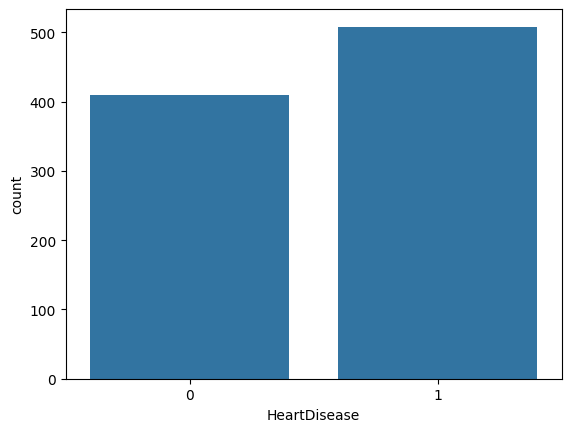

In [34]:
sns.countplot(x = heart['HeartDisease']);

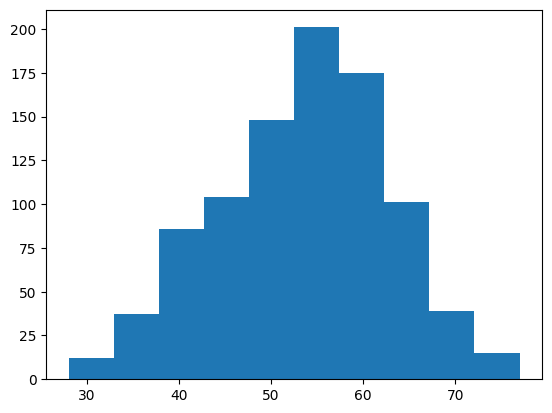

In [37]:
plt.hist(x = heart['Age']);

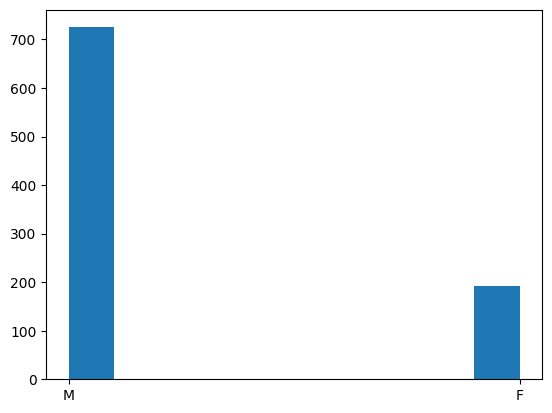

In [38]:
plt.hist(x = heart['Sex']);

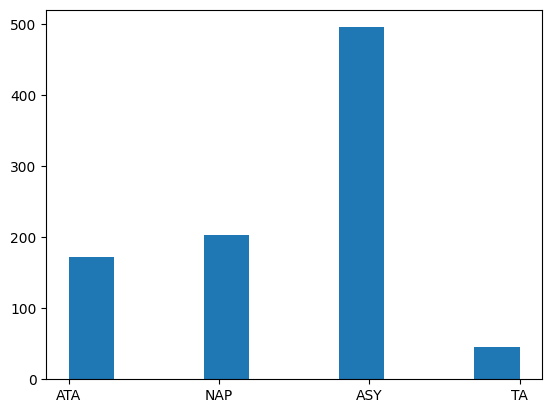

In [39]:
plt.hist(x = heart['ChestPainType']);

In [40]:
grafico = px.treemap(heart, path=['ChestPainType'])
grafico.show()

In [41]:
heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
grafico = px.treemap(heart, path=['ChestPainType', 'Age'])
grafico.show()

In [ ]:
grafico = px.treemap(heart, path=['occupation', 'relationship', 'Age'])
grafico.show()

In [ ]:
heart['occupation'].unique()

In [ ]:
grafico = px.parallel_categories(heart, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(heart, dimensions=['ChestPainType', 'occupation', 'HeartDisease'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(heart, dimensions=['education', 'HeartDisease'])
grafico.show()

## Divisão entre previsores e classe

In [ ]:
heart.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
heart.shape

(32561, 15)

In [28]:
X_census = heart.iloc[:, 0:14].values

In [29]:
X_census

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census = heart.iloc[:, 14].values

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census[0]

' <=50K'

## Tratamento de atributos categóricos

### LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder_teste = LabelEncoder()

In [27]:
X_census[:,1]

NameError: name 'X_census' is not defined

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_ChestPainType = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_ChestPainType.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### OneHotEncoder

In [ ]:
# Carro

# Gol Pálio Uno ......... tesla
#   1     2   3             100

# Gol   1 0 0 0 0 ..........0
# Pálio 0 1 0 0 0 ..........0
# Uno   0 0 1 0 0 ..........0
# tesla 0 0 0 0 0 ..........1

In [ ]:
heart['ChestPainType'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
len(np.unique(heart['ChestPainType'])) # 1 0 0 0 0 0 0 0 0, 0 0 0 0 1 0 0 0 0

9

In [ ]:
heart['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
len(np.unique(heart['occupation']))

15

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
# 'passthrough', as colunas restantes são passadas sem serem transformadas, ou seja, elas serão mantidas no DataFrame final.

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape # antes tinha 15 colunas

(32561, 108)

## Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

## Credit data

In [ ]:
heart

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.20, random_state = 0)

In [ ]:
X_credit_treinamento.shape # HeartDisease	Age	Sex

(1600, 3)

In [ ]:
y_credit_treinamento.shape # default

(1600,)

In [ ]:
X_credit_teste.shape, y_credit_teste.shape # HeartDisease	Age	Sex

((400, 3), (400,))

## Census

In [ ]:
heart

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Base credit data - 93.8%

In [ ]:
import pickle
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.9475

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[342,   6],
       [ 15,  37]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.9475

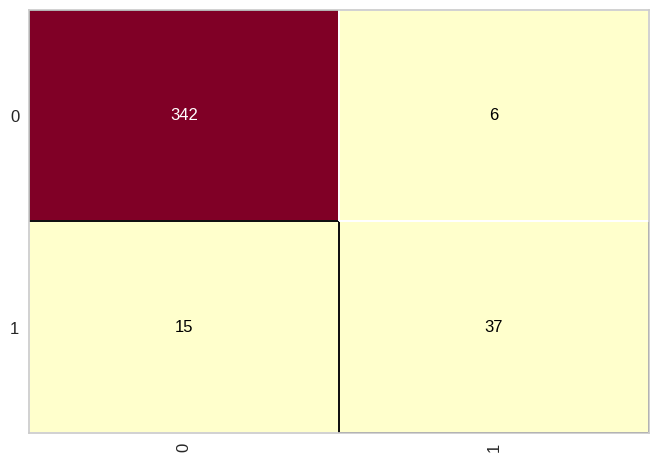

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       348
           1       0.86      0.71      0.78        52

    accuracy                           0.95       400
   macro avg       0.91      0.85      0.87       400
weighted avg       0.95      0.95      0.95       400



## Base census - 47.67%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

0.4767656090071648

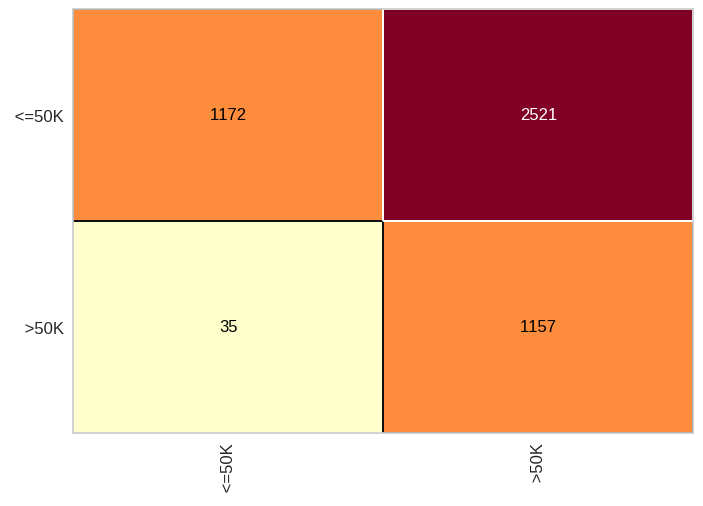

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base credit data - 98.20%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)
'''
Definir random_state=0 (ou qualquer outro inteiro) faz com que a construção da árvore de decisão seja determinística, ou seja,
os mesmos resultados serão obtidos todas as vezes que o código for executado
'''

'\nDefinir random_state=0 (ou qualquer outro inteiro) faz com que a construção da árvore de decisão seja determinística, ou seja,\nos mesmos resultados serão obtidos todas as vezes que o código for executado\n'

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.9775

0.9775

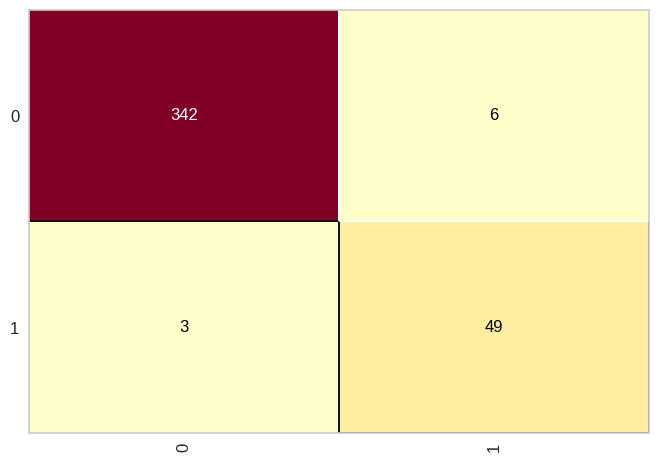

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       348
           1       0.89      0.94      0.92        52

    accuracy                           0.98       400
   macro avg       0.94      0.96      0.95       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
heart.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [ ]:
arvore_credit.feature_importances_ # Age foi a feature mais importante

array([0.21978147, 0.39094725, 0.38927128])

In [ ]:
arvore_credit.classes_

array([0, 1])

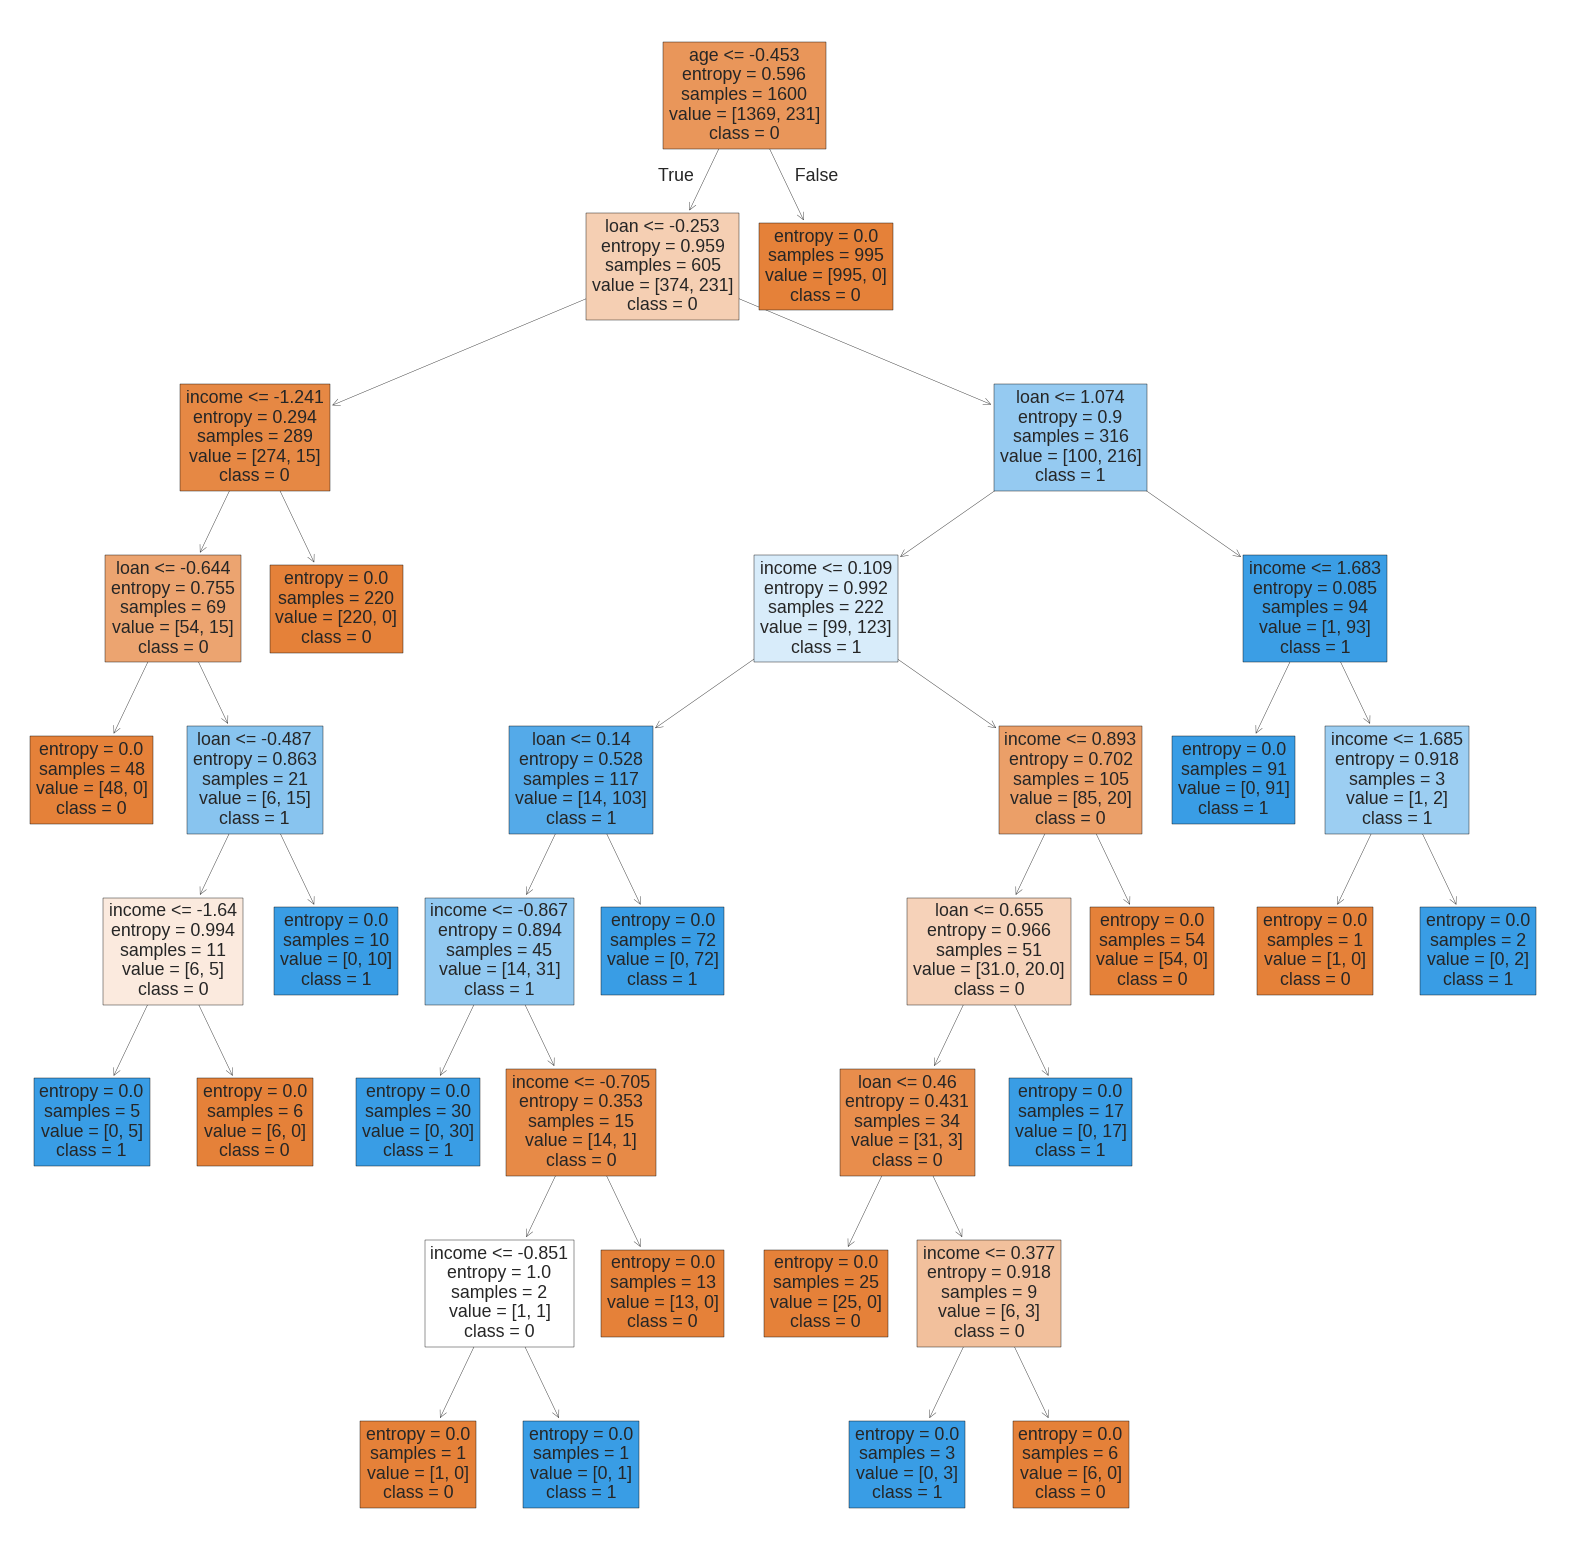

In [ ]:
from sklearn import tree
previsores = ['HeartDisease', 'Age', 'Sex']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.8104401228249745

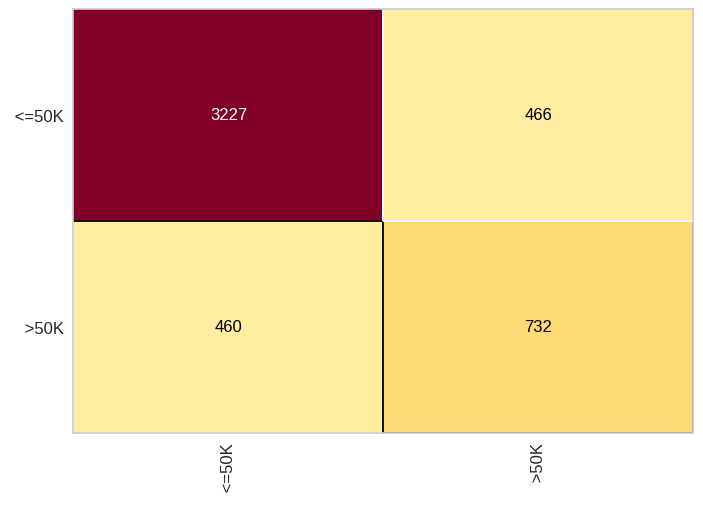

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Base credit data - 98.40%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)
'''
n_estimators=40: Especifica o número de árvores na floresta. Neste caso, o modelo será composto por 40 árvores de decisão independentes.
O número de árvores geralmente afeta a precisão do modelo: mais árvores podem melhorar o desempenho até certo ponto, mas também aumentam o tempo de computação.
'''

'\nn_estimators=40: Especifica o número de árvores na floresta. Neste caso, o modelo será composto por 40 árvores de decisão independentes.\nO número de árvores geralmente afeta a precisão do modelo: mais árvores podem melhorar o desempenho até certo ponto, mas também aumentam o tempo de computação.\n'

In [ ]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.9825

0.9825

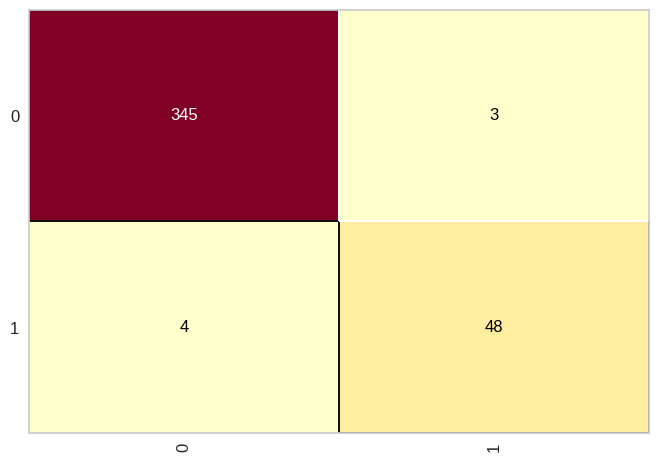

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.94      0.92      0.93        52

    accuracy                           0.98       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.98      0.98      0.98       400



## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

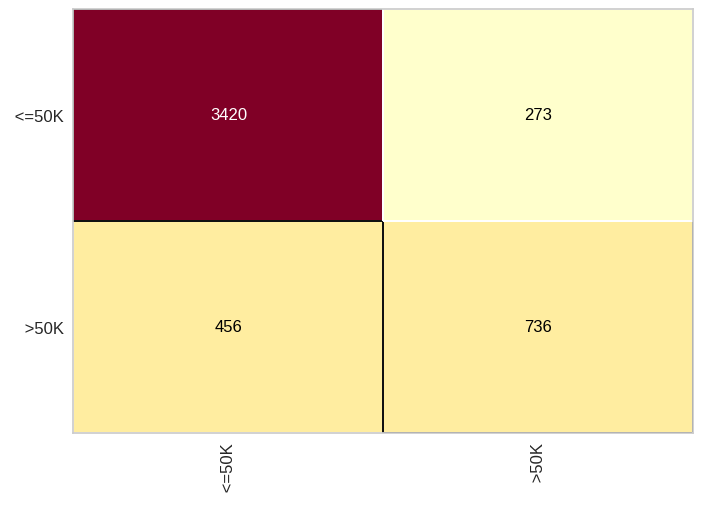

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# AprendizAgem baseada em instâncias - knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.25%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
'''
metric='minkowski': Especifica a métrica de distância a ser utilizada.
É uma generalização das métricas de distância Euclidiana e de Manhattan.
p=2: a métrica de Minkowski equivale à distância Euclidiana.
p=1, ela equivale à distância de Manhattan.
'''
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.9825

0.9825

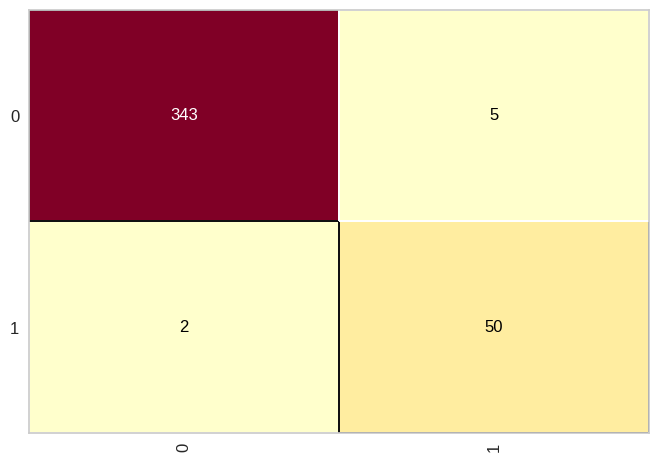

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.91      0.96      0.93        52

    accuracy                           0.98       400
   macro avg       0.95      0.97      0.96       400
weighted avg       0.98      0.98      0.98       400



## Base census - 82.90%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p = 2)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8290685772773797

0.8290685772773797

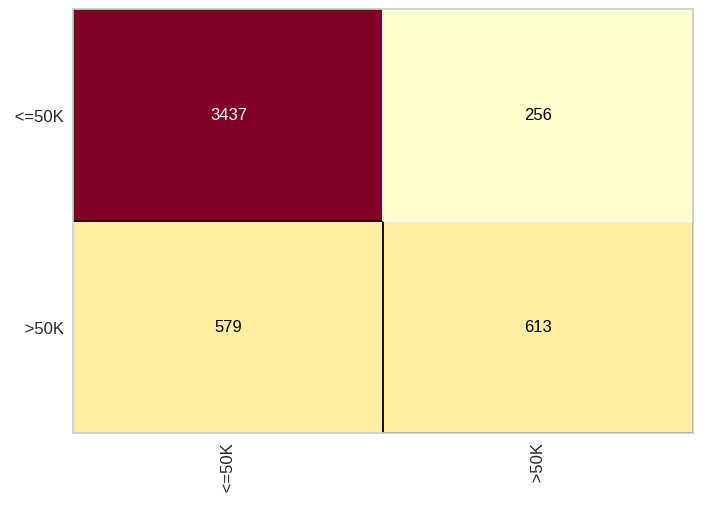

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

## Base credit data - 95.25%

![imAge.png](data:imAge/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfkAAAArCAYAAAB7N/F0AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAA83SURBVHhe7Z3Pa1zV+8ff+e5te5OuShHJzUYUKuamFU0WuuiMulFamaluCgGbmZ0LO5hRRKyldzaCSDJTEERCZ4KFukmcRGjBGURshAQVF8kNLsTV3ETrH3A+i+88hzPP3Hvnd36MzwsupOfcc++Z58d5zj2/OqKUUhAEQRAEYej4P54gCIIgCMJwIEFeEARBEIYUCfKCIAiCMKRIkBcEQRCEIUWCvCAIgiAMKRLkBUEQBGFIkSAvCIIgCEOKBHlBEARBGFIkyAuCIAjCkCJBXhAEQRCGFAnygiAIgjCkSJAXBEEQhCFlIEG+Wq1iZGQEIyMjPKsntra2kEwm9bPj8Ti/5cDI5XKHXodWkJyq1SrPOhYctowLhQIKhQJPFo4B8XgcIyMjyOVyPEs4IA5LB4OKP8eVgQT5QXHp0iUsLy/DsizEYjFMTk7yWwShL5RKJczNzWFubu7YdpIEQRCOTZCvVqvwPA8AsL29jXK5jE8++YTfdmQ47l/R/3XOnz8Py7Jg2zbOnDnDswVBEI4FxybI//bbbwCAWCyGsbExni0cUWjI7rh1dsbHx7G3t4ednR2Mj4/zbGHA0JDrYU3VHFWq1SpyuRx2d3d51kCQYe/jz7EJ8v/88w9PEgRB+E/g+z6mpqYwMzODTCaDv/76i98iCIF0HeR930c2m8XExITu7SWTSWxtbfFbm/B9H7lcDlNTU7rsxMQE0ul0Uw+VFl9lMhkAwNrami7De/mrq6tIJpMYHR3V90xNTSGbzcL3/YZ70eYCjU4Xf/HnzczM6LSDXoBi4vs+0um01tfo6Gjb+joqrK6u6pEB0u2gZBplG5RerVa1LXfiB1H2HzXiEVWO+w3B7ZfLcGJiomFx4e7uLtLptPah0dFRpNPpQP8hSqVSwzPJtqJ+y0HD5RaPx7G6uspv6yuFQqFBLvTeqMWcYTp+66234Hke5ufnkc/n8eSTTzaUEx10Rpico3yJ6FSv3Aer1WrDAvKJiYmBtWMAANUFnucp27YVAAVAOY6jYrGY/vf8/Lz+m1Or1ZTjODo/FoupWCymn2dZltrc3NT3F4vFpnwqMz8/r+8z30n1icViyrIsXa5Wq+n7lVKqUqmE1pNwXVfXs510em9QXYrFYsO9HCrTzuW6Li/eBN1bLBa1HLiuAKhKpcKL9g16VzfvMGVM+iX9m/bHddAPomyD0vP5fINdmnZtWZbyPI8XVZubm1oXMPRhpgXZyebmZtNvbqecKcNUKtVQnv5G/beYdmLbdtP7gjCfSb/FlENQndqB5B/23lbQ73NdV9fHtu0mmbXjR90Q1MaZMg/6XWbbaNu2cl1Xua6r9eA4TlMbpgaoA2XYejcclg6ifFf14EuqS70GtWOo68p8pxnP+kmwFFpAP4oH5Fqt1mBwCBAy5QcZbD6f18/leWFBVdWVRu/jyjEdhwuxlTGoiPeGpRP03E6Cmym3Vlc7jkH3UmA0gw5vUAYF2UonciBIxpZlKcuyVD6fb8gvFov6N3K990qUbZh64HL1PE87Lrc3pVRDg807AWYDwPNIV1F+EyRnkiHJkcswkUjoPAAqlUo1PN+UsenrZh5vB1RdfvRMXqd26FeQtyxL2bbdVAezneKy7hWzHeNyMTt5KysrDXmkq0Qi0ZCuWMA0GaQOVJ+C/EHrIMp3VQ++1KteqSz3QdPveX36QbAUIjADKhcCYSrPxPM8nR6mVDIMLoiooBqVpwzl8PxWxqAinh2WTrSS0UFAdXAch2cpVQ/0dE8/gqRpzO1crTCfxx2HIAfpd0clyjYoPZVK8SylImzDbJDDnJk6Aab9t1OOfI4HCLOjxBsmxfyZ+xxBjSIPMFTXMNuJClocqkM7F69HEGaACWtr6HeF6bFbwgIyQR0rnk/yDGozVlZWFAJ8uZ86oHq3c3HbDuKwdBDlu734Urd6beWDasDxouM5+R9//BEAYNs2pqeneTYA4M033+RJAIDvvvsOqK+QD1ux/NJLLwEAHjx4wLNCuXz5MiqVClzX5VkAgKeeeoon/af46KOPeBIAYGxsDLFYDADwyy+/NOTlcjk9LxuPxyPnmAeN4zh45ZVXeDIA4OWXXwYAeJ4XOG+cTqcxEjCv3g/C7Pzpp58G6vN+Jt988w0A4OLFi6E7RHZ2dqCUwrVr13Ta999/DwBIJpOh5aguy8vLPAuobwk8d+4cT25IC/OToHdubW3pLa3JZJJnAwCef/55AMD6+jrPOjBSqVRoW/PGG28AAB4+fNiQbq6x6Ga+1HVdVCoVXL58mWcBAJ599lmeBNRtGEBgu3rixAkAwMbGhk4bZh0UCoWedBBGL77UrV6JMB9EvY0DgEePHvGsnuk4yNMq94mJCZ7VEipLix6Crvv37wMA/v77b1Y6nPHxcUxPT+Ps2bNYXV3Vz4rH44jH43jnnXd4kSOJuZCj1dWJ0VMDEQR1qn7++WedViqVkMlksLCwgEqlgvHxcbz44otNQYtz/fp11EeH9EWdiEql0pTXLmHOCNYg/v777/pvOh2xVCrptIMiqEGGYdOtGgMOLQR64okneJbGlMNBLLb6999/AQCWZTX5MF137twBAOzv77PSzXDbqFQqQP2DgOddv36dFw/l5MmTPElDAdDUU6FQwK1bt3Djxg1UKhXcuHEDmUymIzs6d+6c1kepVEIul0M2m9Xt0e3bt3kRoP7hhBD9UeNPwQAD0EG5XG6SNcHTy+VyQ9koOtXB6uoq5ubm8O6772od3Lp1qyMdhNGLL3Wr13agNu7XX3/lWT3TcZDvBxsbG8hkMoHX2toav70tstksTp8+jVdffRWZTAZff/01v0Vok/fffx/z8/NIJpOYnp7Gxx9/jP39fT0Scxx45plnMDo6iqWlJZ4l9JH9/f0mH6ZrcXGR337kuXfvHlKplLb9ZDKJWCymR2Hawfd9xONx2LaNK1euIJPJNHSiw3j77bcBAJ9//nlDuu/7+OyzzwDjy9dk2HTw1VdfIZVK4dq1a1oHyWQSX375Jb/1QOlWr4fNoQT5VCrV1DPkVyc9xWw2i5s3b8KyLBSLRSil8PDhQ5TLZZTLZXz66ae8yJGEyyDq6uRrphN834fneXjhhRd0Gg3r01DXcaBWq2FhYSFyFEPoHdu2m2wz6DouhJ2k2cnIYjwex9raGhzH0SNY1BaVy2UdzDmzs7NwHAfLy8t6iDqXy+HChQv6ebOzs7zY0OmgVCphYWGhIW1vby90yP+g6Favh03HQZ6GXnZ2dnhWSx5//HEgYP7FxPd9VKvVjuaAb968CQBYWloKnZsSgqHpEfp/AGjImwfHU6dOtdw/ehiYw2nm3uGoIf7D4tSpUwCAP/74g2dpaP9tzpiOaaecKYegOd1+Q0f9hq2FIKrVauDw81Hghx9+ANgQOMf3ffz00094/fXXeVYg1WpVDz2Xy+WOdPHnn39ibGwMlmUBgP4atywLruuiXC432PV/QQe+76NQKGB9fb1hnUq3dOtLvej1sOk4yD/33HNA3bDCDOfbb7/lSUB94QHqw/VhQfyLL77Qpzp1yoULF3gSAOh5Kc5jjz2m/w4KYL7vdz3sT456FODDf8Tu7q6eHjG/3IPodB6ZuHr1KlzX7en897W1tVB7Id06jtNVYO+0Q9kLr732GlD/UglqlCmgwFi8hzbKwZBDIpHgWQNhfHxczyHfvXuXZwN12c7MzGBmZoZnteTMmTNwXRdXr17lWR1x+/btUJnRHOrFixd5luaDDz4A6ot7TehjJKjdQIQ9RrUply5dws7ODra3t/UCTFUflbx+/XrT8watA9QXm4UtaG6XbnVQrVZx+vRpvPfee0ilUk2L1lrpIIhefakbvR46fLl9O9BWAr7Xt5198rTliZdVbK8h384Tti1JKaXL8K0LnufpbQ2tyiYSiab9wfzABJNWWzFIRkF7pQ8KUw98/7PneYH75Gn7Cd/KkUgkmmQwaMwtdJZlNdXJ3NMatoWIfk8Q5v5UvkUvahsOpfP6EFFlw/bJm74TtB2w2729UX5DhJUlwrYO0bauIN2Y5zDwrUgHgbkdLErWiNjOm0qlQrc90W/j28OithhXKhVdLkieVv08CG6LUQy7DlRdpo7jNLWlYTowt2pzmagufakXvbbjg2E+1g+aW6E2MIMxCctUaKsT78x7Y/UTg0whBe2ZjBKUqRiqC73DcZzQffKqxd5uMqygsrVaTcvAqh82Y2IeIkJ1CgtEg4Leb+qDy5o3YrX63nne0MTqJ6YdJKbOqc5BJ2ZF1YsCbhCmHXLnigrUlM6dnYgq28p3uD7McrzTyeUQZF9RfkO0+j1UPy4jFXHSpJnGG9KDgOpAgTpI1mEyUy0CvGIdaC43/mFh2m8ikdAy4/I02wx+2batEolEYH2HVQcm1JkxMZ/BdWC+IxaLNeixW1/qVq/t+CDVl5ftB82tUJt4ntegPMuyVCqV0sIkYYRRrB9XS/eREIKEq9oQ1MrKSkPwchxHua6rarWabnTDyubz+aayNJIQ9d7Nzc0GxXNc40hKDEiBUdB7K5VKU11JX0E9aNu2G3rNFPjDdDMouOy5PB3HaVmnqCBfrB/jatt2kxyiArUp1yCiyqq6PF3jqE/UG/EwfRBR5cKCEZdhEK1+T6sGqFKpqEQi0dR5If87DMw601ejWb9EIhH6e1sFeGUE1jC5cls12zbSCZdnxTihjoIIXfQchHRqh0kHCGhrqANkEqUD/j7+nm58SXWp13Z8sJWP9cKI+n+hCoKmVCrhypUrKBaLOHv2LO7cuYNSqYTt7e3A+aijDM1JipkL7ZBOp7G4uIh8Pt90ONAgF1uRndq2jfX19cCV5OSXALC5udk0Rz0sZLNZLC4uYmlpCSdOnMCjR4/w4YcfYmpqqmnVvdAGPOoLgqr3Ps2viqje7VEm6kteEDj0hRZ0DZKwr0AO1YV/mQ4T9JVNX8yWZan5+flDG5E47siXvCAIwiFTKBQwNzcHx3GatsoR9CVvWRb29vZ4tiAEIkFeEAThkPHrp6ltbGzAsiycP38ek5OTOHnyJO7fv4+dnR14ngfLsvDgwYOhHaoX+o8EeUEQhCOA7/u4e/cu7t2713S8dywWw+TkJGZnZwPn6wUhDAnygiAIgjCkdHzinSAIgiAIxwMJ8oIgCIIwpEiQFwRBEIQhRYK8IAiCIAwpEuQFQRAEYUiRIC8IgiAIQ8r/ABPrLJoZx1shAAAAAElFTkSuQmCC)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_ # b0

array([-6.00740412])

In [ ]:
logistic_credit.coef_ # b1, b2, b3

array([[-2.61629888, -3.71571693,  3.97113405]])

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.9525

0.9525

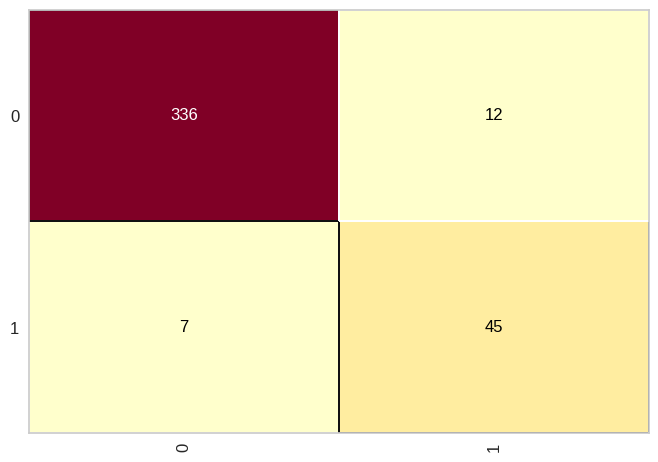

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       348
           1       0.79      0.87      0.83        52

    accuracy                           0.95       400
   macro avg       0.88      0.92      0.90       400
weighted avg       0.95      0.95      0.95       400



## Base census - 84.97%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_census.intercept_ # b0

array([-2.10552416])

In [ ]:
logistic_census.coef_ # b1, b2, b3 ...

array([[-6.98488613e-02,  1.18355815e-01, -9.28364487e-03,
        -6.32571637e-02,  5.70026706e-02,  5.07381719e-02,
        -8.84284931e-02, -5.02268816e-02, -1.24694668e-01,
        -1.02481824e-01, -1.17822786e-01, -3.66227818e-02,
        -1.89874033e-02, -2.67960548e-02, -8.22889018e-02,
        -7.88822810e-02, -8.12332696e-03,  1.13390793e-02,
         1.45986267e-01,  1.18924828e-01, -7.54038219e-02,
         1.44347173e-01, -5.54400102e-01,  1.13453107e-01,
         2.46279059e-02, -1.90450912e-01,  4.34375255e-02,
         7.00139994e-01, -6.46427239e-02, -5.18599668e-01,
        -1.07259785e-01, -8.85445200e-02, -7.37373311e-02,
        -1.37206225e-02, -2.06416506e-02,  2.26862374e-02,
         2.52008753e-01, -1.67994077e-01, -1.41452274e-01,
        -8.40072161e-02, -2.57017139e-01, -2.82516289e-01,
         1.61879470e-01,  8.58540408e-02,  8.36697148e-02,
         1.09051852e-01, -2.53383593e-02, -2.30592713e-02,
         1.32752101e-01, -8.29001225e-02, -3.09430677e-0

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8497441146366428

0.8497441146366428

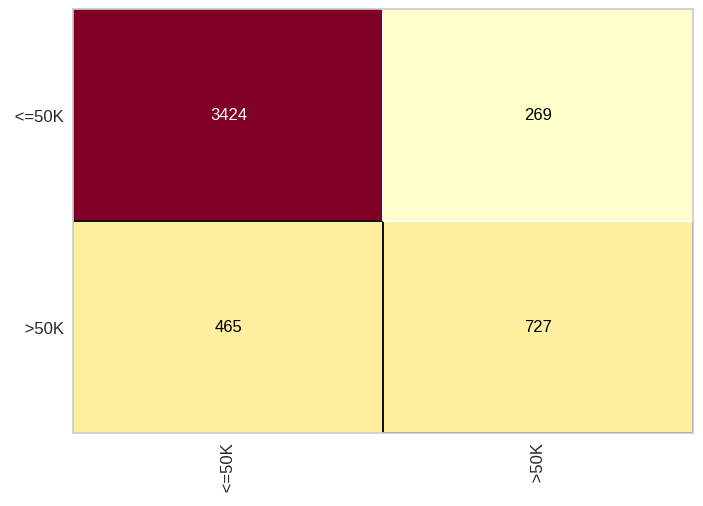

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# SVM

In [ ]:
from sklearn.svm import SVC

## Base credit data - 99.0%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

1.   **kernel='rbf'**
Significado: Define o tipo de função de kernel usada pelo SVM.
'rbf' (Radial Basis Function) é o kernel gaussiano, que é não linear.
Para que serve? Permite que o modelo aprenda fronteiras de decisão não lineares, ou seja, quando os dados não podem ser separados por uma linha reta.

2.   **random_state=1**
Significado: Define a semente (seed) do gerador de números aleatórios.
Para que serve? Garante que os resultados sejam reprodutíveis. Ou seja, ao rodar o código novamente, ele usará os mesmos valores aleatórios (útil em operações internas, como shuffling dos dados).

3. **C=4.0**
Significado: É o parâmetro de regularização do SVM.
Para que serve? Controla o equilíbrio entre:
Minimizar o erro no treinamento (empírico) — quanto maior o C, mais o modelo tenta acertar todos os pontos;
Evitar overfitting (ajuste exAgerado aos dados de treino) — quanto menor o C, mais o modelo permite alguns erros, buscando uma generalização melhor.
No caso: C=4.0 significa que o modelo é menos tolerante a erros de classificação comparado a C=1.0 ou C=0.1.


In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.99

0.99

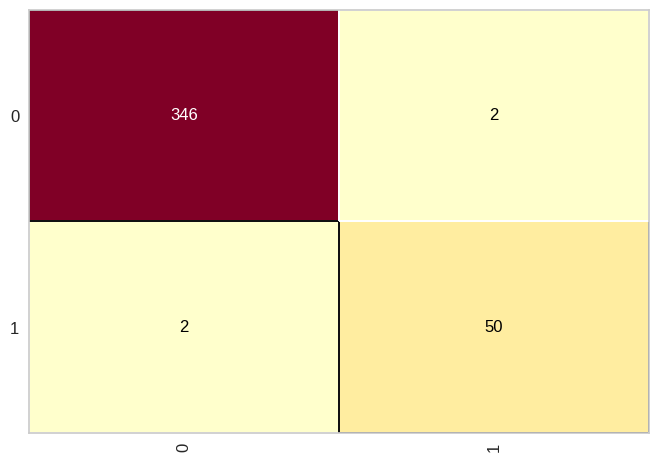

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       348
           1       0.96      0.96      0.96        52

    accuracy                           0.99       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
svm_census = SVC(kernel='linear', random_state=1, C = 2.0)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(C=2.0, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8509723643807574

0.8509723643807574

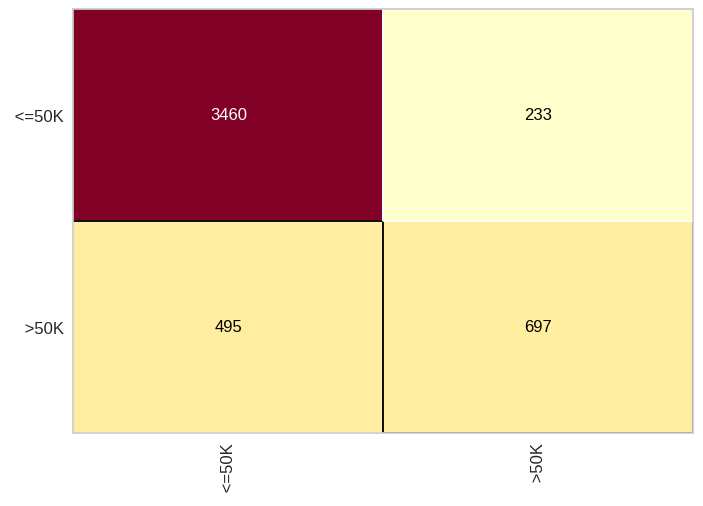

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

## Base credit data - 99.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
(3 + 1) / 2

2.0

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.61353206
Iteration 2, loss = 0.57004548
Iteration 3, loss = 0.53396299
Iteration 4, loss = 0.50143342
Iteration 5, loss = 0.47227721
Iteration 6, loss = 0.44521935
Iteration 7, loss = 0.41916095
Iteration 8, loss = 0.39459138
Iteration 9, loss = 0.37108131
Iteration 10, loss = 0.34812201
Iteration 11, loss = 0.32669120
Iteration 12, loss = 0.30626920
Iteration 13, loss = 0.28657492
Iteration 14, loss = 0.26842853
Iteration 15, loss = 0.25201286
Iteration 16, loss = 0.23613340
Iteration 17, loss = 0.22183595
Iteration 18, loss = 0.20856789
Iteration 19, loss = 0.19636357
Iteration 20, loss = 0.18536008
Iteration 21, loss = 0.17575179
Iteration 22, loss = 0.16699131
Iteration 23, loss = 0.15918673
Iteration 24, loss = 0.15213881
Iteration 25, loss = 0.14575822
Iteration 26, loss = 0.13987599
Iteration 27, loss = 0.13465252
Iteration 28, loss = 0.12975891
Iteration 29, loss = 0.12502430
Iteration 30, loss = 0.12082744
Iteration 31, loss = 0.11681232
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.9925

0.9925

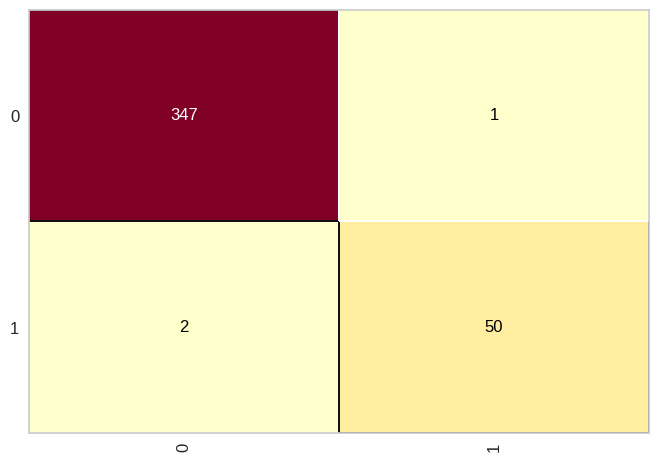

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       348
           1       0.98      0.96      0.97        52

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400



## Base census - 81.53%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
(108 + 1) / 2

54.5

In [ ]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.39148878
Iteration 2, loss = 0.32763267
Iteration 3, loss = 0.31621609
Iteration 4, loss = 0.30907969
Iteration 5, loss = 0.30339645
Iteration 6, loss = 0.29897786
Iteration 7, loss = 0.29510956
Iteration 8, loss = 0.29338327
Iteration 9, loss = 0.29034951
Iteration 10, loss = 0.28742693
Iteration 11, loss = 0.28557423
Iteration 12, loss = 0.28362772
Iteration 13, loss = 0.28213349
Iteration 14, loss = 0.27947437
Iteration 15, loss = 0.27776298
Iteration 16, loss = 0.27664784
Iteration 17, loss = 0.27501943
Iteration 18, loss = 0.27260278
Iteration 19, loss = 0.27071742
Iteration 20, loss = 0.26844239
Iteration 21, loss = 0.26702627
Iteration 22, loss = 0.26718461
Iteration 23, loss = 0.26480093
Iteration 24, loss = 0.26313391
Iteration 25, loss = 0.26163745
Iteration 26, loss = 0.25917318
Iteration 27, loss = 0.25892965
Iteration 28, loss = 0.25702871
Iteration 29, loss = 0.25589793
Iteration 30, loss = 0.25376491
Iteration 31, loss = 0.25355921
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8182190378710338

0.8182190378710338

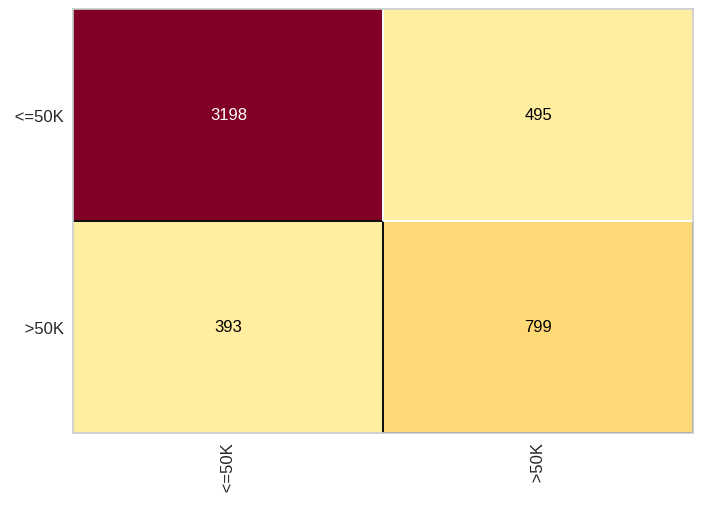

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.87      0.88      3693
        >50K       0.62      0.67      0.64      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.77      0.76      4885
weighted avg       0.82      0.82      0.82      4885



# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1600, 3), (1600,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((400, 3), (400,))

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [ ]:
X_credit

array([[-1.00121646, -0.52214465,  0.0475909 ],
       [-0.94142193,  0.03688303, -0.50271804],
       [-1.48149677, -0.37410501, -0.38062513],
       ...,
       [ 0.78887079,  1.28659094,  1.31329498],
       [-0.00813987, -0.98794468, -1.33365787],
       [-0.98589711,  0.99461537, -0.19420358]])

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [ ]:
y_credit

array([1, 0, 0, ..., 0, 0, 0])

### Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9825000000000002


### Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9855


### Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
10 * 30

300

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

22


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

26


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

27


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

28


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

29


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9810,0.9815,0.9475,0.9845,0.9960
1,0.9855,0.9805,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9840,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9855,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9860,0.9820,0.9465,0.9850,0.9965
5,0.9885,0.9860,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9845,0.9805,0.9470,0.9860,0.9970
7,0.9875,0.9830,0.9800,0.9480,0.9850,0.9975
8,0.9865,0.9830,0.9795,0.9465,0.9840,0.9965
9,0.9870,0.9870,0.9820,0.9465,0.9845,0.9975


In [ ]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987200,0.983933,0.980050,0.946950,0.985083,0.997133
std,0.001740,0.001879,0.001533,0.000687,0.001280,0.000454
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.983125,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.984250,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.985375,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [ ]:
resultados.var()

Arvore           3.027586e-06
Random forest    3.529885e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      2.057471e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.176256
Random forest    0.190948
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.045490
dtype: float64

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9444820880889893, pvalue=0.1201295480132103),
 ShapiroResult(statistic=0.9421250820159912, pvalue=0.10377833992242813),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.962294340133667, pvalue=0.35407164692878723),
 ShapiroResult(statistic=0.8676660656929016, pvalue=0.0014870468294247985))

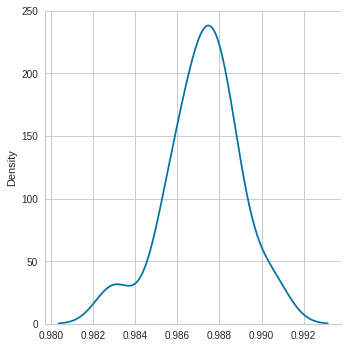

In [ ]:
sns.displot(resultados_arvore, kind = 'kde');

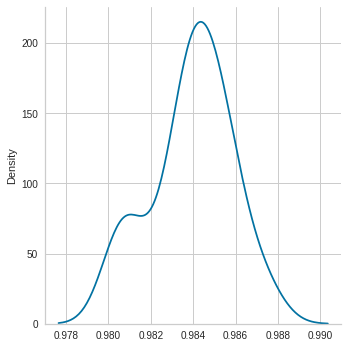

In [ ]:
sns.displot(resultados_random_forest, kind = 'kde');

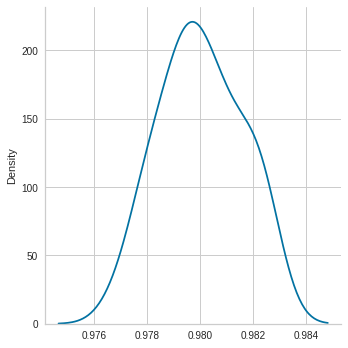

In [ ]:
sns.displot(resultados_knn, kind = 'kde');

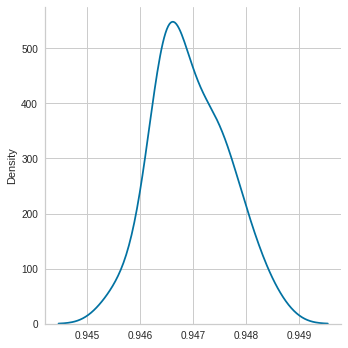

In [ ]:
sns.displot(resultados_logistica, kind = 'kde');

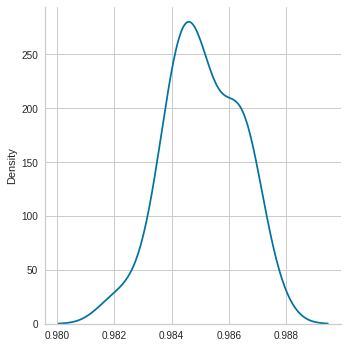

In [ ]:
sns.displot(resultados_svm, kind = 'kde');

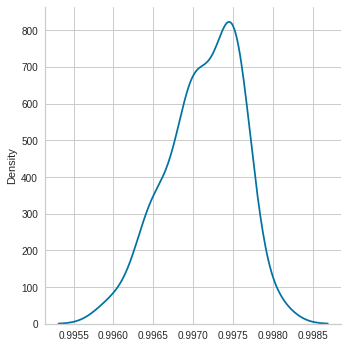

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

6.492589473829715e-184

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9975,rede_neural
176,0.9970,rede_neural
177,0.9965,rede_neural
178,0.9970,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071  0.001 -0.0082 -0.0061   True
       arvore     logistica  -0.0402  0.001 -0.0413 -0.0392   True
       arvore random_forest  -0.0033  0.001 -0.0043 -0.0022   True
       arvore   rede_neural   0.0099  0.001  0.0089   0.011   True
       arvore           svm  -0.0021  0.001 -0.0031 -0.0011   True
          knn     logistica  -0.0331  0.001 -0.0341 -0.0321   True
          knn random_forest   0.0039  0.001  0.0029  0.0049   True
          knn   rede_neural   0.0171  0.001  0.0161  0.0181   True
          knn           svm    0.005  0.001   0.004  0.0061   True
    logistica random_forest    0.037  0.001   0.036   0.038   True
    logistica   rede_neural   0.0502  0.001  0.0492  0.0512   True
    logistica           svm   0.0381  0.001  0.0371  0.0392   

In [ ]:
resultados.mean()

Arvore           0.987200
Random forest    0.983933
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997133
dtype: float64

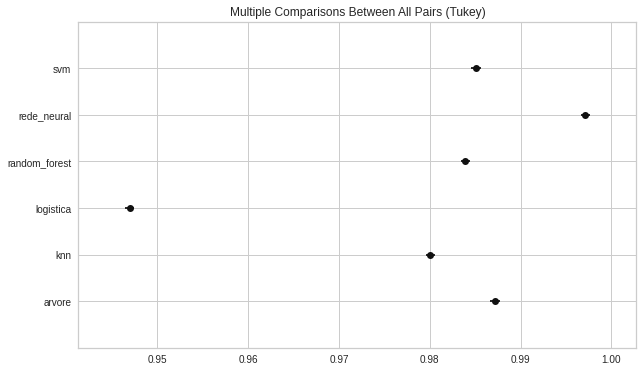

In [ ]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [ ]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [ ]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [ ]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [ ]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [ ]:
novo_registro.shape

(3,)

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [ ]:
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
rede_neural.predict(novo_registro)

array([1])

In [ ]:
arvore.predict(novo_registro)

array([1])

In [ ]:
svm.predict(novo_registro)

array([1])

# Combinação de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [ ]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

Cliente não pagará o empréstimo


# Rejeição de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [ ]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.15157835e-04, 9.99884842e-01]])

In [ ]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9998848421645554

In [ ]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [ ]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9919673993838404

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o empréstimo, baseado em 1 algoritmos


# Redução de dimensionalidade

## Preparacão da base de dados

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
X_census = heart.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = heart.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_ChestPainType = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_ChestPainType.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, X_census_teste.shape

((27676, 14), (4885, 14))

## PCA (Principal component analysis)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_testes_pca = pca.transform(X_census_teste)

In [ ]:
X_census_treinamento_pca.shape, X_census_testes_pca.shape

((27676, 8), (4885, 8))

In [ ]:
X_census_treinamento

array([[-0.92239303,  1.46373585,  1.84273483, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-0.84908045,  0.09005041,  0.19630465, ..., -0.21665953,
         3.20416118,  0.29156857],
       [ 1.42360965, -1.28363502,  2.83572992, ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [-1.14233079,  0.09005041, -1.36867471, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.47054606, -1.28363502,  0.24712496, ..., -0.21665953,
         0.36951938,  0.29156857],
       [-0.99570562,  0.09005041, -0.02703374, ..., -0.21665953,
         0.61248868,  0.29156857]])

In [ ]:
pca.explained_variance_ratio_

array([0.151561  , 0.10109701, 0.08980379, 0.08076277, 0.07627678,
       0.07357646, 0.06772289, 0.06690789])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7077085943199357

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_census_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
random_forest_census_pca.fit(X_census_treinamento_pca, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_census_pca.predict(X_census_testes_pca)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.8372569089048106

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=8, kernel='rbf')
X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [ ]:
X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

In [ ]:
X_census_treinamento_kpca

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_kpca = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_kpca.predict(X_census_teste_kpca)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

## LDA (Linear discriminant analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 8)

In [ ]:
X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento)
X_census_teste_lda = lda.transform(X_census_teste)

In [ ]:
X_census_treinamento_lda.shape, X_census_teste_lda.shape

In [ ]:
X_census_treinamento_lda

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_lda = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_lda.fit(X_census_treinamento_lda, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_lda.predict(X_census_teste_lda)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

# Detecção de outliers

## Boxplot

In [ ]:
heart = pd.read_csv('credit_data.csv')
heart

In [ ]:
heart.isnull().sum()

In [ ]:
heart.dropna(inplace=True)

In [ ]:
heart.isnull().sum()

In [ ]:
1997 / 2

In [ ]:
# Outliers idade
grafico = px.box(heart, y = 'Age')
grafico.show()

In [ ]:
outliers_Age = heart[heart['Age'] < 0]
outliers_Age

In [ ]:
# Outliers Sex
grafico = px.box(heart, y='Sex')
grafico.show()

In [ ]:
outliers_Sex = heart[heart['Sex'] > 13300]
outliers_Sex

## Gráfico de dispersão

In [ ]:
# HeartDisease x Age
grafico = px.scatter(x = heart['HeartDisease'], y = heart['Age'])
grafico.show()

In [ ]:
# HeartDisease x Sex
grafico = px.scatter(x = heart['HeartDisease'], y = heart['Sex'])
grafico.show()

In [ ]:
# Age x Sex
grafico = px.scatter(x = heart['Age'], y = heart['Sex'])
grafico.show()

In [ ]:
heart = pd.read_csv('heart.csv')
heart

In [ ]:
# Age x final weight
grafico = px.scatter(x = heart['Age'], y = heart['final-weight'])
grafico.show()

## Biblioteca PyOD

- Documentação: https://pyod.readthedocs.io/en/latest/#

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN

In [ ]:
heart.head(1)

In [ ]:
detector = KNN()
detector.fit(heart.iloc[:,1:4])

In [ ]:
previsoes = detector.labels_
previsoes

In [ ]:
np.unique(previsoes, return_counts=True)

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [ ]:
outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = heart.iloc[outliers,:]
lista_outliers